In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os


transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])


#train_data_path = 'relative path of training data set'
train_data_path = 'horse-or-human/horse-or-human/train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch #numworks가 뭐지?
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1027, shuffle=False, num_workers=0)  


validation_data_path = 'horse-or-human/horse-or-human/validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=256, shuffle=False, num_workers=0)  

NUM_EPOCH=1
for epoch in range(NUM_EPOCH):
    # load training images of the batch size for every iteration
    for i, data in enumerate(trainloader):

        # inputs is the image
        # labels is the class of the image
        inputs, labels = data

        # if you don't change the image size, it will be [batch_size, 1, 100, 100]
        #print(inputs.shape)

        # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
        #print(labels)  





    # load validation images of the batch size for every iteration
    for i, data in enumerate(valloader):
        
        # inputs is the image
        # labels is the class of the image
        inputs, labels = data

        # if you don't change the image size, it will be [batch_size, 1, 100, 100]
        #print(inputs.shape)

        # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
        #print(labels)    

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import numpy as np
import plotly.graph_objects as go

In [3]:
train_dataset = next(iter(trainloader))[0].numpy()
train_label =next(iter(trainloader))[1].numpy()

val_dataset = next(iter(valloader))[0].numpy()
val_label =next(iter(valloader))[1].numpy()

In [4]:
train_label=train_label.reshape(1027,1)
val_label=val_label.reshape(256,1)

In [5]:
train_flatten=train_dataset.reshape(1027,train_dataset.shape[2]*train_dataset.shape[3])
val_flatten=val_dataset.reshape(256,val_dataset.shape[2]*val_dataset.shape[3])

In [6]:
x_train=train_flatten.T
y_train=train_label.T

x_test=val_flatten.T
y_test=val_label.T

In [7]:
n_x = x_train.shape[0] # size of input layer`
n_y = y_train.shape[0] # size of output layer
m = x_train.shape[1]

In [8]:
#initiate variables
def init_var() : 
    global W1,b1,W2,b2,W3,b3,highest,highest,highestloss
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))

    W2 = np.random.randn(n_h,n_h) * 0.01
    b2 = np.zeros(shape=(n_h, 1))

    W3 = np.random.randn(n_y,n_h) * 0.01
    b3 = np.zeros(shape=(n_y, 1))
    
    highest=0
    highestindex=0
    highestloss=0
    

In [9]:
def sigmoid(z):
    y = 1/(1+np.exp(-z))
    return y

In [10]:
def forward_p(x_train):
    #print(parameters)
    Z1 = np.dot(W1,x_train) + b1
    A1 = sigmoid(Z1) # activation function
    
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)  
    
    Z3 = np.dot(W3,A2) + b3
    A3 = sigmoid(Z3) # Final output prediction
    return A3, A2 , A1, Z2, Z1

In [11]:
# Compute the cross-entropy cost
def compute_cost(A3, Y):
    loss = np.multiply(np.log(A3), Y) + np.multiply((1 - Y), np.log(1 - A3))
    cost = - np.sum(loss) / m
    return cost

In [12]:
def back_p( X, Y, A3, A2, A1) :
    dZ3 = A3 - Y
    dW3 = (1 / m) * np.dot(dZ3, A2.T) + (lambd/m) * W3
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
    
    dZ2 = np.multiply(np.dot(W3.T, dZ3), A2 - np.power(A2, 2))
    dW2 = (1 / m) * np.dot(dZ2, A1.T) + (lambd/m) * W2
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), A1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T) + (lambd/m) * W1
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {'dW3':dW3, 'db3':db3, 'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}    
    return grads
    #return {'dW1':dW1, 'db1':db1, 'dW2':dW2, 'db2':db2, 'dW3':dW3,'db3':db3}
    #return dW1,db1,dW2,db2,dW3,db3

In [13]:
def update_parameters(  dW1=0,db1=0,dW2=0,db2=0,dW3=0,db3=0) :
    global W1,b1,W2,b2,W3,b3
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3

In [14]:
def predict(X,A3) :
    #A3,_,__ = forward_p(X)
    predictions = A3 >0.5
    predictions = np.where(A3 > 0.5, 1, 0)
    return predictions

def print_accuracy(X, Y, A3, train) :
    predictions = predict(X, A3)
    if train ==1 :
        print("\tTraining Accuracy: %.10f" %(100 - np.mean(np.abs(predictions - Y)) * 100)+'%',end='')
    else :
        print("\tValidation Accuracy: %.10f" %(100 - np.mean(np.abs(predictions - Y)) * 100)+'%')
    
    return (100 - np.mean(np.abs(predictions - Y)) * 100)
    #print('Accuracy: %f' %(float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T)))/float(Y.size)*100)+ '%')

In [15]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [16]:
def l2_reg_cost():
    return ( np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)) )*(lambd/(2*m))

In [17]:
def nn_model(X, Y, n_h, num_iterations , X_test, Y_test) :
    global highest, highesindex, learning_rate, highestloss
    init_var()
    for i in range(0, num_iterations) :
        A3 ,A2, A1, Z2, Z1= forward_p(X)
        cost = compute_cost(A3, Y) + l2_reg_cost()
        grads = back_p(X, Y, A3, A2, A1)
        parameters = update_parameters( **grads)
        
        
        
        if i % 1 == 0:
            val_A3,_,__,_____,___=forward_p(X_test)
            val_cost=compute_cost(val_A3,Y_test)
            print("#%i Training loss : %.10f\tValidation loss : %.10f" %(i,cost,val_cost),end='')
            l_train_ac = print_accuracy(X,Y,A3,1)
            l_val_ac = print_accuracy(X_test,Y_test,val_A3,0)
            
            l_index.append(i)
            l_train_cost_list.append(cost)
            l_val_cost_list.append(val_cost)
            l_ac_train.append(l_train_ac)
            l_ac_val.append(l_val_ac)
                
        if i > 300 :
            if l_train_cost_list[-1] == l_train_cost_list[-2] : 
                break
                
        #if cost< 0.09:
        #    learning_rate=0.1
        #if cost<0.05:
        #    learning_rate=0.05
        #if cost<0.01:
        #    learning_rate=0.01
        if highest < l_val_ac :
            highest = l_val_ac
            highestindex=i
            highestloss=val_cost
            
    return l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val

In [18]:
learning_rate=0.5
lambd = 1 #large
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

#0 Training loss : 0.7946364866	Validation loss : 0.1933364275	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#1 Training loss : 0.8639337669	Validation loss : 0.4802679849	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2 Training loss : 2.0765203729	Validation loss : 0.9982290445	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#3 Training loss : 4.0209235034	Validation loss : 0.2812056185	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4 Training loss : 1.2830026346	Validation loss : 0.3641891233	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#5 Training loss : 1.6063841525	Validation loss : 0.2206747851	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#6 Training loss : 1.0261059504	Validation loss : 0.1834928256	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#7 Training loss : 0.8380233635	Validation loss : 0.1736470836	Traini

#61 Training loss : 0.7864668503	Validation loss : 0.1727966140	Training Accuracy: 52.5803310613%	Validation Accuracy: 50.0000000000%
#62 Training loss : 0.7863500004	Validation loss : 0.1727962084	Training Accuracy: 52.2882181110%	Validation Accuracy: 50.0000000000%
#63 Training loss : 0.7862330804	Validation loss : 0.1727957886	Training Accuracy: 52.2882181110%	Validation Accuracy: 50.0000000000%
#64 Training loss : 0.7861160851	Validation loss : 0.1727953543	Training Accuracy: 51.8987341772%	Validation Accuracy: 50.0000000000%
#65 Training loss : 0.7859990093	Validation loss : 0.1727949049	Training Accuracy: 52.0934761441%	Validation Accuracy: 50.0000000000%
#66 Training loss : 0.7858818476	Validation loss : 0.1727944400	Training Accuracy: 51.9961051607%	Validation Accuracy: 50.0000000000%
#67 Training loss : 0.7857645948	Validation loss : 0.1727939591	Training Accuracy: 51.9961051607%	Validation Accuracy: 50.0000000000%
#68 Training loss : 0.7856472452	Validation loss : 0.172793461

#121 Training loss : 0.7790853408	Validation loss : 0.1727181736	Training Accuracy: 56.4751703992%	Validation Accuracy: 50.0000000000%
#122 Training loss : 0.7789492790	Validation loss : 0.1727149241	Training Accuracy: 56.4751703992%	Validation Accuracy: 50.0000000000%
#123 Training loss : 0.7788124285	Validation loss : 0.1727115439	Training Accuracy: 56.4751703992%	Validation Accuracy: 50.0000000000%
#124 Training loss : 0.7786747602	Validation loss : 0.1727080267	Training Accuracy: 56.5725413827%	Validation Accuracy: 50.0000000000%
#125 Training loss : 0.7785362438	Validation loss : 0.1727043657	Training Accuracy: 56.7672833496%	Validation Accuracy: 50.0000000000%
#126 Training loss : 0.7783968474	Validation loss : 0.1727005540	Training Accuracy: 56.7672833496%	Validation Accuracy: 50.0000000000%
#127 Training loss : 0.7782565380	Validation loss : 0.1726965840	Training Accuracy: 56.5725413827%	Validation Accuracy: 50.0000000000%
#128 Training loss : 0.7781152806	Validation loss : 0.1

#181 Training loss : 0.7669491409	Validation loss : 0.1715358172	Training Accuracy: 57.4488802337%	Validation Accuracy: 50.0000000000%
#182 Training loss : 0.7665618481	Validation loss : 0.1714573655	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#183 Training loss : 0.7661588370	Validation loss : 0.1713728797	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#184 Training loss : 0.7657390140	Validation loss : 0.1712818089	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#185 Training loss : 0.7653011999	Validation loss : 0.1711835458	Training Accuracy: 57.7409931840%	Validation Accuracy: 50.0000000000%
#186 Training loss : 0.7648441233	Validation loss : 0.1710774214	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#187 Training loss : 0.7643664116	Validation loss : 0.1709626982	Training Accuracy: 57.7409931840%	Validation Accuracy: 50.0000000000%
#188 Training loss : 0.7638665820	Validation loss : 0.1

#241 Training loss : 2.5273007191	Validation loss : 0.1955988677	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#242 Training loss : 0.8221834025	Validation loss : 0.1727442291	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#243 Training loss : 0.7740099920	Validation loss : 0.1765062185	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#244 Training loss : 0.7625125574	Validation loss : 0.1717250965	Training Accuracy: 55.4040895813%	Validation Accuracy: 50.3906250000%
#245 Training loss : 0.7576553082	Validation loss : 0.1735804543	Training Accuracy: 64.0701071081%	Validation Accuracy: 50.0000000000%
#246 Training loss : 0.7554435488	Validation loss : 0.1720042531	Training Accuracy: 58.1304771178%	Validation Accuracy: 50.0000000000%
#247 Training loss : 0.7538803166	Validation loss : 0.1726491566	Training Accuracy: 57.8383641675%	Validation Accuracy: 50.0000000000%
#248 Training loss : 0.7524554950	Validation loss : 0.1

#301 Training loss : 0.7579679732	Validation loss : 0.1726883932	Training Accuracy: 56.8646543330%	Validation Accuracy: 50.0000000000%
#302 Training loss : 0.7563188483	Validation loss : 0.1724957113	Training Accuracy: 58.9094449854%	Validation Accuracy: 50.0000000000%
#303 Training loss : 0.7552292350	Validation loss : 0.1723755596	Training Accuracy: 58.8120740019%	Validation Accuracy: 50.0000000000%
#304 Training loss : 0.7540656212	Validation loss : 0.1722508115	Training Accuracy: 59.3962999026%	Validation Accuracy: 50.0000000000%
#305 Training loss : 0.7527721289	Validation loss : 0.1720976620	Training Accuracy: 59.2015579357%	Validation Accuracy: 50.0000000000%
#306 Training loss : 0.7513198370	Validation loss : 0.1719006274	Training Accuracy: 59.2015579357%	Validation Accuracy: 50.0000000000%
#307 Training loss : 0.7496736961	Validation loss : 0.1716414963	Training Accuracy: 59.4936708861%	Validation Accuracy: 51.1718750000%
#308 Training loss : 0.7477877936	Validation loss : 0.1

#361 Training loss : 0.6272414804	Validation loss : 0.1395613426	Training Accuracy: 71.3729308666%	Validation Accuracy: 63.6718750000%
#362 Training loss : 0.6295937234	Validation loss : 0.1793807327	Training Accuracy: 70.3018500487%	Validation Accuracy: 57.4218750000%
#363 Training loss : 0.7868012234	Validation loss : 0.1049751961	Training Accuracy: 58.2278481013%	Validation Accuracy: 81.2500000000%
#364 Training loss : 0.5884159863	Validation loss : 0.1064757304	Training Accuracy: 76.2414800389%	Validation Accuracy: 82.4218750000%
#365 Training loss : 0.6080230272	Validation loss : 0.1369640751	Training Accuracy: 73.5150925024%	Validation Accuracy: 66.7968750000%
#366 Training loss : 0.6179336661	Validation loss : 0.1698205001	Training Accuracy: 70.9834469328%	Validation Accuracy: 58.9843750000%
#367 Training loss : 0.7674345652	Validation loss : 0.1136724855	Training Accuracy: 59.5910418695%	Validation Accuracy: 77.7343750000%
#368 Training loss : 0.5949147761	Validation loss : 0.1

#421 Training loss : 0.7004693213	Validation loss : 0.1188878823	Training Accuracy: 65.7254138267%	Validation Accuracy: 77.3437500000%
#422 Training loss : 0.5576595119	Validation loss : 0.1017549778	Training Accuracy: 76.9230769231%	Validation Accuracy: 81.6406250000%
#423 Training loss : 0.6099941949	Validation loss : 0.1416289617	Training Accuracy: 72.4440116845%	Validation Accuracy: 71.4843750000%
#424 Training loss : 0.5779976140	Validation loss : 0.1325242206	Training Accuracy: 74.2940603700%	Validation Accuracy: 73.0468750000%
#425 Training loss : 0.6934087288	Validation loss : 0.1207072514	Training Accuracy: 66.3096397274%	Validation Accuracy: 76.9531250000%
#426 Training loss : 0.5569461488	Validation loss : 0.1024281140	Training Accuracy: 76.6309639727%	Validation Accuracy: 80.4687500000%
#427 Training loss : 0.6126131949	Validation loss : 0.1410216764	Training Accuracy: 72.2492697176%	Validation Accuracy: 71.4843750000%
#428 Training loss : 0.5749010741	Validation loss : 0.1

#481 Training loss : 0.6190472546	Validation loss : 0.1381834606	Training Accuracy: 72.2492697176%	Validation Accuracy: 73.8281250000%
#482 Training loss : 0.5393872204	Validation loss : 0.1015069514	Training Accuracy: 77.0204479065%	Validation Accuracy: 80.8593750000%
#483 Training loss : 0.6179560252	Validation loss : 0.1384341238	Training Accuracy: 72.2492697176%	Validation Accuracy: 73.8281250000%
#484 Training loss : 0.5384715540	Validation loss : 0.1011209801	Training Accuracy: 77.3125608569%	Validation Accuracy: 80.8593750000%
#485 Training loss : 0.6169530341	Validation loss : 0.1386710991	Training Accuracy: 72.3466407011%	Validation Accuracy: 73.8281250000%
#486 Training loss : 0.5375510922	Validation loss : 0.1007295465	Training Accuracy: 77.4099318403%	Validation Accuracy: 81.2500000000%
#487 Training loss : 0.6159164315	Validation loss : 0.1389152478	Training Accuracy: 72.2492697176%	Validation Accuracy: 73.8281250000%
#488 Training loss : 0.5366425079	Validation loss : 0.1

#541 Training loss : 0.5921742144	Validation loss : 0.1453716718	Training Accuracy: 74.4888023369%	Validation Accuracy: 74.6093750000%
#542 Training loss : 0.5140888233	Validation loss : 0.0928225405	Training Accuracy: 79.3573515093%	Validation Accuracy: 83.9843750000%
#543 Training loss : 0.5914391013	Validation loss : 0.1456097698	Training Accuracy: 74.4888023369%	Validation Accuracy: 74.6093750000%
#544 Training loss : 0.5133293908	Validation loss : 0.0926303049	Training Accuracy: 79.4547224927%	Validation Accuracy: 83.9843750000%
#545 Training loss : 0.5907143656	Validation loss : 0.1458477960	Training Accuracy: 74.5861733204%	Validation Accuracy: 74.6093750000%
#546 Training loss : 0.5125758055	Validation loss : 0.0924434493	Training Accuracy: 79.5520934761%	Validation Accuracy: 83.9843750000%
#547 Training loss : 0.5899999061	Validation loss : 0.1460857346	Training Accuracy: 74.5861733204%	Validation Accuracy: 74.6093750000%
#548 Training loss : 0.5118281124	Validation loss : 0.0

#601 Training loss : 0.5738157403	Validation loss : 0.1524107297	Training Accuracy: 75.3651411879%	Validation Accuracy: 74.2187500000%
#602 Training loss : 0.4938123456	Validation loss : 0.0889011855	Training Accuracy: 80.3310613437%	Validation Accuracy: 84.7656250000%
#603 Training loss : 0.5732983457	Validation loss : 0.1526398005	Training Accuracy: 75.3651411879%	Validation Accuracy: 74.2187500000%
#604 Training loss : 0.4932169390	Validation loss : 0.0888175880	Training Accuracy: 80.4284323272%	Validation Accuracy: 84.7656250000%
#605 Training loss : 0.5727847641	Validation loss : 0.1528684738	Training Accuracy: 75.3651411879%	Validation Accuracy: 74.2187500000%
#606 Training loss : 0.4926258139	Validation loss : 0.0887359501	Training Accuracy: 80.4284323272%	Validation Accuracy: 84.7656250000%
#607 Training loss : 0.5722748449	Validation loss : 0.1530967502	Training Accuracy: 75.3651411879%	Validation Accuracy: 74.2187500000%
#608 Training loss : 0.4920388812	Validation loss : 0.0

#661 Training loss : 0.5594874559	Validation loss : 0.1590803718	Training Accuracy: 77.0204479065%	Validation Accuracy: 74.2187500000%
#662 Training loss : 0.4775043975	Validation loss : 0.0870208268	Training Accuracy: 80.6231742941%	Validation Accuracy: 85.5468750000%
#663 Training loss : 0.5590385270	Validation loss : 0.1592927509	Training Accuracy: 77.0204479065%	Validation Accuracy: 74.2187500000%
#664 Training loss : 0.4770061446	Validation loss : 0.0869742538	Training Accuracy: 80.6231742941%	Validation Accuracy: 85.5468750000%
#665 Training loss : 0.5585909050	Validation loss : 0.1595043216	Training Accuracy: 77.0204479065%	Validation Accuracy: 74.2187500000%
#666 Training loss : 0.4765102108	Validation loss : 0.0869285286	Training Accuracy: 80.6231742941%	Validation Accuracy: 85.5468750000%
#667 Training loss : 0.5581446476	Validation loss : 0.1597151153	Training Accuracy: 77.0204479065%	Validation Accuracy: 74.2187500000%
#668 Training loss : 0.4760165535	Validation loss : 0.0

#721 Training loss : 0.5466044794	Validation loss : 0.1651614838	Training Accuracy: 77.5073028238%	Validation Accuracy: 74.2187500000%
#722 Training loss : 0.4634344034	Validation loss : 0.0859632319	Training Accuracy: 81.4995131451%	Validation Accuracy: 85.5468750000%
#723 Training loss : 0.5461883634	Validation loss : 0.1653528309	Training Accuracy: 77.5073028238%	Validation Accuracy: 74.2187500000%
#724 Training loss : 0.4629915948	Validation loss : 0.0859369833	Training Accuracy: 81.4995131451%	Validation Accuracy: 85.5468750000%
#725 Training loss : 0.5457728013	Validation loss : 0.1655434066	Training Accuracy: 77.5073028238%	Validation Accuracy: 74.2187500000%
#726 Training loss : 0.4625501204	Validation loss : 0.0859112300	Training Accuracy: 81.4995131451%	Validation Accuracy: 85.5468750000%
#727 Training loss : 0.5453578361	Validation loss : 0.1657332364	Training Accuracy: 77.5073028238%	Validation Accuracy: 74.2187500000%
#728 Training loss : 0.4621099533	Validation loss : 0.0

#781 Training loss : 0.5343864939	Validation loss : 0.1706358205	Training Accuracy: 78.0915287244%	Validation Accuracy: 74.2187500000%
#782 Training loss : 0.4506395790	Validation loss : 0.0853736368	Training Accuracy: 81.9863680623%	Validation Accuracy: 85.5468750000%
#783 Training loss : 0.5339856760	Validation loss : 0.1708098650	Training Accuracy: 78.0915287244%	Validation Accuracy: 74.2187500000%
#784 Training loss : 0.4502270380	Validation loss : 0.0853594157	Training Accuracy: 81.9863680623%	Validation Accuracy: 85.5468750000%
#785 Training loss : 0.5335853584	Validation loss : 0.1709835213	Training Accuracy: 78.0915287244%	Validation Accuracy: 74.2187500000%
#786 Training loss : 0.4498152313	Validation loss : 0.0853455033	Training Accuracy: 81.9863680623%	Validation Accuracy: 85.5468750000%
#787 Training loss : 0.5331855090	Validation loss : 0.1711568006	Training Accuracy: 78.1888997079%	Validation Accuracy: 73.8281250000%
#788 Training loss : 0.4494041494	Validation loss : 0.0

#841 Training loss : 0.5223239218	Validation loss : 0.1756831549	Training Accuracy: 78.7731256086%	Validation Accuracy: 73.0468750000%
#842 Training loss : 0.4384991227	Validation loss : 0.0849920847	Training Accuracy: 82.1811100292%	Validation Accuracy: 85.5468750000%
#843 Training loss : 0.5219210358	Validation loss : 0.1758477415	Training Accuracy: 78.7731256086%	Validation Accuracy: 73.0468750000%
#844 Training loss : 0.4380998135	Validation loss : 0.0849811872	Training Accuracy: 82.1811100292%	Validation Accuracy: 85.5468750000%
#845 Training loss : 0.5215182720	Validation loss : 0.1760123400	Training Accuracy: 78.8704965920%	Validation Accuracy: 73.0468750000%
#846 Training loss : 0.4377007210	Validation loss : 0.0849703742	Training Accuracy: 82.1811100292%	Validation Accuracy: 85.5468750000%
#847 Training loss : 0.5211154560	Validation loss : 0.1761769276	Training Accuracy: 78.8704965920%	Validation Accuracy: 73.0468750000%
#848 Training loss : 0.4373018116	Validation loss : 0.0

#901 Training loss : 0.5101728695	Validation loss : 0.1807503235	Training Accuracy: 79.3573515093%	Validation Accuracy: 71.4843750000%
#902 Training loss : 0.4265628363	Validation loss : 0.0846634699	Training Accuracy: 83.1548198637%	Validation Accuracy: 85.1562500000%
#903 Training loss : 0.5097622685	Validation loss : 0.1809286351	Training Accuracy: 79.3573515093%	Validation Accuracy: 71.4843750000%
#904 Training loss : 0.4261659391	Validation loss : 0.0846498258	Training Accuracy: 83.2521908471%	Validation Accuracy: 85.1562500000%
#905 Training loss : 0.5093508117	Validation loss : 0.1811077043	Training Accuracy: 79.3573515093%	Validation Accuracy: 71.4843750000%
#906 Training loss : 0.4257690426	Validation loss : 0.0846357883	Training Accuracy: 83.2521908471%	Validation Accuracy: 85.1562500000%
#907 Training loss : 0.5089384778	Validation loss : 0.1812875403	Training Accuracy: 79.3573515093%	Validation Accuracy: 71.4843750000%
#908 Training loss : 0.4253721396	Validation loss : 0.0

#961 Training loss : 0.4974054948	Validation loss : 0.1864044298	Training Accuracy: 80.0389483934%	Validation Accuracy: 71.8750000000%
#962 Training loss : 0.4146093271	Validation loss : 0.0840558390	Training Accuracy: 84.4206426485%	Validation Accuracy: 85.1562500000%
#963 Training loss : 0.4969650839	Validation loss : 0.1866010276	Training Accuracy: 80.0389483934%	Validation Accuracy: 71.8750000000%
#964 Training loss : 0.4142069957	Validation loss : 0.0840299247	Training Accuracy: 84.5180136319%	Validation Accuracy: 85.1562500000%
#965 Training loss : 0.4965255024	Validation loss : 0.1867984989	Training Accuracy: 80.0389483934%	Validation Accuracy: 71.8750000000%
#966 Training loss : 0.4138045900	Validation loss : 0.0840042731	Training Accuracy: 84.5180136319%	Validation Accuracy: 85.1562500000%
#967 Training loss : 0.4960871379	Validation loss : 0.1869969591	Training Accuracy: 80.1363193768%	Validation Accuracy: 71.8750000000%
#968 Training loss : 0.4134022171	Validation loss : 0.0

#1021 Training loss : 0.4842882051	Validation loss : 0.1926646209	Training Accuracy: 80.9152872444%	Validation Accuracy: 71.8750000000%
#1022 Training loss : 0.4025409145	Validation loss : 0.0832528487	Training Accuracy: 85.3943524830%	Validation Accuracy: 85.5468750000%
#1023 Training loss : 0.4838415052	Validation loss : 0.1928840039	Training Accuracy: 81.0126582278%	Validation Accuracy: 71.8750000000%
#1024 Training loss : 0.4021371077	Validation loss : 0.0832214440	Training Accuracy: 85.3943524830%	Validation Accuracy: 85.5468750000%
#1025 Training loss : 0.4833940000	Validation loss : 0.1931038524	Training Accuracy: 81.0126582278%	Validation Accuracy: 71.8750000000%
#1026 Training loss : 0.4017332032	Validation loss : 0.0831896921	Training Accuracy: 85.3943524830%	Validation Accuracy: 85.1562500000%
#1027 Training loss : 0.4829456843	Validation loss : 0.1933241261	Training Accuracy: 81.0126582278%	Validation Accuracy: 71.4843750000%
#1028 Training loss : 0.4013292056	Validation lo

#1081 Training loss : 0.4705864808	Validation loss : 0.1992977582	Training Accuracy: 81.3047711782%	Validation Accuracy: 71.4843750000%
#1082 Training loss : 0.3903988606	Validation loss : 0.0821983037	Training Accuracy: 85.9785783836%	Validation Accuracy: 85.5468750000%
#1083 Training loss : 0.4701235619	Validation loss : 0.1995158848	Training Accuracy: 81.3047711782%	Validation Accuracy: 71.4843750000%
#1084 Training loss : 0.3899939032	Validation loss : 0.0821612303	Training Accuracy: 85.9785783836%	Validation Accuracy: 85.5468750000%
#1085 Training loss : 0.4696605319	Validation loss : 0.1997335067	Training Accuracy: 81.3047711782%	Validation Accuracy: 71.4843750000%
#1086 Training loss : 0.3895889899	Validation loss : 0.0821241444	Training Accuracy: 85.9785783836%	Validation Accuracy: 85.5468750000%
#1087 Training loss : 0.4691973879	Validation loss : 0.1999505875	Training Accuracy: 81.3047711782%	Validation Accuracy: 71.4843750000%
#1088 Training loss : 0.3891841215	Validation lo

#1141 Training loss : 0.4566520343	Validation loss : 0.2054795311	Training Accuracy: 82.7653359299%	Validation Accuracy: 71.4843750000%
#1142 Training loss : 0.3782674878	Validation loss : 0.0810905899	Training Accuracy: 87.1470301850%	Validation Accuracy: 85.5468750000%
#1143 Training loss : 0.4561876382	Validation loss : 0.2056675550	Training Accuracy: 82.7653359299%	Validation Accuracy: 71.4843750000%
#1144 Training loss : 0.3778637269	Validation loss : 0.0810545729	Training Accuracy: 87.1470301850%	Validation Accuracy: 85.5468750000%
#1145 Training loss : 0.4557235762	Validation loss : 0.2058540869	Training Accuracy: 82.8627069133%	Validation Accuracy: 71.4843750000%
#1146 Training loss : 0.3774600521	Validation loss : 0.0810187159	Training Accuracy: 87.1470301850%	Validation Accuracy: 85.5468750000%
#1147 Training loss : 0.4552599119	Validation loss : 0.2060391020	Training Accuracy: 82.9600778968%	Validation Accuracy: 71.4843750000%
#1148 Training loss : 0.3770564801	Validation lo

#1201 Training loss : 0.4430220027	Validation loss : 0.2103851247	Training Accuracy: 83.9337877313%	Validation Accuracy: 70.7031250000%
#1202 Training loss : 0.3662440806	Validation loss : 0.0801256951	Training Accuracy: 87.3417721519%	Validation Accuracy: 85.9375000000%
#1203 Training loss : 0.4425786885	Validation loss : 0.2105193477	Training Accuracy: 84.1285296981%	Validation Accuracy: 70.7031250000%
#1204 Training loss : 0.3658467737	Validation loss : 0.0800980024	Training Accuracy: 87.3417721519%	Validation Accuracy: 85.9375000000%
#1205 Training loss : 0.4421359214	Validation loss : 0.2106514900	Training Accuracy: 84.2259006816%	Validation Accuracy: 70.7031250000%
#1206 Training loss : 0.3654496373	Validation loss : 0.0800705724	Training Accuracy: 87.3417721519%	Validation Accuracy: 85.9375000000%
#1207 Training loss : 0.4416936934	Validation loss : 0.2107815367	Training Accuracy: 84.2259006816%	Validation Accuracy: 70.7031250000%
#1208 Training loss : 0.3650526676	Validation lo

#1261 Training loss : 0.4299522621	Validation loss : 0.2134569110	Training Accuracy: 85.0048685492%	Validation Accuracy: 70.7031250000%
#1262 Training loss : 0.3543947157	Validation loss : 0.0794080222	Training Accuracy: 87.8286270691%	Validation Accuracy: 86.3281250000%
#1263 Training loss : 0.4295250162	Validation loss : 0.2135239227	Training Accuracy: 85.0048685492%	Validation Accuracy: 71.0937500000%
#1264 Training loss : 0.3540023809	Validation loss : 0.0793882013	Training Accuracy: 87.9259980526%	Validation Accuracy: 86.7187500000%
#1265 Training loss : 0.4290983511	Validation loss : 0.2135886091	Training Accuracy: 85.0048685492%	Validation Accuracy: 71.0937500000%
#1266 Training loss : 0.3536102442	Validation loss : 0.0793686541	Training Accuracy: 87.9259980526%	Validation Accuracy: 86.7187500000%
#1267 Training loss : 0.4286722718	Validation loss : 0.2136509722	Training Accuracy: 85.0048685492%	Validation Accuracy: 71.0937500000%
#1268 Training loss : 0.3532183096	Validation lo

#1321 Training loss : 0.4174118704	Validation loss : 0.2144854527	Training Accuracy: 85.8812074002%	Validation Accuracy: 71.4843750000%
#1322 Training loss : 0.3427294927	Validation loss : 0.0789364640	Training Accuracy: 89.4839337877%	Validation Accuracy: 86.7187500000%
#1323 Training loss : 0.4170047520	Validation loss : 0.2144867240	Training Accuracy: 85.8812074002%	Validation Accuracy: 71.4843750000%
#1324 Training loss : 0.3423451729	Validation loss : 0.0789252713	Training Accuracy: 89.6786757546%	Validation Accuracy: 86.7187500000%
#1325 Training loss : 0.4165984076	Validation loss : 0.2144860561	Training Accuracy: 85.9785783836%	Validation Accuracy: 71.4843750000%
#1326 Training loss : 0.3419612004	Validation loss : 0.0789143783	Training Accuracy: 89.6786757546%	Validation Accuracy: 86.7187500000%
#1327 Training loss : 0.4161928431	Validation loss : 0.2144834715	Training Accuracy: 85.9785783836%	Validation Accuracy: 71.4843750000%
#1328 Training loss : 0.3415775799	Validation lo

#1381 Training loss : 0.4055490450	Validation loss : 0.2137787767	Training Accuracy: 87.0496592016%	Validation Accuracy: 71.4843750000%
#1382 Training loss : 0.3313652956	Validation loss : 0.0787305530	Training Accuracy: 90.7497565725%	Validation Accuracy: 86.7187500000%
#1383 Training loss : 0.4051661258	Validation loss : 0.2137326053	Training Accuracy: 87.1470301850%	Validation Accuracy: 71.4843750000%
#1384 Training loss : 0.3309926442	Validation loss : 0.0787281985	Training Accuracy: 90.7497565725%	Validation Accuracy: 86.7187500000%
#1385 Training loss : 0.4047839664	Validation loss : 0.2136852443	Training Accuracy: 87.1470301850%	Validation Accuracy: 71.4843750000%
#1386 Training loss : 0.3306203817	Validation loss : 0.0787261183	Training Accuracy: 90.8471275560%	Validation Accuracy: 86.7187500000%
#1387 Training loss : 0.4044025569	Validation loss : 0.2136367179	Training Accuracy: 87.1470301850%	Validation Accuracy: 71.4843750000%
#1388 Training loss : 0.3302485043	Validation lo

#1441 Training loss : 0.3943311835	Validation loss : 0.2119641158	Training Accuracy: 87.7312560857%	Validation Accuracy: 71.8750000000%
#1442 Training loss : 0.3203283996	Validation loss : 0.0787659805	Training Accuracy: 92.2103213242%	Validation Accuracy: 87.1093750000%
#1443 Training loss : 0.3939637498	Validation loss : 0.2118912119	Training Accuracy: 87.7312560857%	Validation Accuracy: 71.8750000000%
#1444 Training loss : 0.3199641371	Validation loss : 0.0787703120	Training Accuracy: 92.2103213242%	Validation Accuracy: 87.1093750000%
#1445 Training loss : 0.3935964670	Validation loss : 0.2118176674	Training Accuracy: 87.7312560857%	Validation Accuracy: 71.8750000000%
#1446 Training loss : 0.3195999796	Validation loss : 0.0787747952	Training Accuracy: 92.2103213242%	Validation Accuracy: 87.1093750000%
#1447 Training loss : 0.3932293051	Validation loss : 0.2117434931	Training Accuracy: 87.7312560857%	Validation Accuracy: 71.8750000000%
#1448 Training loss : 0.3192359123	Validation lo

#1501 Training loss : 0.3832383531	Validation loss : 0.2095282513	Training Accuracy: 88.0233690360%	Validation Accuracy: 72.6562500000%
#1502 Training loss : 0.3093784406	Validation loss : 0.0789371620	Training Accuracy: 93.2814021422%	Validation Accuracy: 87.5000000000%
#1503 Training loss : 0.3828603842	Validation loss : 0.2094387749	Training Accuracy: 88.0233690360%	Validation Accuracy: 72.6562500000%
#1504 Training loss : 0.3090097727	Validation loss : 0.0789433104	Training Accuracy: 93.2814021422%	Validation Accuracy: 87.5000000000%
#1505 Training loss : 0.3824814548	Validation loss : 0.2093487667	Training Accuracy: 88.0233690360%	Validation Accuracy: 72.6562500000%
#1506 Training loss : 0.3086406502	Validation loss : 0.0789494119	Training Accuracy: 93.2814021422%	Validation Accuracy: 87.5000000000%
#1507 Training loss : 0.3821015216	Validation loss : 0.2092582238	Training Accuracy: 88.2181110029%	Validation Accuracy: 72.6562500000%
#1508 Training loss : 0.3082710512	Validation lo

#1561 Training loss : 0.3713194984	Validation loss : 0.2066001700	Training Accuracy: 88.8023369036%	Validation Accuracy: 73.4375000000%
#1562 Training loss : 0.2980393575	Validation loss : 0.0790758825	Training Accuracy: 93.9629990263%	Validation Accuracy: 87.5000000000%
#1563 Training loss : 0.3708970832	Validation loss : 0.2064937667	Training Accuracy: 88.8023369036%	Validation Accuracy: 73.4375000000%
#1564 Training loss : 0.2976492634	Validation loss : 0.0790783072	Training Accuracy: 93.9629990263%	Validation Accuracy: 87.5000000000%
#1565 Training loss : 0.3704730026	Validation loss : 0.2063868579	Training Accuracy: 88.8023369036%	Validation Accuracy: 73.4375000000%
#1566 Training loss : 0.2972583769	Validation loss : 0.0790806044	Training Accuracy: 93.9629990263%	Validation Accuracy: 87.5000000000%
#1567 Training loss : 0.3700472981	Validation loss : 0.2062794625	Training Accuracy: 88.8023369036%	Validation Accuracy: 73.4375000000%
#1568 Training loss : 0.2968667214	Validation lo

#1621 Training loss : 0.3579707602	Validation loss : 0.2031903280	Training Accuracy: 89.4839337877%	Validation Accuracy: 73.8281250000%
#1622 Training loss : 0.2860238795	Validation loss : 0.0790898949	Training Accuracy: 94.7419668939%	Validation Accuracy: 88.2812500000%
#1623 Training loss : 0.3574037801	Validation loss : 0.2030278753	Training Accuracy: 89.4839337877%	Validation Accuracy: 73.8281250000%
#1624 Training loss : 0.2855588781	Validation loss : 0.0790640211	Training Accuracy: 94.8393378773%	Validation Accuracy: 88.2812500000%
#1625 Training loss : 0.3567777586	Validation loss : 0.2028410281	Training Accuracy: 89.5813047712%	Validation Accuracy: 73.8281250000%
#1626 Training loss : 0.2850612561	Validation loss : 0.0790239735	Training Accuracy: 94.8393378773%	Validation Accuracy: 88.6718750000%
#1627 Training loss : 0.3560642916	Validation loss : 0.2026178450	Training Accuracy: 89.5813047712%	Validation Accuracy: 73.8281250000%
#1628 Training loss : 0.2845150325	Validation lo

#1681 Training loss : 0.2192269885	Validation loss : 0.1526674194	Training Accuracy: 97.2736124635%	Validation Accuracy: 76.1718750000%
#1682 Training loss : 0.2187891759	Validation loss : 0.0922471841	Training Accuracy: 97.7604673807%	Validation Accuracy: 82.8125000000%
#1683 Training loss : 0.2264233884	Validation loss : 0.1639287783	Training Accuracy: 96.1051606621%	Validation Accuracy: 75.7812500000%
#1684 Training loss : 0.2252108175	Validation loss : 0.0787157120	Training Accuracy: 97.6630963973%	Validation Accuracy: 89.4531250000%
#1685 Training loss : 0.2488403228	Validation loss : 0.1798961065	Training Accuracy: 95.1314508277%	Validation Accuracy: 75.0000000000%
#1686 Training loss : 0.2399596420	Validation loss : 0.0747205338	Training Accuracy: 96.4946445959%	Validation Accuracy: 90.2343750000%
#1687 Training loss : 0.3021104281	Validation loss : 0.2084180393	Training Accuracy: 92.4050632911%	Validation Accuracy: 71.8750000000%
#1688 Training loss : 0.2762770950	Validation lo

#1741 Training loss : 0.3073520855	Validation loss : 0.1784837760	Training Accuracy: 91.9182083739%	Validation Accuracy: 76.5625000000%
#1742 Training loss : 0.7662796721	Validation loss : 0.5133317856	Training Accuracy: 73.2229795521%	Validation Accuracy: 59.7656250000%
#1743 Training loss : 0.9480479659	Validation loss : 0.5854476431	Training Accuracy: 63.0963972736%	Validation Accuracy: 50.0000000000%
#1744 Training loss : 2.3514583712	Validation loss : 0.3583329419	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.3906250000%
#1745 Training loss : 1.4257304534	Validation loss : 0.1311690533	Training Accuracy: 51.6066212269%	Validation Accuracy: 86.3281250000%
#1746 Training loss : 0.5922427779	Validation loss : 0.1138726839	Training Accuracy: 89.2891918208%	Validation Accuracy: 88.2812500000%
#1747 Training loss : 0.5155523954	Validation loss : 0.1047223744	Training Accuracy: 93.2814021422%	Validation Accuracy: 82.8125000000%
#1748 Training loss : 0.4676939054	Validation lo

#1801 Training loss : 0.2430419901	Validation loss : 0.0807253818	Training Accuracy: 97.7604673807%	Validation Accuracy: 85.9375000000%
#1802 Training loss : 0.2439552530	Validation loss : 0.1293692566	Training Accuracy: 96.7867575463%	Validation Accuracy: 78.5156250000%
#1803 Training loss : 0.2407208848	Validation loss : 0.0795688242	Training Accuracy: 97.8578383642%	Validation Accuracy: 86.7187500000%
#1804 Training loss : 0.2445328274	Validation loss : 0.1357896036	Training Accuracy: 96.3972736125%	Validation Accuracy: 77.3437500000%
#1805 Training loss : 0.2419206414	Validation loss : 0.0751553967	Training Accuracy: 97.5657254138%	Validation Accuracy: 88.2812500000%
#1806 Training loss : 0.2516053432	Validation loss : 0.1451204411	Training Accuracy: 95.2288218111%	Validation Accuracy: 75.7812500000%
#1807 Training loss : 0.2478705532	Validation loss : 0.0703167795	Training Accuracy: 96.9814995131%	Validation Accuracy: 91.0156250000%
#1808 Training loss : 0.2707827652	Validation lo

#1861 Training loss : 0.2075083358	Validation loss : 0.1261469978	Training Accuracy: 98.0525803311%	Validation Accuracy: 78.9062500000%
#1862 Training loss : 0.2067935028	Validation loss : 0.1173656833	Training Accuracy: 98.4420642648%	Validation Accuracy: 80.0781250000%
#1863 Training loss : 0.2062169715	Validation loss : 0.1300301133	Training Accuracy: 98.0525803311%	Validation Accuracy: 78.9062500000%
#1864 Training loss : 0.2058286807	Validation loss : 0.1118123956	Training Accuracy: 98.7341772152%	Validation Accuracy: 80.4687500000%
#1865 Training loss : 0.2060192168	Validation loss : 0.1383242622	Training Accuracy: 98.0525803311%	Validation Accuracy: 78.1250000000%
#1866 Training loss : 0.2068365811	Validation loss : 0.0989120819	Training Accuracy: 98.4420642648%	Validation Accuracy: 81.2500000000%
#1867 Training loss : 0.2110850701	Validation loss : 0.1552416899	Training Accuracy: 98.0525803311%	Validation Accuracy: 76.1718750000%
#1868 Training loss : 0.2161461272	Validation lo

#1921 Training loss : 0.3245120325	Validation loss : 0.0667801399	Training Accuracy: 97.9552093476%	Validation Accuracy: 89.0625000000%
#1922 Training loss : 0.2878283158	Validation loss : 0.1059668378	Training Accuracy: 93.6708860759%	Validation Accuracy: 81.2500000000%
#1923 Training loss : 0.2525620688	Validation loss : 0.0774341869	Training Accuracy: 98.4420642648%	Validation Accuracy: 88.2812500000%
#1924 Training loss : 0.2382297186	Validation loss : 0.1156267670	Training Accuracy: 97.3709834469%	Validation Accuracy: 80.4687500000%
#1925 Training loss : 0.2274531866	Validation loss : 0.0933030453	Training Accuracy: 98.4420642648%	Validation Accuracy: 82.0312500000%
#1926 Training loss : 0.2220143398	Validation loss : 0.1245549906	Training Accuracy: 97.7604673807%	Validation Accuracy: 78.9062500000%
#1927 Training loss : 0.2179508798	Validation loss : 0.0969968182	Training Accuracy: 98.6368062317%	Validation Accuracy: 81.2500000000%
#1928 Training loss : 0.2159691817	Validation lo

#1981 Training loss : 0.2259274602	Validation loss : 0.0992326923	Training Accuracy: 98.8315481986%	Validation Accuracy: 81.2500000000%
#1982 Training loss : 0.2240025723	Validation loss : 0.1288038419	Training Accuracy: 97.6630963973%	Validation Accuracy: 79.2968750000%
#1983 Training loss : 0.2222363418	Validation loss : 0.0990016320	Training Accuracy: 98.8315481986%	Validation Accuracy: 81.2500000000%
#1984 Training loss : 0.2216308737	Validation loss : 0.1341332064	Training Accuracy: 97.6630963973%	Validation Accuracy: 78.9062500000%
#1985 Training loss : 0.2206874448	Validation loss : 0.0946429569	Training Accuracy: 99.0262901655%	Validation Accuracy: 82.8125000000%
#1986 Training loss : 0.2218098109	Validation loss : 0.1408024736	Training Accuracy: 97.7604673807%	Validation Accuracy: 78.9062500000%
#1987 Training loss : 0.2214781494	Validation loss : 0.0869022764	Training Accuracy: 99.1236611490%	Validation Accuracy: 85.5468750000%
#1988 Training loss : 0.2261049203	Validation lo

#2041 Training loss : 0.2743415667	Validation loss : 0.1015041730	Training Accuracy: 95.8130477118%	Validation Accuracy: 87.5000000000%
#2042 Training loss : 0.4258843302	Validation loss : 0.2419537960	Training Accuracy: 87.0496592016%	Validation Accuracy: 71.8750000000%
#2043 Training loss : 0.3423877068	Validation loss : 0.1872289981	Training Accuracy: 90.9444985394%	Validation Accuracy: 74.6093750000%
#2044 Training loss : 0.7824992741	Validation loss : 0.2490643926	Training Accuracy: 72.8334956183%	Validation Accuracy: 71.8750000000%
#2045 Training loss : 0.4753746579	Validation loss : 0.2422514276	Training Accuracy: 80.8179162610%	Validation Accuracy: 67.5781250000%
#2046 Training loss : 1.0318023220	Validation loss : 0.2020240150	Training Accuracy: 65.3359298929%	Validation Accuracy: 74.2187500000%
#2047 Training loss : 0.3561871328	Validation loss : 0.0919484719	Training Accuracy: 93.3787731256%	Validation Accuracy: 85.9375000000%
#2048 Training loss : 0.3862772070	Validation lo

#2101 Training loss : 0.4629960643	Validation loss : 0.1682846084	Training Accuracy: 81.0126582278%	Validation Accuracy: 73.4375000000%
#2102 Training loss : 0.3937788590	Validation loss : 0.0791975058	Training Accuracy: 88.8023369036%	Validation Accuracy: 86.3281250000%
#2103 Training loss : 0.4518254291	Validation loss : 0.2298216812	Training Accuracy: 81.9863680623%	Validation Accuracy: 69.9218750000%
#2104 Training loss : 0.4451076641	Validation loss : 0.1649673571	Training Accuracy: 82.6679649464%	Validation Accuracy: 74.2187500000%
#2105 Training loss : 0.7829265029	Validation loss : 0.1730867985	Training Accuracy: 69.1333982473%	Validation Accuracy: 72.6562500000%
#2106 Training loss : 0.5072294617	Validation loss : 0.1164985288	Training Accuracy: 75.0730282376%	Validation Accuracy: 83.5937500000%
#2107 Training loss : 0.6226154778	Validation loss : 0.2479808348	Training Accuracy: 75.7546251217%	Validation Accuracy: 69.5312500000%
#2108 Training loss : 0.4595245687	Validation lo

#2161 Training loss : 0.2323843533	Validation loss : 0.1522361448	Training Accuracy: 96.0077896787%	Validation Accuracy: 78.1250000000%
#2162 Training loss : 0.2081230335	Validation loss : 0.0733803613	Training Accuracy: 98.9289191821%	Validation Accuracy: 90.6250000000%
#2163 Training loss : 0.2274308718	Validation loss : 0.1511286901	Training Accuracy: 96.2025316456%	Validation Accuracy: 78.1250000000%
#2164 Training loss : 0.2058869633	Validation loss : 0.0736169056	Training Accuracy: 99.1236611490%	Validation Accuracy: 90.6250000000%
#2165 Training loss : 0.2240081953	Validation loss : 0.1509359602	Training Accuracy: 96.3972736125%	Validation Accuracy: 78.1250000000%
#2166 Training loss : 0.2046236823	Validation loss : 0.0737859383	Training Accuracy: 99.1236611490%	Validation Accuracy: 90.6250000000%
#2167 Training loss : 0.2231785446	Validation loss : 0.1517564854	Training Accuracy: 96.4946445959%	Validation Accuracy: 77.3437500000%
#2168 Training loss : 0.2045971633	Validation lo

#2221 Training loss : 0.1948594315	Validation loss : 0.0818906099	Training Accuracy: 99.5131450828%	Validation Accuracy: 87.1093750000%
#2222 Training loss : 0.1997659451	Validation loss : 0.1415803779	Training Accuracy: 98.1499513145%	Validation Accuracy: 78.9062500000%
#2223 Training loss : 0.1963784761	Validation loss : 0.0787463802	Training Accuracy: 99.5131450828%	Validation Accuracy: 88.6718750000%
#2224 Training loss : 0.2041570040	Validation loss : 0.1457467824	Training Accuracy: 97.8578383642%	Validation Accuracy: 77.7343750000%
#2225 Training loss : 0.1992708293	Validation loss : 0.0757831859	Training Accuracy: 99.5131450828%	Validation Accuracy: 89.0625000000%
#2226 Training loss : 0.2119503378	Validation loss : 0.1506860455	Training Accuracy: 97.3709834469%	Validation Accuracy: 77.3437500000%
#2227 Training loss : 0.2040940478	Validation loss : 0.0738783340	Training Accuracy: 99.3184031159%	Validation Accuracy: 90.6250000000%
#2228 Training loss : 0.2250255252	Validation lo

#2281 Training loss : 0.2234983501	Validation loss : 0.0700927987	Training Accuracy: 99.2210321324%	Validation Accuracy: 90.2343750000%
#2282 Training loss : 0.2223111269	Validation loss : 0.0954030578	Training Accuracy: 97.5657254138%	Validation Accuracy: 81.6406250000%
#2283 Training loss : 0.2189468140	Validation loss : 0.0721042005	Training Accuracy: 99.3184031159%	Validation Accuracy: 89.8437500000%
#2284 Training loss : 0.2176338389	Validation loss : 0.0982500914	Training Accuracy: 97.8578383642%	Validation Accuracy: 82.0312500000%
#2285 Training loss : 0.2144637759	Validation loss : 0.0743817931	Training Accuracy: 99.3184031159%	Validation Accuracy: 89.4531250000%
#2286 Training loss : 0.2130917961	Validation loss : 0.1017054715	Training Accuracy: 97.9552093476%	Validation Accuracy: 81.6406250000%
#2287 Training loss : 0.2101058574	Validation loss : 0.0768264242	Training Accuracy: 99.2210321324%	Validation Accuracy: 88.2812500000%
#2288 Training loss : 0.2087132458	Validation lo

#2341 Training loss : 0.1747884648	Validation loss : 0.1070380050	Training Accuracy: 99.5131450828%	Validation Accuracy: 82.0312500000%
#2342 Training loss : 0.1743939468	Validation loss : 0.0984487802	Training Accuracy: 99.6105160662%	Validation Accuracy: 84.7656250000%
#2343 Training loss : 0.1740385648	Validation loss : 0.1088069290	Training Accuracy: 99.5131450828%	Validation Accuracy: 81.6406250000%
#2344 Training loss : 0.1736928528	Validation loss : 0.0982787423	Training Accuracy: 99.6105160662%	Validation Accuracy: 84.7656250000%
#2345 Training loss : 0.1734001139	Validation loss : 0.1108591104	Training Accuracy: 99.4157740993%	Validation Accuracy: 81.2500000000%
#2346 Training loss : 0.1731062694	Validation loss : 0.0977644881	Training Accuracy: 99.6105160662%	Validation Accuracy: 84.7656250000%
#2347 Training loss : 0.1728955557	Validation loss : 0.1132741576	Training Accuracy: 99.3184031159%	Validation Accuracy: 81.2500000000%
#2348 Training loss : 0.1726642622	Validation lo

#2401 Training loss : 0.3138622399	Validation loss : 0.1232463035	Training Accuracy: 92.5998052580%	Validation Accuracy: 79.6875000000%
#2402 Training loss : 0.2884544031	Validation loss : 0.0655436922	Training Accuracy: 97.8578383642%	Validation Accuracy: 89.8437500000%
#2403 Training loss : 0.2921316064	Validation loss : 0.1179560606	Training Accuracy: 94.0603700097%	Validation Accuracy: 80.0781250000%
#2404 Training loss : 0.2783799610	Validation loss : 0.0663371611	Training Accuracy: 98.2473222980%	Validation Accuracy: 89.8437500000%
#2405 Training loss : 0.2855181963	Validation loss : 0.1231021825	Training Accuracy: 94.5472249270%	Validation Accuracy: 79.6875000000%
#2406 Training loss : 0.2750997247	Validation loss : 0.0658837608	Training Accuracy: 98.3446932814%	Validation Accuracy: 89.8437500000%
#2407 Training loss : 0.2852393986	Validation loss : 0.1252249958	Training Accuracy: 94.6445959104%	Validation Accuracy: 79.2968750000%
#2408 Training loss : 0.2763914873	Validation lo

#2461 Training loss : 0.2545719262	Validation loss : 0.1323683478	Training Accuracy: 96.5920155794%	Validation Accuracy: 79.2968750000%
#2462 Training loss : 0.2529110671	Validation loss : 0.0672384099	Training Accuracy: 98.7341772152%	Validation Accuracy: 90.6250000000%
#2463 Training loss : 0.2663392135	Validation loss : 0.1363289306	Training Accuracy: 95.6183057449%	Validation Accuracy: 78.5156250000%
#2464 Training loss : 0.2583584610	Validation loss : 0.0661830130	Training Accuracy: 98.5394352483%	Validation Accuracy: 89.8437500000%
#2465 Training loss : 0.2783860628	Validation loss : 0.1378435150	Training Accuracy: 94.5472249270%	Validation Accuracy: 78.5156250000%
#2466 Training loss : 0.2619978593	Validation loss : 0.0664510759	Training Accuracy: 98.2473222980%	Validation Accuracy: 90.6250000000%
#2467 Training loss : 0.2851634546	Validation loss : 0.1385976278	Training Accuracy: 93.6708860759%	Validation Accuracy: 78.5156250000%
#2468 Training loss : 0.2623870134	Validation lo

#2521 Training loss : 0.2060974578	Validation loss : 0.0810661473	Training Accuracy: 99.5131450828%	Validation Accuracy: 86.7187500000%
#2522 Training loss : 0.2074151561	Validation loss : 0.1193973902	Training Accuracy: 98.8315481986%	Validation Accuracy: 79.2968750000%
#2523 Training loss : 0.2072905404	Validation loss : 0.0772076013	Training Accuracy: 99.5131450828%	Validation Accuracy: 87.1093750000%
#2524 Training loss : 0.2102220100	Validation loss : 0.1245986485	Training Accuracy: 98.5394352483%	Validation Accuracy: 79.2968750000%
#2525 Training loss : 0.2099574995	Validation loss : 0.0730332162	Training Accuracy: 99.5131450828%	Validation Accuracy: 89.8437500000%
#2526 Training loss : 0.2160787869	Validation loss : 0.1311414196	Training Accuracy: 97.7604673807%	Validation Accuracy: 78.5156250000%
#2527 Training loss : 0.2150636533	Validation loss : 0.0696151099	Training Accuracy: 99.3184031159%	Validation Accuracy: 90.2343750000%
#2528 Training loss : 0.2279624456	Validation lo

#2581 Training loss : 0.6489255293	Validation loss : 0.1775536635	Training Accuracy: 67.8675754625%	Validation Accuracy: 61.7187500000%
#2582 Training loss : 0.8874679686	Validation loss : 0.1170455933	Training Accuracy: 60.2726387537%	Validation Accuracy: 71.4843750000%
#2583 Training loss : 0.5035218715	Validation loss : 0.0932940834	Training Accuracy: 80.1363193768%	Validation Accuracy: 85.1562500000%
#2584 Training loss : 0.5320005334	Validation loss : 0.1138546405	Training Accuracy: 78.0915287244%	Validation Accuracy: 74.6093750000%
#2585 Training loss : 0.4601156261	Validation loss : 0.0832748949	Training Accuracy: 85.6864654333%	Validation Accuracy: 87.1093750000%
#2586 Training loss : 0.5018332321	Validation loss : 0.1207778243	Training Accuracy: 80.2336903603%	Validation Accuracy: 75.0000000000%
#2587 Training loss : 0.4565589632	Validation loss : 0.0818308577	Training Accuracy: 86.3680623174%	Validation Accuracy: 87.1093750000%
#2588 Training loss : 0.4880287825	Validation lo

#2641 Training loss : 0.2666137960	Validation loss : 0.0666313299	Training Accuracy: 98.2473222980%	Validation Accuracy: 90.6250000000%
#2642 Training loss : 0.2764177665	Validation loss : 0.1280790210	Training Accuracy: 95.1314508277%	Validation Accuracy: 79.2968750000%
#2643 Training loss : 0.2708508767	Validation loss : 0.0655872608	Training Accuracy: 97.7604673807%	Validation Accuracy: 90.2343750000%
#2644 Training loss : 0.2826933009	Validation loss : 0.1274626799	Training Accuracy: 94.8393378773%	Validation Accuracy: 79.2968750000%
#2645 Training loss : 0.2711288282	Validation loss : 0.0655601305	Training Accuracy: 97.7604673807%	Validation Accuracy: 91.0156250000%
#2646 Training loss : 0.2823788193	Validation loss : 0.1264136477	Training Accuracy: 94.6445959104%	Validation Accuracy: 78.9062500000%
#2647 Training loss : 0.2690918707	Validation loss : 0.0656986086	Training Accuracy: 97.7604673807%	Validation Accuracy: 91.0156250000%
#2648 Training loss : 0.2796357379	Validation lo

#2701 Training loss : 0.2313037056	Validation loss : 0.0697475551	Training Accuracy: 99.0262901655%	Validation Accuracy: 89.4531250000%
#2702 Training loss : 0.2349762247	Validation loss : 0.1215248155	Training Accuracy: 97.2736124635%	Validation Accuracy: 79.2968750000%
#2703 Training loss : 0.2292103423	Validation loss : 0.0698544787	Training Accuracy: 99.0262901655%	Validation Accuracy: 89.4531250000%
#2704 Training loss : 0.2331281650	Validation loss : 0.1217970386	Training Accuracy: 97.3709834469%	Validation Accuracy: 79.2968750000%
#2705 Training loss : 0.2276150630	Validation loss : 0.0698076934	Training Accuracy: 99.0262901655%	Validation Accuracy: 89.4531250000%
#2706 Training loss : 0.2319900611	Validation loss : 0.1224897387	Training Accuracy: 97.3709834469%	Validation Accuracy: 79.2968750000%
#2707 Training loss : 0.2265482449	Validation loss : 0.0695627084	Training Accuracy: 99.0262901655%	Validation Accuracy: 89.8437500000%
#2708 Training loss : 0.2316207088	Validation lo

#2761 Training loss : 0.6497421007	Validation loss : 0.2060773186	Training Accuracy: 72.2492697176%	Validation Accuracy: 50.7812500000%
#2762 Training loss : 0.8486944174	Validation loss : 0.2538268282	Training Accuracy: 59.1041869523%	Validation Accuracy: 50.0000000000%
#2763 Training loss : 1.0525385300	Validation loss : 0.4295397386	Training Accuracy: 49.5618305745%	Validation Accuracy: 50.0000000000%
#2764 Training loss : 1.7025669559	Validation loss : 0.1393019228	Training Accuracy: 51.5092502434%	Validation Accuracy: 65.2343750000%
#2765 Training loss : 0.5835538776	Validation loss : 0.1233589291	Training Accuracy: 78.0915287244%	Validation Accuracy: 71.8750000000%
#2766 Training loss : 0.5795152844	Validation loss : 0.1709006220	Training Accuracy: 76.7283349562%	Validation Accuracy: 58.2031250000%
#2767 Training loss : 0.6933899207	Validation loss : 0.1712597209	Training Accuracy: 67.0886075949%	Validation Accuracy: 59.3750000000%
#2768 Training loss : 0.7574079104	Validation lo

#2821 Training loss : 0.3880546955	Validation loss : 0.1018102558	Training Accuracy: 88.8023369036%	Validation Accuracy: 80.8593750000%
#2822 Training loss : 0.3475323201	Validation loss : 0.0759569288	Training Accuracy: 93.8656280428%	Validation Accuracy: 88.6718750000%
#2823 Training loss : 0.3719844639	Validation loss : 0.0995560835	Training Accuracy: 89.9707887050%	Validation Accuracy: 80.8593750000%
#2824 Training loss : 0.3376325003	Validation loss : 0.0732596588	Training Accuracy: 94.4498539435%	Validation Accuracy: 89.4531250000%
#2825 Training loss : 0.3608035130	Validation loss : 0.0993807360	Training Accuracy: 90.3602726388%	Validation Accuracy: 80.4687500000%
#2826 Training loss : 0.3302611519	Validation loss : 0.0714840544	Training Accuracy: 95.1314508277%	Validation Accuracy: 90.2343750000%
#2827 Training loss : 0.3502882682	Validation loss : 0.0983710556	Training Accuracy: 91.2366114898%	Validation Accuracy: 80.4687500000%
#2828 Training loss : 0.3237693622	Validation lo

#2881 Training loss : 0.2316579274	Validation loss : 0.0788946598	Training Accuracy: 98.3446932814%	Validation Accuracy: 86.7187500000%
#2882 Training loss : 0.2308512162	Validation loss : 0.0696360757	Training Accuracy: 99.0262901655%	Validation Accuracy: 89.8437500000%
#2883 Training loss : 0.2302139707	Validation loss : 0.0799051637	Training Accuracy: 98.3446932814%	Validation Accuracy: 85.5468750000%
#2884 Training loss : 0.2294396784	Validation loss : 0.0696271780	Training Accuracy: 99.1236611490%	Validation Accuracy: 89.8437500000%
#2885 Training loss : 0.2288792318	Validation loss : 0.0810744466	Training Accuracy: 98.3446932814%	Validation Accuracy: 85.5468750000%
#2886 Training loss : 0.2281302490	Validation loss : 0.0695002524	Training Accuracy: 99.2210321324%	Validation Accuracy: 89.8437500000%
#2887 Training loss : 0.2276644144	Validation loss : 0.0824100059	Training Accuracy: 98.4420642648%	Validation Accuracy: 85.5468750000%
#2888 Training loss : 0.2269316641	Validation lo

#2941 Training loss : 0.2023974935	Validation loss : 0.0740488925	Training Accuracy: 99.4157740993%	Validation Accuracy: 87.8906250000%
#2942 Training loss : 0.2018298285	Validation loss : 0.0809337097	Training Accuracy: 99.4157740993%	Validation Accuracy: 87.1093750000%
#2943 Training loss : 0.2012869632	Validation loss : 0.0741173845	Training Accuracy: 99.4157740993%	Validation Accuracy: 87.8906250000%
#2944 Training loss : 0.2007906286	Validation loss : 0.0820273721	Training Accuracy: 99.3184031159%	Validation Accuracy: 87.1093750000%
#2945 Training loss : 0.2003065510	Validation loss : 0.0740299216	Training Accuracy: 99.5131450828%	Validation Accuracy: 88.6718750000%
#2946 Training loss : 0.1998787810	Validation loss : 0.0832619547	Training Accuracy: 99.3184031159%	Validation Accuracy: 86.7187500000%
#2947 Training loss : 0.1994491117	Validation loss : 0.0737771279	Training Accuracy: 99.5131450828%	Validation Accuracy: 89.0625000000%
#2948 Training loss : 0.1990985563	Validation lo

#3001 Training loss : 0.4224919634	Validation loss : 0.0988877093	Training Accuracy: 85.6864654333%	Validation Accuracy: 83.5937500000%
#3002 Training loss : 0.4700214183	Validation loss : 0.1182016354	Training Accuracy: 83.3495618306%	Validation Accuracy: 72.6562500000%
#3003 Training loss : 0.4073133858	Validation loss : 0.0919067767	Training Accuracy: 87.2444011685%	Validation Accuracy: 85.1562500000%
#3004 Training loss : 0.4475822843	Validation loss : 0.1177866920	Training Accuracy: 85.4917234664%	Validation Accuracy: 73.0468750000%
#3005 Training loss : 0.3991865875	Validation loss : 0.0901644877	Training Accuracy: 88.2181110029%	Validation Accuracy: 86.3281250000%
#3006 Training loss : 0.4358541570	Validation loss : 0.1141277171	Training Accuracy: 86.2706913340%	Validation Accuracy: 74.2187500000%
#3007 Training loss : 0.3827739326	Validation loss : 0.0840662966	Training Accuracy: 90.2629016553%	Validation Accuracy: 87.1093750000%
#3008 Training loss : 0.4131024816	Validation lo

#3061 Training loss : 0.2174648978	Validation loss : 0.0722576706	Training Accuracy: 98.9289191821%	Validation Accuracy: 87.8906250000%
#3062 Training loss : 0.2160372714	Validation loss : 0.0657687940	Training Accuracy: 99.1236611490%	Validation Accuracy: 90.6250000000%
#3063 Training loss : 0.2147351147	Validation loss : 0.0727326858	Training Accuracy: 99.2210321324%	Validation Accuracy: 88.6718750000%
#3064 Training loss : 0.2136049546	Validation loss : 0.0658578274	Training Accuracy: 99.2210321324%	Validation Accuracy: 90.6250000000%
#3065 Training loss : 0.2125593335	Validation loss : 0.0733115540	Training Accuracy: 99.2210321324%	Validation Accuracy: 87.5000000000%
#3066 Training loss : 0.2116156748	Validation loss : 0.0659270733	Training Accuracy: 99.2210321324%	Validation Accuracy: 91.0156250000%
#3067 Training loss : 0.2107430983	Validation loss : 0.0740221263	Training Accuracy: 99.3184031159%	Validation Accuracy: 87.5000000000%
#3068 Training loss : 0.2099278146	Validation lo

#3121 Training loss : 0.4040910919	Validation loss : 0.1424489378	Training Accuracy: 87.0496592016%	Validation Accuracy: 79.6875000000%
#3122 Training loss : 0.3393298611	Validation loss : 0.0705581409	Training Accuracy: 94.0603700097%	Validation Accuracy: 88.6718750000%
#3123 Training loss : 0.3509493039	Validation loss : 0.1220977008	Training Accuracy: 90.2629016553%	Validation Accuracy: 80.4687500000%
#3124 Training loss : 0.3055519653	Validation loss : 0.0623862794	Training Accuracy: 96.7867575463%	Validation Accuracy: 90.6250000000%
#3125 Training loss : 0.3003597094	Validation loss : 0.1007446355	Training Accuracy: 94.1577409932%	Validation Accuracy: 81.6406250000%
#3126 Training loss : 0.2709841252	Validation loss : 0.0622501801	Training Accuracy: 98.2473222980%	Validation Accuracy: 90.6250000000%
#3127 Training loss : 0.2629425675	Validation loss : 0.0904095949	Training Accuracy: 97.1762414800%	Validation Accuracy: 83.9843750000%
#3128 Training loss : 0.2533311143	Validation lo

#3181 Training loss : 0.3872966920	Validation loss : 0.1253571435	Training Accuracy: 87.3417721519%	Validation Accuracy: 80.8593750000%
#3182 Training loss : 0.2934381539	Validation loss : 0.0618604788	Training Accuracy: 97.0788704966%	Validation Accuracy: 91.0156250000%
#3183 Training loss : 0.2680567453	Validation loss : 0.0867426049	Training Accuracy: 96.2025316456%	Validation Accuracy: 86.7187500000%
#3184 Training loss : 0.2389048327	Validation loss : 0.0685367940	Training Accuracy: 99.1236611490%	Validation Accuracy: 89.8437500000%
#3185 Training loss : 0.2310831351	Validation loss : 0.0818317721	Training Accuracy: 98.9289191821%	Validation Accuracy: 87.1093750000%
#3186 Training loss : 0.2268621071	Validation loss : 0.0759146666	Training Accuracy: 99.3184031159%	Validation Accuracy: 87.1093750000%
#3187 Training loss : 0.2244796240	Validation loss : 0.0831106999	Training Accuracy: 99.2210321324%	Validation Accuracy: 86.3281250000%
#3188 Training loss : 0.2228304551	Validation lo

#3241 Training loss : 0.1929650767	Validation loss : 0.0905965766	Training Accuracy: 99.7078870497%	Validation Accuracy: 85.1562500000%
#3242 Training loss : 0.1926092294	Validation loss : 0.0846822845	Training Accuracy: 99.7078870497%	Validation Accuracy: 86.7187500000%
#3243 Training loss : 0.1922616487	Validation loss : 0.0910183709	Training Accuracy: 99.7078870497%	Validation Accuracy: 85.1562500000%
#3244 Training loss : 0.1919160358	Validation loss : 0.0844400040	Training Accuracy: 99.7078870497%	Validation Accuracy: 86.7187500000%
#3245 Training loss : 0.1915802113	Validation loss : 0.0914912451	Training Accuracy: 99.7078870497%	Validation Accuracy: 85.5468750000%
#3246 Training loss : 0.1912455963	Validation loss : 0.0841461584	Training Accuracy: 99.7078870497%	Validation Accuracy: 86.7187500000%
#3247 Training loss : 0.1909230081	Validation loss : 0.0920246598	Training Accuracy: 99.7078870497%	Validation Accuracy: 85.5468750000%
#3248 Training loss : 0.1906005457	Validation lo

#3301 Training loss : 0.4383800398	Validation loss : 0.1294697400	Training Accuracy: 85.8812074002%	Validation Accuracy: 78.5156250000%
#3302 Training loss : 0.6185930062	Validation loss : 0.1462918739	Training Accuracy: 75.2677702045%	Validation Accuracy: 79.6875000000%
#3303 Training loss : 0.4215926923	Validation loss : 0.0983227101	Training Accuracy: 88.2181110029%	Validation Accuracy: 85.5468750000%
#3304 Training loss : 0.4963168551	Validation loss : 0.1609101013	Training Accuracy: 81.8889970789%	Validation Accuracy: 76.9531250000%
#3305 Training loss : 0.3804828901	Validation loss : 0.0949631397	Training Accuracy: 91.7234664070%	Validation Accuracy: 85.5468750000%
#3306 Training loss : 0.4665838170	Validation loss : 0.1407911958	Training Accuracy: 83.7390457644%	Validation Accuracy: 79.6875000000%
#3307 Training loss : 0.3623217876	Validation loss : 0.0786306616	Training Accuracy: 94.1577409932%	Validation Accuracy: 87.1093750000%
#3308 Training loss : 0.3872792220	Validation lo

#3361 Training loss : 0.2086909645	Validation loss : 0.0870561285	Training Accuracy: 99.5131450828%	Validation Accuracy: 85.1562500000%
#3362 Training loss : 0.2078385332	Validation loss : 0.0780642545	Training Accuracy: 99.7078870497%	Validation Accuracy: 87.5000000000%
#3363 Training loss : 0.2070231909	Validation loss : 0.0877033735	Training Accuracy: 99.5131450828%	Validation Accuracy: 85.1562500000%
#3364 Training loss : 0.2062154436	Validation loss : 0.0781002164	Training Accuracy: 99.7078870497%	Validation Accuracy: 87.5000000000%
#3365 Training loss : 0.2054626024	Validation loss : 0.0884701088	Training Accuracy: 99.6105160662%	Validation Accuracy: 85.1562500000%
#3366 Training loss : 0.2047163032	Validation loss : 0.0781525023	Training Accuracy: 99.7078870497%	Validation Accuracy: 87.5000000000%
#3367 Training loss : 0.2040320646	Validation loss : 0.0893009971	Training Accuracy: 99.6105160662%	Validation Accuracy: 85.1562500000%
#3368 Training loss : 0.2033399663	Validation lo

#3421 Training loss : 0.3248124861	Validation loss : 0.0656290130	Training Accuracy: 96.4946445959%	Validation Accuracy: 89.0625000000%
#3422 Training loss : 0.3081352797	Validation loss : 0.0999997329	Training Accuracy: 92.6971762415%	Validation Accuracy: 82.8125000000%
#3423 Training loss : 0.2602571740	Validation loss : 0.0656057961	Training Accuracy: 98.8315481986%	Validation Accuracy: 91.0156250000%
#3424 Training loss : 0.2455069553	Validation loss : 0.0858051066	Training Accuracy: 98.0525803311%	Validation Accuracy: 86.3281250000%
#3425 Training loss : 0.2356211052	Validation loss : 0.0727051620	Training Accuracy: 99.5131450828%	Validation Accuracy: 87.5000000000%
#3426 Training loss : 0.2304628568	Validation loss : 0.0834760618	Training Accuracy: 99.2210321324%	Validation Accuracy: 86.3281250000%
#3427 Training loss : 0.2265691535	Validation loss : 0.0770190368	Training Accuracy: 99.7078870497%	Validation Accuracy: 87.1093750000%
#3428 Training loss : 0.2234858534	Validation lo

#3481 Training loss : 0.1887132184	Validation loss : 0.0912979098	Training Accuracy: 99.7078870497%	Validation Accuracy: 85.5468750000%
#3482 Training loss : 0.1883584031	Validation loss : 0.0915732475	Training Accuracy: 99.7078870497%	Validation Accuracy: 85.5468750000%
#3483 Training loss : 0.1880063364	Validation loss : 0.0914576817	Training Accuracy: 99.7078870497%	Validation Accuracy: 85.5468750000%
#3484 Training loss : 0.1876567911	Validation loss : 0.0917210491	Training Accuracy: 99.7078870497%	Validation Accuracy: 85.5468750000%
#3485 Training loss : 0.1873095566	Validation loss : 0.0916168614	Training Accuracy: 99.7078870497%	Validation Accuracy: 85.5468750000%
#3486 Training loss : 0.1869644233	Validation loss : 0.0918684957	Training Accuracy: 99.7078870497%	Validation Accuracy: 85.5468750000%
#3487 Training loss : 0.1866211991	Validation loss : 0.0917753539	Training Accuracy: 99.7078870497%	Validation Accuracy: 85.5468750000%
#3488 Training loss : 0.1862797022	Validation lo

#3541 Training loss : 0.1711279778	Validation loss : 0.0943677497	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#3542 Training loss : 0.1708799289	Validation loss : 0.0943676756	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#3543 Training loss : 0.1706307841	Validation loss : 0.0943612097	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#3544 Training loss : 0.1703812173	Validation loss : 0.0943593369	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#3545 Training loss : 0.1701324476	Validation loss : 0.0943523532	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#3546 Training loss : 0.1698860733	Validation loss : 0.0943493920	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#3547 Training loss : 0.1696437047	Validation loss : 0.0943428207	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#3548 Training loss : 0.1694066017	Validation lo

#3601 Training loss : 0.1603762089	Validation loss : 0.0952283815	Training Accuracy: 99.9026290166%	Validation Accuracy: 87.1093750000%
#3602 Training loss : 0.1602274916	Validation loss : 0.0952480190	Training Accuracy: 99.9026290166%	Validation Accuracy: 87.1093750000%
#3603 Training loss : 0.1600792746	Validation loss : 0.0952676528	Training Accuracy: 99.9026290166%	Validation Accuracy: 87.1093750000%
#3604 Training loss : 0.1599315522	Validation loss : 0.0952872804	Training Accuracy: 99.9026290166%	Validation Accuracy: 87.1093750000%
#3605 Training loss : 0.1597843190	Validation loss : 0.0953068941	Training Accuracy: 99.9026290166%	Validation Accuracy: 87.1093750000%
#3606 Training loss : 0.1596375693	Validation loss : 0.0953264893	Training Accuracy: 99.9026290166%	Validation Accuracy: 87.1093750000%
#3607 Training loss : 0.1594912978	Validation loss : 0.0953460576	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3608 Training loss : 0.1593454990	Validation l

#3660 Training loss : 0.1522857093	Validation loss : 0.0961959413	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3661 Training loss : 0.1521572750	Validation loss : 0.0962081754	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3662 Training loss : 0.1520289945	Validation loss : 0.0962203284	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3663 Training loss : 0.1519008582	Validation loss : 0.0962324035	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3664 Training loss : 0.1517728561	Validation loss : 0.0962444037	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3665 Training loss : 0.1516449771	Validation loss : 0.0962563318	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#3666 Training loss : 0.1515172098	Validation loss : 0.0962681902	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#3667 Training loss : 0.1513895419	Valida

#3719 Training loss : 0.1440241021	Validation loss : 0.0965094255	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3720 Training loss : 0.1438759518	Validation loss : 0.0964951569	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3721 Training loss : 0.1437355818	Validation loss : 0.0964848383	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3722 Training loss : 0.1436026626	Validation loss : 0.0964788509	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3723 Training loss : 0.1434764841	Validation loss : 0.0964771397	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3724 Training loss : 0.1433560682	Validation loss : 0.0964793518	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3725 Training loss : 0.1432403378	Validation loss : 0.0964849929	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3726 Training loss : 0.1431282656	Valida

#3778 Training loss : 0.1380864360	Validation loss : 0.0972011548	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3779 Training loss : 0.1379956119	Validation loss : 0.0972066004	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3780 Training loss : 0.1379049435	Validation loss : 0.0972118150	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3781 Training loss : 0.1378144291	Validation loss : 0.0972168110	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3782 Training loss : 0.1377240672	Validation loss : 0.0972216003	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3783 Training loss : 0.1376338564	Validation loss : 0.0972261940	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3784 Training loss : 0.1375437954	Validation loss : 0.0972306031	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3785 Training loss : 0.1374538830	Valida

#3837 Training loss : 0.1329635274	Validation loss : 0.0973345070	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3838 Training loss : 0.1328804386	Validation loss : 0.0973350058	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3839 Training loss : 0.1327974630	Validation loss : 0.0973354604	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3840 Training loss : 0.1327145998	Validation loss : 0.0973358709	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3841 Training loss : 0.1326318487	Validation loss : 0.0973362372	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3842 Training loss : 0.1325492089	Validation loss : 0.0973365592	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3843 Training loss : 0.1324666801	Validation loss : 0.0973368370	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3844 Training loss : 0.1323842614	Valida

#3896 Training loss : 0.1282336828	Validation loss : 0.0972824434	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3897 Training loss : 0.1281560737	Validation loss : 0.0972799029	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3898 Training loss : 0.1280785311	Validation loss : 0.0972772933	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3899 Training loss : 0.1280010543	Validation loss : 0.0972746135	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3900 Training loss : 0.1279236425	Validation loss : 0.0972718626	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3901 Training loss : 0.1278462948	Validation loss : 0.0972690393	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3902 Training loss : 0.1277690106	Validation loss : 0.0972661426	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3903 Training loss : 0.1276917890	Valida

#3955 Training loss : 0.1237716884	Validation loss : 0.0970059155	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3956 Training loss : 0.1236985660	Validation loss : 0.0970002699	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3957 Training loss : 0.1236255419	Validation loss : 0.0969947098	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3958 Training loss : 0.1235526164	Validation loss : 0.0969892449	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3959 Training loss : 0.1234797901	Validation loss : 0.0969838847	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3960 Training loss : 0.1234070636	Validation loss : 0.0969786389	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3961 Training loss : 0.1233344374	Validation loss : 0.0969735172	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#3962 Training loss : 0.1232619124	Valida

Bias
lambda =  1


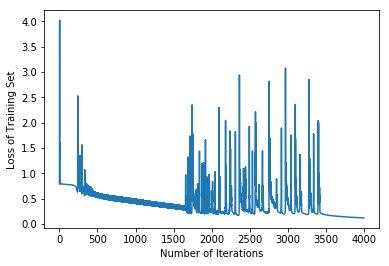

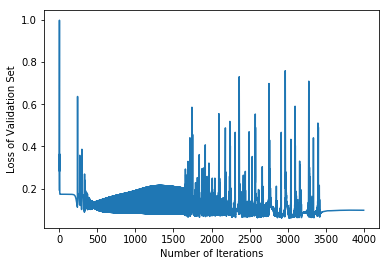

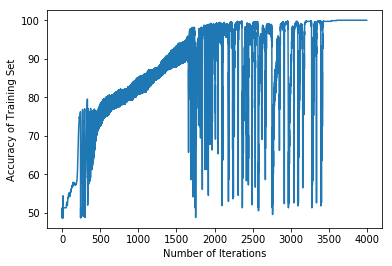

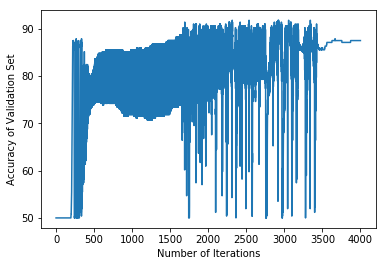

In [19]:
    print("Bias")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [20]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

		training		validation		best	
loss		0.1206685028		0.0968855415		0.0672561220
accuracy	100.0000000000		87.5000000000		91.7968750000


In [21]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [22]:
learning_rate=0.5
lambd = 1e-8 #small
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

#0 Training loss : 0.6934246701	Validation loss : 0.1784376727	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#1 Training loss : 0.7102722690	Validation loss : 0.2741477938	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2 Training loss : 1.1251792075	Validation loss : 0.9589553208	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#3 Training loss : 3.7531185532	Validation loss : 0.4290440764	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4 Training loss : 1.7927032921	Validation loss : 0.4996133080	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#5 Training loss : 2.0546008893	Validation loss : 0.2117802175	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#6 Training loss : 0.8837319768	Validation loss : 0.1820481621	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#7 Training loss : 0.7314680249	Validation loss : 0.1735797082	Traini

#61 Training loss : 0.6918208794	Validation loss : 0.1727911039	Training Accuracy: 52.7750730282%	Validation Accuracy: 50.0000000000%
#62 Training loss : 0.6917968985	Validation loss : 0.1727906383	Training Accuracy: 52.6777020448%	Validation Accuracy: 50.0000000000%
#63 Training loss : 0.6917727484	Validation loss : 0.1727901602	Training Accuracy: 52.5803310613%	Validation Accuracy: 50.0000000000%
#64 Training loss : 0.6917484243	Validation loss : 0.1727896694	Training Accuracy: 52.6777020448%	Validation Accuracy: 50.0000000000%
#65 Training loss : 0.6917239212	Validation loss : 0.1727891653	Training Accuracy: 52.0934761441%	Validation Accuracy: 50.0000000000%
#66 Training loss : 0.6916992340	Validation loss : 0.1727886476	Training Accuracy: 52.2882181110%	Validation Accuracy: 50.0000000000%
#67 Training loss : 0.6916743575	Validation loss : 0.1727881158	Training Accuracy: 51.8987341772%	Validation Accuracy: 50.0000000000%
#68 Training loss : 0.6916492865	Validation loss : 0.172787569

#121 Training loss : 0.6898527259	Validation loss : 0.1727181075	Training Accuracy: 55.9883154820%	Validation Accuracy: 50.0000000000%
#122 Training loss : 0.6898048341	Validation loss : 0.1727153580	Training Accuracy: 56.0856864654%	Validation Accuracy: 50.0000000000%
#123 Training loss : 0.6897561375	Validation loss : 0.1727125095	Training Accuracy: 56.2804284323%	Validation Accuracy: 50.0000000000%
#124 Training loss : 0.6897066122	Validation loss : 0.1727095573	Training Accuracy: 56.4751703992%	Validation Accuracy: 50.0000000000%
#125 Training loss : 0.6896562333	Validation loss : 0.1727064968	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#126 Training loss : 0.6896049751	Validation loss : 0.1727033227	Training Accuracy: 56.8646543330%	Validation Accuracy: 50.0000000000%
#127 Training loss : 0.6895528106	Validation loss : 0.1727000298	Training Accuracy: 56.6699123661%	Validation Accuracy: 50.0000000000%
#128 Training loss : 0.6894997117	Validation loss : 0.1

#181 Training loss : 0.6836717143	Validation loss : 0.1718612073	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#182 Training loss : 0.6834327339	Validation loss : 0.1718079581	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#183 Training loss : 0.6831829551	Validation loss : 0.1717509022	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#184 Training loss : 0.6829216536	Validation loss : 0.1716897145	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#185 Training loss : 0.6826480459	Validation loss : 0.1716240381	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#186 Training loss : 0.6823612838	Validation loss : 0.1715534811	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#187 Training loss : 0.6820604490	Validation loss : 0.1714776128	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#188 Training loss : 0.6817445469	Validation loss : 0.1

#241 Training loss : 0.5537941564	Validation loss : 0.1128427081	Training Accuracy: 75.3651411879%	Validation Accuracy: 86.3281250000%
#242 Training loss : 0.5479382369	Validation loss : 0.1105272429	Training Accuracy: 75.9493670886%	Validation Accuracy: 86.3281250000%
#243 Training loss : 0.5421360383	Validation loss : 0.1082999319	Training Accuracy: 76.1441090555%	Validation Accuracy: 86.3281250000%
#244 Training loss : 0.5364091674	Validation loss : 0.1061219338	Training Accuracy: 76.6309639727%	Validation Accuracy: 86.3281250000%
#245 Training loss : 0.5307765216	Validation loss : 0.1043129680	Training Accuracy: 76.6309639727%	Validation Accuracy: 85.9375000000%
#246 Training loss : 0.5252676191	Validation loss : 0.1010387123	Training Accuracy: 77.2151898734%	Validation Accuracy: 86.7187500000%
#247 Training loss : 0.5205033173	Validation loss : 0.1237380663	Training Accuracy: 77.3125608569%	Validation Accuracy: 69.5312500000%
#248 Training loss : 0.5440278917	Validation loss : 0.3

#301 Training loss : 0.6395763615	Validation loss : 0.1522324059	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.8906250000%
#302 Training loss : 0.6362633238	Validation loss : 0.1507049128	Training Accuracy: 74.3914313535%	Validation Accuracy: 87.8906250000%
#303 Training loss : 0.6328207327	Validation loss : 0.1491808760	Training Accuracy: 74.6835443038%	Validation Accuracy: 88.2812500000%
#304 Training loss : 0.6292832775	Validation loss : 0.1476708824	Training Accuracy: 74.5861733204%	Validation Accuracy: 87.8906250000%
#305 Training loss : 0.6256510770	Validation loss : 0.1461125478	Training Accuracy: 75.1703992210%	Validation Accuracy: 86.7187500000%
#306 Training loss : 0.6218581194	Validation loss : 0.1444374624	Training Accuracy: 74.9756572541%	Validation Accuracy: 86.7187500000%
#307 Training loss : 0.6178293201	Validation loss : 0.1426474861	Training Accuracy: 74.8782862707%	Validation Accuracy: 86.3281250000%
#308 Training loss : 0.6135592873	Validation loss : 0.1

#361 Training loss : 0.5552741599	Validation loss : 0.1071867090	Training Accuracy: 75.0730282376%	Validation Accuracy: 86.3281250000%
#362 Training loss : 0.5328572854	Validation loss : 0.1019164992	Training Accuracy: 76.5335929893%	Validation Accuracy: 87.5000000000%
#363 Training loss : 0.5194152821	Validation loss : 0.1187997295	Training Accuracy: 76.0467380721%	Validation Accuracy: 74.2187500000%
#364 Training loss : 0.5245107027	Validation loss : 0.1268333059	Training Accuracy: 75.1703992210%	Validation Accuracy: 75.3906250000%
#365 Training loss : 0.6041445578	Validation loss : 0.2654013347	Training Accuracy: 65.8227848101%	Validation Accuracy: 50.0000000000%
#366 Training loss : 0.8048067257	Validation loss : 0.3173078452	Training Accuracy: 51.6066212269%	Validation Accuracy: 50.0000000000%
#367 Training loss : 1.1845161882	Validation loss : 0.1919391795	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#368 Training loss : 0.7127758385	Validation loss : 0.1

#421 Training loss : 0.8353869560	Validation loss : 0.1708277712	Training Accuracy: 51.8013631938%	Validation Accuracy: 51.5625000000%
#422 Training loss : 0.6485193554	Validation loss : 0.1636771697	Training Accuracy: 60.7594936709%	Validation Accuracy: 59.3750000000%
#423 Training loss : 0.6343230977	Validation loss : 0.1593113429	Training Accuracy: 66.3096397274%	Validation Accuracy: 64.0625000000%
#424 Training loss : 0.6230124706	Validation loss : 0.1524644464	Training Accuracy: 68.5491723466%	Validation Accuracy: 73.0468750000%
#425 Training loss : 0.6079580532	Validation loss : 0.1419268218	Training Accuracy: 70.8860759494%	Validation Accuracy: 80.4687500000%
#426 Training loss : 0.5880130371	Validation loss : 0.1276811799	Training Accuracy: 73.2229795521%	Validation Accuracy: 85.9375000000%
#427 Training loss : 0.5632248352	Validation loss : 0.1129613926	Training Accuracy: 75.4625121714%	Validation Accuracy: 87.1093750000%
#428 Training loss : 0.5364076752	Validation loss : 0.1

#481 Training loss : 0.4276917286	Validation loss : 0.0875346995	Training Accuracy: 81.4021421616%	Validation Accuracy: 85.5468750000%
#482 Training loss : 0.4245461875	Validation loss : 0.0938019908	Training Accuracy: 81.5968841285%	Validation Accuracy: 82.4218750000%
#483 Training loss : 0.4222762086	Validation loss : 0.0800308732	Training Accuracy: 81.7916260954%	Validation Accuracy: 87.5000000000%
#484 Training loss : 0.4235912893	Validation loss : 0.1364461435	Training Accuracy: 81.4995131451%	Validation Accuracy: 72.2656250000%
#485 Training loss : 0.4496276850	Validation loss : 0.1227452585	Training Accuracy: 78.9678675755%	Validation Accuracy: 76.5625000000%
#486 Training loss : 0.6524773899	Validation loss : 0.4151232023	Training Accuracy: 66.1148977605%	Validation Accuracy: 50.0000000000%
#487 Training loss : 0.9710666127	Validation loss : 0.3731224813	Training Accuracy: 53.9435248296%	Validation Accuracy: 50.0000000000%
#488 Training loss : 1.4207417680	Validation loss : 0.2

#541 Training loss : 0.4497556056	Validation loss : 0.0919502151	Training Accuracy: 79.0652385589%	Validation Accuracy: 84.7656250000%
#542 Training loss : 0.5113103627	Validation loss : 0.1772905378	Training Accuracy: 74.7809152872%	Validation Accuracy: 64.0625000000%
#543 Training loss : 0.5228567908	Validation loss : 0.1850312555	Training Accuracy: 72.9308666018%	Validation Accuracy: 59.7656250000%
#544 Training loss : 0.7663682840	Validation loss : 0.0906539719	Training Accuracy: 59.7857838364%	Validation Accuracy: 85.5468750000%
#545 Training loss : 0.4401431364	Validation loss : 0.0766392878	Training Accuracy: 80.0389483934%	Validation Accuracy: 89.4531250000%
#546 Training loss : 0.4308428819	Validation loss : 0.1043111171	Training Accuracy: 80.5258033106%	Validation Accuracy: 81.6406250000%
#547 Training loss : 0.4280443602	Validation loss : 0.0768083305	Training Accuracy: 80.3310613437%	Validation Accuracy: 87.8906250000%
#548 Training loss : 0.4534714667	Validation loss : 0.1

#601 Training loss : 0.4453938695	Validation loss : 0.0927816900	Training Accuracy: 78.4810126582%	Validation Accuracy: 83.9843750000%
#602 Training loss : 0.5186337149	Validation loss : 0.1460922786	Training Accuracy: 74.0993184031%	Validation Accuracy: 73.4375000000%
#603 Training loss : 0.4442555236	Validation loss : 0.0923008411	Training Accuracy: 78.6757546251%	Validation Accuracy: 84.3750000000%
#604 Training loss : 0.5171412730	Validation loss : 0.1463293159	Training Accuracy: 74.2940603700%	Validation Accuracy: 73.4375000000%
#605 Training loss : 0.4431271708	Validation loss : 0.0918355813	Training Accuracy: 78.8704965920%	Validation Accuracy: 84.3750000000%
#606 Training loss : 0.5156733163	Validation loss : 0.1465595881	Training Accuracy: 74.2940603700%	Validation Accuracy: 73.4375000000%
#607 Training loss : 0.4420084328	Validation loss : 0.0913853658	Training Accuracy: 78.9678675755%	Validation Accuracy: 84.3750000000%
#608 Training loss : 0.5142292062	Validation loss : 0.1

#661 Training loss : 0.4147432195	Validation loss : 0.0833791703	Training Accuracy: 80.1363193768%	Validation Accuracy: 85.9375000000%
#662 Training loss : 0.4826631062	Validation loss : 0.1517151078	Training Accuracy: 76.4362220058%	Validation Accuracy: 73.8281250000%
#663 Training loss : 0.4138317931	Validation loss : 0.0831972045	Training Accuracy: 80.1363193768%	Validation Accuracy: 85.9375000000%
#664 Training loss : 0.4817303100	Validation loss : 0.1518925009	Training Accuracy: 76.4362220058%	Validation Accuracy: 73.8281250000%
#665 Training loss : 0.4129275621	Validation loss : 0.0830214433	Training Accuracy: 80.1363193768%	Validation Accuracy: 85.9375000000%
#666 Training loss : 0.4808132358	Validation loss : 0.1520723789	Training Accuracy: 76.5335929893%	Validation Accuracy: 73.8281250000%
#667 Training loss : 0.4120303840	Validation loss : 0.0828515323	Training Accuracy: 80.1363193768%	Validation Accuracy: 85.9375000000%
#668 Training loss : 0.4799110287	Validation loss : 0.1

#721 Training loss : 0.3899621922	Validation loss : 0.0797727531	Training Accuracy: 81.3047711782%	Validation Accuracy: 87.1093750000%
#722 Training loss : 0.4589292002	Validation loss : 0.1578216534	Training Accuracy: 77.5073028238%	Validation Accuracy: 73.8281250000%
#723 Training loss : 0.3892071428	Validation loss : 0.0796993200	Training Accuracy: 81.3047711782%	Validation Accuracy: 87.1093750000%
#724 Training loss : 0.4582264783	Validation loss : 0.1580339325	Training Accuracy: 77.6046738072%	Validation Accuracy: 73.8281250000%
#725 Training loss : 0.3884552085	Validation loss : 0.0796279434	Training Accuracy: 81.4021421616%	Validation Accuracy: 87.1093750000%
#726 Training loss : 0.4575265321	Validation loss : 0.1582463304	Training Accuracy: 77.6046738072%	Validation Accuracy: 73.8281250000%
#727 Training loss : 0.3877062672	Validation loss : 0.0795585568	Training Accuracy: 81.4021421616%	Validation Accuracy: 87.1093750000%
#728 Training loss : 0.4568292137	Validation loss : 0.1

#781 Training loss : 0.3682664207	Validation loss : 0.0782419534	Training Accuracy: 82.4732229796%	Validation Accuracy: 86.3281250000%
#782 Training loss : 0.4386892523	Validation loss : 0.1645796989	Training Accuracy: 78.6757546251%	Validation Accuracy: 74.2187500000%
#783 Training loss : 0.3675649776	Validation loss : 0.0782071437	Training Accuracy: 82.5705939630%	Validation Accuracy: 86.3281250000%
#784 Training loss : 0.4380326397	Validation loss : 0.1648334203	Training Accuracy: 78.6757546251%	Validation Accuracy: 74.2187500000%
#785 Training loss : 0.3668641671	Validation loss : 0.0781728865	Training Accuracy: 82.7653359299%	Validation Accuracy: 86.3281250000%
#786 Training loss : 0.4373759409	Validation loss : 0.1650894043	Training Accuracy: 78.7731256086%	Validation Accuracy: 74.2187500000%
#787 Training loss : 0.3661639206	Validation loss : 0.0781391616	Training Accuracy: 82.7653359299%	Validation Accuracy: 86.3281250000%
#788 Training loss : 0.4367190399	Validation loss : 0.1

#841 Training loss : 0.3472566972	Validation loss : 0.0774495542	Training Accuracy: 82.8627069133%	Validation Accuracy: 86.3281250000%
#842 Training loss : 0.4188396805	Validation loss : 0.1730568466	Training Accuracy: 79.7468354430%	Validation Accuracy: 73.4375000000%
#843 Training loss : 0.3465517175	Validation loss : 0.0774332268	Training Accuracy: 82.8627069133%	Validation Accuracy: 86.3281250000%
#844 Training loss : 0.4181778728	Validation loss : 0.1733752735	Training Accuracy: 79.7468354430%	Validation Accuracy: 73.4375000000%
#845 Training loss : 0.3458462114	Validation loss : 0.0774172575	Training Accuracy: 82.8627069133%	Validation Accuracy: 86.3281250000%
#846 Training loss : 0.4175153673	Validation loss : 0.1736963842	Training Accuracy: 79.7468354430%	Validation Accuracy: 73.4375000000%
#847 Training loss : 0.3451401456	Validation loss : 0.0774015908	Training Accuracy: 82.8627069133%	Validation Accuracy: 86.3281250000%
#848 Training loss : 0.4168519596	Validation loss : 0.1

#901 Training loss : 0.3258043304	Validation loss : 0.0770301413	Training Accuracy: 84.7127555988%	Validation Accuracy: 86.3281250000%
#902 Training loss : 0.3985340044	Validation loss : 0.1838517164	Training Accuracy: 80.4284323272%	Validation Accuracy: 72.2656250000%
#903 Training loss : 0.3250777889	Validation loss : 0.0770147009	Training Accuracy: 84.7127555988%	Validation Accuracy: 86.3281250000%
#904 Training loss : 0.3978361099	Validation loss : 0.1842593336	Training Accuracy: 80.5258033106%	Validation Accuracy: 72.2656250000%
#905 Training loss : 0.3243500144	Validation loss : 0.0769986179	Training Accuracy: 84.8101265823%	Validation Accuracy: 86.3281250000%
#906 Training loss : 0.3971345427	Validation loss : 0.1846692298	Training Accuracy: 80.5258033106%	Validation Accuracy: 72.6562500000%
#907 Training loss : 0.3236208179	Validation loss : 0.0769819050	Training Accuracy: 84.9074975657%	Validation Accuracy: 86.3281250000%
#908 Training loss : 0.3964291659	Validation loss : 0.1

#961 Training loss : 0.3034727428	Validation loss : 0.0765063542	Training Accuracy: 86.4654333009%	Validation Accuracy: 86.3281250000%
#962 Training loss : 0.3770176739	Validation loss : 0.1971910204	Training Accuracy: 81.3047711782%	Validation Accuracy: 72.2656250000%
#963 Training loss : 0.3027136155	Validation loss : 0.0764839845	Training Accuracy: 86.4654333009%	Validation Accuracy: 86.3281250000%
#964 Training loss : 0.3762679351	Validation loss : 0.1976638795	Training Accuracy: 81.4021421616%	Validation Accuracy: 72.2656250000%
#965 Training loss : 0.3019538768	Validation loss : 0.0764612329	Training Accuracy: 86.4654333009%	Validation Accuracy: 86.3281250000%
#966 Training loss : 0.3755156792	Validation loss : 0.1981375256	Training Accuracy: 81.4021421616%	Validation Accuracy: 72.2656250000%
#967 Training loss : 0.3011935657	Validation loss : 0.0764381110	Training Accuracy: 86.4654333009%	Validation Accuracy: 86.3281250000%
#968 Training loss : 0.3747609574	Validation loss : 0.1

#1021 Training loss : 0.2805085462	Validation loss : 0.0757046092	Training Accuracy: 87.2444011685%	Validation Accuracy: 86.7187500000%
#1022 Training loss : 0.3534173036	Validation loss : 0.2112548705	Training Accuracy: 82.7653359299%	Validation Accuracy: 71.8750000000%
#1023 Training loss : 0.2797395699	Validation loss : 0.0756754621	Training Accuracy: 87.2444011685%	Validation Accuracy: 86.7187500000%
#1024 Training loss : 0.3525923786	Validation loss : 0.2116997086	Training Accuracy: 82.7653359299%	Validation Accuracy: 71.8750000000%
#1025 Training loss : 0.2789707398	Validation loss : 0.0756463797	Training Accuracy: 87.3417721519%	Validation Accuracy: 86.7187500000%
#1026 Training loss : 0.3517655319	Validation loss : 0.2121417927	Training Accuracy: 82.7653359299%	Validation Accuracy: 71.8750000000%
#1027 Training loss : 0.2782020981	Validation loss : 0.0756173829	Training Accuracy: 87.4391431353%	Validation Accuracy: 86.7187500000%
#1028 Training loss : 0.3509368412	Validation lo

#1081 Training loss : 0.2576702811	Validation loss : 0.0749278629	Training Accuracy: 88.3154819864%	Validation Accuracy: 87.5000000000%
#1082 Training loss : 0.3281721317	Validation loss : 0.2231506611	Training Accuracy: 84.8101265823%	Validation Accuracy: 71.4843750000%
#1083 Training loss : 0.2569234226	Validation loss : 0.0749074132	Training Accuracy: 88.3154819864%	Validation Accuracy: 87.5000000000%
#1084 Training loss : 0.3273265498	Validation loss : 0.2234899131	Training Accuracy: 84.8101265823%	Validation Accuracy: 71.4843750000%
#1085 Training loss : 0.2561778766	Validation loss : 0.0748873907	Training Accuracy: 88.3154819864%	Validation Accuracy: 87.5000000000%
#1086 Training loss : 0.3264815987	Validation loss : 0.2238252806	Training Accuracy: 84.9074975657%	Validation Accuracy: 71.4843750000%
#1087 Training loss : 0.2554336693	Validation loss : 0.0748677956	Training Accuracy: 88.4128529698%	Validation Accuracy: 87.5000000000%
#1088 Training loss : 0.3256373397	Validation lo

#1141 Training loss : 0.2359087764	Validation loss : 0.0744883235	Training Accuracy: 89.8734177215%	Validation Accuracy: 88.2812500000%
#1142 Training loss : 0.3032599839	Validation loss : 0.2316263766	Training Accuracy: 86.7575462512%	Validation Accuracy: 71.0937500000%
#1143 Training loss : 0.2352079122	Validation loss : 0.0744791878	Training Accuracy: 89.9707887050%	Validation Accuracy: 88.2812500000%
#1144 Training loss : 0.3024508011	Validation loss : 0.2318491170	Training Accuracy: 86.7575462512%	Validation Accuracy: 71.0937500000%
#1145 Training loss : 0.2345086376	Validation loss : 0.0744703687	Training Accuracy: 90.1655306719%	Validation Accuracy: 88.2812500000%
#1146 Training loss : 0.3016432091	Validation loss : 0.2320680945	Training Accuracy: 86.7575462512%	Validation Accuracy: 71.0937500000%
#1147 Training loss : 0.2338109423	Validation loss : 0.0744618650	Training Accuracy: 90.1655306719%	Validation Accuracy: 88.2812500000%
#1148 Training loss : 0.3008372153	Validation lo

#1201 Training loss : 0.2155011941	Validation loss : 0.0743438173	Training Accuracy: 91.3339824732%	Validation Accuracy: 88.6718750000%
#1202 Training loss : 0.2796439193	Validation loss : 0.2367657625	Training Accuracy: 88.3154819864%	Validation Accuracy: 71.4843750000%
#1203 Training loss : 0.2148397497	Validation loss : 0.0743430478	Training Accuracy: 91.3339824732%	Validation Accuracy: 88.6718750000%
#1204 Training loss : 0.2788777083	Validation loss : 0.2368875567	Training Accuracy: 88.3154819864%	Validation Accuracy: 71.4843750000%
#1205 Training loss : 0.2141793317	Validation loss : 0.0743424912	Training Accuracy: 91.4313534567%	Validation Accuracy: 88.6718750000%
#1206 Training loss : 0.2781127088	Validation loss : 0.2370066055	Training Accuracy: 88.3154819864%	Validation Accuracy: 71.4843750000%
#1207 Training loss : 0.2135199293	Validation loss : 0.0743421437	Training Accuracy: 91.5287244401%	Validation Accuracy: 88.6718750000%
#1208 Training loss : 0.2773489173	Validation lo

#1261 Training loss : 0.1960447288	Validation loss : 0.0744087048	Training Accuracy: 92.0155793574%	Validation Accuracy: 89.8437500000%
#1262 Training loss : 0.2571426205	Validation loss : 0.2393337244	Training Accuracy: 89.2891918208%	Validation Accuracy: 72.2656250000%
#1263 Training loss : 0.1954056108	Validation loss : 0.0744140413	Training Accuracy: 92.1129503408%	Validation Accuracy: 89.8437500000%
#1264 Training loss : 0.2564041330	Validation loss : 0.2393829909	Training Accuracy: 89.2891918208%	Validation Accuracy: 72.2656250000%
#1265 Training loss : 0.1947665525	Validation loss : 0.0744195840	Training Accuracy: 92.1129503408%	Validation Accuracy: 89.8437500000%
#1266 Training loss : 0.2556655032	Validation loss : 0.2394299419	Training Accuracy: 89.2891918208%	Validation Accuracy: 72.2656250000%
#1267 Training loss : 0.1941274743	Validation loss : 0.0744253336	Training Accuracy: 92.3076923077%	Validation Accuracy: 89.8437500000%
#1268 Training loss : 0.2549265972	Validation lo

#1321 Training loss : 0.1766017657	Validation loss : 0.0746917910	Training Accuracy: 93.4761441091%	Validation Accuracy: 89.8437500000%
#1322 Training loss : 0.2345056276	Validation loss : 0.2397088797	Training Accuracy: 89.9707887050%	Validation Accuracy: 72.6562500000%
#1323 Training loss : 0.1759387364	Validation loss : 0.0747082882	Training Accuracy: 93.7682570594%	Validation Accuracy: 89.8437500000%
#1324 Training loss : 0.2337320960	Validation loss : 0.2396806441	Training Accuracy: 89.9707887050%	Validation Accuracy: 72.6562500000%
#1325 Training loss : 0.1752751884	Validation loss : 0.0747254992	Training Accuracy: 93.7682570594%	Validation Accuracy: 89.8437500000%
#1326 Training loss : 0.2329588625	Validation loss : 0.2396501251	Training Accuracy: 89.9707887050%	Validation Accuracy: 72.6562500000%
#1327 Training loss : 0.1746112623	Validation loss : 0.0747434461	Training Accuracy: 93.7682570594%	Validation Accuracy: 89.8437500000%
#1328 Training loss : 0.2321862358	Validation lo

#1381 Training loss : 0.1570491984	Validation loss : 0.0755109345	Training Accuracy: 94.9367088608%	Validation Accuracy: 90.2343750000%
#1382 Training loss : 0.2124209305	Validation loss : 0.2383062776	Training Accuracy: 91.1392405063%	Validation Accuracy: 73.0468750000%
#1383 Training loss : 0.1564234327	Validation loss : 0.0755478493	Training Accuracy: 95.1314508277%	Validation Accuracy: 90.2343750000%
#1384 Training loss : 0.2117401596	Validation loss : 0.2382520666	Training Accuracy: 91.1392405063%	Validation Accuracy: 73.0468750000%
#1385 Training loss : 0.1557994173	Validation loss : 0.0755851646	Training Accuracy: 95.1314508277%	Validation Accuracy: 90.2343750000%
#1386 Training loss : 0.2110619972	Validation loss : 0.2381975729	Training Accuracy: 91.2366114898%	Validation Accuracy: 73.0468750000%
#1387 Training loss : 0.1551770619	Validation loss : 0.0756228617	Training Accuracy: 95.1314508277%	Validation Accuracy: 90.2343750000%
#1388 Training loss : 0.2103861583	Validation lo

#1441 Training loss : 0.1382746471	Validation loss : 0.0767557966	Training Accuracy: 95.8130477118%	Validation Accuracy: 90.2343750000%
#1442 Training loss : 0.1911911910	Validation loss : 0.2359272839	Training Accuracy: 92.2103213242%	Validation Accuracy: 74.2187500000%
#1443 Training loss : 0.1375864776	Validation loss : 0.0768031025	Training Accuracy: 95.8130477118%	Validation Accuracy: 90.2343750000%
#1444 Training loss : 0.1903070125	Validation loss : 0.2357621092	Training Accuracy: 92.2103213242%	Validation Accuracy: 74.2187500000%
#1445 Training loss : 0.1368830686	Validation loss : 0.0768512068	Training Accuracy: 95.8130477118%	Validation Accuracy: 90.2343750000%
#1446 Training loss : 0.1893844121	Validation loss : 0.2355793342	Training Accuracy: 92.2103213242%	Validation Accuracy: 74.2187500000%
#1447 Training loss : 0.1361609291	Validation loss : 0.0769002695	Training Accuracy: 95.8130477118%	Validation Accuracy: 90.2343750000%
#1448 Training loss : 0.1884145297	Validation lo

#1501 Training loss : 0.2099197958	Validation loss : 0.1738565779	Training Accuracy: 90.7497565725%	Validation Accuracy: 76.9531250000%
#1502 Training loss : 0.1490228930	Validation loss : 0.0788511284	Training Accuracy: 96.4946445959%	Validation Accuracy: 88.6718750000%
#1503 Training loss : 0.1367505294	Validation loss : 0.1586764447	Training Accuracy: 95.4235637780%	Validation Accuracy: 78.1250000000%
#1504 Training loss : 0.1180124219	Validation loss : 0.1066648722	Training Accuracy: 97.4683544304%	Validation Accuracy: 80.4687500000%
#1505 Training loss : 0.1122724944	Validation loss : 0.1570180751	Training Accuracy: 97.1762414800%	Validation Accuracy: 78.5156250000%
#1506 Training loss : 0.1069737285	Validation loss : 0.1258058512	Training Accuracy: 97.3709834469%	Validation Accuracy: 80.8593750000%
#1507 Training loss : 0.1043910926	Validation loss : 0.1597546156	Training Accuracy: 97.4683544304%	Validation Accuracy: 78.1250000000%
#1508 Training loss : 0.1019310296	Validation lo

#1561 Training loss : 0.6213866296	Validation loss : 0.2698947050	Training Accuracy: 74.1966893866%	Validation Accuracy: 72.2656250000%
#1562 Training loss : 0.2582041923	Validation loss : 0.1084103548	Training Accuracy: 87.9259980526%	Validation Accuracy: 84.3750000000%
#1563 Training loss : 0.4062502208	Validation loss : 0.2680048530	Training Accuracy: 81.5968841285%	Validation Accuracy: 73.4375000000%
#1564 Training loss : 0.1676934356	Validation loss : 0.0769102623	Training Accuracy: 95.1314508277%	Validation Accuracy: 88.2812500000%
#1565 Training loss : 0.2035356335	Validation loss : 0.1829853238	Training Accuracy: 90.9444985394%	Validation Accuracy: 78.1250000000%
#1566 Training loss : 0.1081707775	Validation loss : 0.1081346305	Training Accuracy: 97.9552093476%	Validation Accuracy: 82.8125000000%
#1567 Training loss : 0.0954407746	Validation loss : 0.1673354367	Training Accuracy: 97.1762414800%	Validation Accuracy: 78.5156250000%
#1568 Training loss : 0.0853710186	Validation lo

#1621 Training loss : 0.1010124905	Validation loss : 0.2042594191	Training Accuracy: 96.1051606621%	Validation Accuracy: 75.3906250000%
#1622 Training loss : 0.0758314184	Validation loss : 0.0895311883	Training Accuracy: 98.6368062317%	Validation Accuracy: 87.5000000000%
#1623 Training loss : 0.1008939481	Validation loss : 0.2044447333	Training Accuracy: 96.1051606621%	Validation Accuracy: 75.3906250000%
#1624 Training loss : 0.0755124576	Validation loss : 0.0894281716	Training Accuracy: 98.6368062317%	Validation Accuracy: 87.5000000000%
#1625 Training loss : 0.1007043314	Validation loss : 0.2046183512	Training Accuracy: 96.1051606621%	Validation Accuracy: 75.3906250000%
#1626 Training loss : 0.0751847189	Validation loss : 0.0893407282	Training Accuracy: 98.6368062317%	Validation Accuracy: 87.5000000000%
#1627 Training loss : 0.1004923804	Validation loss : 0.2047924279	Training Accuracy: 96.1051606621%	Validation Accuracy: 75.3906250000%
#1628 Training loss : 0.0748623218	Validation lo

#1681 Training loss : 0.0917805064	Validation loss : 0.2069898337	Training Accuracy: 96.2999026290%	Validation Accuracy: 75.3906250000%
#1682 Training loss : 0.0661049020	Validation loss : 0.0890457034	Training Accuracy: 99.1236611490%	Validation Accuracy: 88.6718750000%
#1683 Training loss : 0.0911241146	Validation loss : 0.2069091880	Training Accuracy: 96.2999026290%	Validation Accuracy: 75.3906250000%
#1684 Training loss : 0.0656777480	Validation loss : 0.0891534444	Training Accuracy: 99.2210321324%	Validation Accuracy: 88.6718750000%
#1685 Training loss : 0.0904348249	Validation loss : 0.2068265708	Training Accuracy: 96.2999026290%	Validation Accuracy: 75.3906250000%
#1686 Training loss : 0.0652490605	Validation loss : 0.0892595176	Training Accuracy: 99.2210321324%	Validation Accuracy: 88.6718750000%
#1687 Training loss : 0.0897633767	Validation loss : 0.2067634359	Training Accuracy: 96.3972736125%	Validation Accuracy: 75.3906250000%
#1688 Training loss : 0.0648401977	Validation lo

#1741 Training loss : 0.0334235967	Validation loss : 0.1728627100	Training Accuracy: 99.2210321324%	Validation Accuracy: 78.9062500000%
#1742 Training loss : 0.0330996198	Validation loss : 0.1499553999	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.6875000000%
#1743 Training loss : 0.0331258313	Validation loss : 0.1734653873	Training Accuracy: 99.2210321324%	Validation Accuracy: 78.9062500000%
#1744 Training loss : 0.0328059074	Validation loss : 0.1495599992	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.6875000000%
#1745 Training loss : 0.0328724803	Validation loss : 0.1741841483	Training Accuracy: 99.2210321324%	Validation Accuracy: 78.9062500000%
#1746 Training loss : 0.0325474514	Validation loss : 0.1489366876	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.6875000000%
#1747 Training loss : 0.0326655260	Validation loss : 0.1750151569	Training Accuracy: 99.2210321324%	Validation Accuracy: 78.9062500000%
#1748 Training loss : 0.0323259102	Validation lo

#1801 Training loss : 0.3020676226	Validation loss : 0.0748191260	Training Accuracy: 86.5628042843%	Validation Accuracy: 87.5000000000%
#1802 Training loss : 0.3767353117	Validation loss : 0.2641192910	Training Accuracy: 80.0389483934%	Validation Accuracy: 70.3125000000%
#1803 Training loss : 0.2993062097	Validation loss : 0.0749665132	Training Accuracy: 87.0496592016%	Validation Accuracy: 87.5000000000%
#1804 Training loss : 0.3755657138	Validation loss : 0.2671640836	Training Accuracy: 80.0389483934%	Validation Accuracy: 70.3125000000%
#1805 Training loss : 0.3006381601	Validation loss : 0.0764535808	Training Accuracy: 86.9522882181%	Validation Accuracy: 86.7187500000%
#1806 Training loss : 0.3873921130	Validation loss : 0.2582225062	Training Accuracy: 78.8704965920%	Validation Accuracy: 70.3125000000%
#1807 Training loss : 0.2960051365	Validation loss : 0.0749588402	Training Accuracy: 87.0496592016%	Validation Accuracy: 87.8906250000%
#1808 Training loss : 0.3658639079	Validation lo

#1861 Training loss : 0.2419604976	Validation loss : 0.0778485269	Training Accuracy: 91.4313534567%	Validation Accuracy: 87.5000000000%
#1862 Training loss : 0.3313292503	Validation loss : 0.2440150732	Training Accuracy: 82.2784810127%	Validation Accuracy: 74.6093750000%
#1863 Training loss : 0.2368893052	Validation loss : 0.0743632949	Training Accuracy: 91.2366114898%	Validation Accuracy: 88.6718750000%
#1864 Training loss : 0.2869609949	Validation loss : 0.2431458290	Training Accuracy: 84.7127555988%	Validation Accuracy: 74.6093750000%
#1865 Training loss : 0.2034156942	Validation loss : 0.0731296692	Training Accuracy: 93.6708860759%	Validation Accuracy: 89.0625000000%
#1866 Training loss : 0.2418068007	Validation loss : 0.2198153527	Training Accuracy: 87.2444011685%	Validation Accuracy: 75.3906250000%
#1867 Training loss : 0.1867452184	Validation loss : 0.0760525573	Training Accuracy: 95.3261927945%	Validation Accuracy: 90.6250000000%
#1868 Training loss : 0.1982220442	Validation lo

#1921 Training loss : 0.1064080107	Validation loss : 0.1706805948	Training Accuracy: 97.5657254138%	Validation Accuracy: 78.9062500000%
#1922 Training loss : 0.1052800721	Validation loss : 0.1398981887	Training Accuracy: 98.0525803311%	Validation Accuracy: 80.0781250000%
#1923 Training loss : 0.1049435890	Validation loss : 0.1788314019	Training Accuracy: 97.4683544304%	Validation Accuracy: 78.5156250000%
#1924 Training loss : 0.1045318918	Validation loss : 0.1294973940	Training Accuracy: 98.0525803311%	Validation Accuracy: 80.4687500000%
#1925 Training loss : 0.1062305762	Validation loss : 0.1898557839	Training Accuracy: 96.9814995131%	Validation Accuracy: 77.3437500000%
#1926 Training loss : 0.1067023995	Validation loss : 0.1096704906	Training Accuracy: 97.9552093476%	Validation Accuracy: 82.8125000000%
#1927 Training loss : 0.1142691837	Validation loss : 0.2024076325	Training Accuracy: 96.1051606621%	Validation Accuracy: 76.5625000000%
#1928 Training loss : 0.1135487275	Validation lo

#1981 Training loss : 0.1217523740	Validation loss : 0.2235593010	Training Accuracy: 95.4235637780%	Validation Accuracy: 75.7812500000%
#1982 Training loss : 0.0955643751	Validation loss : 0.0859903328	Training Accuracy: 98.4420642648%	Validation Accuracy: 89.0625000000%
#1983 Training loss : 0.1183220007	Validation loss : 0.2229374327	Training Accuracy: 95.7156767283%	Validation Accuracy: 75.7812500000%
#1984 Training loss : 0.0937266527	Validation loss : 0.0866398557	Training Accuracy: 98.4420642648%	Validation Accuracy: 88.6718750000%
#1985 Training loss : 0.1160223391	Validation loss : 0.2230816199	Training Accuracy: 95.7156767283%	Validation Accuracy: 75.7812500000%
#1986 Training loss : 0.0926491783	Validation loss : 0.0865077616	Training Accuracy: 98.4420642648%	Validation Accuracy: 88.6718750000%
#1987 Training loss : 0.1157227858	Validation loss : 0.2241965091	Training Accuracy: 95.7156767283%	Validation Accuracy: 75.7812500000%
#1988 Training loss : 0.0925936387	Validation lo

#2041 Training loss : 0.2897808734	Validation loss : 0.1678837757	Training Accuracy: 85.7838364167%	Validation Accuracy: 74.6093750000%
#2042 Training loss : 0.2216215738	Validation loss : 0.0702957994	Training Accuracy: 91.2366114898%	Validation Accuracy: 89.4531250000%
#2043 Training loss : 0.2412120259	Validation loss : 0.1652739852	Training Accuracy: 88.3154819864%	Validation Accuracy: 75.7812500000%
#2044 Training loss : 0.1890054289	Validation loss : 0.0669530724	Training Accuracy: 93.5735150925%	Validation Accuracy: 89.8437500000%
#2045 Training loss : 0.1961536610	Validation loss : 0.1700684653	Training Accuracy: 91.6260954236%	Validation Accuracy: 77.7343750000%
#2046 Training loss : 0.1569152065	Validation loss : 0.0693678602	Training Accuracy: 96.2999026290%	Validation Accuracy: 91.0156250000%
#2047 Training loss : 0.1543650768	Validation loss : 0.1679546750	Training Accuracy: 93.7682570594%	Validation Accuracy: 79.2968750000%
#2048 Training loss : 0.1305714267	Validation lo

#2101 Training loss : 0.0710128932	Validation loss : 0.1047835496	Training Accuracy: 99.2210321324%	Validation Accuracy: 85.1562500000%
#2102 Training loss : 0.0751435212	Validation loss : 0.1828016807	Training Accuracy: 97.6630963973%	Validation Accuracy: 78.1250000000%
#2103 Training loss : 0.0740505507	Validation loss : 0.0901428287	Training Accuracy: 99.1236611490%	Validation Accuracy: 86.7187500000%
#2104 Training loss : 0.0848293348	Validation loss : 0.1931909997	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#2105 Training loss : 0.0802401597	Validation loss : 0.0787464988	Training Accuracy: 98.8315481986%	Validation Accuracy: 89.0625000000%
#2106 Training loss : 0.1030535005	Validation loss : 0.2031050269	Training Accuracy: 95.9104186952%	Validation Accuracy: 77.7343750000%
#2107 Training loss : 0.0887502452	Validation loss : 0.0751257514	Training Accuracy: 98.2473222980%	Validation Accuracy: 90.2343750000%
#2108 Training loss : 0.1258332302	Validation lo

#2161 Training loss : 0.0943136444	Validation loss : 0.0917473091	Training Accuracy: 96.9814995131%	Validation Accuracy: 88.2812500000%
#2162 Training loss : 0.2589034362	Validation loss : 0.4085251502	Training Accuracy: 89.2891918208%	Validation Accuracy: 66.7968750000%
#2163 Training loss : 0.3888092609	Validation loss : 0.5801222474	Training Accuracy: 81.6942551120%	Validation Accuracy: 50.7812500000%
#2164 Training loss : 2.1658812569	Validation loss : 0.1392533186	Training Accuracy: 51.8987341772%	Validation Accuracy: 65.6250000000%
#2165 Training loss : 0.4272621834	Validation loss : 0.2087079309	Training Accuracy: 73.8072054528%	Validation Accuracy: 60.1562500000%
#2166 Training loss : 0.5888168712	Validation loss : 0.3865492795	Training Accuracy: 67.0886075949%	Validation Accuracy: 52.7343750000%
#2167 Training loss : 1.3357005977	Validation loss : 0.1089604374	Training Accuracy: 55.7935735151%	Validation Accuracy: 75.3906250000%
#2168 Training loss : 0.3199962210	Validation lo

#2221 Training loss : 0.0444180017	Validation loss : 0.1983690318	Training Accuracy: 99.0262901655%	Validation Accuracy: 78.5156250000%
#2222 Training loss : 0.0451341901	Validation loss : 0.1097133164	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.9375000000%
#2223 Training loss : 0.0512355082	Validation loss : 0.2135700088	Training Accuracy: 98.5394352483%	Validation Accuracy: 77.7343750000%
#2224 Training loss : 0.0530340527	Validation loss : 0.0884324803	Training Accuracy: 99.6105160662%	Validation Accuracy: 88.6718750000%
#2225 Training loss : 0.0757378516	Validation loss : 0.2401437258	Training Accuracy: 96.9814995131%	Validation Accuracy: 75.3906250000%
#2226 Training loss : 0.0777349667	Validation loss : 0.0824955804	Training Accuracy: 97.9552093476%	Validation Accuracy: 89.4531250000%
#2227 Training loss : 0.1848700332	Validation loss : 0.3454866384	Training Accuracy: 91.6260954236%	Validation Accuracy: 70.7031250000%
#2228 Training loss : 0.2341285015	Validation lo

#2281 Training loss : 0.0253465283	Validation loss : 0.1754379785	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.2968750000%
#2282 Training loss : 0.0251415406	Validation loss : 0.1752949829	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.2968750000%
#2283 Training loss : 0.0249401148	Validation loss : 0.1752038545	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.2968750000%
#2284 Training loss : 0.0247420976	Validation loss : 0.1751017294	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.2968750000%
#2285 Training loss : 0.0245473336	Validation loss : 0.1750349571	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.2968750000%
#2286 Training loss : 0.0243556705	Validation loss : 0.1749627819	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.2968750000%
#2287 Training loss : 0.0241669629	Validation loss : 0.1749141798	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.2968750000%
#2288 Training loss : 0.0239810752	Valida

#2340 Training loss : 0.0167718996	Validation loss : 0.1728861804	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2341 Training loss : 0.0166712024	Validation loss : 0.1728189440	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2342 Training loss : 0.0165717296	Validation loss : 0.1727585495	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2343 Training loss : 0.0164734529	Validation loss : 0.1727049931	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2344 Training loss : 0.0163763447	Validation loss : 0.1726581846	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2345 Training loss : 0.0162803777	Validation loss : 0.1726179631	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2346 Training loss : 0.0161855254	Validation loss : 0.1725841118	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2347 Training loss : 0.0160917622	Valida

#2399 Training loss : 0.0122823164	Validation loss : 0.1742469442	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2400 Training loss : 0.0122239726	Validation loss : 0.1742930557	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2401 Training loss : 0.0121660459	Validation loss : 0.1743390600	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2402 Training loss : 0.0121085302	Validation loss : 0.1743849431	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2403 Training loss : 0.0120514199	Validation loss : 0.1744306912	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2404 Training loss : 0.0119947095	Validation loss : 0.1744762911	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2405 Training loss : 0.0119383937	Validation loss : 0.1745217296	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2406 Training loss : 0.0118824672	Valida

#2458 Training loss : 0.0094611176	Validation loss : 0.1766804588	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2459 Training loss : 0.0094234353	Validation loss : 0.1767204993	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2460 Training loss : 0.0093860468	Validation loss : 0.1767606692	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2461 Training loss : 0.0093489485	Validation loss : 0.1768009773	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2462 Training loss : 0.0093121370	Validation loss : 0.1768414333	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2463 Training loss : 0.0092756089	Validation loss : 0.1768820478	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2464 Training loss : 0.0092393609	Validation loss : 0.1769228322	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2465 Training loss : 0.0092033899	Valida

#2517 Training loss : 0.0076534803	Validation loss : 0.1796795448	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2518 Training loss : 0.0076287868	Validation loss : 0.1797425368	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2519 Training loss : 0.0076042478	Validation loss : 0.1798056182	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2520 Training loss : 0.0075798616	Validation loss : 0.1798687676	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2521 Training loss : 0.0075556262	Validation loss : 0.1799319644	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2522 Training loss : 0.0075315399	Validation loss : 0.1799951890	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2523 Training loss : 0.0075076010	Validation loss : 0.1800584225	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2524 Training loss : 0.0074838077	Valida

#2576 Training loss : 0.0064149530	Validation loss : 0.1831954048	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2577 Training loss : 0.0063971583	Validation loss : 0.1832495019	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2578 Training loss : 0.0063794534	Validation loss : 0.1833034321	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2579 Training loss : 0.0063618376	Validation loss : 0.1833571978	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2580 Training loss : 0.0063443104	Validation loss : 0.1834108013	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2581 Training loss : 0.0063268710	Validation loss : 0.1834642447	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2582 Training loss : 0.0063095188	Validation loss : 0.1835175303	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2583 Training loss : 0.0062922532	Valida

#2635 Training loss : 0.0054999394	Validation loss : 0.1861624482	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2636 Training loss : 0.0054864959	Validation loss : 0.1862096186	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2637 Training loss : 0.0054731123	Validation loss : 0.1862567043	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2638 Training loss : 0.0054597880	Validation loss : 0.1863037058	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2639 Training loss : 0.0054465228	Validation loss : 0.1863506238	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2640 Training loss : 0.0054333162	Validation loss : 0.1863974589	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2641 Training loss : 0.0054201679	Validation loss : 0.1864442115	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2642 Training loss : 0.0054070774	Valida

#2694 Training loss : 0.0047978392	Validation loss : 0.1888149325	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2695 Training loss : 0.0047873543	Validation loss : 0.1888577990	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2696 Training loss : 0.0047769110	Validation loss : 0.1889006013	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2697 Training loss : 0.0047665091	Validation loss : 0.1889433394	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2698 Training loss : 0.0047561484	Validation loss : 0.1889860137	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2699 Training loss : 0.0047458286	Validation loss : 0.1890286244	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2700 Training loss : 0.0047355494	Validation loss : 0.1890711716	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2701 Training loss : 0.0047253107	Valida

#2753 Training loss : 0.0042434098	Validation loss : 0.1912405208	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2754 Training loss : 0.0042350229	Validation loss : 0.1912799250	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2755 Training loss : 0.0042266661	Validation loss : 0.1913192756	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2756 Training loss : 0.0042183392	Validation loss : 0.1913585730	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2757 Training loss : 0.0042100422	Validation loss : 0.1913978171	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2758 Training loss : 0.0042017748	Validation loss : 0.1914370083	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2759 Training loss : 0.0041935369	Validation loss : 0.1914761466	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2760 Training loss : 0.0041853284	Valida

#2812 Training loss : 0.0037954704	Validation loss : 0.1934786457	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2813 Training loss : 0.0037886238	Validation loss : 0.1935151412	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2814 Training loss : 0.0037817996	Validation loss : 0.1935515913	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2815 Training loss : 0.0037749978	Validation loss : 0.1935879963	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2816 Training loss : 0.0037682182	Validation loss : 0.1936243562	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2817 Training loss : 0.0037614608	Validation loss : 0.1936606711	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2818 Training loss : 0.0037547254	Validation loss : 0.1936969412	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2819 Training loss : 0.0037480119	Valida

#2871 Training loss : 0.0034267652	Validation loss : 0.1955580595	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2872 Training loss : 0.0034210810	Validation loss : 0.1955920733	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2873 Training loss : 0.0034154140	Validation loss : 0.1956260480	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2874 Training loss : 0.0034097640	Validation loss : 0.1956599839	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2875 Training loss : 0.0034041311	Validation loss : 0.1956938811	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2876 Training loss : 0.0033985151	Validation loss : 0.1957277396	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2877 Training loss : 0.0033929160	Validation loss : 0.1957615595	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2878 Training loss : 0.0033873337	Valida

#2930 Training loss : 0.0031185168	Validation loss : 0.1975011599	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2931 Training loss : 0.0031137300	Validation loss : 0.1975330272	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2932 Training loss : 0.0031089566	Validation loss : 0.1975648606	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2933 Training loss : 0.0031041965	Validation loss : 0.1975966602	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2934 Training loss : 0.0030994497	Validation loss : 0.1976284261	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2935 Training loss : 0.0030947162	Validation loss : 0.1976601582	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2936 Training loss : 0.0030899958	Validation loss : 0.1976918568	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2937 Training loss : 0.0030852885	Valida

#2989 Training loss : 0.0028573731	Validation loss : 0.1993256739	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.8125000000%
#2990 Training loss : 0.0028532924	Validation loss : 0.1993556627	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.8125000000%
#2991 Training loss : 0.0028492224	Validation loss : 0.1993856217	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.8125000000%
#2992 Training loss : 0.0028451629	Validation loss : 0.1994155508	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.8125000000%
#2993 Training loss : 0.0028411140	Validation loss : 0.1994454502	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.8125000000%
#2994 Training loss : 0.0028370756	Validation loss : 0.1994753200	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.8125000000%
#2995 Training loss : 0.0028330477	Validation loss : 0.1995051602	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.8125000000%
#2996 Training loss : 0.0028290302	Valida

#3048 Training loss : 0.0026335904	Validation loss : 0.2010458802	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.8125000000%
#3049 Training loss : 0.0026300745	Validation loss : 0.2010742082	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.8125000000%
#3050 Training loss : 0.0026265672	Validation loss : 0.2011025097	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.8125000000%
#3051 Training loss : 0.0026230684	Validation loss : 0.2011307847	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.8125000000%
#3052 Training loss : 0.0026195782	Validation loss : 0.2011590333	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.8125000000%
#3053 Training loss : 0.0026160965	Validation loss : 0.2011872556	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.8125000000%
#3054 Training loss : 0.0026126231	Validation loss : 0.2012154516	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.8125000000%
#3055 Training loss : 0.0026091583	Valida

#3107 Training loss : 0.0024399006	Validation loss : 0.2026734818	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3108 Training loss : 0.0024368430	Validation loss : 0.2027003290	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3109 Training loss : 0.0024337925	Validation loss : 0.2027271525	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3110 Training loss : 0.0024307489	Validation loss : 0.2027539523	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3111 Training loss : 0.0024277123	Validation loss : 0.2027807285	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3112 Training loss : 0.0024246826	Validation loss : 0.2028074810	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3113 Training loss : 0.0024216599	Validation loss : 0.2028342100	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3114 Training loss : 0.0024186440	Valida

#3166 Training loss : 0.0022707789	Validation loss : 0.2042182208	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3167 Training loss : 0.0022680979	Validation loss : 0.2042437382	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3168 Training loss : 0.0022654228	Validation loss : 0.2042692342	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3169 Training loss : 0.0022627534	Validation loss : 0.2042947088	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3170 Training loss : 0.0022600897	Validation loss : 0.2043201622	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3171 Training loss : 0.0022574319	Validation loss : 0.2043455943	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3172 Training loss : 0.0022547797	Validation loss : 0.2043710051	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3173 Training loss : 0.0022521332	Valida

#3225 Training loss : 0.0021219551	Validation loss : 0.2056883147	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3226 Training loss : 0.0021195871	Validation loss : 0.2057126304	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3227 Training loss : 0.0021172239	Validation loss : 0.2057369267	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3228 Training loss : 0.0021148656	Validation loss : 0.2057612036	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3229 Training loss : 0.0021125121	Validation loss : 0.2057854612	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3230 Training loss : 0.0021101633	Validation loss : 0.2058096996	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3231 Training loss : 0.0021078194	Validation loss : 0.2058339187	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3232 Training loss : 0.0021054802	Valida

#3284 Training loss : 0.0019900801	Validation loss : 0.2070907732	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3285 Training loss : 0.0019879747	Validation loss : 0.2071139969	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3286 Training loss : 0.0019858734	Validation loss : 0.2071372031	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3287 Training loss : 0.0019837762	Validation loss : 0.2071603916	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3288 Training loss : 0.0019816831	Validation loss : 0.2071835625	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3289 Training loss : 0.0019795940	Validation loss : 0.2072067158	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3290 Training loss : 0.0019775090	Validation loss : 0.2072298516	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3291 Training loss : 0.0019754279	Valida

#3343 Training loss : 0.0018724922	Validation loss : 0.2084316326	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3344 Training loss : 0.0018706093	Validation loss : 0.2084538595	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3345 Training loss : 0.0018687299	Validation loss : 0.2084760703	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3346 Training loss : 0.0018668539	Validation loss : 0.2084982649	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3347 Training loss : 0.0018649814	Validation loss : 0.2085204435	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3348 Training loss : 0.0018631123	Validation loss : 0.2085426059	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3349 Training loss : 0.0018612466	Validation loss : 0.2085647524	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3350 Training loss : 0.0018593844	Valida

#3402 Training loss : 0.0017670515	Validation loss : 0.2097161342	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3403 Training loss : 0.0017653585	Validation loss : 0.2097374471	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3404 Training loss : 0.0017636684	Validation loss : 0.2097587452	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3405 Training loss : 0.0017619814	Validation loss : 0.2097800285	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3406 Training loss : 0.0017602973	Validation loss : 0.2098012969	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3407 Training loss : 0.0017586161	Validation loss : 0.2098225506	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3408 Training loss : 0.0017569379	Validation loss : 0.2098437895	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3409 Training loss : 0.0017552626	Valida

#3461 Training loss : 0.0016720186	Validation loss : 0.2109488618	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3462 Training loss : 0.0016704889	Validation loss : 0.2109693334	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3463 Training loss : 0.0016689618	Validation loss : 0.2109897913	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3464 Training loss : 0.0016674372	Validation loss : 0.2110102355	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3465 Training loss : 0.0016659152	Validation loss : 0.2110306660	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3466 Training loss : 0.0016643958	Validation loss : 0.2110510830	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3467 Training loss : 0.0016628789	Validation loss : 0.2110714863	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3468 Training loss : 0.0016613645	Valida

#3520 Training loss : 0.0015859664	Validation loss : 0.2121338493	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3521 Training loss : 0.0015845781	Validation loss : 0.2121535437	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3522 Training loss : 0.0015831921	Validation loss : 0.2121732254	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3523 Training loss : 0.0015818083	Validation loss : 0.2121928944	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3524 Training loss : 0.0015804267	Validation loss : 0.2122125509	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3525 Training loss : 0.0015790473	Validation loss : 0.2122321947	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3526 Training loss : 0.0015776701	Validation loss : 0.2122518259	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.2031250000%
#3527 Training loss : 0.0015762952	Valida

#3579 Training loss : 0.0015077134	Validation loss : 0.2132746670	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3580 Training loss : 0.0015064484	Validation loss : 0.2132936412	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3581 Training loss : 0.0015051852	Validation loss : 0.2133126035	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3582 Training loss : 0.0015039241	Validation loss : 0.2133315542	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3583 Training loss : 0.0015026649	Validation loss : 0.2133504931	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3584 Training loss : 0.0015014076	Validation loss : 0.2133694203	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3585 Training loss : 0.0015001522	Validation loss : 0.2133883359	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3586 Training loss : 0.0014988988	Valida

#3638 Training loss : 0.0014362738	Validation loss : 0.2143744914	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3639 Training loss : 0.0014351167	Validation loss : 0.2143927961	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3640 Training loss : 0.0014339613	Validation loss : 0.2144110899	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3641 Training loss : 0.0014328076	Validation loss : 0.2144293727	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3642 Training loss : 0.0014316556	Validation loss : 0.2144476446	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3643 Training loss : 0.0014305053	Validation loss : 0.2144659056	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3644 Training loss : 0.0014293567	Validation loss : 0.2144841557	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3645 Training loss : 0.0014282098	Valida

#3697 Training loss : 0.0013708187	Validation loss : 0.2154361617	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3698 Training loss : 0.0013697567	Validation loss : 0.2154538424	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3699 Training loss : 0.0013686961	Validation loss : 0.2154715129	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3700 Training loss : 0.0013676371	Validation loss : 0.2154891732	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3701 Training loss : 0.0013665795	Validation loss : 0.2155068234	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3702 Training loss : 0.0013655235	Validation loss : 0.2155244633	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3703 Training loss : 0.0013644690	Validation loss : 0.2155420931	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3704 Training loss : 0.0013634160	Valida

#3756 Training loss : 0.0013106465	Validation loss : 0.2164622263	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3757 Training loss : 0.0013096686	Validation loss : 0.2164793240	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3758 Training loss : 0.0013086920	Validation loss : 0.2164964122	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3759 Training loss : 0.0013077167	Validation loss : 0.2165134908	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3760 Training loss : 0.0013067428	Validation loss : 0.2165305599	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3761 Training loss : 0.0013057702	Validation loss : 0.2165476194	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3762 Training loss : 0.0013047990	Validation loss : 0.2165646695	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.5937500000%
#3763 Training loss : 0.0013038291	Valida

#3815 Training loss : 0.0012551596	Validation loss : 0.2174549823	Training Accuracy: 100.0000000000%	Validation Accuracy: 83.9843750000%
#3816 Training loss : 0.0012542564	Validation loss : 0.2174715340	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3817 Training loss : 0.0012533545	Validation loss : 0.2174880766	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3818 Training loss : 0.0012524537	Validation loss : 0.2175046104	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3819 Training loss : 0.0012515541	Validation loss : 0.2175211352	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3820 Training loss : 0.0012506557	Validation loss : 0.2175376510	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3821 Training loss : 0.0012497585	Validation loss : 0.2175541580	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3822 Training loss : 0.0012488625	Valida

#3874 Training loss : 0.0012038458	Validation loss : 0.2184165076	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3875 Training loss : 0.0012030094	Validation loss : 0.2184325466	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3876 Training loss : 0.0012021741	Validation loss : 0.2184485773	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3877 Training loss : 0.0012013398	Validation loss : 0.2184645995	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3878 Training loss : 0.0012005066	Validation loss : 0.2184806134	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3879 Training loss : 0.0011996745	Validation loss : 0.2184966188	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3880 Training loss : 0.0011988434	Validation loss : 0.2185126159	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3881 Training loss : 0.0011980134	Valida

#3933 Training loss : 0.0011562641	Validation loss : 0.2193486882	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3934 Training loss : 0.0011554875	Validation loss : 0.2193642451	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3935 Training loss : 0.0011547119	Validation loss : 0.2193797942	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3936 Training loss : 0.0011539372	Validation loss : 0.2193953353	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3937 Training loss : 0.0011531635	Validation loss : 0.2194108685	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3938 Training loss : 0.0011523907	Validation loss : 0.2194263938	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3939 Training loss : 0.0011516189	Validation loss : 0.2194419112	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3940 Training loss : 0.0011508481	Valida

#3992 Training loss : 0.0011120325	Validation loss : 0.2202532418	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3993 Training loss : 0.0011113097	Validation loss : 0.2202683444	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3994 Training loss : 0.0011105878	Validation loss : 0.2202834395	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3995 Training loss : 0.0011098667	Validation loss : 0.2202985272	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3996 Training loss : 0.0011091465	Validation loss : 0.2203136074	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3997 Training loss : 0.0011084271	Validation loss : 0.2203286802	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3998 Training loss : 0.0011077086	Validation loss : 0.2203437455	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#3999 Training loss : 0.0011069910	Valida

Variance
lambda =  1e-08


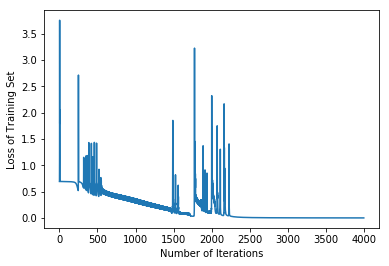

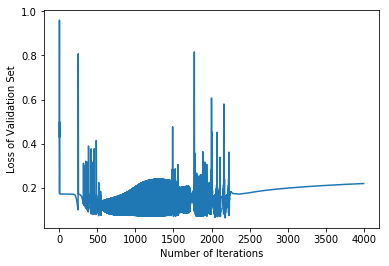

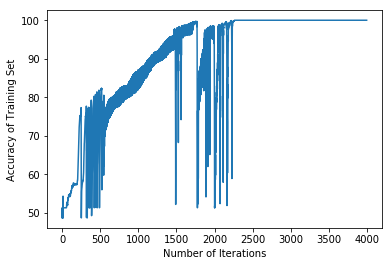

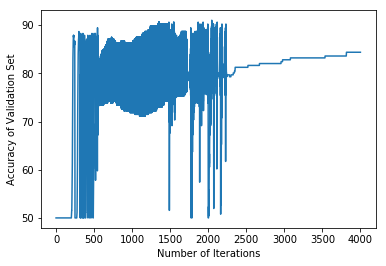

In [23]:
    print("Variance")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [24]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

		training		validation		best	
loss		0.0011069910		0.2203588033		0.0693678602
accuracy	100.0000000000		84.3750000000		91.0156250000


In [25]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [26]:
learning_rate=0.5
lambd = 0.1 #best?
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

#0 Training loss : 0.7043086576	Validation loss : 0.1858005471	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#1 Training loss : 0.7467829683	Validation loss : 0.3894792012	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2 Training loss : 1.6122494380	Validation loss : 1.0459828459	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#3 Training loss : 4.1090447955	Validation loss : 0.2992474673	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4 Training loss : 1.2663617707	Validation loss : 0.4302161270	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#5 Training loss : 1.7868624989	Validation loss : 0.2239794247	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#6 Training loss : 0.9524782574	Validation loss : 0.1842872526	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#7 Training loss : 0.7517375756	Validation loss : 0.1736915456	Traini

#61 Training loss : 0.7017634489	Validation loss : 0.1728038378	Training Accuracy: 52.3855890944%	Validation Accuracy: 50.0000000000%
#62 Training loss : 0.7017381193	Validation loss : 0.1728036738	Training Accuracy: 51.9961051607%	Validation Accuracy: 50.0000000000%
#63 Training loss : 0.7017126203	Validation loss : 0.1728035011	Training Accuracy: 51.5092502434%	Validation Accuracy: 50.0000000000%
#64 Training loss : 0.7016869470	Validation loss : 0.1728033193	Training Accuracy: 51.9961051607%	Validation Accuracy: 50.0000000000%
#65 Training loss : 0.7016610946	Validation loss : 0.1728031283	Training Accuracy: 51.9961051607%	Validation Accuracy: 50.0000000000%
#66 Training loss : 0.7016350581	Validation loss : 0.1728029275	Training Accuracy: 52.0934761441%	Validation Accuracy: 50.0000000000%
#67 Training loss : 0.7016088324	Validation loss : 0.1728027169	Training Accuracy: 52.3855890944%	Validation Accuracy: 50.0000000000%
#68 Training loss : 0.7015824124	Validation loss : 0.172802496

#121 Training loss : 0.6997118099	Validation loss : 0.1727605517	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#122 Training loss : 0.6996621574	Validation loss : 0.1727586231	Training Accuracy: 56.5725413827%	Validation Accuracy: 50.0000000000%
#123 Training loss : 0.6996116535	Validation loss : 0.1727566120	Training Accuracy: 56.6699123661%	Validation Accuracy: 50.0000000000%
#124 Training loss : 0.6995602700	Validation loss : 0.1727545142	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#125 Training loss : 0.6995079774	Validation loss : 0.1727523253	Training Accuracy: 56.4751703992%	Validation Accuracy: 50.0000000000%
#126 Training loss : 0.6994547449	Validation loss : 0.1727500405	Training Accuracy: 56.5725413827%	Validation Accuracy: 50.0000000000%
#127 Training loss : 0.6994005403	Validation loss : 0.1727476548	Training Accuracy: 56.7672833496%	Validation Accuracy: 50.0000000000%
#128 Training loss : 0.6993453298	Validation loss : 0.1

#181 Training loss : 0.6927746864	Validation loss : 0.1719222885	Training Accuracy: 57.4488802337%	Validation Accuracy: 50.0000000000%
#182 Training loss : 0.6924892861	Validation loss : 0.1718620572	Training Accuracy: 57.4488802337%	Validation Accuracy: 50.0000000000%
#183 Training loss : 0.6921907979	Validation loss : 0.1717969988	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#184 Training loss : 0.6918784268	Validation loss : 0.1717266922	Training Accuracy: 57.4488802337%	Validation Accuracy: 50.0000000000%
#185 Training loss : 0.6915513145	Validation loss : 0.1716506783	Training Accuracy: 57.4488802337%	Validation Accuracy: 50.0000000000%
#186 Training loss : 0.6912085327	Validation loss : 0.1715684569	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#187 Training loss : 0.6908490761	Validation loss : 0.1714794823	Training Accuracy: 57.7409931840%	Validation Accuracy: 50.0000000000%
#188 Training loss : 0.6904718549	Validation loss : 0.1

#241 Training loss : 0.5599942560	Validation loss : 0.1117498484	Training Accuracy: 75.8519961052%	Validation Accuracy: 86.3281250000%
#242 Training loss : 0.5546732465	Validation loss : 0.1096213198	Training Accuracy: 76.4362220058%	Validation Accuracy: 86.3281250000%
#243 Training loss : 0.5494102892	Validation loss : 0.1079802318	Training Accuracy: 76.7283349562%	Validation Accuracy: 85.9375000000%
#244 Training loss : 0.5442586479	Validation loss : 0.1046040303	Training Accuracy: 76.7283349562%	Validation Accuracy: 85.1562500000%
#245 Training loss : 0.5404904532	Validation loss : 0.1371992380	Training Accuracy: 76.6309639727%	Validation Accuracy: 60.5468750000%
#246 Training loss : 0.5822301523	Validation loss : 0.3847068159	Training Accuracy: 65.2385589094%	Validation Accuracy: 50.0000000000%
#247 Training loss : 1.3515511365	Validation loss : 0.2827053095	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#248 Training loss : 1.2004978094	Validation loss : 0.4

#301 Training loss : 0.6629202995	Validation loss : 0.1665001870	Training Accuracy: 62.5121713729%	Validation Accuracy: 55.0781250000%
#302 Training loss : 0.6576342351	Validation loss : 0.1642083646	Training Accuracy: 63.9727361246%	Validation Accuracy: 57.0312500000%
#303 Training loss : 0.6518077111	Validation loss : 0.1618731688	Training Accuracy: 65.6280428432%	Validation Accuracy: 60.5468750000%
#304 Training loss : 0.6455156177	Validation loss : 0.1589292190	Training Accuracy: 67.4780915287%	Validation Accuracy: 67.5781250000%
#305 Training loss : 0.6382302589	Validation loss : 0.1548716997	Training Accuracy: 69.0360272639%	Validation Accuracy: 74.2187500000%
#306 Training loss : 0.6294482193	Validation loss : 0.1495672061	Training Accuracy: 70.8860759494%	Validation Accuracy: 80.0781250000%
#307 Training loss : 0.6189670748	Validation loss : 0.1431059564	Training Accuracy: 71.7624148004%	Validation Accuracy: 85.1562500000%
#308 Training loss : 0.6068745076	Validation loss : 0.1

#361 Training loss : 0.5136232379	Validation loss : 0.0980315024	Training Accuracy: 77.9941577410%	Validation Accuracy: 86.7187500000%
#362 Training loss : 0.5109875357	Validation loss : 0.1421412347	Training Accuracy: 77.1178188900%	Validation Accuracy: 59.7656250000%
#363 Training loss : 0.5522768956	Validation loss : 0.2268084386	Training Accuracy: 70.6913339825%	Validation Accuracy: 51.1718750000%
#364 Training loss : 0.8595811752	Validation loss : 0.1620152706	Training Accuracy: 53.8461538462%	Validation Accuracy: 53.1250000000%
#365 Training loss : 0.6604168040	Validation loss : 0.2428209170	Training Accuracy: 56.4751703992%	Validation Accuracy: 50.0000000000%
#366 Training loss : 0.8816414675	Validation loss : 0.1208448765	Training Accuracy: 52.3855890944%	Validation Accuracy: 87.8906250000%
#367 Training loss : 0.5710724475	Validation loss : 0.1099479502	Training Accuracy: 75.9493670886%	Validation Accuracy: 87.1093750000%
#368 Training loss : 0.5401923719	Validation loss : 0.1

#421 Training loss : 0.5292912172	Validation loss : 0.1509699421	Training Accuracy: 73.0282375852%	Validation Accuracy: 66.0156250000%
#422 Training loss : 0.6658323860	Validation loss : 0.1165952876	Training Accuracy: 62.9016553067%	Validation Accuracy: 78.9062500000%
#423 Training loss : 0.5034039035	Validation loss : 0.1044295781	Training Accuracy: 76.0467380721%	Validation Accuracy: 80.8593750000%
#424 Training loss : 0.5452631373	Validation loss : 0.1448642297	Training Accuracy: 72.1518987342%	Validation Accuracy: 67.5781250000%
#425 Training loss : 0.5270536858	Validation loss : 0.1472732627	Training Accuracy: 73.1256085686%	Validation Accuracy: 67.5781250000%
#426 Training loss : 0.6577115353	Validation loss : 0.1168806349	Training Accuracy: 63.5832521908%	Validation Accuracy: 78.5156250000%
#427 Training loss : 0.5004679873	Validation loss : 0.1026467408	Training Accuracy: 76.4362220058%	Validation Accuracy: 82.0312500000%
#428 Training loss : 0.5413114003	Validation loss : 0.1

#481 Training loss : 0.4779779636	Validation loss : 0.1014101962	Training Accuracy: 77.1178188900%	Validation Accuracy: 81.2500000000%
#482 Training loss : 0.5513514774	Validation loss : 0.1385000258	Training Accuracy: 71.9571567673%	Validation Accuracy: 73.0468750000%
#483 Training loss : 0.4767659671	Validation loss : 0.1008623548	Training Accuracy: 77.2151898734%	Validation Accuracy: 81.2500000000%
#484 Training loss : 0.5499908322	Validation loss : 0.1387177052	Training Accuracy: 72.0545277507%	Validation Accuracy: 73.0468750000%
#485 Training loss : 0.4755687205	Validation loss : 0.1003322174	Training Accuracy: 77.4099318403%	Validation Accuracy: 81.2500000000%
#486 Training loss : 0.5486596270	Validation loss : 0.1389390370	Training Accuracy: 72.0545277507%	Validation Accuracy: 73.0468750000%
#487 Training loss : 0.4743856712	Validation loss : 0.0998183945	Training Accuracy: 77.4099318403%	Validation Accuracy: 81.6406250000%
#488 Training loss : 0.5473548674	Validation loss : 0.1

#541 Training loss : 0.4463582801	Validation loss : 0.0900014629	Training Accuracy: 78.9678675755%	Validation Accuracy: 84.7656250000%
#542 Training loss : 0.5175665803	Validation loss : 0.1453307748	Training Accuracy: 74.8782862707%	Validation Accuracy: 74.2187500000%
#543 Training loss : 0.4454322097	Validation loss : 0.0897505105	Training Accuracy: 78.9678675755%	Validation Accuracy: 84.7656250000%
#544 Training loss : 0.5166195121	Validation loss : 0.1455625752	Training Accuracy: 74.8782862707%	Validation Accuracy: 74.2187500000%
#545 Training loss : 0.4445123293	Validation loss : 0.0895052869	Training Accuracy: 79.0652385589%	Validation Accuracy: 84.7656250000%
#546 Training loss : 0.5156817863	Validation loss : 0.1457964713	Training Accuracy: 74.8782862707%	Validation Accuracy: 74.2187500000%
#547 Training loss : 0.4435982344	Validation loss : 0.0892653598	Training Accuracy: 79.1626095424%	Validation Accuracy: 84.7656250000%
#548 Training loss : 0.5147521450	Validation loss : 0.1

#601 Training loss : 0.4206819763	Validation loss : 0.0843777906	Training Accuracy: 80.2336903603%	Validation Accuracy: 85.5468750000%
#602 Training loss : 0.4920423437	Validation loss : 0.1527833759	Training Accuracy: 76.4362220058%	Validation Accuracy: 74.2187500000%
#603 Training loss : 0.4198932868	Validation loss : 0.0842472943	Training Accuracy: 80.2336903603%	Validation Accuracy: 85.9375000000%
#604 Training loss : 0.4912899309	Validation loss : 0.1530522946	Training Accuracy: 76.4362220058%	Validation Accuracy: 74.2187500000%
#605 Training loss : 0.4191086958	Validation loss : 0.0841199023	Training Accuracy: 80.2336903603%	Validation Accuracy: 85.9375000000%
#606 Training loss : 0.4905436089	Validation loss : 0.1533225067	Training Accuracy: 76.4362220058%	Validation Accuracy: 74.2187500000%
#607 Training loss : 0.4183281802	Validation loss : 0.0839955617	Training Accuracy: 80.3310613437%	Validation Accuracy: 85.9375000000%
#608 Training loss : 0.4898033030	Validation loss : 0.1

#661 Training loss : 0.3985388496	Validation loss : 0.0815023765	Training Accuracy: 81.4021421616%	Validation Accuracy: 85.9375000000%
#662 Training loss : 0.4712296955	Validation loss : 0.1612512868	Training Accuracy: 77.6046738072%	Validation Accuracy: 73.8281250000%
#663 Training loss : 0.3978432779	Validation loss : 0.0814340374	Training Accuracy: 81.4021421616%	Validation Accuracy: 85.9375000000%
#664 Training loss : 0.4705679366	Validation loss : 0.1615377737	Training Accuracy: 77.6046738072%	Validation Accuracy: 73.8281250000%
#665 Training loss : 0.3971495322	Validation loss : 0.0813671927	Training Accuracy: 81.4021421616%	Validation Accuracy: 85.9375000000%
#666 Training loss : 0.4699074290	Validation loss : 0.1618242855	Training Accuracy: 77.6046738072%	Validation Accuracy: 73.4375000000%
#667 Training loss : 0.3964575409	Validation loss : 0.0813019013	Training Accuracy: 81.4021421616%	Validation Accuracy: 85.9375000000%
#668 Training loss : 0.4692484709	Validation loss : 0.1

#721 Training loss : 0.3781867979	Validation loss : 0.0799876919	Training Accuracy: 82.0837390458%	Validation Accuracy: 85.9375000000%
#722 Training loss : 0.4518079851	Validation loss : 0.1702317631	Training Accuracy: 78.3836416748%	Validation Accuracy: 73.8281250000%
#723 Training loss : 0.3775157734	Validation loss : 0.0799491139	Training Accuracy: 82.0837390458%	Validation Accuracy: 85.9375000000%
#724 Training loss : 0.4511548197	Validation loss : 0.1705469221	Training Accuracy: 78.4810126582%	Validation Accuracy: 73.8281250000%
#725 Training loss : 0.3768445631	Validation loss : 0.0799110239	Training Accuracy: 82.0837390458%	Validation Accuracy: 86.3281250000%
#726 Training loss : 0.4505004235	Validation loss : 0.1708630651	Training Accuracy: 78.4810126582%	Validation Accuracy: 73.8281250000%
#727 Training loss : 0.3761731033	Validation loss : 0.0798734147	Training Accuracy: 82.0837390458%	Validation Accuracy: 86.3281250000%
#728 Training loss : 0.4498447765	Validation loss : 0.1

#781 Training loss : 0.3578233641	Validation loss : 0.0790270237	Training Accuracy: 82.7653359299%	Validation Accuracy: 85.9375000000%
#782 Training loss : 0.4318970313	Validation loss : 0.1804469272	Training Accuracy: 79.6494644596%	Validation Accuracy: 71.8750000000%
#783 Training loss : 0.3571319050	Validation loss : 0.0789986433	Training Accuracy: 82.7653359299%	Validation Accuracy: 85.5468750000%
#784 Training loss : 0.4312217625	Validation loss : 0.1808257639	Training Accuracy: 79.6494644596%	Validation Accuracy: 71.8750000000%
#785 Training loss : 0.3564393126	Validation loss : 0.0789702163	Training Accuracy: 82.8627069133%	Validation Accuracy: 85.5468750000%
#786 Training loss : 0.4305450701	Validation loss : 0.1812073029	Training Accuracy: 79.6494644596%	Validation Accuracy: 71.8750000000%
#787 Training loss : 0.3557455859	Validation loss : 0.0789417397	Training Accuracy: 83.0574488802%	Validation Accuracy: 85.5468750000%
#788 Training loss : 0.4298669620	Validation loss : 0.1

#841 Training loss : 0.3365965472	Validation loss : 0.0780790169	Training Accuracy: 84.4206426485%	Validation Accuracy: 85.9375000000%
#842 Training loss : 0.4108361454	Validation loss : 0.1930156404	Training Accuracy: 80.6231742941%	Validation Accuracy: 71.8750000000%
#843 Training loss : 0.3358689251	Validation loss : 0.0780429653	Training Accuracy: 84.5180136319%	Validation Accuracy: 85.9375000000%
#844 Training loss : 0.4101020893	Validation loss : 0.1934727452	Training Accuracy: 80.6231742941%	Validation Accuracy: 71.8750000000%
#845 Training loss : 0.3351409737	Validation loss : 0.0780077856	Training Accuracy: 84.7127555988%	Validation Accuracy: 85.9375000000%
#846 Training loss : 0.4093709772	Validation loss : 0.1939323194	Training Accuracy: 80.6231742941%	Validation Accuracy: 71.4843750000%
#847 Training loss : 0.3344128611	Validation loss : 0.0779733439	Training Accuracy: 84.9074975657%	Validation Accuracy: 85.9375000000%
#848 Training loss : 0.4086422545	Validation loss : 0.1

#901 Training loss : 0.3146431746	Validation loss : 0.0770201059	Training Accuracy: 86.5628042843%	Validation Accuracy: 85.9375000000%
#902 Training loss : 0.3884920621	Validation loss : 0.2073626829	Training Accuracy: 81.3047711782%	Validation Accuracy: 71.4843750000%
#903 Training loss : 0.3139084208	Validation loss : 0.0769830244	Training Accuracy: 86.5628042843%	Validation Accuracy: 85.9375000000%
#904 Training loss : 0.3877217281	Validation loss : 0.2078538208	Training Accuracy: 81.3047711782%	Validation Accuracy: 71.8750000000%
#905 Training loss : 0.3131735093	Validation loss : 0.0769459548	Training Accuracy: 86.5628042843%	Validation Accuracy: 85.9375000000%
#906 Training loss : 0.3869497239	Validation loss : 0.2083448309	Training Accuracy: 81.3047711782%	Validation Accuracy: 71.8750000000%
#907 Training loss : 0.3124384594	Validation loss : 0.0769089192	Training Accuracy: 86.4654333009%	Validation Accuracy: 85.9375000000%
#908 Training loss : 0.3861760820	Validation loss : 0.2

#961 Training loss : 0.2925913753	Validation loss : 0.0759384410	Training Accuracy: 87.3417721519%	Validation Accuracy: 85.9375000000%
#962 Training loss : 0.3645250328	Validation loss : 0.2215510095	Training Accuracy: 83.0574488802%	Validation Accuracy: 71.0937500000%
#963 Training loss : 0.2918579156	Validation loss : 0.0759049113	Training Accuracy: 87.3417721519%	Validation Accuracy: 85.9375000000%
#964 Training loss : 0.3636941459	Validation loss : 0.2219888290	Training Accuracy: 83.0574488802%	Validation Accuracy: 71.0937500000%
#965 Training loss : 0.2911247127	Validation loss : 0.0758717082	Training Accuracy: 87.3417721519%	Validation Accuracy: 85.9375000000%
#966 Training loss : 0.3628615577	Validation loss : 0.2224235465	Training Accuracy: 83.0574488802%	Validation Accuracy: 71.0937500000%
#967 Training loss : 0.2903917803	Validation loss : 0.0758388466	Training Accuracy: 87.3417721519%	Validation Accuracy: 85.9375000000%
#968 Training loss : 0.3620273182	Validation loss : 0.2

#1021 Training loss : 0.2707689629	Validation loss : 0.0751282093	Training Accuracy: 88.7049659202%	Validation Accuracy: 87.1093750000%
#1022 Training loss : 0.3391307447	Validation loss : 0.2331765900	Training Accuracy: 85.0048685492%	Validation Accuracy: 70.7031250000%
#1023 Training loss : 0.2700509928	Validation loss : 0.0751098977	Training Accuracy: 88.8023369036%	Validation Accuracy: 87.1093750000%
#1024 Training loss : 0.3382801798	Validation loss : 0.2335069911	Training Accuracy: 85.0048685492%	Validation Accuracy: 70.7031250000%
#1025 Training loss : 0.2693337546	Validation loss : 0.0750922152	Training Accuracy: 88.8023369036%	Validation Accuracy: 87.1093750000%
#1026 Training loss : 0.3374300333	Validation loss : 0.2338334220	Training Accuracy: 85.1022395326%	Validation Accuracy: 70.7031250000%
#1027 Training loss : 0.2686172533	Validation loss : 0.0750751633	Training Accuracy: 88.8023369036%	Validation Accuracy: 87.1093750000%
#1028 Training loss : 0.3365803460	Validation lo

#1081 Training loss : 0.2496398235	Validation loss : 0.0748563734	Training Accuracy: 90.2629016553%	Validation Accuracy: 88.2812500000%
#1082 Training loss : 0.3140824336	Validation loss : 0.2413644704	Training Accuracy: 86.7575462512%	Validation Accuracy: 71.0937500000%
#1083 Training loss : 0.2489548739	Validation loss : 0.0748569429	Training Accuracy: 90.3602726388%	Validation Accuracy: 88.2812500000%
#1084 Training loss : 0.3132762415	Validation loss : 0.2415797126	Training Accuracy: 86.7575462512%	Validation Accuracy: 71.0937500000%
#1085 Training loss : 0.2482715183	Validation loss : 0.0748580791	Training Accuracy: 90.4576436222%	Validation Accuracy: 88.2812500000%
#1086 Training loss : 0.3124726837	Validation loss : 0.2417916704	Training Accuracy: 86.7575462512%	Validation Accuracy: 71.0937500000%
#1087 Training loss : 0.2475897857	Validation loss : 0.0748597734	Training Accuracy: 90.5550146056%	Validation Accuracy: 88.2812500000%
#1088 Training loss : 0.3116718207	Validation lo

#1141 Training loss : 0.2298471634	Validation loss : 0.0750766877	Training Accuracy: 91.8208373905%	Validation Accuracy: 88.6718750000%
#1142 Training loss : 0.2911632997	Validation loss : 0.2465786945	Training Accuracy: 88.3154819864%	Validation Accuracy: 71.8750000000%
#1143 Training loss : 0.2292143140	Validation loss : 0.0750895339	Training Accuracy: 91.8208373905%	Validation Accuracy: 88.6718750000%
#1144 Training loss : 0.2904439756	Validation loss : 0.2467129696	Training Accuracy: 88.4128529698%	Validation Accuracy: 71.8750000000%
#1145 Training loss : 0.2285830389	Validation loss : 0.0751026340	Training Accuracy: 91.8208373905%	Validation Accuracy: 88.6718750000%
#1146 Training loss : 0.2897271944	Validation loss : 0.2468448238	Training Accuracy: 88.5102239533%	Validation Accuracy: 71.4843750000%
#1147 Training loss : 0.2279533098	Validation loss : 0.0751159827	Training Accuracy: 91.8208373905%	Validation Accuracy: 89.0625000000%
#1148 Training loss : 0.2890129030	Validation lo

#1201 Training loss : 0.2113830585	Validation loss : 0.0755629860	Training Accuracy: 92.5024342746%	Validation Accuracy: 89.0625000000%
#1202 Training loss : 0.2703987775	Validation loss : 0.2495518983	Training Accuracy: 89.0944498539%	Validation Accuracy: 71.8750000000%
#1203 Training loss : 0.2107780176	Validation loss : 0.0755829121	Training Accuracy: 92.5024342746%	Validation Accuracy: 89.0625000000%
#1204 Training loss : 0.2697218861	Validation loss : 0.2496135970	Training Accuracy: 89.0944498539%	Validation Accuracy: 71.8750000000%
#1205 Training loss : 0.2101729996	Validation loss : 0.0756031232	Training Accuracy: 92.5024342746%	Validation Accuracy: 89.0625000000%
#1206 Training loss : 0.2690449595	Validation loss : 0.2496729049	Training Accuracy: 89.0944498539%	Validation Accuracy: 71.8750000000%
#1207 Training loss : 0.2095679448	Validation loss : 0.0756236265	Training Accuracy: 92.5024342746%	Validation Accuracy: 89.0625000000%
#1208 Training loss : 0.2683679160	Validation lo

#1261 Training loss : 0.1931249812	Validation loss : 0.0763188753	Training Accuracy: 94.0603700097%	Validation Accuracy: 89.4531250000%
#1262 Training loss : 0.2500208043	Validation loss : 0.2504379408	Training Accuracy: 89.8734177215%	Validation Accuracy: 72.6562500000%
#1263 Training loss : 0.1925155056	Validation loss : 0.0763510638	Training Accuracy: 94.0603700097%	Validation Accuracy: 89.4531250000%
#1264 Training loss : 0.2493511312	Validation loss : 0.2504389320	Training Accuracy: 89.9707887050%	Validation Accuracy: 73.0468750000%
#1265 Training loss : 0.1919067294	Validation loss : 0.0763837664	Training Accuracy: 94.0603700097%	Validation Accuracy: 89.4531250000%
#1266 Training loss : 0.2486837965	Validation loss : 0.2504386825	Training Accuracy: 90.0681596884%	Validation Accuracy: 73.0468750000%
#1267 Training loss : 0.1912987549	Validation loss : 0.0764169809	Training Accuracy: 94.0603700097%	Validation Accuracy: 89.8437500000%
#1268 Training loss : 0.2480189818	Validation lo

#1321 Training loss : 0.1754192434	Validation loss : 0.0774702648	Training Accuracy: 95.4235637780%	Validation Accuracy: 90.2343750000%
#1322 Training loss : 0.2312841980	Validation loss : 0.2500775761	Training Accuracy: 90.9444985394%	Validation Accuracy: 73.0468750000%
#1323 Training loss : 0.1748527091	Validation loss : 0.0775132727	Training Accuracy: 95.4235637780%	Validation Accuracy: 90.2343750000%
#1324 Training loss : 0.2307031786	Validation loss : 0.2500523405	Training Accuracy: 91.0418695229%	Validation Accuracy: 73.4375000000%
#1325 Training loss : 0.1742873470	Validation loss : 0.0775564490	Training Accuracy: 95.4235637780%	Validation Accuracy: 90.2343750000%
#1326 Training loss : 0.2301234569	Validation loss : 0.2500259010	Training Accuracy: 91.0418695229%	Validation Accuracy: 73.4375000000%
#1327 Training loss : 0.1737230710	Validation loss : 0.0775997856	Training Accuracy: 95.4235637780%	Validation Accuracy: 90.2343750000%
#1328 Training loss : 0.2295447887	Validation lo

#1381 Training loss : 0.1583457802	Validation loss : 0.0788246989	Training Accuracy: 96.0077896787%	Validation Accuracy: 90.2343750000%
#1382 Training loss : 0.2129594856	Validation loss : 0.2482695539	Training Accuracy: 91.8208373905%	Validation Accuracy: 74.2187500000%
#1383 Training loss : 0.1577338455	Validation loss : 0.0788730189	Training Accuracy: 96.0077896787%	Validation Accuracy: 90.2343750000%
#1384 Training loss : 0.2122238124	Validation loss : 0.2481337527	Training Accuracy: 91.8208373905%	Validation Accuracy: 74.2187500000%
#1385 Training loss : 0.1571135121	Validation loss : 0.0789217519	Training Accuracy: 96.0077896787%	Validation Accuracy: 90.2343750000%
#1386 Training loss : 0.2114671407	Validation loss : 0.2479873190	Training Accuracy: 91.8208373905%	Validation Accuracy: 74.2187500000%
#1387 Training loss : 0.1564834986	Validation loss : 0.0789709493	Training Accuracy: 96.1051606621%	Validation Accuracy: 90.2343750000%
#1388 Training loss : 0.2106864402	Validation lo

#1441 Training loss : 0.3270937782	Validation loss : 0.1276473734	Training Accuracy: 84.5180136319%	Validation Accuracy: 73.8281250000%
#1442 Training loss : 0.2818720554	Validation loss : 0.0954454971	Training Accuracy: 86.2706913340%	Validation Accuracy: 85.9375000000%
#1443 Training loss : 0.3286529743	Validation loss : 0.1944694713	Training Accuracy: 86.0759493671%	Validation Accuracy: 71.8750000000%
#1444 Training loss : 0.2665900368	Validation loss : 0.0911300631	Training Accuracy: 88.8023369036%	Validation Accuracy: 85.9375000000%
#1445 Training loss : 0.3157838349	Validation loss : 0.2167803069	Training Accuracy: 86.9522882181%	Validation Accuracy: 73.8281250000%
#1446 Training loss : 0.2226337026	Validation loss : 0.0816998136	Training Accuracy: 92.5024342746%	Validation Accuracy: 87.5000000000%
#1447 Training loss : 0.2625180660	Validation loss : 0.2016587388	Training Accuracy: 88.7049659202%	Validation Accuracy: 75.3906250000%
#1448 Training loss : 0.1796707474	Validation lo

#1501 Training loss : 0.2789300946	Validation loss : 0.0899193857	Training Accuracy: 88.9970788705%	Validation Accuracy: 87.5000000000%
#1502 Training loss : 0.3077556269	Validation loss : 0.2198246820	Training Accuracy: 86.6601752678%	Validation Accuracy: 74.6093750000%
#1503 Training loss : 0.1662447585	Validation loss : 0.0730568865	Training Accuracy: 96.5920155794%	Validation Accuracy: 90.2343750000%
#1504 Training loss : 0.1771879223	Validation loss : 0.1681322426	Training Accuracy: 92.8919182084%	Validation Accuracy: 78.5156250000%
#1505 Training loss : 0.1206072298	Validation loss : 0.1111621970	Training Accuracy: 98.0525803311%	Validation Accuracy: 82.0312500000%
#1506 Training loss : 0.1126774598	Validation loss : 0.1633729832	Training Accuracy: 97.5657254138%	Validation Accuracy: 78.9062500000%
#1507 Training loss : 0.1059843002	Validation loss : 0.1458929687	Training Accuracy: 98.1499513145%	Validation Accuracy: 79.6875000000%
#1508 Training loss : 0.1032637326	Validation lo

#1561 Training loss : 0.0999566092	Validation loss : 0.0875898702	Training Accuracy: 98.6368062317%	Validation Accuracy: 89.0625000000%
#1562 Training loss : 0.1294750783	Validation loss : 0.2127326938	Training Accuracy: 95.7156767283%	Validation Accuracy: 75.3906250000%
#1563 Training loss : 0.0998027694	Validation loss : 0.0874955051	Training Accuracy: 98.7341772152%	Validation Accuracy: 89.0625000000%
#1564 Training loss : 0.1295737943	Validation loss : 0.2130557384	Training Accuracy: 95.7156767283%	Validation Accuracy: 75.3906250000%
#1565 Training loss : 0.0995297845	Validation loss : 0.0874811124	Training Accuracy: 98.7341772152%	Validation Accuracy: 89.0625000000%
#1566 Training loss : 0.1293290614	Validation loss : 0.2131699749	Training Accuracy: 95.8130477118%	Validation Accuracy: 75.3906250000%
#1567 Training loss : 0.0991329935	Validation loss : 0.0875463774	Training Accuracy: 98.7341772152%	Validation Accuracy: 89.0625000000%
#1568 Training loss : 0.1287453340	Validation lo

#1621 Training loss : 0.4345662387	Validation loss : 0.1305359751	Training Accuracy: 75.7546251217%	Validation Accuracy: 75.3906250000%
#1622 Training loss : 0.4749887964	Validation loss : 0.1489089899	Training Accuracy: 75.6572541383%	Validation Accuracy: 66.0156250000%
#1623 Training loss : 0.4142777283	Validation loss : 0.1478974564	Training Accuracy: 77.7994157741%	Validation Accuracy: 69.5312500000%
#1624 Training loss : 0.5560417599	Validation loss : 0.1466793097	Training Accuracy: 68.7439143135%	Validation Accuracy: 65.6250000000%
#1625 Training loss : 0.4443864063	Validation loss : 0.1494907026	Training Accuracy: 75.2677702045%	Validation Accuracy: 69.1406250000%
#1626 Training loss : 0.5600222172	Validation loss : 0.1435046015	Training Accuracy: 69.0360272639%	Validation Accuracy: 66.7968750000%
#1627 Training loss : 0.4043206563	Validation loss : 0.1339816939	Training Accuracy: 77.8967867575%	Validation Accuracy: 73.0468750000%
#1628 Training loss : 0.4959619852	Validation lo

#1681 Training loss : 0.2386056934	Validation loss : 0.0794425563	Training Accuracy: 91.4313534567%	Validation Accuracy: 87.8906250000%
#1682 Training loss : 0.2805656043	Validation loss : 0.1356666694	Training Accuracy: 88.9970788705%	Validation Accuracy: 75.3906250000%
#1683 Training loss : 0.2346969086	Validation loss : 0.0792098295	Training Accuracy: 91.7234664070%	Validation Accuracy: 87.8906250000%
#1684 Training loss : 0.2780446025	Validation loss : 0.1362287999	Training Accuracy: 88.9970788705%	Validation Accuracy: 75.7812500000%
#1685 Training loss : 0.2319066637	Validation loss : 0.0786352210	Training Accuracy: 91.9182083739%	Validation Accuracy: 87.8906250000%
#1686 Training loss : 0.2755698979	Validation loss : 0.1381770840	Training Accuracy: 89.0944498539%	Validation Accuracy: 75.3906250000%
#1687 Training loss : 0.2315788257	Validation loss : 0.0796544306	Training Accuracy: 91.8208373905%	Validation Accuracy: 87.8906250000%
#1688 Training loss : 0.2795011531	Validation lo

#1741 Training loss : 0.1338082367	Validation loss : 0.0768700850	Training Accuracy: 98.4420642648%	Validation Accuracy: 88.2812500000%
#1742 Training loss : 0.1299202561	Validation loss : 0.0867649614	Training Accuracy: 98.0525803311%	Validation Accuracy: 83.2031250000%
#1743 Training loss : 0.1273220587	Validation loss : 0.0820852120	Training Accuracy: 98.4420642648%	Validation Accuracy: 85.9375000000%
#1744 Training loss : 0.1254616679	Validation loss : 0.0900071556	Training Accuracy: 98.3446932814%	Validation Accuracy: 83.2031250000%
#1745 Training loss : 0.1239127656	Validation loss : 0.0844453219	Training Accuracy: 98.4420642648%	Validation Accuracy: 84.3750000000%
#1746 Training loss : 0.1225602395	Validation loss : 0.0921335315	Training Accuracy: 98.3446932814%	Validation Accuracy: 82.8125000000%
#1747 Training loss : 0.1212964051	Validation loss : 0.0856697077	Training Accuracy: 98.4420642648%	Validation Accuracy: 84.3750000000%
#1748 Training loss : 0.1201275121	Validation lo

#1801 Training loss : 0.1526286220	Validation loss : 0.1311547868	Training Accuracy: 95.0340798442%	Validation Accuracy: 78.9062500000%
#1802 Training loss : 0.1414740429	Validation loss : 0.0681598463	Training Accuracy: 97.1762414800%	Validation Accuracy: 90.2343750000%
#1803 Training loss : 0.1586985210	Validation loss : 0.1379782275	Training Accuracy: 94.6445959104%	Validation Accuracy: 77.3437500000%
#1804 Training loss : 0.1460359605	Validation loss : 0.0692123466	Training Accuracy: 97.3709834469%	Validation Accuracy: 89.8437500000%
#1805 Training loss : 0.1721776496	Validation loss : 0.1486341888	Training Accuracy: 93.9629990263%	Validation Accuracy: 76.1718750000%
#1806 Training loss : 0.1569366765	Validation loss : 0.0733231027	Training Accuracy: 96.2025316456%	Validation Accuracy: 89.4531250000%
#1807 Training loss : 0.2030192566	Validation loss : 0.1675411662	Training Accuracy: 92.2103213242%	Validation Accuracy: 75.0000000000%
#1808 Training loss : 0.1845137546	Validation lo

#1861 Training loss : 0.2093338650	Validation loss : 0.0792594177	Training Accuracy: 93.5735150925%	Validation Accuracy: 87.5000000000%
#1862 Training loss : 0.2288352270	Validation loss : 0.1144052469	Training Accuracy: 91.1392405063%	Validation Accuracy: 77.3437500000%
#1863 Training loss : 0.2129461737	Validation loss : 0.0824711768	Training Accuracy: 93.3787731256%	Validation Accuracy: 87.8906250000%
#1864 Training loss : 0.2396545182	Validation loss : 0.1122627515	Training Accuracy: 90.1655306719%	Validation Accuracy: 78.5156250000%
#1865 Training loss : 0.2072834397	Validation loss : 0.0798328597	Training Accuracy: 93.4761441091%	Validation Accuracy: 88.2812500000%
#1866 Training loss : 0.2259957306	Validation loss : 0.1118556614	Training Accuracy: 90.6523855891%	Validation Accuracy: 79.6875000000%
#1867 Training loss : 0.1907348677	Validation loss : 0.0742932337	Training Accuracy: 94.7419668939%	Validation Accuracy: 88.2812500000%
#1868 Training loss : 0.1994271771	Validation lo

#1921 Training loss : 0.4917360200	Validation loss : 0.2345880955	Training Accuracy: 76.1441090555%	Validation Accuracy: 69.5312500000%
#1922 Training loss : 0.3806324599	Validation loss : 0.1914446064	Training Accuracy: 79.2599805258%	Validation Accuracy: 69.5312500000%
#1923 Training loss : 0.7492042221	Validation loss : 0.1150244427	Training Accuracy: 67.0886075949%	Validation Accuracy: 79.6875000000%
#1924 Training loss : 0.2798616977	Validation loss : 0.0789654014	Training Accuracy: 89.1918208374%	Validation Accuracy: 86.7187500000%
#1925 Training loss : 0.2587209598	Validation loss : 0.1264716992	Training Accuracy: 88.8997078870%	Validation Accuracy: 80.0781250000%
#1926 Training loss : 0.1737363333	Validation loss : 0.0661053848	Training Accuracy: 96.3972736125%	Validation Accuracy: 90.2343750000%
#1927 Training loss : 0.1545450654	Validation loss : 0.1056930267	Training Accuracy: 95.7156767283%	Validation Accuracy: 81.2500000000%
#1928 Training loss : 0.1310291387	Validation lo

#1981 Training loss : 0.0798655091	Validation loss : 0.1191879657	Training Accuracy: 99.0262901655%	Validation Accuracy: 80.8593750000%
#1982 Training loss : 0.0789172545	Validation loss : 0.1201635742	Training Accuracy: 99.0262901655%	Validation Accuracy: 80.8593750000%
#1983 Training loss : 0.0780265850	Validation loss : 0.1207594143	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.8593750000%
#1984 Training loss : 0.0771849719	Validation loss : 0.1217581254	Training Accuracy: 99.4157740993%	Validation Accuracy: 80.4687500000%
#1985 Training loss : 0.0763873690	Validation loss : 0.1224127494	Training Accuracy: 99.4157740993%	Validation Accuracy: 80.4687500000%
#1986 Training loss : 0.0756310561	Validation loss : 0.1234711922	Training Accuracy: 99.4157740993%	Validation Accuracy: 80.4687500000%
#1987 Training loss : 0.0749154790	Validation loss : 0.1241323027	Training Accuracy: 99.4157740993%	Validation Accuracy: 80.4687500000%
#1988 Training loss : 0.0742399354	Validation lo

#2041 Training loss : 0.4863750050	Validation loss : 0.6676973260	Training Accuracy: 78.3836416748%	Validation Accuracy: 50.0000000000%
#2042 Training loss : 2.5039723481	Validation loss : 0.3357630746	Training Accuracy: 51.7039922103%	Validation Accuracy: 52.7343750000%
#2043 Training loss : 1.1070329991	Validation loss : 0.1607525177	Training Accuracy: 57.9357351509%	Validation Accuracy: 59.7656250000%
#2044 Training loss : 0.5488781783	Validation loss : 0.3205420847	Training Accuracy: 65.6280428432%	Validation Accuracy: 55.0781250000%
#2045 Training loss : 1.1493703223	Validation loss : 0.1088697149	Training Accuracy: 58.0331061344%	Validation Accuracy: 73.4375000000%
#2046 Training loss : 0.3331569559	Validation loss : 0.1432530062	Training Accuracy: 84.5180136319%	Validation Accuracy: 71.4843750000%
#2047 Training loss : 0.4565932972	Validation loss : 0.1515758600	Training Accuracy: 77.5073028238%	Validation Accuracy: 66.7968750000%
#2048 Training loss : 0.3309012084	Validation lo

#2101 Training loss : 0.0682958014	Validation loss : 0.1058971392	Training Accuracy: 99.6105160662%	Validation Accuracy: 83.5937500000%
#2102 Training loss : 0.0677740354	Validation loss : 0.1050056639	Training Accuracy: 99.6105160662%	Validation Accuracy: 83.5937500000%
#2103 Training loss : 0.0672666801	Validation loss : 0.1069987816	Training Accuracy: 99.6105160662%	Validation Accuracy: 83.5937500000%
#2104 Training loss : 0.0667713481	Validation loss : 0.1059519179	Training Accuracy: 99.6105160662%	Validation Accuracy: 83.5937500000%
#2105 Training loss : 0.0662846332	Validation loss : 0.1081974503	Training Accuracy: 99.6105160662%	Validation Accuracy: 83.5937500000%
#2106 Training loss : 0.0658053404	Validation loss : 0.1069880024	Training Accuracy: 99.6105160662%	Validation Accuracy: 83.5937500000%
#2107 Training loss : 0.0653312223	Validation loss : 0.1095717312	Training Accuracy: 99.6105160662%	Validation Accuracy: 83.5937500000%
#2108 Training loss : 0.0648624511	Validation lo

#2161 Training loss : 0.0592349584	Validation loss : 0.1605526360	Training Accuracy: 99.3184031159%	Validation Accuracy: 79.2968750000%
#2162 Training loss : 0.0603906972	Validation loss : 0.0879446546	Training Accuracy: 99.9026290166%	Validation Accuracy: 89.4531250000%
#2163 Training loss : 0.0680889192	Validation loss : 0.1844476112	Training Accuracy: 98.7341772152%	Validation Accuracy: 78.5156250000%
#2164 Training loss : 0.0755377092	Validation loss : 0.0847342220	Training Accuracy: 99.5131450828%	Validation Accuracy: 89.8437500000%
#2165 Training loss : 0.1318754360	Validation loss : 0.2815289078	Training Accuracy: 95.2288218111%	Validation Accuracy: 70.3125000000%
#2166 Training loss : 0.2571331801	Validation loss : 0.4935869067	Training Accuracy: 89.4839337877%	Validation Accuracy: 55.8593750000%
#2167 Training loss : 1.7717905401	Validation loss : 0.0898655862	Training Accuracy: 55.5988315482%	Validation Accuracy: 81.2500000000%
#2168 Training loss : 0.3394561959	Validation lo

#2221 Training loss : 0.1606774991	Validation loss : 0.1893537384	Training Accuracy: 94.0603700097%	Validation Accuracy: 75.3906250000%
#2222 Training loss : 0.1494114431	Validation loss : 0.0957118843	Training Accuracy: 95.8130477118%	Validation Accuracy: 86.7187500000%
#2223 Training loss : 0.2786006475	Validation loss : 0.2523923869	Training Accuracy: 88.3154819864%	Validation Accuracy: 71.4843750000%
#2224 Training loss : 0.2875779405	Validation loss : 0.2866592698	Training Accuracy: 87.8286270691%	Validation Accuracy: 62.5000000000%
#2225 Training loss : 1.0123636182	Validation loss : 0.1341862925	Training Accuracy: 63.5832521908%	Validation Accuracy: 75.3906250000%
#2226 Training loss : 0.3255258923	Validation loss : 0.1568883171	Training Accuracy: 84.4206426485%	Validation Accuracy: 74.2187500000%
#2227 Training loss : 0.5222629878	Validation loss : 0.2250286308	Training Accuracy: 77.2151898734%	Validation Accuracy: 72.2656250000%
#2228 Training loss : 0.2745091076	Validation lo

#2281 Training loss : 0.0568954044	Validation loss : 0.1167871067	Training Accuracy: 99.9026290166%	Validation Accuracy: 82.8125000000%
#2282 Training loss : 0.0566633515	Validation loss : 0.1167273049	Training Accuracy: 99.9026290166%	Validation Accuracy: 82.8125000000%
#2283 Training loss : 0.0564372286	Validation loss : 0.1169159409	Training Accuracy: 99.9026290166%	Validation Accuracy: 82.8125000000%
#2284 Training loss : 0.0562166941	Validation loss : 0.1168817794	Training Accuracy: 99.9026290166%	Validation Accuracy: 82.8125000000%
#2285 Training loss : 0.0560013682	Validation loss : 0.1170305710	Training Accuracy: 99.9026290166%	Validation Accuracy: 82.8125000000%
#2286 Training loss : 0.0557908188	Validation loss : 0.1170143743	Training Accuracy: 99.9026290166%	Validation Accuracy: 83.2031250000%
#2287 Training loss : 0.0555846054	Validation loss : 0.1171312358	Training Accuracy: 99.9026290166%	Validation Accuracy: 83.2031250000%
#2288 Training loss : 0.0553822990	Validation lo

#2340 Training loss : 0.0478659906	Validation loss : 0.1210314409	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#2341 Training loss : 0.0477612990	Validation loss : 0.1210989135	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.3750000000%
#2342 Training loss : 0.0476576255	Validation loss : 0.1211665796	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2343 Training loss : 0.0475549575	Validation loss : 0.1212344497	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2344 Training loss : 0.0474532827	Validation loss : 0.1213025291	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2345 Training loss : 0.0473525891	Validation loss : 0.1213708172	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2346 Training loss : 0.0472528649	Validation loss : 0.1214393080	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2347 Training loss : 0.0471540982	Valida

#2399 Training loss : 0.0430694754	Validation loss : 0.1248327174	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2400 Training loss : 0.0430067311	Validation loss : 0.1248892738	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2401 Training loss : 0.0429444533	Validation loss : 0.1249456449	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2402 Training loss : 0.0428826367	Validation loss : 0.1250018368	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2403 Training loss : 0.0428212761	Validation loss : 0.1250578552	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2404 Training loss : 0.0427603662	Validation loss : 0.1251137057	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2405 Training loss : 0.0426999020	Validation loss : 0.1251693937	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2406 Training loss : 0.0426398785	Valida

#2458 Training loss : 0.0400273932	Validation loss : 0.1279777868	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2459 Training loss : 0.0399854075	Validation loss : 0.1280291453	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2460 Training loss : 0.0399436875	Validation loss : 0.1280804678	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2461 Training loss : 0.0399022310	Validation loss : 0.1281317550	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2462 Training loss : 0.0398610363	Validation loss : 0.1281830077	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2463 Training loss : 0.0398201013	Validation loss : 0.1282342263	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2464 Training loss : 0.0397794243	Validation loss : 0.1282854116	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2465 Training loss : 0.0397390032	Valida

#2517 Training loss : 0.0379426859	Validation loss : 0.1309493823	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2518 Training loss : 0.0379130828	Validation loss : 0.1309986239	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2519 Training loss : 0.0378836336	Validation loss : 0.1310478302	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2520 Training loss : 0.0378543369	Validation loss : 0.1310970025	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2521 Training loss : 0.0378251915	Validation loss : 0.1311461416	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2522 Training loss : 0.0377961959	Validation loss : 0.1311952487	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2523 Training loss : 0.0377673491	Validation loss : 0.1312443251	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2524 Training loss : 0.0377386498	Valida

#2576 Training loss : 0.0364347405	Validation loss : 0.1338663447	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2577 Training loss : 0.0364131093	Validation loss : 0.1339178492	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2578 Training loss : 0.0363916006	Validation loss : 0.1339694864	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2579 Training loss : 0.0363702139	Validation loss : 0.1340212576	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2580 Training loss : 0.0363489485	Validation loss : 0.1340731636	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2581 Training loss : 0.0363278038	Validation loss : 0.1341252051	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2582 Training loss : 0.0363067789	Validation loss : 0.1341773824	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2583 Training loss : 0.0362858732	Valida

#2635 Training loss : 0.0353395788	Validation loss : 0.1370311960	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2636 Training loss : 0.0353236293	Validation loss : 0.1370836696	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2637 Training loss : 0.0353077496	Validation loss : 0.1371359875	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2638 Training loss : 0.0352919388	Validation loss : 0.1371881459	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2639 Training loss : 0.0352761965	Validation loss : 0.1372401415	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2640 Training loss : 0.0352605219	Validation loss : 0.1372919711	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2641 Training loss : 0.0352449144	Validation loss : 0.1373436316	Training Accuracy: 100.0000000000%	Validation Accuracy: 84.7656250000%
#2642 Training loss : 0.0352293735	Valida

#2694 Training loss : 0.0345006604	Validation loss : 0.1398107932	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2695 Training loss : 0.0344879818	Validation loss : 0.1398523271	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2696 Training loss : 0.0344753476	Validation loss : 0.1398936928	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2697 Training loss : 0.0344627575	Validation loss : 0.1399348917	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2698 Training loss : 0.0344502111	Validation loss : 0.1399759250	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2699 Training loss : 0.0344377082	Validation loss : 0.1400167941	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2700 Training loss : 0.0344252486	Validation loss : 0.1400575004	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2701 Training loss : 0.0344128319	Valida

#2753 Training loss : 0.0338203527	Validation loss : 0.1420161111	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2754 Training loss : 0.0338098793	Validation loss : 0.1420499005	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2755 Training loss : 0.0337994372	Validation loss : 0.1420835915	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2756 Training loss : 0.0337890262	Validation loss : 0.1421171850	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2757 Training loss : 0.0337786462	Validation loss : 0.1421506817	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2758 Training loss : 0.0337682969	Validation loss : 0.1421840825	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2759 Training loss : 0.0337579783	Validation loss : 0.1422173883	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2760 Training loss : 0.0337476901	Valida

#2812 Training loss : 0.0332509164	Validation loss : 0.1438641727	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2813 Training loss : 0.0332420323	Validation loss : 0.1438932779	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2814 Training loss : 0.0332331712	Validation loss : 0.1439223181	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2815 Training loss : 0.0332243330	Validation loss : 0.1439512936	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2816 Training loss : 0.0332155176	Validation loss : 0.1439802049	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2817 Training loss : 0.0332067248	Validation loss : 0.1440090523	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2818 Training loss : 0.0331979545	Validation loss : 0.1440378360	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2819 Training loss : 0.0331892067	Valida

#2871 Training loss : 0.0327627201	Validation loss : 0.1454790038	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.5468750000%
#2872 Training loss : 0.0327550217	Validation loss : 0.1455047045	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.5468750000%
#2873 Training loss : 0.0327473409	Validation loss : 0.1455303530	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.5468750000%
#2874 Training loss : 0.0327396777	Validation loss : 0.1455559494	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.5468750000%
#2875 Training loss : 0.0327320319	Validation loss : 0.1455814938	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.5468750000%
#2876 Training loss : 0.0327244035	Validation loss : 0.1456069865	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.5468750000%
#2877 Training loss : 0.0327167925	Validation loss : 0.1456324274	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.5468750000%
#2878 Training loss : 0.0327091987	Valida

#2930 Training loss : 0.0323369351	Validation loss : 0.1469102886	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2931 Training loss : 0.0323301916	Validation loss : 0.1469331358	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2932 Training loss : 0.0323234632	Validation loss : 0.1469559389	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2933 Training loss : 0.0323167496	Validation loss : 0.1469786979	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2934 Training loss : 0.0323100511	Validation loss : 0.1470014131	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2935 Training loss : 0.0323033674	Validation loss : 0.1470240847	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2936 Training loss : 0.0322966986	Validation loss : 0.1470467127	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2937 Training loss : 0.0322900446	Valida

#2989 Training loss : 0.0319634129	Validation loss : 0.1481881549	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2990 Training loss : 0.0319574828	Validation loss : 0.1482086892	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2991 Training loss : 0.0319515652	Validation loss : 0.1482291898	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2992 Training loss : 0.0319456599	Validation loss : 0.1482496569	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2993 Training loss : 0.0319397670	Validation loss : 0.1482700908	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2994 Training loss : 0.0319338864	Validation loss : 0.1482904915	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2995 Training loss : 0.0319280180	Validation loss : 0.1483108593	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#2996 Training loss : 0.0319221618	Valida

#3048 Training loss : 0.0316332347	Validation loss : 0.1493479867	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#3049 Training loss : 0.0316279551	Validation loss : 0.1493668358	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#3050 Training loss : 0.0316226850	Validation loss : 0.1493856608	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#3051 Training loss : 0.0316174244	Validation loss : 0.1494044618	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#3052 Training loss : 0.0316121733	Validation loss : 0.1494232389	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#3053 Training loss : 0.0316069317	Validation loss : 0.1494419922	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#3054 Training loss : 0.0316016994	Validation loss : 0.1494607217	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.1562500000%
#3055 Training loss : 0.0315964764	Valida

#3107 Training loss : 0.0313366698	Validation loss : 0.1504214803	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.5468750000%
#3108 Training loss : 0.0313318815	Validation loss : 0.1504390327	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.5468750000%
#3109 Training loss : 0.0313271004	Validation loss : 0.1504565645	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.5468750000%
#3110 Training loss : 0.0313223265	Validation loss : 0.1504740756	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.5468750000%
#3111 Training loss : 0.0313175597	Validation loss : 0.1504915662	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.5468750000%
#3112 Training loss : 0.0313128000	Validation loss : 0.1505090362	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.5468750000%
#3113 Training loss : 0.0313080475	Validation loss : 0.1505264857	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.5468750000%
#3114 Training loss : 0.0313033020	Valida

#3166 Training loss : 0.0310655990	Validation loss : 0.1514223833	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3167 Training loss : 0.0310611906	Validation loss : 0.1514387487	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3168 Training loss : 0.0310567879	Validation loss : 0.1514550945	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3169 Training loss : 0.0310523909	Validation loss : 0.1514714206	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3170 Training loss : 0.0310479997	Validation loss : 0.1514877270	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3171 Training loss : 0.0310436141	Validation loss : 0.1515040139	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3172 Training loss : 0.0310392342	Validation loss : 0.1515202811	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3173 Training loss : 0.0310348600	Valida

#3225 Training loss : 0.0308147447	Validation loss : 0.1523548473	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3226 Training loss : 0.0308106450	Validation loss : 0.1523700829	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3227 Training loss : 0.0308065501	Validation loss : 0.1523852999	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3228 Training loss : 0.0308024599	Validation loss : 0.1524004984	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3229 Training loss : 0.0307983745	Validation loss : 0.1524156784	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3230 Training loss : 0.0307942937	Validation loss : 0.1524308400	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3231 Training loss : 0.0307902177	Validation loss : 0.1524459831	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3232 Training loss : 0.0307861463	Valida

#3284 Training loss : 0.0305805500	Validation loss : 0.1532228411	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3285 Training loss : 0.0305767078	Validation loss : 0.1532370263	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3286 Training loss : 0.0305728695	Validation loss : 0.1532511944	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3287 Training loss : 0.0305690353	Validation loss : 0.1532653456	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3288 Training loss : 0.0305652050	Validation loss : 0.1532794798	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3289 Training loss : 0.0305613786	Validation loss : 0.1532935971	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3290 Training loss : 0.0305575562	Validation loss : 0.1533076975	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3291 Training loss : 0.0305537378	Valida

#3343 Training loss : 0.0303603369	Validation loss : 0.1540315677	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3344 Training loss : 0.0303567121	Validation loss : 0.1540447970	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3345 Training loss : 0.0303530906	Validation loss : 0.1540580109	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3346 Training loss : 0.0303494725	Validation loss : 0.1540712095	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3347 Training loss : 0.0303458578	Validation loss : 0.1540843928	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3348 Training loss : 0.0303422464	Validation loss : 0.1540975608	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3349 Training loss : 0.0303386384	Validation loss : 0.1541107136	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3350 Training loss : 0.0303350338	Valida

#3402 Training loss : 0.0301519854	Validation loss : 0.1547866988	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3403 Training loss : 0.0301485458	Validation loss : 0.1547990682	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3404 Training loss : 0.0301451092	Validation loss : 0.1548114238	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3405 Training loss : 0.0301416754	Validation loss : 0.1548237657	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3406 Training loss : 0.0301382445	Validation loss : 0.1548360938	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3407 Training loss : 0.0301348165	Validation loss : 0.1548484083	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3408 Training loss : 0.0301313914	Validation loss : 0.1548607090	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3409 Training loss : 0.0301279691	Valida

#3461 Training loss : 0.0299537839	Validation loss : 0.1554937245	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3462 Training loss : 0.0299505036	Validation loss : 0.1555053229	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3463 Training loss : 0.0299472257	Validation loss : 0.1555169089	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3464 Training loss : 0.0299439504	Validation loss : 0.1555284825	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3465 Training loss : 0.0299406775	Validation loss : 0.1555400438	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3466 Training loss : 0.0299374071	Validation loss : 0.1555515928	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3467 Training loss : 0.0299341392	Validation loss : 0.1555631296	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3468 Training loss : 0.0299308738	Valida

#3520 Training loss : 0.0297643349	Validation loss : 0.1561575288	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3521 Training loss : 0.0297611923	Validation loss : 0.1561684317	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3522 Training loss : 0.0297580520	Validation loss : 0.1561793234	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3523 Training loss : 0.0297549138	Validation loss : 0.1561902038	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3524 Training loss : 0.0297517777	Validation loss : 0.1562010731	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3525 Training loss : 0.0297486438	Validation loss : 0.1562119312	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3526 Training loss : 0.0297455121	Validation loss : 0.1562227781	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3527 Training loss : 0.0297423825	Valida

#3579 Training loss : 0.0295824855	Validation loss : 0.1567820781	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3580 Training loss : 0.0295794630	Validation loss : 0.1567923437	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3581 Training loss : 0.0295764424	Validation loss : 0.1568025989	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3582 Training loss : 0.0295734237	Validation loss : 0.1568128437	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3583 Training loss : 0.0295704069	Validation loss : 0.1568230780	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3584 Training loss : 0.0295673920	Validation loss : 0.1568333021	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3585 Training loss : 0.0295643789	Validation loss : 0.1568435157	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3586 Training loss : 0.0295613678	Valida

#3638 Training loss : 0.0294072752	Validation loss : 0.1573702754	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3639 Training loss : 0.0294043578	Validation loss : 0.1573799440	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3640 Training loss : 0.0294014422	Validation loss : 0.1573896028	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3641 Training loss : 0.0293985282	Validation loss : 0.1573992518	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3642 Training loss : 0.0293956159	Validation loss : 0.1574088909	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3643 Training loss : 0.0293927052	Validation loss : 0.1574185201	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3644 Training loss : 0.0293897962	Validation loss : 0.1574281396	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3645 Training loss : 0.0293868888	Valida

#3697 Training loss : 0.0292378936	Validation loss : 0.1579241028	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3698 Training loss : 0.0292350688	Validation loss : 0.1579332024	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3699 Training loss : 0.0292322454	Validation loss : 0.1579422925	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3700 Training loss : 0.0292294236	Validation loss : 0.1579513732	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3701 Training loss : 0.0292266032	Validation loss : 0.1579604445	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3702 Training loss : 0.0292237842	Validation loss : 0.1579695064	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3703 Training loss : 0.0292209667	Validation loss : 0.1579785588	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3704 Training loss : 0.0292181507	Valida

#3756 Training loss : 0.0290736470	Validation loss : 0.1584450512	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3757 Training loss : 0.0290709038	Validation loss : 0.1584536058	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3758 Training loss : 0.0290681619	Validation loss : 0.1584621514	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3759 Training loss : 0.0290654213	Validation loss : 0.1584706880	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3760 Training loss : 0.0290626820	Validation loss : 0.1584792157	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3761 Training loss : 0.0290599440	Validation loss : 0.1584877343	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3762 Training loss : 0.0290572073	Validation loss : 0.1584962439	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3763 Training loss : 0.0290544718	Valida

#3815 Training loss : 0.0289139320	Validation loss : 0.1589346348	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3816 Training loss : 0.0289112608	Validation loss : 0.1589426728	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3817 Training loss : 0.0289085908	Validation loss : 0.1589507024	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3818 Training loss : 0.0289059219	Validation loss : 0.1589587235	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3819 Training loss : 0.0289032542	Validation loss : 0.1589667361	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3820 Training loss : 0.0289005876	Validation loss : 0.1589747404	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3821 Training loss : 0.0288979221	Validation loss : 0.1589827362	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3822 Training loss : 0.0288952578	Valida

#3874 Training loss : 0.0287582147	Validation loss : 0.1593947602	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3875 Training loss : 0.0287556071	Validation loss : 0.1594023184	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3876 Training loss : 0.0287530004	Validation loss : 0.1594098689	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3877 Training loss : 0.0287503948	Validation loss : 0.1594174116	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3878 Training loss : 0.0287477901	Validation loss : 0.1594249466	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3879 Training loss : 0.0287451865	Validation loss : 0.1594324738	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3880 Training loss : 0.0287425838	Validation loss : 0.1594399934	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3881 Training loss : 0.0287399822	Valida

#3933 Training loss : 0.0286060174	Validation loss : 0.1598278612	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3934 Training loss : 0.0286034655	Validation loss : 0.1598349852	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3935 Training loss : 0.0286009146	Validation loss : 0.1598421024	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3936 Training loss : 0.0285983645	Validation loss : 0.1598492126	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3937 Training loss : 0.0285958154	Validation loss : 0.1598563159	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3938 Training loss : 0.0285932671	Validation loss : 0.1598634124	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3939 Training loss : 0.0285907197	Validation loss : 0.1598705020	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3940 Training loss : 0.0285881731	Valida

#3992 Training loss : 0.0284569177	Validation loss : 0.1602368295	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3993 Training loss : 0.0284544152	Validation loss : 0.1602435711	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3994 Training loss : 0.0284519135	Validation loss : 0.1602503067	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3995 Training loss : 0.0284494125	Validation loss : 0.1602570363	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3996 Training loss : 0.0284469124	Validation loss : 0.1602637600	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3997 Training loss : 0.0284444130	Validation loss : 0.1602704776	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3998 Training loss : 0.0284419144	Validation loss : 0.1602771893	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#3999 Training loss : 0.0284394166	Valida

Best
lambda =  0.1


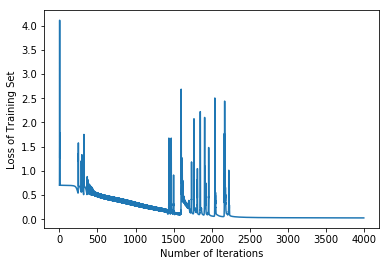

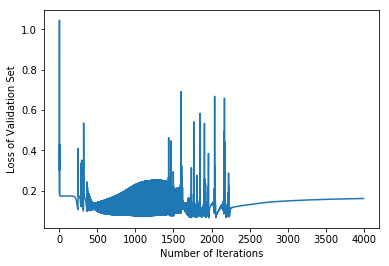

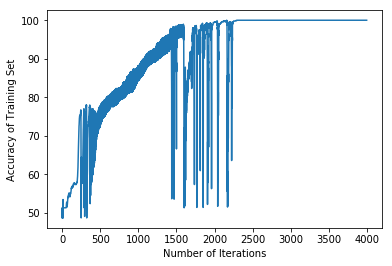

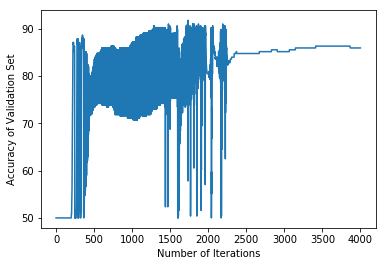

In [27]:
    print("Best")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [28]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

		training		validation		best	
loss		0.0284394166		0.1602838950		0.0693213787
accuracy	100.0000000000		85.9375000000		91.7968750000


In [29]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [30]:
learning_rate=0.5
lambd = 0.01 #best?
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

#0 Training loss : 0.6938459276	Validation loss : 0.1735678247	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1 Training loss : 0.6951999220	Validation loss : 0.1809527553	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2 Training loss : 0.7336874107	Validation loss : 0.3873749035	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#3 Training loss : 1.5160575070	Validation loss : 0.9626795911	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4 Training loss : 3.9756403354	Validation loss : 0.4104549227	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#5 Training loss : 1.6514073060	Validation loss : 0.3670142747	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#6 Training loss : 1.5752166226	Validation loss : 0.2271950113	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#7 Training loss : 0.9334165014	Validation loss : 0.1780322545	Traini

#61 Training loss : 0.6928496309	Validation loss : 0.1727893138	Training Accuracy: 52.7750730282%	Validation Accuracy: 50.0000000000%
#62 Training loss : 0.6928239628	Validation loss : 0.1727888242	Training Accuracy: 52.7750730282%	Validation Accuracy: 50.0000000000%
#63 Training loss : 0.6927981251	Validation loss : 0.1727883235	Training Accuracy: 52.5803310613%	Validation Accuracy: 50.0000000000%
#64 Training loss : 0.6927721125	Validation loss : 0.1727878113	Training Accuracy: 52.0934761441%	Validation Accuracy: 50.0000000000%
#65 Training loss : 0.6927459195	Validation loss : 0.1727872873	Training Accuracy: 52.0934761441%	Validation Accuracy: 50.0000000000%
#66 Training loss : 0.6927195408	Validation loss : 0.1727867511	Training Accuracy: 51.8013631938%	Validation Accuracy: 50.0000000000%
#67 Training loss : 0.6926929709	Validation loss : 0.1727862021	Training Accuracy: 51.7039922103%	Validation Accuracy: 50.0000000000%
#68 Training loss : 0.6926662042	Validation loss : 0.172785639

#121 Training loss : 0.6907668049	Validation loss : 0.1727153259	Training Accuracy: 56.6699123661%	Validation Accuracy: 50.0000000000%
#122 Training loss : 0.6907164877	Validation loss : 0.1727124763	Training Accuracy: 56.6699123661%	Validation Accuracy: 50.0000000000%
#123 Training loss : 0.6906653349	Validation loss : 0.1727095183	Training Accuracy: 56.4751703992%	Validation Accuracy: 50.0000000000%
#124 Training loss : 0.6906133214	Validation loss : 0.1727064468	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#125 Training loss : 0.6905604214	Validation loss : 0.1727032563	Training Accuracy: 56.4751703992%	Validation Accuracy: 50.0000000000%
#126 Training loss : 0.6905066077	Validation loss : 0.1726999410	Training Accuracy: 56.6699123661%	Validation Accuracy: 50.0000000000%
#127 Training loss : 0.6904518523	Validation loss : 0.1726964948	Training Accuracy: 56.4751703992%	Validation Accuracy: 50.0000000000%
#128 Training loss : 0.6903961261	Validation loss : 0.1

#181 Training loss : 0.6843173165	Validation loss : 0.1717755129	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#182 Training loss : 0.6840692901	Validation loss : 0.1717169576	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#183 Training loss : 0.6838101019	Validation loss : 0.1716542761	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#184 Training loss : 0.6835389933	Validation loss : 0.1715871223	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#185 Training loss : 0.6832551406	Validation loss : 0.1715151160	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#186 Training loss : 0.6829576492	Validation loss : 0.1714378396	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#187 Training loss : 0.6826455468	Validation loss : 0.1713548336	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#188 Training loss : 0.6823177754	Validation loss : 0.1

#241 Training loss : 0.5522925054	Validation loss : 0.1118037132	Training Accuracy: 75.5598831548%	Validation Accuracy: 86.3281250000%
#242 Training loss : 0.5466684665	Validation loss : 0.1096249620	Training Accuracy: 76.3388510224%	Validation Accuracy: 86.3281250000%
#243 Training loss : 0.5411070843	Validation loss : 0.1075057808	Training Accuracy: 76.5335929893%	Validation Accuracy: 86.3281250000%
#244 Training loss : 0.5356258795	Validation loss : 0.1056007624	Training Accuracy: 76.7283349562%	Validation Accuracy: 86.7187500000%
#245 Training loss : 0.5302422210	Validation loss : 0.1030013514	Training Accuracy: 76.9230769231%	Validation Accuracy: 86.3281250000%
#246 Training loss : 0.5250749311	Validation loss : 0.1080317308	Training Accuracy: 76.6309639727%	Validation Accuracy: 83.2031250000%
#247 Training loss : 0.5243553999	Validation loss : 0.1510989413	Training Accuracy: 77.5073028238%	Validation Accuracy: 62.8906250000%
#248 Training loss : 0.6777039912	Validation loss : 0.8

#301 Training loss : 0.5360878980	Validation loss : 0.2673905018	Training Accuracy: 70.3018500487%	Validation Accuracy: 50.7812500000%
#302 Training loss : 0.9937672720	Validation loss : 0.1639574510	Training Accuracy: 51.8987341772%	Validation Accuracy: 57.4218750000%
#303 Training loss : 0.6505621574	Validation loss : 0.2691766474	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#304 Training loss : 0.9687864357	Validation loss : 0.1443206500	Training Accuracy: 51.6066212269%	Validation Accuracy: 69.5312500000%
#305 Training loss : 0.5887501878	Validation loss : 0.1159209796	Training Accuracy: 68.0623174294%	Validation Accuracy: 88.2812500000%
#306 Training loss : 0.5562020421	Validation loss : 0.1068531382	Training Accuracy: 76.4362220058%	Validation Accuracy: 87.1093750000%
#307 Training loss : 0.5297717666	Validation loss : 0.0983258360	Training Accuracy: 75.6572541383%	Validation Accuracy: 86.7187500000%
#308 Training loss : 0.5115633595	Validation loss : 0.0

#361 Training loss : 1.3231803329	Validation loss : 0.2340424754	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#362 Training loss : 0.8667173955	Validation loss : 0.1810336048	Training Accuracy: 51.7039922103%	Validation Accuracy: 50.3906250000%
#363 Training loss : 0.6777855791	Validation loss : 0.1681539861	Training Accuracy: 56.3777994158%	Validation Accuracy: 54.6875000000%
#364 Training loss : 0.6431472941	Validation loss : 0.1631525702	Training Accuracy: 62.8042843233%	Validation Accuracy: 59.7656250000%
#365 Training loss : 0.6320061098	Validation loss : 0.1574039546	Training Accuracy: 66.4070107108%	Validation Accuracy: 66.7968750000%
#366 Training loss : 0.6189908040	Validation loss : 0.1486361058	Training Accuracy: 69.6202531646%	Validation Accuracy: 75.7812500000%
#367 Training loss : 0.6011332485	Validation loss : 0.1359537682	Training Accuracy: 72.3466407011%	Validation Accuracy: 83.5937500000%
#368 Training loss : 0.5776360453	Validation loss : 0.1

#421 Training loss : 0.4267450116	Validation loss : 0.1080948490	Training Accuracy: 82.1811100292%	Validation Accuracy: 79.2968750000%
#422 Training loss : 0.4314938406	Validation loss : 0.0814687779	Training Accuracy: 81.2074001947%	Validation Accuracy: 87.5000000000%
#423 Training loss : 0.4910488701	Validation loss : 0.3368343692	Training Accuracy: 75.6572541383%	Validation Accuracy: 51.9531250000%
#424 Training loss : 0.7918342264	Validation loss : 0.3611324106	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#425 Training loss : 1.3560950210	Validation loss : 0.2411182544	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#426 Training loss : 0.8894563807	Validation loss : 0.1789912308	Training Accuracy: 51.8013631938%	Validation Accuracy: 51.1718750000%
#427 Training loss : 0.6709561346	Validation loss : 0.1599806517	Training Accuracy: 57.8383641675%	Validation Accuracy: 59.7656250000%
#428 Training loss : 0.6220038620	Validation loss : 0.1

#481 Training loss : 0.4707824160	Validation loss : 0.1179616572	Training Accuracy: 76.2414800389%	Validation Accuracy: 76.9531250000%
#482 Training loss : 0.5741300960	Validation loss : 0.1393236007	Training Accuracy: 69.4255111977%	Validation Accuracy: 73.4375000000%
#483 Training loss : 0.4751705033	Validation loss : 0.1221945373	Training Accuracy: 75.8519961052%	Validation Accuracy: 75.7812500000%
#484 Training loss : 0.5853641589	Validation loss : 0.1317177763	Training Accuracy: 68.6465433301%	Validation Accuracy: 75.0000000000%
#485 Training loss : 0.4661045773	Validation loss : 0.1096106564	Training Accuracy: 76.5335929893%	Validation Accuracy: 78.5156250000%
#486 Training loss : 0.5503048934	Validation loss : 0.1405958444	Training Accuracy: 71.0808179163%	Validation Accuracy: 73.4375000000%
#487 Training loss : 0.4723372174	Validation loss : 0.1196406768	Training Accuracy: 76.0467380721%	Validation Accuracy: 76.1718750000%
#488 Training loss : 0.5801439555	Validation loss : 0.1

#541 Training loss : 0.4372769404	Validation loss : 0.0949215470	Training Accuracy: 78.9678675755%	Validation Accuracy: 83.5937500000%
#542 Training loss : 0.5179351223	Validation loss : 0.1476721285	Training Accuracy: 73.6124634859%	Validation Accuracy: 73.8281250000%
#543 Training loss : 0.4362668184	Validation loss : 0.0944790185	Training Accuracy: 79.1626095424%	Validation Accuracy: 83.5937500000%
#544 Training loss : 0.5166128545	Validation loss : 0.1479675882	Training Accuracy: 74.0019474197%	Validation Accuracy: 73.8281250000%
#545 Training loss : 0.4352650231	Validation loss : 0.0940491194	Training Accuracy: 79.1626095424%	Validation Accuracy: 83.5937500000%
#546 Training loss : 0.5153101117	Validation loss : 0.1482591057	Training Accuracy: 74.0019474197%	Validation Accuracy: 73.8281250000%
#547 Training loss : 0.4342713321	Validation loss : 0.0936313893	Training Accuracy: 79.1626095424%	Validation Accuracy: 83.9843750000%
#548 Training loss : 0.5140262424	Validation loss : 0.1

#601 Training loss : 0.4098216543	Validation loss : 0.0857170485	Training Accuracy: 80.0389483934%	Validation Accuracy: 85.5468750000%
#602 Training loss : 0.4846416036	Validation loss : 0.1553732185	Training Accuracy: 75.8519961052%	Validation Accuracy: 74.2187500000%
#603 Training loss : 0.4089838155	Validation loss : 0.0855149045	Training Accuracy: 80.0389483934%	Validation Accuracy: 85.5468750000%
#604 Training loss : 0.4836972488	Validation loss : 0.1556065283	Training Accuracy: 76.1441090555%	Validation Accuracy: 74.2187500000%
#605 Training loss : 0.4081496765	Validation loss : 0.0853174558	Training Accuracy: 80.3310613437%	Validation Accuracy: 85.5468750000%
#606 Training loss : 0.4827603258	Validation loss : 0.1558392939	Training Accuracy: 76.3388510224%	Validation Accuracy: 74.2187500000%
#607 Training loss : 0.4073191479	Validation loss : 0.0851245709	Training Accuracy: 80.4284323272%	Validation Accuracy: 85.5468750000%
#608 Training loss : 0.4818306236	Validation loss : 0.1

#661 Training loss : 0.3860240635	Validation loss : 0.0812986707	Training Accuracy: 81.4995131451%	Validation Accuracy: 85.9375000000%
#662 Training loss : 0.4589470048	Validation loss : 0.1623306011	Training Accuracy: 77.6046738072%	Validation Accuracy: 74.2187500000%
#663 Training loss : 0.3852715255	Validation loss : 0.0811986541	Training Accuracy: 81.4021421616%	Validation Accuracy: 85.9375000000%
#664 Training loss : 0.4581684517	Validation loss : 0.1625669591	Training Accuracy: 77.6046738072%	Validation Accuracy: 74.2187500000%
#665 Training loss : 0.3845213316	Validation loss : 0.0811010444	Training Accuracy: 81.4021421616%	Validation Accuracy: 85.9375000000%
#666 Training loss : 0.4573940007	Validation loss : 0.1628039279	Training Accuracy: 77.6046738072%	Validation Accuracy: 74.2187500000%
#667 Training loss : 0.3837734651	Validation loss : 0.0810057832	Training Accuracy: 81.4995131451%	Validation Accuracy: 85.9375000000%
#668 Training loss : 0.4566235493	Validation loss : 0.1

#721 Training loss : 0.3643448669	Validation loss : 0.0790572620	Training Accuracy: 82.5705939630%	Validation Accuracy: 86.7187500000%
#722 Training loss : 0.4366898514	Validation loss : 0.1696507196	Training Accuracy: 78.7731256086%	Validation Accuracy: 73.0468750000%
#723 Training loss : 0.3636453628	Validation loss : 0.0790006649	Training Accuracy: 82.4732229796%	Validation Accuracy: 86.7187500000%
#724 Training loss : 0.4359618709	Validation loss : 0.1698971587	Training Accuracy: 78.8704965920%	Validation Accuracy: 73.0468750000%
#725 Training loss : 0.3629467863	Validation loss : 0.0789450563	Training Accuracy: 82.5705939630%	Validation Accuracy: 86.7187500000%
#726 Training loss : 0.4352341449	Validation loss : 0.1701435166	Training Accuracy: 78.8704965920%	Validation Accuracy: 73.0468750000%
#727 Training loss : 0.3622488849	Validation loss : 0.0788902749	Training Accuracy: 82.5705939630%	Validation Accuracy: 86.7187500000%
#728 Training loss : 0.4345058740	Validation loss : 0.1

#781 Training loss : 0.3433813328	Validation loss : 0.0776915175	Training Accuracy: 82.9600778968%	Validation Accuracy: 85.9375000000%
#782 Training loss : 0.4147904258	Validation loss : 0.1775566954	Training Accuracy: 79.9415774099%	Validation Accuracy: 72.2656250000%
#783 Training loss : 0.3426770285	Validation loss : 0.0776555434	Training Accuracy: 82.9600778968%	Validation Accuracy: 85.9375000000%
#784 Training loss : 0.4140588334	Validation loss : 0.1778465170	Training Accuracy: 79.9415774099%	Validation Accuracy: 72.2656250000%
#785 Training loss : 0.3419722110	Validation loss : 0.0776198444	Training Accuracy: 82.9600778968%	Validation Accuracy: 85.9375000000%
#786 Training loss : 0.4133264956	Validation loss : 0.1781384670	Training Accuracy: 79.9415774099%	Validation Accuracy: 72.2656250000%
#787 Training loss : 0.3412668399	Validation loss : 0.0775843625	Training Accuracy: 82.9600778968%	Validation Accuracy: 85.9375000000%
#788 Training loss : 0.4125932376	Validation loss : 0.1

#841 Training loss : 0.3219805195	Validation loss : 0.0766555914	Training Accuracy: 85.1022395326%	Validation Accuracy: 86.3281250000%
#842 Training loss : 0.3924266285	Validation loss : 0.1872925065	Training Accuracy: 80.6231742941%	Validation Accuracy: 71.8750000000%
#843 Training loss : 0.3212582151	Validation loss : 0.0766220018	Training Accuracy: 85.1022395326%	Validation Accuracy: 86.3281250000%
#844 Training loss : 0.3916717772	Validation loss : 0.1876598451	Training Accuracy: 80.6231742941%	Validation Accuracy: 71.8750000000%
#845 Training loss : 0.3205354638	Validation loss : 0.0765883292	Training Accuracy: 85.1022395326%	Validation Accuracy: 86.3281250000%
#846 Training loss : 0.3909163549	Validation loss : 0.1880301186	Training Accuracy: 80.7205452775%	Validation Accuracy: 71.8750000000%
#847 Training loss : 0.3198122713	Validation loss : 0.0765545543	Training Accuracy: 85.1996105161%	Validation Accuracy: 86.3281250000%
#848 Training loss : 0.3901603160	Validation loss : 0.1

#901 Training loss : 0.3002300336	Validation loss : 0.0756222248	Training Accuracy: 86.3680623174%	Validation Accuracy: 86.3281250000%
#902 Training loss : 0.3695783453	Validation loss : 0.1994375582	Training Accuracy: 81.8889970789%	Validation Accuracy: 71.8750000000%
#903 Training loss : 0.2995042953	Validation loss : 0.0755872458	Training Accuracy: 86.3680623174%	Validation Accuracy: 86.3281250000%
#904 Training loss : 0.3688067150	Validation loss : 0.1998747847	Training Accuracy: 81.8889970789%	Validation Accuracy: 71.8750000000%
#905 Training loss : 0.2987785560	Validation loss : 0.0755523668	Training Accuracy: 86.3680623174%	Validation Accuracy: 86.3281250000%
#906 Training loss : 0.3680348106	Validation loss : 0.2003134215	Training Accuracy: 81.8889970789%	Validation Accuracy: 71.8750000000%
#907 Training loss : 0.2980528366	Validation loss : 0.0755175897	Training Accuracy: 86.3680623174%	Validation Accuracy: 86.3281250000%
#908 Training loss : 0.3672626702	Validation loss : 0.2

#961 Training loss : 0.2784747283	Validation loss : 0.0745924721	Training Accuracy: 87.6338851022%	Validation Accuracy: 87.1093750000%
#962 Training loss : 0.3460645340	Validation loss : 0.2128329449	Training Accuracy: 83.3495618306%	Validation Accuracy: 71.4843750000%
#963 Training loss : 0.2777508552	Validation loss : 0.0745601096	Training Accuracy: 87.6338851022%	Validation Accuracy: 87.5000000000%
#964 Training loss : 0.3452656366	Validation loss : 0.2132762528	Training Accuracy: 83.3495618306%	Validation Accuracy: 71.4843750000%
#965 Training loss : 0.2770272289	Validation loss : 0.0745280568	Training Accuracy: 87.7312560857%	Validation Accuracy: 87.5000000000%
#966 Training loss : 0.3444663570	Validation loss : 0.2137185131	Training Accuracy: 83.3495618306%	Validation Accuracy: 71.4843750000%
#967 Training loss : 0.2763038718	Validation loss : 0.0744963215	Training Accuracy: 87.7312560857%	Validation Accuracy: 87.5000000000%
#968 Training loss : 0.3436667383	Validation loss : 0.2

#1021 Training loss : 0.2569301154	Validation loss : 0.0737825545	Training Accuracy: 88.2181110029%	Validation Accuracy: 87.8906250000%
#1022 Training loss : 0.3219917817	Validation loss : 0.2253456298	Training Accuracy: 85.3943524830%	Validation Accuracy: 71.4843750000%
#1023 Training loss : 0.2562206125	Validation loss : 0.0737625843	Training Accuracy: 88.2181110029%	Validation Accuracy: 87.8906250000%
#1024 Training loss : 0.3211893770	Validation loss : 0.2257232516	Training Accuracy: 85.3943524830%	Validation Accuracy: 71.4843750000%
#1025 Training loss : 0.2555118766	Validation loss : 0.0737431587	Training Accuracy: 88.2181110029%	Validation Accuracy: 87.8906250000%
#1026 Training loss : 0.3203874099	Validation loss : 0.2260976865	Training Accuracy: 85.3943524830%	Validation Accuracy: 71.4843750000%
#1027 Training loss : 0.2548039306	Validation loss : 0.0737242841	Training Accuracy: 88.3154819864%	Validation Accuracy: 87.8906250000%
#1028 Training loss : 0.3195859306	Validation lo

#1081 Training loss : 0.2360750521	Validation loss : 0.0734366090	Training Accuracy: 90.0681596884%	Validation Accuracy: 88.6718750000%
#1082 Training loss : 0.2983083036	Validation loss : 0.2351862448	Training Accuracy: 87.1470301850%	Validation Accuracy: 71.0937500000%
#1083 Training loss : 0.2353986432	Validation loss : 0.0734343520	Training Accuracy: 90.0681596884%	Validation Accuracy: 88.6718750000%
#1084 Training loss : 0.2975395017	Validation loss : 0.2354599489	Training Accuracy: 87.1470301850%	Validation Accuracy: 71.0937500000%
#1085 Training loss : 0.2347236328	Validation loss : 0.0734326862	Training Accuracy: 90.0681596884%	Validation Accuracy: 88.6718750000%
#1086 Training loss : 0.2967724022	Validation loss : 0.2357302176	Training Accuracy: 87.1470301850%	Validation Accuracy: 71.0937500000%
#1087 Training loss : 0.2340500309	Validation loss : 0.0734316085	Training Accuracy: 90.2629016553%	Validation Accuracy: 88.6718750000%
#1088 Training loss : 0.2960070268	Validation lo

#1141 Training loss : 0.2164019064	Validation loss : 0.0736099825	Training Accuracy: 91.1392405063%	Validation Accuracy: 89.8437500000%
#1142 Training loss : 0.2760228740	Validation loss : 0.2419927177	Training Accuracy: 88.4128529698%	Validation Accuracy: 71.4843750000%
#1143 Training loss : 0.2157674940	Validation loss : 0.0736236211	Training Accuracy: 91.1392405063%	Validation Accuracy: 89.8437500000%
#1144 Training loss : 0.2753074275	Validation loss : 0.2421734127	Training Accuracy: 88.4128529698%	Validation Accuracy: 71.4843750000%
#1145 Training loss : 0.2151343441	Validation loss : 0.0736377127	Training Accuracy: 91.1392405063%	Validation Accuracy: 89.8437500000%
#1146 Training loss : 0.2745936183	Validation loss : 0.2423514117	Training Accuracy: 88.4128529698%	Validation Accuracy: 71.4843750000%
#1147 Training loss : 0.2145024409	Validation loss : 0.0736522522	Training Accuracy: 91.1392405063%	Validation Accuracy: 89.8437500000%
#1148 Training loss : 0.2738814265	Validation lo

#1201 Training loss : 0.1978473837	Validation loss : 0.0741987240	Training Accuracy: 92.4050632911%	Validation Accuracy: 89.8437500000%
#1202 Training loss : 0.2551797836	Validation loss : 0.2463487476	Training Accuracy: 89.2891918208%	Validation Accuracy: 71.8750000000%
#1203 Training loss : 0.1972429114	Validation loss : 0.0742242331	Training Accuracy: 92.4050632911%	Validation Accuracy: 89.8437500000%
#1204 Training loss : 0.2545031294	Validation loss : 0.2464598284	Training Accuracy: 89.2891918208%	Validation Accuracy: 71.8750000000%
#1205 Training loss : 0.1966391092	Validation loss : 0.0742501002	Training Accuracy: 92.5998052580%	Validation Accuracy: 89.8437500000%
#1206 Training loss : 0.2538273231	Validation loss : 0.2465689313	Training Accuracy: 89.3865628043%	Validation Accuracy: 71.8750000000%
#1207 Training loss : 0.1960359516	Validation loss : 0.0742763251	Training Accuracy: 92.5998052580%	Validation Accuracy: 89.8437500000%
#1208 Training loss : 0.2531523282	Validation lo

#1261 Training loss : 0.1798888942	Validation loss : 0.0751250852	Training Accuracy: 93.2814021422%	Validation Accuracy: 89.8437500000%
#1262 Training loss : 0.2350794378	Validation loss : 0.2488531393	Training Accuracy: 89.6786757546%	Validation Accuracy: 72.2656250000%
#1263 Training loss : 0.1792919662	Validation loss : 0.0751621681	Training Accuracy: 93.2814021422%	Validation Accuracy: 89.8437500000%
#1264 Training loss : 0.2344098622	Validation loss : 0.2489073679	Training Accuracy: 89.7760467381%	Validation Accuracy: 72.2656250000%
#1265 Training loss : 0.1786948644	Validation loss : 0.0751996988	Training Accuracy: 93.2814021422%	Validation Accuracy: 89.8437500000%
#1266 Training loss : 0.2337399217	Validation loss : 0.2489596822	Training Accuracy: 89.7760467381%	Validation Accuracy: 72.2656250000%
#1267 Training loss : 0.1780975712	Validation loss : 0.0752376824	Training Accuracy: 93.2814021422%	Validation Accuracy: 89.8437500000%
#1268 Training loss : 0.2330695956	Validation lo

#1321 Training loss : 0.1618763298	Validation loss : 0.0764485635	Training Accuracy: 94.6445959104%	Validation Accuracy: 90.2343750000%
#1322 Training loss : 0.2148094466	Validation loss : 0.2496427303	Training Accuracy: 91.0418695229%	Validation Accuracy: 73.0468750000%
#1323 Training loss : 0.1612717347	Validation loss : 0.0765005355	Training Accuracy: 94.6445959104%	Validation Accuracy: 90.2343750000%
#1324 Training loss : 0.2141261321	Validation loss : 0.2496386965	Training Accuracy: 91.0418695229%	Validation Accuracy: 73.0468750000%
#1325 Training loss : 0.1606667429	Validation loss : 0.0765530206	Training Accuracy: 94.6445959104%	Validation Accuracy: 90.2343750000%
#1326 Training loss : 0.2134419111	Validation loss : 0.2496325555	Training Accuracy: 91.0418695229%	Validation Accuracy: 73.0468750000%
#1327 Training loss : 0.1600613116	Validation loss : 0.0766060197	Training Accuracy: 94.6445959104%	Validation Accuracy: 90.2343750000%
#1328 Training loss : 0.2127566685	Validation lo

#1381 Training loss : 0.1430679043	Validation loss : 0.0782718792	Training Accuracy: 95.7156767283%	Validation Accuracy: 90.2343750000%
#1382 Training loss : 0.1927458483	Validation loss : 0.2481973169	Training Accuracy: 92.2103213242%	Validation Accuracy: 73.4375000000%
#1383 Training loss : 0.1423726602	Validation loss : 0.0783473523	Training Accuracy: 95.7156767283%	Validation Accuracy: 90.2343750000%
#1384 Training loss : 0.1918540858	Validation loss : 0.2480641288	Training Accuracy: 92.2103213242%	Validation Accuracy: 73.4375000000%
#1385 Training loss : 0.1416656802	Validation loss : 0.0784248343	Training Accuracy: 95.7156767283%	Validation Accuracy: 90.2343750000%
#1386 Training loss : 0.1909354994	Validation loss : 0.2479186576	Training Accuracy: 92.2103213242%	Validation Accuracy: 73.4375000000%
#1387 Training loss : 0.1409451059	Validation loss : 0.0785046273	Training Accuracy: 95.7156767283%	Validation Accuracy: 90.2343750000%
#1388 Training loss : 0.1899856972	Validation lo

#1441 Training loss : 0.5663125934	Validation loss : 0.1332763947	Training Accuracy: 67.3807205453%	Validation Accuracy: 62.1093750000%
#1442 Training loss : 0.4045250278	Validation loss : 0.1157564369	Training Accuracy: 75.6572541383%	Validation Accuracy: 77.7343750000%
#1443 Training loss : 0.4203916716	Validation loss : 0.1232745400	Training Accuracy: 76.8257059396%	Validation Accuracy: 70.7031250000%
#1444 Training loss : 0.2997263957	Validation loss : 0.0859786434	Training Accuracy: 86.7575462512%	Validation Accuracy: 87.1093750000%
#1445 Training loss : 0.2901761380	Validation loss : 0.1187314533	Training Accuracy: 86.5628042843%	Validation Accuracy: 75.0000000000%
#1446 Training loss : 0.2240028247	Validation loss : 0.0712475166	Training Accuracy: 92.5024342746%	Validation Accuracy: 89.4531250000%
#1447 Training loss : 0.2076658109	Validation loss : 0.1168465509	Training Accuracy: 90.8471275560%	Validation Accuracy: 76.5625000000%
#1448 Training loss : 0.1736923681	Validation lo

#1501 Training loss : 0.0796529228	Validation loss : 0.1842297767	Training Accuracy: 98.0525803311%	Validation Accuracy: 76.5625000000%
#1502 Training loss : 0.0797870947	Validation loss : 0.1445035119	Training Accuracy: 98.3446932814%	Validation Accuracy: 79.6875000000%
#1503 Training loss : 0.0815969167	Validation loss : 0.1986369477	Training Accuracy: 97.8578383642%	Validation Accuracy: 75.7812500000%
#1504 Training loss : 0.0834358195	Validation loss : 0.1156476637	Training Accuracy: 98.1499513145%	Validation Accuracy: 81.6406250000%
#1505 Training loss : 0.0950617177	Validation loss : 0.2190557207	Training Accuracy: 96.9814995131%	Validation Accuracy: 75.0000000000%
#1506 Training loss : 0.0961525787	Validation loss : 0.0863454021	Training Accuracy: 97.9552093476%	Validation Accuracy: 89.0625000000%
#1507 Training loss : 0.1430276180	Validation loss : 0.2524638886	Training Accuracy: 94.4498539435%	Validation Accuracy: 73.4375000000%
#1508 Training loss : 0.1321756095	Validation lo

#1561 Training loss : 0.1214754472	Validation loss : 0.1211024773	Training Accuracy: 96.4946445959%	Validation Accuracy: 80.4687500000%
#1562 Training loss : 0.1118794017	Validation loss : 0.0891650974	Training Accuracy: 98.1499513145%	Validation Accuracy: 86.7187500000%
#1563 Training loss : 0.1061716628	Validation loss : 0.1289408259	Training Accuracy: 97.4683544304%	Validation Accuracy: 79.6875000000%
#1564 Training loss : 0.1008287639	Validation loss : 0.1018169019	Training Accuracy: 98.2473222980%	Validation Accuracy: 82.4218750000%
#1565 Training loss : 0.0971176017	Validation loss : 0.1359680797	Training Accuracy: 97.8578383642%	Validation Accuracy: 80.0781250000%
#1566 Training loss : 0.0937539612	Validation loss : 0.1139652996	Training Accuracy: 98.2473222980%	Validation Accuracy: 81.2500000000%
#1567 Training loss : 0.0911601181	Validation loss : 0.1430623134	Training Accuracy: 97.9552093476%	Validation Accuracy: 80.0781250000%
#1568 Training loss : 0.0887617920	Validation lo

#1621 Training loss : 0.0601418334	Validation loss : 0.1486295707	Training Accuracy: 99.0262901655%	Validation Accuracy: 80.0781250000%
#1622 Training loss : 0.0612700142	Validation loss : 0.1973030550	Training Accuracy: 98.6368062317%	Validation Accuracy: 77.3437500000%
#1623 Training loss : 0.0623230961	Validation loss : 0.1298129086	Training Accuracy: 99.0262901655%	Validation Accuracy: 81.2500000000%
#1624 Training loss : 0.0678208204	Validation loss : 0.2143002695	Training Accuracy: 97.9552093476%	Validation Accuracy: 75.3906250000%
#1625 Training loss : 0.0702508028	Validation loss : 0.1011027688	Training Accuracy: 98.9289191821%	Validation Accuracy: 85.9375000000%
#1626 Training loss : 0.0925561438	Validation loss : 0.2358461356	Training Accuracy: 96.3972736125%	Validation Accuracy: 74.6093750000%
#1627 Training loss : 0.0900136626	Validation loss : 0.0879375847	Training Accuracy: 97.7604673807%	Validation Accuracy: 90.6250000000%
#1628 Training loss : 0.1623605617	Validation lo

#1681 Training loss : 0.2061523425	Validation loss : 0.0743504303	Training Accuracy: 93.8656280428%	Validation Accuracy: 88.2812500000%
#1682 Training loss : 0.1978651111	Validation loss : 0.1256055836	Training Accuracy: 89.7760467381%	Validation Accuracy: 80.0781250000%
#1683 Training loss : 0.1245483259	Validation loss : 0.0783292000	Training Accuracy: 98.7341772152%	Validation Accuracy: 90.6250000000%
#1684 Training loss : 0.1038287705	Validation loss : 0.1224600789	Training Accuracy: 97.0788704966%	Validation Accuracy: 80.8593750000%
#1685 Training loss : 0.0874897738	Validation loss : 0.1058334618	Training Accuracy: 98.7341772152%	Validation Accuracy: 83.2031250000%
#1686 Training loss : 0.0807054131	Validation loss : 0.1342302808	Training Accuracy: 98.1499513145%	Validation Accuracy: 80.4687500000%
#1687 Training loss : 0.0760982787	Validation loss : 0.1290807951	Training Accuracy: 98.6368062317%	Validation Accuracy: 80.8593750000%
#1688 Training loss : 0.0727279365	Validation lo

#1741 Training loss : 0.0467555415	Validation loss : 0.1764881769	Training Accuracy: 99.3184031159%	Validation Accuracy: 79.2968750000%
#1742 Training loss : 0.0461249674	Validation loss : 0.1769102487	Training Accuracy: 99.3184031159%	Validation Accuracy: 79.2968750000%
#1743 Training loss : 0.0455687740	Validation loss : 0.1759407675	Training Accuracy: 99.3184031159%	Validation Accuracy: 79.2968750000%
#1744 Training loss : 0.0450699650	Validation loss : 0.1761936297	Training Accuracy: 99.3184031159%	Validation Accuracy: 79.2968750000%
#1745 Training loss : 0.0446168919	Validation loss : 0.1751864540	Training Accuracy: 99.3184031159%	Validation Accuracy: 79.2968750000%
#1746 Training loss : 0.0442013890	Validation loss : 0.1754142551	Training Accuracy: 99.3184031159%	Validation Accuracy: 79.2968750000%
#1747 Training loss : 0.0438174421	Validation loss : 0.1744458641	Training Accuracy: 99.3184031159%	Validation Accuracy: 79.2968750000%
#1748 Training loss : 0.0434601406	Validation lo

#1801 Training loss : 0.0331633258	Validation loss : 0.1762632998	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.2968750000%
#1802 Training loss : 0.0330166711	Validation loss : 0.1798730614	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.2968750000%
#1803 Training loss : 0.0328703227	Validation loss : 0.1763282917	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.2968750000%
#1804 Training loss : 0.0327254160	Validation loss : 0.1802302055	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.2968750000%
#1805 Training loss : 0.0325806608	Validation loss : 0.1763775575	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.2968750000%
#1806 Training loss : 0.0324375111	Validation loss : 0.1805963761	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.2968750000%
#1807 Training loss : 0.0322943235	Validation loss : 0.1764102846	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.2968750000%
#1808 Training loss : 0.0321529556	Validation lo

#1861 Training loss : 0.0258881469	Validation loss : 0.1719742432	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.2968750000%
#1862 Training loss : 0.0258318931	Validation loss : 0.1932135254	Training Accuracy: 99.7078870497%	Validation Accuracy: 78.9062500000%
#1863 Training loss : 0.0256736449	Validation loss : 0.1720017900	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.2968750000%
#1864 Training loss : 0.0256161003	Validation loss : 0.1933901930	Training Accuracy: 99.7078870497%	Validation Accuracy: 78.9062500000%
#1865 Training loss : 0.0254548796	Validation loss : 0.1721046958	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.2968750000%
#1866 Training loss : 0.0253947184	Validation loss : 0.1935002871	Training Accuracy: 99.7078870497%	Validation Accuracy: 78.9062500000%
#1867 Training loss : 0.0252312345	Validation loss : 0.1722900807	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.2968750000%
#1868 Training loss : 0.0251671932	Validation lo

#1921 Training loss : 0.0197884617	Validation loss : 0.1869886642	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1922 Training loss : 0.0197157321	Validation loss : 0.1874956581	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1923 Training loss : 0.0196435972	Validation loss : 0.1871875767	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1924 Training loss : 0.0195720474	Validation loss : 0.1875810109	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1925 Training loss : 0.0195010732	Validation loss : 0.1873720969	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1926 Training loss : 0.0194306660	Validation loss : 0.1876781322	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1927 Training loss : 0.0193608177	Validation loss : 0.1875448805	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1928 Training loss : 0.0192915206	Validation lo

#1980 Training loss : 0.0163115918	Validation loss : 0.1910333458	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1981 Training loss : 0.0162641558	Validation loss : 0.1910925305	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1982 Training loss : 0.0162170266	Validation loss : 0.1911515397	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1983 Training loss : 0.0161702012	Validation loss : 0.1912103742	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1984 Training loss : 0.0161236765	Validation loss : 0.1912690352	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#1985 Training loss : 0.0160774498	Validation loss : 0.1913275235	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#1986 Training loss : 0.0160315181	Validation loss : 0.1913858403	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#1987 Training loss : 0.0159858787	Valida

#2039 Training loss : 0.0139560629	Validation loss : 0.1942602422	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2040 Training loss : 0.0139226685	Validation loss : 0.1943109208	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2041 Training loss : 0.0138894561	Validation loss : 0.1943614852	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2042 Training loss : 0.0138564242	Validation loss : 0.1944119365	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2043 Training loss : 0.0138235715	Validation loss : 0.1944622753	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2044 Training loss : 0.0137908965	Validation loss : 0.1945125025	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2045 Training loss : 0.0137583977	Validation loss : 0.1945626188	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2046 Training loss : 0.0137260739	Valida

#2098 Training loss : 0.0122561233	Validation loss : 0.1970777355	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2099 Training loss : 0.0122314052	Validation loss : 0.1971228027	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2100 Training loss : 0.0122068044	Validation loss : 0.1971677898	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2101 Training loss : 0.0121823201	Validation loss : 0.1972126971	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2102 Training loss : 0.0121579515	Validation loss : 0.1972575249	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2103 Training loss : 0.0121336978	Validation loss : 0.1973022737	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2104 Training loss : 0.0121095582	Validation loss : 0.1973469438	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2105 Training loss : 0.0120855320	Valida

#2157 Training loss : 0.0109751135	Validation loss : 0.1996098659	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2158 Training loss : 0.0109561366	Validation loss : 0.1996507241	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2159 Training loss : 0.0109372396	Validation loss : 0.1996915188	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2160 Training loss : 0.0109184218	Validation loss : 0.1997322503	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2161 Training loss : 0.0108996829	Validation loss : 0.1997729188	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2162 Training loss : 0.0108810224	Validation loss : 0.1998135245	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2163 Training loss : 0.0108624397	Validation loss : 0.1998540678	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2164 Training loss : 0.0108439345	Valida

#2216 Training loss : 0.0099777523	Validation loss : 0.2019198508	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2217 Training loss : 0.0099627598	Validation loss : 0.2019573857	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2218 Training loss : 0.0099478240	Validation loss : 0.2019948719	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2219 Training loss : 0.0099329444	Validation loss : 0.2020323096	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2220 Training loss : 0.0099181208	Validation loss : 0.2020696991	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2221 Training loss : 0.0099033528	Validation loss : 0.2021070407	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2222 Training loss : 0.0098886403	Validation loss : 0.2021443345	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2223 Training loss : 0.0098739828	Valida

#2275 Training loss : 0.0091808980	Validation loss : 0.2040592107	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2276 Training loss : 0.0091687796	Validation loss : 0.2040942929	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2277 Training loss : 0.0091567029	Validation loss : 0.2041293403	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2278 Training loss : 0.0091446675	Validation loss : 0.2041643530	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2279 Training loss : 0.0091326733	Validation loss : 0.2041993313	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2280 Training loss : 0.0091207201	Validation loss : 0.2042342754	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2281 Training loss : 0.0091088076	Validation loss : 0.2042691853	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2282 Training loss : 0.0090969358	Valida

#2334 Training loss : 0.0085309658	Validation loss : 0.2060748019	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2335 Training loss : 0.0085209892	Validation loss : 0.2061080930	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2336 Training loss : 0.0085110440	Validation loss : 0.2061413572	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2337 Training loss : 0.0085011301	Validation loss : 0.2061745946	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2338 Training loss : 0.0084912474	Validation loss : 0.2062078052	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2339 Training loss : 0.0084813958	Validation loss : 0.2062409892	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2340 Training loss : 0.0084715750	Validation loss : 0.2062741467	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2341 Training loss : 0.0084617850	Valida

#2393 Training loss : 0.0079918959	Validation loss : 0.2079949613	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2394 Training loss : 0.0079835565	Validation loss : 0.2080267606	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2395 Training loss : 0.0079752415	Validation loss : 0.2080585358	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2396 Training loss : 0.0079669507	Validation loss : 0.2080902867	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2397 Training loss : 0.0079586840	Validation loss : 0.2081220134	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2398 Training loss : 0.0079504413	Validation loss : 0.2081537158	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2399 Training loss : 0.0079422225	Validation loss : 0.2081853941	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2400 Training loss : 0.0079340276	Valida

#2452 Training loss : 0.0075384085	Validation loss : 0.2098299799	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2453 Training loss : 0.0075313462	Validation loss : 0.2098603632	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2454 Training loss : 0.0075243030	Validation loss : 0.2098907226	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2455 Training loss : 0.0075172789	Validation loss : 0.2099210579	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2456 Training loss : 0.0075102737	Validation loss : 0.2099513693	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2457 Training loss : 0.0075032875	Validation loss : 0.2099816567	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2458 Training loss : 0.0074963202	Validation loss : 0.2100119202	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2459 Training loss : 0.0074893716	Valida

#2511 Training loss : 0.0071522205	Validation loss : 0.2115813283	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2512 Training loss : 0.0071461711	Validation loss : 0.2116102823	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2513 Training loss : 0.0071401371	Validation loss : 0.2116392118	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2514 Training loss : 0.0071341184	Validation loss : 0.2116681167	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2515 Training loss : 0.0071281148	Validation loss : 0.2116969970	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2516 Training loss : 0.0071221264	Validation loss : 0.2117258526	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2517 Training loss : 0.0071161531	Validation loss : 0.2117546836	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2518 Training loss : 0.0071101948	Valida

#2570 Training loss : 0.0068198047	Validation loss : 0.2132470248	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2571 Training loss : 0.0068145710	Validation loss : 0.2132745003	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2572 Training loss : 0.0068093498	Validation loss : 0.2133019503	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2573 Training loss : 0.0068041409	Validation loss : 0.2133293747	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2574 Training loss : 0.0067989444	Validation loss : 0.2133567735	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2575 Training loss : 0.0067937602	Validation loss : 0.2133841467	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2576 Training loss : 0.0067885882	Validation loss : 0.2134114942	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2577 Training loss : 0.0067834285	Valida

#2629 Training loss : 0.0065309672	Validation loss : 0.2148239176	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2630 Training loss : 0.0065263992	Validation loss : 0.2148498644	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2631 Training loss : 0.0065218414	Validation loss : 0.2148757850	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2632 Training loss : 0.0065172938	Validation loss : 0.2149016796	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2633 Training loss : 0.0065127564	Validation loss : 0.2149275480	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2634 Training loss : 0.0065082290	Validation loss : 0.2149533903	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2635 Training loss : 0.0065037117	Validation loss : 0.2149792065	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2636 Training loss : 0.0064992045	Valida

#2688 Training loss : 0.0062779075	Validation loss : 0.2163102900	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2689 Training loss : 0.0062738896	Validation loss : 0.2163347105	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2690 Training loss : 0.0062698802	Validation loss : 0.2163591058	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2691 Training loss : 0.0062658792	Validation loss : 0.2163834757	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2692 Training loss : 0.0062618867	Validation loss : 0.2164078203	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2693 Training loss : 0.0062579025	Validation loss : 0.2164321398	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2694 Training loss : 0.0062539268	Validation loss : 0.2164564340	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2695 Training loss : 0.0062499594	Valida

#2747 Training loss : 0.0060545799	Validation loss : 0.2177088978	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2748 Training loss : 0.0060510219	Validation loss : 0.2177318868	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2749 Training loss : 0.0060474711	Validation loss : 0.2177548527	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2750 Training loss : 0.0060439273	Validation loss : 0.2177777958	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2751 Training loss : 0.0060403906	Validation loss : 0.2178007160	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2752 Training loss : 0.0060368610	Validation loss : 0.2178236134	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2753 Training loss : 0.0060333385	Validation loss : 0.2178464880	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2754 Training loss : 0.0060298230	Valida

#2806 Training loss : 0.0058562385	Validation loss : 0.2190276185	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2807 Training loss : 0.0058530691	Validation loss : 0.2190493405	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2808 Training loss : 0.0058499057	Validation loss : 0.2190710425	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2809 Training loss : 0.0058467484	Validation loss : 0.2190927247	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2810 Training loss : 0.0058435970	Validation loss : 0.2191143871	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2811 Training loss : 0.0058404517	Validation loss : 0.2191360297	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2812 Training loss : 0.0058373124	Validation loss : 0.2191576526	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2813 Training loss : 0.0058341791	Valida

#2865 Training loss : 0.0056790994	Validation loss : 0.2202767045	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2866 Training loss : 0.0056762611	Validation loss : 0.2202973325	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2867 Training loss : 0.0056734281	Validation loss : 0.2203179433	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2868 Training loss : 0.0056706001	Validation loss : 0.2203385369	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2869 Training loss : 0.0056677774	Validation loss : 0.2203591134	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2870 Training loss : 0.0056649598	Validation loss : 0.2203796728	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2871 Training loss : 0.0056621473	Validation loss : 0.2204002151	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2872 Training loss : 0.0056593399	Valida

#2924 Training loss : 0.0055200950	Validation loss : 0.2214654946	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2925 Training loss : 0.0055175410	Validation loss : 0.2214851681	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2926 Training loss : 0.0055149915	Validation loss : 0.2215048264	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2927 Training loss : 0.0055124464	Validation loss : 0.2215244695	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2928 Training loss : 0.0055099058	Validation loss : 0.2215440975	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2929 Training loss : 0.0055073696	Validation loss : 0.2215637103	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2930 Training loss : 0.0055048379	Validation loss : 0.2215833080	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2931 Training loss : 0.0055023105	Valida

#2983 Training loss : 0.0053767039	Validation loss : 0.2226010442	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2984 Training loss : 0.0053743955	Validation loss : 0.2226198634	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2985 Training loss : 0.0053720909	Validation loss : 0.2226386688	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2986 Training loss : 0.0053697901	Validation loss : 0.2226574604	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2987 Training loss : 0.0053674933	Validation loss : 0.2226762382	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2988 Training loss : 0.0053652002	Validation loss : 0.2226950023	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2989 Training loss : 0.0053629110	Validation loss : 0.2227137527	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2990 Training loss : 0.0053606256	Valida

#3042 Training loss : 0.0052468339	Validation loss : 0.2236883857	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3043 Training loss : 0.0052447387	Validation loss : 0.2237064227	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3044 Training loss : 0.0052426468	Validation loss : 0.2237244469	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3045 Training loss : 0.0052405583	Validation loss : 0.2237424583	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3046 Training loss : 0.0052384732	Validation loss : 0.2237604571	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3047 Training loss : 0.0052363914	Validation loss : 0.2237784431	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3048 Training loss : 0.0052343129	Validation loss : 0.2237964165	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3049 Training loss : 0.0052322378	Valida

#3101 Training loss : 0.0051287368	Validation loss : 0.2247312463	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3102 Training loss : 0.0051268277	Validation loss : 0.2247485566	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3103 Training loss : 0.0051249216	Validation loss : 0.2247658550	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3104 Training loss : 0.0051230185	Validation loss : 0.2247831415	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3105 Training loss : 0.0051211183	Validation loss : 0.2248004161	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3106 Training loss : 0.0051192210	Validation loss : 0.2248176789	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3107 Training loss : 0.0051173266	Validation loss : 0.2248349298	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3108 Training loss : 0.0051154352	Valida

#3160 Training loss : 0.0050209438	Validation loss : 0.2257326126	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3161 Training loss : 0.0050191981	Validation loss : 0.2257492426	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3162 Training loss : 0.0050174551	Validation loss : 0.2257658614	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3163 Training loss : 0.0050157146	Validation loss : 0.2257824691	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3164 Training loss : 0.0050139767	Validation loss : 0.2257990657	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3165 Training loss : 0.0050122413	Validation loss : 0.2258156511	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3166 Training loss : 0.0050105086	Validation loss : 0.2258322254	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3167 Training loss : 0.0050087784	Valida

#3219 Training loss : 0.0049222139	Validation loss : 0.2266950539	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3220 Training loss : 0.0049206123	Validation loss : 0.2267110446	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3221 Training loss : 0.0049190129	Validation loss : 0.2267270249	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3222 Training loss : 0.0049174159	Validation loss : 0.2267429947	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3223 Training loss : 0.0049158211	Validation loss : 0.2267589540	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3224 Training loss : 0.0049142286	Validation loss : 0.2267749029	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3225 Training loss : 0.0049126384	Validation loss : 0.2267908412	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3226 Training loss : 0.0049110505	Valida

#3278 Training loss : 0.0048314927	Validation loss : 0.2276208813	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3279 Training loss : 0.0048300187	Validation loss : 0.2276362703	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3280 Training loss : 0.0048285467	Validation loss : 0.2276516494	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3281 Training loss : 0.0048270767	Validation loss : 0.2276670186	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3282 Training loss : 0.0048256087	Validation loss : 0.2276823780	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3283 Training loss : 0.0048241428	Validation loss : 0.2276977275	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3284 Training loss : 0.0048226789	Validation loss : 0.2277130671	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3285 Training loss : 0.0048212170	Valida

#3337 Training loss : 0.0047478797	Validation loss : 0.2285122206	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3338 Training loss : 0.0047465191	Validation loss : 0.2285270424	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3339 Training loss : 0.0047451604	Validation loss : 0.2285418550	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3340 Training loss : 0.0047438035	Validation loss : 0.2285566582	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3341 Training loss : 0.0047424483	Validation loss : 0.2285714521	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3342 Training loss : 0.0047410950	Validation loss : 0.2285862366	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3343 Training loss : 0.0047397435	Validation loss : 0.2286010119	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3344 Training loss : 0.0047383938	Valida

#3396 Training loss : 0.0046706015	Validation loss : 0.2293710447	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3397 Training loss : 0.0046693423	Validation loss : 0.2293853316	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3398 Training loss : 0.0046680847	Validation loss : 0.2293996098	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3399 Training loss : 0.0046668287	Validation loss : 0.2294138791	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3400 Training loss : 0.0046655744	Validation loss : 0.2294281397	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3401 Training loss : 0.0046643216	Validation loss : 0.2294423915	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3402 Training loss : 0.0046630705	Validation loss : 0.2294566345	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3403 Training loss : 0.0046618210	Valida

#3455 Training loss : 0.0045989907	Validation loss : 0.2301991909	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3456 Training loss : 0.0045978223	Validation loss : 0.2302129729	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3457 Training loss : 0.0045966554	Validation loss : 0.2302267467	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3458 Training loss : 0.0045954900	Validation loss : 0.2302405122	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3459 Training loss : 0.0045943260	Validation loss : 0.2302542693	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3460 Training loss : 0.0045931634	Validation loss : 0.2302680182	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3461 Training loss : 0.0045920023	Validation loss : 0.2302817588	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3462 Training loss : 0.0045908427	Valida

#3514 Training loss : 0.0045324686	Validation loss : 0.2309983707	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3515 Training loss : 0.0045313820	Validation loss : 0.2310116759	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3516 Training loss : 0.0045302966	Validation loss : 0.2310249732	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3517 Training loss : 0.0045292126	Validation loss : 0.2310382627	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3518 Training loss : 0.0045281299	Validation loss : 0.2310515444	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3519 Training loss : 0.0045270485	Validation loss : 0.2310648182	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3520 Training loss : 0.0045259684	Validation loss : 0.2310780842	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3521 Training loss : 0.0045248895	Valida

#3573 Training loss : 0.0044705311	Validation loss : 0.2317701789	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3574 Training loss : 0.0044695181	Validation loss : 0.2317830332	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3575 Training loss : 0.0044685064	Validation loss : 0.2317958801	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3576 Training loss : 0.0044674959	Validation loss : 0.2318087196	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3577 Training loss : 0.0044664865	Validation loss : 0.2318215517	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3578 Training loss : 0.0044654783	Validation loss : 0.2318343764	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3579 Training loss : 0.0044644713	Validation loss : 0.2318471937	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3580 Training loss : 0.0044634655	Valida

#3632 Training loss : 0.0044127369	Validation loss : 0.2325161004	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3633 Training loss : 0.0044117908	Validation loss : 0.2325285282	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3634 Training loss : 0.0044108457	Validation loss : 0.2325409490	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3635 Training loss : 0.0044099017	Validation loss : 0.2325533627	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3636 Training loss : 0.0044089587	Validation loss : 0.2325657695	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3637 Training loss : 0.0044080169	Validation loss : 0.2325781692	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3638 Training loss : 0.0044070761	Validation loss : 0.2325905619	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3639 Training loss : 0.0044061363	Valida

#3691 Training loss : 0.0043586989	Validation loss : 0.2332375189	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3692 Training loss : 0.0043578133	Validation loss : 0.2332495428	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3693 Training loss : 0.0043569287	Validation loss : 0.2332615600	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3694 Training loss : 0.0043560451	Validation loss : 0.2332735705	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3695 Training loss : 0.0043551624	Validation loss : 0.2332855744	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3696 Training loss : 0.0043542808	Validation loss : 0.2332975717	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3697 Training loss : 0.0043534001	Validation loss : 0.2333095623	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3698 Training loss : 0.0043525204	Valida

#3750 Training loss : 0.0043080752	Validation loss : 0.2339357238	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3751 Training loss : 0.0043072448	Validation loss : 0.2339473648	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3752 Training loss : 0.0043064153	Validation loss : 0.2339589995	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3753 Training loss : 0.0043055866	Validation loss : 0.2339706279	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3754 Training loss : 0.0043047589	Validation loss : 0.2339822500	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3755 Training loss : 0.0043039321	Validation loss : 0.2339938657	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3756 Training loss : 0.0043031061	Validation loss : 0.2340054752	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3757 Training loss : 0.0043022810	Valida

#3809 Training loss : 0.0042605636	Validation loss : 0.2346119174	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3810 Training loss : 0.0042597836	Validation loss : 0.2346231952	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3811 Training loss : 0.0042590043	Validation loss : 0.2346344671	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3812 Training loss : 0.0042582259	Validation loss : 0.2346457329	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3813 Training loss : 0.0042574483	Validation loss : 0.2346569927	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3814 Training loss : 0.0042566715	Validation loss : 0.2346682466	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3815 Training loss : 0.0042558955	Validation loss : 0.2346794945	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3816 Training loss : 0.0042551203	Valida

#3868 Training loss : 0.0042158958	Validation loss : 0.2352672221	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3869 Training loss : 0.0042151618	Validation loss : 0.2352781551	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3870 Training loss : 0.0042144286	Validation loss : 0.2352890824	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3871 Training loss : 0.0042136961	Validation loss : 0.2353000040	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3872 Training loss : 0.0042129643	Validation loss : 0.2353109200	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3873 Training loss : 0.0042122333	Validation loss : 0.2353218303	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3874 Training loss : 0.0042115030	Validation loss : 0.2353327348	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3875 Training loss : 0.0042107735	Valida

#3927 Training loss : 0.0041738327	Validation loss : 0.2359026865	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3928 Training loss : 0.0041731409	Validation loss : 0.2359132919	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3929 Training loss : 0.0041724498	Validation loss : 0.2359238919	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3930 Training loss : 0.0041717594	Validation loss : 0.2359344864	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3931 Training loss : 0.0041710697	Validation loss : 0.2359450756	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3932 Training loss : 0.0041703807	Validation loss : 0.2359556593	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3933 Training loss : 0.0041696924	Validation loss : 0.2359662377	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3934 Training loss : 0.0041690047	Valida

#3986 Training loss : 0.0041341606	Validation loss : 0.2365192917	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3987 Training loss : 0.0041335076	Validation loss : 0.2365295855	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3988 Training loss : 0.0041328553	Validation loss : 0.2365398742	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3989 Training loss : 0.0041322036	Validation loss : 0.2365501577	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3990 Training loss : 0.0041315526	Validation loss : 0.2365604361	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3991 Training loss : 0.0041309022	Validation loss : 0.2365707093	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3992 Training loss : 0.0041302524	Validation loss : 0.2365809774	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3993 Training loss : 0.0041296032	Valida

Best
lambda =  0.01


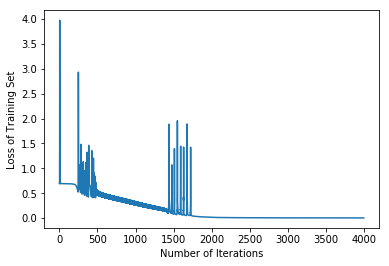

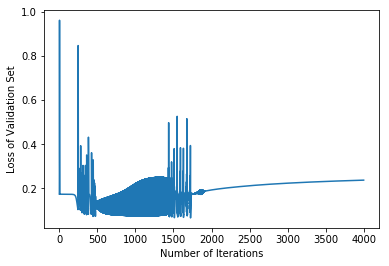

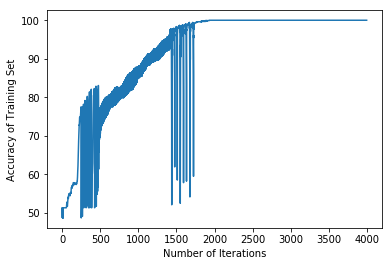

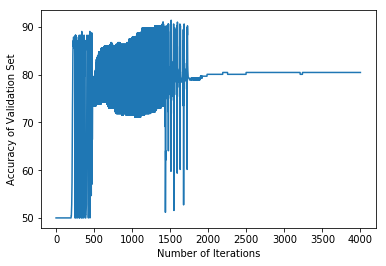

In [31]:
    print("Best")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [32]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

		training		validation		best	
loss		0.0041257213		0.2366527109		0.0694362286
accuracy	100.0000000000		80.4687500000		91.4062500000


In [33]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [34]:
learning_rate=0.5
lambd = 0.001 #best?
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

#0 Training loss : 0.6968116870	Validation loss : 0.2028952177	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#1 Training loss : 0.8009260460	Validation loss : 0.5702589057	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2 Training loss : 2.3487458413	Validation loss : 0.9247823941	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#3 Training loss : 3.6371533596	Validation loss : 0.3003060644	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4 Training loss : 1.2669572425	Validation loss : 0.3515313368	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#5 Training loss : 1.4548825359	Validation loss : 0.2107289481	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#6 Training loss : 0.8795883798	Validation loss : 0.1807360918	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#7 Training loss : 0.7260357807	Validation loss : 0.1733533667	Traini

#61 Training loss : 0.6918689737	Validation loss : 0.1727914707	Training Accuracy: 52.8724440117%	Validation Accuracy: 50.0000000000%
#62 Training loss : 0.6918438743	Validation loss : 0.1727910250	Training Accuracy: 52.2882181110%	Validation Accuracy: 50.0000000000%
#63 Training loss : 0.6918185937	Validation loss : 0.1727905670	Training Accuracy: 52.1908471276%	Validation Accuracy: 50.0000000000%
#64 Training loss : 0.6917931269	Validation loss : 0.1727900961	Training Accuracy: 51.8013631938%	Validation Accuracy: 50.0000000000%
#65 Training loss : 0.6917674687	Validation loss : 0.1727896121	Training Accuracy: 52.0934761441%	Validation Accuracy: 50.0000000000%
#66 Training loss : 0.6917416136	Validation loss : 0.1727891144	Training Accuracy: 52.0934761441%	Validation Accuracy: 50.0000000000%
#67 Training loss : 0.6917155564	Validation loss : 0.1727886026	Training Accuracy: 52.0934761441%	Validation Accuracy: 50.0000000000%
#68 Training loss : 0.6916892915	Validation loss : 0.172788076

#121 Training loss : 0.6898021079	Validation loss : 0.1727185324	Training Accuracy: 56.8646543330%	Validation Accuracy: 50.0000000000%
#122 Training loss : 0.6897517317	Validation loss : 0.1727156892	Training Accuracy: 56.8646543330%	Validation Accuracy: 50.0000000000%
#123 Training loss : 0.6897005059	Validation loss : 0.1727127372	Training Accuracy: 56.9620253165%	Validation Accuracy: 50.0000000000%
#124 Training loss : 0.6896484053	Validation loss : 0.1727096712	Training Accuracy: 57.0593962999%	Validation Accuracy: 50.0000000000%
#125 Training loss : 0.6895954035	Validation loss : 0.1727064856	Training Accuracy: 57.1567672833%	Validation Accuracy: 50.0000000000%
#126 Training loss : 0.6895414729	Validation loss : 0.1727031747	Training Accuracy: 56.7672833496%	Validation Accuracy: 50.0000000000%
#127 Training loss : 0.6894865850	Validation loss : 0.1726997322	Training Accuracy: 57.0593962999%	Validation Accuracy: 50.0000000000%
#128 Training loss : 0.6894307101	Validation loss : 0.1

#181 Training loss : 0.6832856889	Validation loss : 0.1717716733	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#182 Training loss : 0.6830338833	Validation loss : 0.1717125972	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#183 Training loss : 0.6827707243	Validation loss : 0.1716493572	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#184 Training loss : 0.6824954448	Validation loss : 0.1715816068	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#185 Training loss : 0.6822072130	Validation loss : 0.1715089668	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#186 Training loss : 0.6819051256	Validation loss : 0.1714310219	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#187 Training loss : 0.6815882011	Validation loss : 0.1713473169	Training Accuracy: 57.4488802337%	Validation Accuracy: 50.0000000000%
#188 Training loss : 0.6812553724	Validation loss : 0.1

#241 Training loss : 0.5480584166	Validation loss : 0.1112561448	Training Accuracy: 75.8519961052%	Validation Accuracy: 86.7187500000%
#242 Training loss : 0.5423557936	Validation loss : 0.1090594142	Training Accuracy: 76.0467380721%	Validation Accuracy: 86.7187500000%
#243 Training loss : 0.5367241838	Validation loss : 0.1068763815	Training Accuracy: 76.5335929893%	Validation Accuracy: 86.7187500000%
#244 Training loss : 0.5311817593	Validation loss : 0.1052517720	Training Accuracy: 77.0204479065%	Validation Accuracy: 85.9375000000%
#245 Training loss : 0.5257820012	Validation loss : 0.1014529040	Training Accuracy: 77.4099318403%	Validation Accuracy: 85.9375000000%
#246 Training loss : 0.5220791107	Validation loss : 0.1486549035	Training Accuracy: 76.9230769231%	Validation Accuracy: 59.7656250000%
#247 Training loss : 0.5859891376	Validation loss : 0.4750380901	Training Accuracy: 62.8042843233%	Validation Accuracy: 50.0000000000%
#248 Training loss : 1.6802349944	Validation loss : 0.1

#301 Training loss : 0.7474261773	Validation loss : 0.1092260547	Training Accuracy: 54.6251217137%	Validation Accuracy: 81.6406250000%
#302 Training loss : 0.5431077175	Validation loss : 0.1232469377	Training Accuracy: 74.2940603700%	Validation Accuracy: 76.5625000000%
#303 Training loss : 0.5562174032	Validation loss : 0.1379787784	Training Accuracy: 70.4965920156%	Validation Accuracy: 59.3750000000%
#304 Training loss : 0.5739778948	Validation loss : 0.2034122201	Training Accuracy: 66.0175267770%	Validation Accuracy: 51.9531250000%
#305 Training loss : 0.7557820356	Validation loss : 0.1062129424	Training Accuracy: 54.2356377799%	Validation Accuracy: 83.2031250000%
#306 Training loss : 0.5323897326	Validation loss : 0.1123465392	Training Accuracy: 76.0467380721%	Validation Accuracy: 82.4218750000%
#307 Training loss : 0.5341691817	Validation loss : 0.1315869005	Training Accuracy: 73.5150925024%	Validation Accuracy: 64.4531250000%
#308 Training loss : 0.5525167468	Validation loss : 0.1

#361 Training loss : 0.5006767790	Validation loss : 0.2040439763	Training Accuracy: 75.1703992210%	Validation Accuracy: 60.1562500000%
#362 Training loss : 0.5755061269	Validation loss : 0.2469153037	Training Accuracy: 67.2833495618%	Validation Accuracy: 51.1718750000%
#363 Training loss : 0.9131091705	Validation loss : 0.1144769862	Training Accuracy: 52.6777020448%	Validation Accuracy: 80.0781250000%
#364 Training loss : 0.5340670892	Validation loss : 0.0982422116	Training Accuracy: 73.2229795521%	Validation Accuracy: 82.8125000000%
#365 Training loss : 0.4818265517	Validation loss : 0.0882936044	Training Accuracy: 78.3836416748%	Validation Accuracy: 87.8906250000%
#366 Training loss : 0.4755180856	Validation loss : 0.1086383986	Training Accuracy: 77.5073028238%	Validation Accuracy: 79.6875000000%
#367 Training loss : 0.4709646489	Validation loss : 0.0937648422	Training Accuracy: 77.9941577410%	Validation Accuracy: 85.1562500000%
#368 Training loss : 0.5042575171	Validation loss : 0.1

#421 Training loss : 0.4776170637	Validation loss : 0.1276290287	Training Accuracy: 74.9756572541%	Validation Accuracy: 74.6093750000%
#422 Training loss : 0.6035296452	Validation loss : 0.1212312161	Training Accuracy: 67.1859785784%	Validation Accuracy: 76.9531250000%
#423 Training loss : 0.4509837491	Validation loss : 0.0915602285	Training Accuracy: 78.7731256086%	Validation Accuracy: 84.7656250000%
#424 Training loss : 0.4992515040	Validation loss : 0.1480022925	Training Accuracy: 75.2677702045%	Validation Accuracy: 71.8750000000%
#425 Training loss : 0.4725910773	Validation loss : 0.1223831184	Training Accuracy: 75.8519961052%	Validation Accuracy: 75.3906250000%
#426 Training loss : 0.5908352340	Validation loss : 0.1263130556	Training Accuracy: 68.1596884129%	Validation Accuracy: 75.7812500000%
#427 Training loss : 0.4527218187	Validation loss : 0.0950792493	Training Accuracy: 78.2862706913%	Validation Accuracy: 83.9843750000%
#428 Training loss : 0.5112925873	Validation loss : 0.1

#481 Training loss : 0.4335303974	Validation loss : 0.0937558533	Training Accuracy: 79.4547224927%	Validation Accuracy: 83.9843750000%
#482 Training loss : 0.5125070295	Validation loss : 0.1450312735	Training Accuracy: 74.1966893866%	Validation Accuracy: 75.0000000000%
#483 Training loss : 0.4325494126	Validation loss : 0.0934081495	Training Accuracy: 79.4547224927%	Validation Accuracy: 83.9843750000%
#484 Training loss : 0.5113996466	Validation loss : 0.1453187839	Training Accuracy: 74.4888023369%	Validation Accuracy: 75.0000000000%
#485 Training loss : 0.4315983230	Validation loss : 0.0930941175	Training Accuracy: 79.4547224927%	Validation Accuracy: 83.9843750000%
#486 Training loss : 0.5103919860	Validation loss : 0.1455877283	Training Accuracy: 74.4888023369%	Validation Accuracy: 75.0000000000%
#487 Training loss : 0.4306417155	Validation loss : 0.0927726451	Training Accuracy: 79.3573515093%	Validation Accuracy: 83.9843750000%
#488 Training loss : 0.5093420385	Validation loss : 0.1

#541 Training loss : 0.4074480250	Validation loss : 0.0865692423	Training Accuracy: 80.2336903603%	Validation Accuracy: 85.1562500000%
#542 Training loss : 0.4849693827	Validation loss : 0.1530124342	Training Accuracy: 75.9493670886%	Validation Accuracy: 75.0000000000%
#543 Training loss : 0.4066626392	Validation loss : 0.0864041111	Training Accuracy: 80.2336903603%	Validation Accuracy: 85.5468750000%
#544 Training loss : 0.4841608242	Validation loss : 0.1532712591	Training Accuracy: 76.1441090555%	Validation Accuracy: 75.0000000000%
#545 Training loss : 0.4058814164	Validation loss : 0.0862424710	Training Accuracy: 80.2336903603%	Validation Accuracy: 85.5468750000%
#546 Training loss : 0.4833573443	Validation loss : 0.1535299946	Training Accuracy: 76.1441090555%	Validation Accuracy: 75.0000000000%
#547 Training loss : 0.4051042677	Validation loss : 0.0860842187	Training Accuracy: 80.3310613437%	Validation Accuracy: 85.5468750000%
#548 Training loss : 0.4825587706	Validation loss : 0.1

#601 Training loss : 0.3853693285	Validation loss : 0.0828027919	Training Accuracy: 81.4021421616%	Validation Accuracy: 85.5468750000%
#602 Training loss : 0.4623045776	Validation loss : 0.1607053062	Training Accuracy: 77.6046738072%	Validation Accuracy: 74.6093750000%
#603 Training loss : 0.3846746661	Validation loss : 0.0827109669	Training Accuracy: 81.4021421616%	Validation Accuracy: 85.5468750000%
#604 Training loss : 0.4615901021	Validation loss : 0.1609603706	Training Accuracy: 77.6046738072%	Validation Accuracy: 74.6093750000%
#605 Training loss : 0.3839819917	Validation loss : 0.0826208680	Training Accuracy: 81.4021421616%	Validation Accuracy: 85.5468750000%
#606 Training loss : 0.4608775850	Validation loss : 0.1612156112	Training Accuracy: 77.6046738072%	Validation Accuracy: 74.6093750000%
#607 Training loss : 0.3832912550	Validation loss : 0.0825324367	Training Accuracy: 81.4021421616%	Validation Accuracy: 85.9375000000%
#608 Training loss : 0.4601669064	Validation loss : 0.1

#661 Training loss : 0.3651511878	Validation loss : 0.0805904418	Training Accuracy: 82.4732229796%	Validation Accuracy: 85.9375000000%
#662 Training loss : 0.4411804342	Validation loss : 0.1683230679	Training Accuracy: 78.2862706913%	Validation Accuracy: 73.8281250000%
#663 Training loss : 0.3644896544	Validation loss : 0.0805351035	Training Accuracy: 82.4732229796%	Validation Accuracy: 85.9375000000%
#664 Training loss : 0.4404883216	Validation loss : 0.1685791086	Training Accuracy: 78.3836416748%	Validation Accuracy: 73.8281250000%
#665 Training loss : 0.3638286561	Validation loss : 0.0804809432	Training Accuracy: 82.4732229796%	Validation Accuracy: 85.9375000000%
#666 Training loss : 0.4397977720	Validation loss : 0.1688359236	Training Accuracy: 78.4810126582%	Validation Accuracy: 73.8281250000%
#667 Training loss : 0.3631680845	Validation loss : 0.0804277557	Training Accuracy: 82.5705939630%	Validation Accuracy: 85.9375000000%
#668 Training loss : 0.4391080190	Validation loss : 0.1

#721 Training loss : 0.3452941397	Validation loss : 0.0792423888	Training Accuracy: 82.8627069133%	Validation Accuracy: 85.5468750000%
#722 Training loss : 0.4203758668	Validation loss : 0.1762510125	Training Accuracy: 79.5520934761%	Validation Accuracy: 73.4375000000%
#723 Training loss : 0.3446279045	Validation loss : 0.0792059214	Training Accuracy: 82.9600778968%	Validation Accuracy: 85.5468750000%
#724 Training loss : 0.4196769765	Validation loss : 0.1765290184	Training Accuracy: 79.6494644596%	Validation Accuracy: 73.4375000000%
#725 Training loss : 0.3439611422	Validation loss : 0.0791696190	Training Accuracy: 83.0574488802%	Validation Accuracy: 85.5468750000%
#726 Training loss : 0.4189767957	Validation loss : 0.1768081525	Training Accuracy: 79.6494644596%	Validation Accuracy: 73.4375000000%
#727 Training loss : 0.3432938187	Validation loss : 0.0791334581	Training Accuracy: 83.0574488802%	Validation Accuracy: 85.5468750000%
#728 Training loss : 0.4182752409	Validation loss : 0.1

#781 Training loss : 0.3249796670	Validation loss : 0.0782086336	Training Accuracy: 84.0311587147%	Validation Accuracy: 85.9375000000%
#782 Training loss : 0.3988860726	Validation loss : 0.1851595488	Training Accuracy: 80.2336903603%	Validation Accuracy: 71.8750000000%
#783 Training loss : 0.3242887221	Validation loss : 0.0781763084	Training Accuracy: 84.1285296981%	Validation Accuracy: 85.9375000000%
#784 Training loss : 0.3981556636	Validation loss : 0.1854811710	Training Accuracy: 80.2336903603%	Validation Accuracy: 71.8750000000%
#785 Training loss : 0.3235972252	Validation loss : 0.0781442850	Training Accuracy: 84.2259006816%	Validation Accuracy: 85.9375000000%
#786 Training loss : 0.3974261036	Validation loss : 0.1858051843	Training Accuracy: 80.2336903603%	Validation Accuracy: 71.8750000000%
#787 Training loss : 0.3229052419	Validation loss : 0.0781124922	Training Accuracy: 84.3232716650%	Validation Accuracy: 85.9375000000%
#788 Training loss : 0.3966972684	Validation loss : 0.1

#841 Training loss : 0.3040597073	Validation loss : 0.0771770168	Training Accuracy: 85.9785783836%	Validation Accuracy: 85.9375000000%
#842 Training loss : 0.3766246677	Validation loss : 0.1957926321	Training Accuracy: 81.4021421616%	Validation Accuracy: 71.4843750000%
#843 Training loss : 0.3033561559	Validation loss : 0.0771367164	Training Accuracy: 85.9785783836%	Validation Accuracy: 85.9375000000%
#844 Training loss : 0.3758522193	Validation loss : 0.1961803323	Training Accuracy: 81.4021421616%	Validation Accuracy: 71.4843750000%
#845 Training loss : 0.3026518403	Validation loss : 0.0770955998	Training Accuracy: 86.0759493671%	Validation Accuracy: 85.9375000000%
#846 Training loss : 0.3750755334	Validation loss : 0.1965693127	Training Accuracy: 81.5968841285%	Validation Accuracy: 71.4843750000%
#847 Training loss : 0.3019465584	Validation loss : 0.0770535648	Training Accuracy: 86.0759493671%	Validation Accuracy: 85.9375000000%
#848 Training loss : 0.3742940644	Validation loss : 0.1

#901 Training loss : 0.2827660938	Validation loss : 0.0759252847	Training Accuracy: 87.4391431353%	Validation Accuracy: 85.9375000000%
#902 Training loss : 0.3528890452	Validation loss : 0.2077726548	Training Accuracy: 82.8627069133%	Validation Accuracy: 71.8750000000%
#903 Training loss : 0.2820560772	Validation loss : 0.0758855245	Training Accuracy: 87.5365141188%	Validation Accuracy: 85.9375000000%
#904 Training loss : 0.3520847472	Validation loss : 0.2081782920	Training Accuracy: 83.0574488802%	Validation Accuracy: 71.8750000000%
#905 Training loss : 0.2813458802	Validation loss : 0.0758458266	Training Accuracy: 87.6338851022%	Validation Accuracy: 85.9375000000%
#906 Training loss : 0.3512788603	Validation loss : 0.2085836981	Training Accuracy: 83.0574488802%	Validation Accuracy: 71.8750000000%
#907 Training loss : 0.2806355105	Validation loss : 0.0758062106	Training Accuracy: 87.6338851022%	Validation Accuracy: 85.9375000000%
#908 Training loss : 0.3504714485	Validation loss : 0.2

#961 Training loss : 0.2614245386	Validation loss : 0.0748397835	Training Accuracy: 88.0233690360%	Validation Accuracy: 87.1093750000%
#962 Training loss : 0.3283022468	Validation loss : 0.2195217850	Training Accuracy: 84.8101265823%	Validation Accuracy: 71.4843750000%
#963 Training loss : 0.2607136969	Validation loss : 0.0748105671	Training Accuracy: 88.1207400195%	Validation Accuracy: 87.1093750000%
#964 Training loss : 0.3274765809	Validation loss : 0.2198870583	Training Accuracy: 84.8101265823%	Validation Accuracy: 71.4843750000%
#965 Training loss : 0.2600031203	Validation loss : 0.0747819938	Training Accuracy: 88.1207400195%	Validation Accuracy: 87.1093750000%
#966 Training loss : 0.3266513334	Validation loss : 0.2202500311	Training Accuracy: 84.9074975657%	Validation Accuracy: 71.4843750000%
#967 Training loss : 0.2592928334	Validation loss : 0.0747540689	Training Accuracy: 88.1207400195%	Validation Accuracy: 87.1093750000%
#968 Training loss : 0.3258265326	Validation loss : 0.2

#1021 Training loss : 0.2402707541	Validation loss : 0.0742404260	Training Accuracy: 89.5813047712%	Validation Accuracy: 87.8906250000%
#1022 Training loss : 0.3037052450	Validation loss : 0.2293148815	Training Accuracy: 86.3680623174%	Validation Accuracy: 71.0937500000%
#1023 Training loss : 0.2395737759	Validation loss : 0.0742301802	Training Accuracy: 89.7760467381%	Validation Accuracy: 87.8906250000%
#1024 Training loss : 0.3028930524	Validation loss : 0.2295952661	Training Accuracy: 86.4654333009%	Validation Accuracy: 71.0937500000%
#1025 Training loss : 0.2388775024	Validation loss : 0.0742205591	Training Accuracy: 89.8734177215%	Validation Accuracy: 88.2812500000%
#1026 Training loss : 0.3020816747	Validation loss : 0.2298724898	Training Accuracy: 86.4654333009%	Validation Accuracy: 71.0937500000%
#1027 Training loss : 0.2381819529	Validation loss : 0.0742115618	Training Accuracy: 89.9707887050%	Validation Accuracy: 88.6718750000%
#1028 Training loss : 0.3012711502	Validation lo

#1081 Training loss : 0.2197369562	Validation loss : 0.0741926242	Training Accuracy: 91.0418695229%	Validation Accuracy: 88.6718750000%
#1082 Training loss : 0.2798256834	Validation loss : 0.2363494501	Training Accuracy: 88.5102239533%	Validation Accuracy: 71.4843750000%
#1083 Training loss : 0.2190678529	Validation loss : 0.0741995257	Training Accuracy: 91.0418695229%	Validation Accuracy: 88.6718750000%
#1084 Training loss : 0.2790506798	Validation loss : 0.2365357209	Training Accuracy: 88.5102239533%	Validation Accuracy: 71.4843750000%
#1085 Training loss : 0.2183998130	Validation loss : 0.0742069061	Training Accuracy: 91.0418695229%	Validation Accuracy: 88.6718750000%
#1086 Training loss : 0.2782771625	Validation loss : 0.2367189871	Training Accuracy: 88.5102239533%	Validation Accuracy: 71.4843750000%
#1087 Training loss : 0.2177328364	Validation loss : 0.0742147576	Training Accuracy: 91.0418695229%	Validation Accuracy: 88.6718750000%
#1088 Training loss : 0.2775051314	Validation lo

#1141 Training loss : 0.2001052837	Validation loss : 0.0745776043	Training Accuracy: 92.0155793574%	Validation Accuracy: 89.4531250000%
#1142 Training loss : 0.2571890227	Validation loss : 0.2406830982	Training Accuracy: 89.1918208374%	Validation Accuracy: 71.4843750000%
#1143 Training loss : 0.1994650719	Validation loss : 0.0745957134	Training Accuracy: 92.1129503408%	Validation Accuracy: 89.4531250000%
#1144 Training loss : 0.2564538630	Validation loss : 0.2407848128	Training Accuracy: 89.2891918208%	Validation Accuracy: 71.4843750000%
#1145 Training loss : 0.1988256178	Validation loss : 0.0746141013	Training Accuracy: 92.1129503408%	Validation Accuracy: 89.4531250000%
#1146 Training loss : 0.2557197049	Validation loss : 0.2408838928	Training Accuracy: 89.2891918208%	Validation Accuracy: 71.4843750000%
#1147 Training loss : 0.1981869020	Validation loss : 0.0746327638	Training Accuracy: 92.2103213242%	Validation Accuracy: 89.4531250000%
#1148 Training loss : 0.2549865171	Validation lo

#1201 Training loss : 0.1811336130	Validation loss : 0.0752317614	Training Accuracy: 92.9892891918%	Validation Accuracy: 89.8437500000%
#1202 Training loss : 0.2354183329	Validation loss : 0.2426125788	Training Accuracy: 89.9707887050%	Validation Accuracy: 72.2656250000%
#1203 Training loss : 0.1805054270	Validation loss : 0.0752574207	Training Accuracy: 92.9892891918%	Validation Accuracy: 89.8437500000%
#1204 Training loss : 0.2346961483	Validation loss : 0.2426372983	Training Accuracy: 89.9707887050%	Validation Accuracy: 72.2656250000%
#1205 Training loss : 0.1798772047	Validation loss : 0.0752833454	Training Accuracy: 92.9892891918%	Validation Accuracy: 89.8437500000%
#1206 Training loss : 0.2339737059	Validation loss : 0.2426594609	Training Accuracy: 89.9707887050%	Validation Accuracy: 72.2656250000%
#1207 Training loss : 0.1792489184	Validation loss : 0.0753095392	Training Accuracy: 92.9892891918%	Validation Accuracy: 89.8437500000%
#1208 Training loss : 0.2332509634	Validation lo

#1261 Training loss : 0.1621928079	Validation loss : 0.0761383474	Training Accuracy: 94.3524829601%	Validation Accuracy: 89.4531250000%
#1262 Training loss : 0.2135279315	Validation loss : 0.2422599064	Training Accuracy: 90.9444985394%	Validation Accuracy: 73.0468750000%
#1263 Training loss : 0.1615566463	Validation loss : 0.0761743664	Training Accuracy: 94.3524829601%	Validation Accuracy: 89.4531250000%
#1264 Training loss : 0.2127885329	Validation loss : 0.2422108415	Training Accuracy: 91.0418695229%	Validation Accuracy: 73.0468750000%
#1265 Training loss : 0.1609201721	Validation loss : 0.0762108203	Training Accuracy: 94.3524829601%	Validation Accuracy: 89.4531250000%
#1266 Training loss : 0.2120484948	Validation loss : 0.2421595344	Training Accuracy: 91.0418695229%	Validation Accuracy: 73.0468750000%
#1267 Training loss : 0.1602833845	Validation loss : 0.0762477137	Training Accuracy: 94.3524829601%	Validation Accuracy: 89.4531250000%
#1268 Training loss : 0.2113078023	Validation lo

#1321 Training loss : 0.1427980494	Validation loss : 0.0774303558	Training Accuracy: 95.6183057449%	Validation Accuracy: 90.2343750000%
#1322 Training loss : 0.1906094184	Validation loss : 0.2397223159	Training Accuracy: 92.1129503408%	Validation Accuracy: 73.4375000000%
#1323 Training loss : 0.1421210829	Validation loss : 0.0774827754	Training Accuracy: 95.6183057449%	Validation Accuracy: 90.2343750000%
#1324 Training loss : 0.1897734786	Validation loss : 0.2395854788	Training Accuracy: 92.1129503408%	Validation Accuracy: 73.4375000000%
#1325 Training loss : 0.1414391550	Validation loss : 0.0775361133	Training Accuracy: 95.7156767283%	Validation Accuracy: 90.2343750000%
#1326 Training loss : 0.1889261238	Validation loss : 0.2394427840	Training Accuracy: 92.2103213242%	Validation Accuracy: 73.4375000000%
#1327 Training loss : 0.1407516734	Validation loss : 0.0775904435	Training Accuracy: 95.7156767283%	Validation Accuracy: 90.2343750000%
#1328 Training loss : 0.1880660264	Validation lo

#1381 Training loss : 0.1027789325	Validation loss : 0.0900314196	Training Accuracy: 97.5657254138%	Validation Accuracy: 87.8906250000%
#1382 Training loss : 0.1225064661	Validation loss : 0.2159257697	Training Accuracy: 95.6183057449%	Validation Accuracy: 75.3906250000%
#1383 Training loss : 0.1021266321	Validation loss : 0.0894809584	Training Accuracy: 97.5657254138%	Validation Accuracy: 87.8906250000%
#1384 Training loss : 0.1237548106	Validation loss : 0.2184110027	Training Accuracy: 95.5209347614%	Validation Accuracy: 75.0000000000%
#1385 Training loss : 0.1030209712	Validation loss : 0.0872528947	Training Accuracy: 97.4683544304%	Validation Accuracy: 88.6718750000%
#1386 Training loss : 0.1289948183	Validation loss : 0.2230382721	Training Accuracy: 95.0340798442%	Validation Accuracy: 74.6093750000%
#1387 Training loss : 0.1058375009	Validation loss : 0.0841336455	Training Accuracy: 97.4683544304%	Validation Accuracy: 89.4531250000%
#1388 Training loss : 0.1397087813	Validation lo

#1441 Training loss : 0.1014428827	Validation loss : 0.1210296860	Training Accuracy: 97.4683544304%	Validation Accuracy: 80.8593750000%
#1442 Training loss : 0.0944999288	Validation loss : 0.1323060382	Training Accuracy: 97.6630963973%	Validation Accuracy: 80.0781250000%
#1443 Training loss : 0.0896865828	Validation loss : 0.1472281498	Training Accuracy: 97.7604673807%	Validation Accuracy: 79.6875000000%
#1444 Training loss : 0.0862395636	Validation loss : 0.1550404566	Training Accuracy: 97.8578383642%	Validation Accuracy: 78.9062500000%
#1445 Training loss : 0.0837068087	Validation loss : 0.1622877947	Training Accuracy: 97.8578383642%	Validation Accuracy: 78.9062500000%
#1446 Training loss : 0.0817725625	Validation loss : 0.1655094602	Training Accuracy: 97.9552093476%	Validation Accuracy: 78.9062500000%
#1447 Training loss : 0.0802220619	Validation loss : 0.1687712202	Training Accuracy: 97.9552093476%	Validation Accuracy: 78.9062500000%
#1448 Training loss : 0.0789273108	Validation lo

#1501 Training loss : 0.1578474141	Validation loss : 0.2584063024	Training Accuracy: 93.4761441091%	Validation Accuracy: 73.0468750000%
#1502 Training loss : 0.1235034967	Validation loss : 0.0990523534	Training Accuracy: 95.4235637780%	Validation Accuracy: 87.5000000000%
#1503 Training loss : 0.2909983629	Validation loss : 0.3336209554	Training Accuracy: 88.1207400195%	Validation Accuracy: 69.1406250000%
#1504 Training loss : 0.2424620271	Validation loss : 0.2706312653	Training Accuracy: 88.4128529698%	Validation Accuracy: 67.9687500000%
#1505 Training loss : 0.9987762356	Validation loss : 0.1880219208	Training Accuracy: 65.9201557936%	Validation Accuracy: 76.9531250000%
#1506 Training loss : 0.2496066478	Validation loss : 0.1002135119	Training Accuracy: 88.8997078870%	Validation Accuracy: 86.3281250000%
#1507 Training loss : 0.3350465494	Validation loss : 0.2830434994	Training Accuracy: 84.8101265823%	Validation Accuracy: 71.8750000000%
#1508 Training loss : 0.1618043785	Validation lo

#1561 Training loss : 0.0871364996	Validation loss : 0.2113201949	Training Accuracy: 97.0788704966%	Validation Accuracy: 75.3906250000%
#1562 Training loss : 0.0684540549	Validation loss : 0.0925144164	Training Accuracy: 98.9289191821%	Validation Accuracy: 87.5000000000%
#1563 Training loss : 0.0881546756	Validation loss : 0.2125928573	Training Accuracy: 96.8841285297%	Validation Accuracy: 75.3906250000%
#1564 Training loss : 0.0689870113	Validation loss : 0.0914477743	Training Accuracy: 98.8315481986%	Validation Accuracy: 88.2812500000%
#1565 Training loss : 0.0906731686	Validation loss : 0.2141421155	Training Accuracy: 96.5920155794%	Validation Accuracy: 75.3906250000%
#1566 Training loss : 0.0699170581	Validation loss : 0.0902615985	Training Accuracy: 98.8315481986%	Validation Accuracy: 88.6718750000%
#1567 Training loss : 0.0938853930	Validation loss : 0.2156322589	Training Accuracy: 96.3972736125%	Validation Accuracy: 75.3906250000%
#1568 Training loss : 0.0709208982	Validation lo

#1621 Training loss : 0.1584351238	Validation loss : 0.0861007462	Training Accuracy: 95.0340798442%	Validation Accuracy: 81.6406250000%
#1622 Training loss : 0.1439925603	Validation loss : 0.0693392787	Training Accuracy: 98.2473222980%	Validation Accuracy: 89.4531250000%
#1623 Training loss : 0.1407989727	Validation loss : 0.0917993105	Training Accuracy: 95.7156767283%	Validation Accuracy: 80.8593750000%
#1624 Training loss : 0.1321343931	Validation loss : 0.0690705699	Training Accuracy: 98.3446932814%	Validation Accuracy: 89.4531250000%
#1625 Training loss : 0.1286886895	Validation loss : 0.0956637776	Training Accuracy: 95.9104186952%	Validation Accuracy: 80.8593750000%
#1626 Training loss : 0.1175088172	Validation loss : 0.0699416891	Training Accuracy: 98.4420642648%	Validation Accuracy: 91.0156250000%
#1627 Training loss : 0.1144089102	Validation loss : 0.0990237319	Training Accuracy: 96.6893865628%	Validation Accuracy: 80.8593750000%
#1628 Training loss : 0.1065748819	Validation lo

#1681 Training loss : 0.2604069357	Validation loss : 0.0919103561	Training Accuracy: 90.6523855891%	Validation Accuracy: 85.5468750000%
#1682 Training loss : 0.2536469691	Validation loss : 0.1089869151	Training Accuracy: 88.2181110029%	Validation Accuracy: 79.6875000000%
#1683 Training loss : 0.1807353018	Validation loss : 0.0723975972	Training Accuracy: 96.3972736125%	Validation Accuracy: 89.0625000000%
#1684 Training loss : 0.1739699291	Validation loss : 0.1033639095	Training Accuracy: 92.9892891918%	Validation Accuracy: 79.6875000000%
#1685 Training loss : 0.1430528816	Validation loss : 0.0683827684	Training Accuracy: 98.0525803311%	Validation Accuracy: 89.8437500000%
#1686 Training loss : 0.1369642318	Validation loss : 0.0997440062	Training Accuracy: 95.5209347614%	Validation Accuracy: 80.8593750000%
#1687 Training loss : 0.1218382034	Validation loss : 0.0689401643	Training Accuracy: 98.7341772152%	Validation Accuracy: 91.0156250000%
#1688 Training loss : 0.1174775775	Validation lo

#1741 Training loss : 0.0586482423	Validation loss : 0.1078717102	Training Accuracy: 99.2210321324%	Validation Accuracy: 82.8125000000%
#1742 Training loss : 0.0554223837	Validation loss : 0.1177848919	Training Accuracy: 99.2210321324%	Validation Accuracy: 81.6406250000%
#1743 Training loss : 0.0529752338	Validation loss : 0.1199650085	Training Accuracy: 99.3184031159%	Validation Accuracy: 81.2500000000%
#1744 Training loss : 0.0511124822	Validation loss : 0.1258560748	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.8593750000%
#1745 Training loss : 0.0496635839	Validation loss : 0.1275060263	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.8593750000%
#1746 Training loss : 0.0484943487	Validation loss : 0.1309268519	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.8593750000%
#1747 Training loss : 0.0475116891	Validation loss : 0.1318359137	Training Accuracy: 99.3184031159%	Validation Accuracy: 80.8593750000%
#1748 Training loss : 0.0466578517	Validation lo

#1801 Training loss : 0.0301503228	Validation loss : 0.1495956368	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#1802 Training loss : 0.0299867479	Validation loss : 0.1497941087	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#1803 Training loss : 0.0298245891	Validation loss : 0.1498359196	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#1804 Training loss : 0.0296638074	Validation loss : 0.1500247299	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#1805 Training loss : 0.0295043680	Validation loss : 0.1500659550	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#1806 Training loss : 0.0293462367	Validation loss : 0.1502458592	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#1807 Training loss : 0.0291893831	Validation loss : 0.1502870261	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#1808 Training loss : 0.0290337771	Validation lo

#1861 Training loss : 0.0221920783	Validation loss : 0.1546297991	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.6875000000%
#1862 Training loss : 0.0220859532	Validation loss : 0.1546968870	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.6875000000%
#1863 Training loss : 0.0219806001	Validation loss : 0.1547569096	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.6875000000%
#1864 Training loss : 0.0218760150	Validation loss : 0.1548228389	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.6875000000%
#1865 Training loss : 0.0217721938	Validation loss : 0.1548828360	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.6875000000%
#1866 Training loss : 0.0216691321	Validation loss : 0.1549477289	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.6875000000%
#1867 Training loss : 0.0215668258	Validation loss : 0.1550076740	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1868 Training loss : 0.0214652704	Validation lo

#1921 Training loss : 0.0170231495	Validation loss : 0.1581642170	Training Accuracy: 99.9026290166%	Validation Accuracy: 80.0781250000%
#1922 Training loss : 0.0169543981	Validation loss : 0.1582202285	Training Accuracy: 99.9026290166%	Validation Accuracy: 80.0781250000%
#1923 Training loss : 0.0168861063	Validation loss : 0.1582761530	Training Accuracy: 99.9026290166%	Validation Accuracy: 80.0781250000%
#1924 Training loss : 0.0168182688	Validation loss : 0.1583319900	Training Accuracy: 99.9026290166%	Validation Accuracy: 80.0781250000%
#1925 Training loss : 0.0167508804	Validation loss : 0.1583877375	Training Accuracy: 99.9026290166%	Validation Accuracy: 80.0781250000%
#1926 Training loss : 0.0166839362	Validation loss : 0.1584433946	Training Accuracy: 99.9026290166%	Validation Accuracy: 80.0781250000%
#1927 Training loss : 0.0166174311	Validation loss : 0.1584989598	Training Accuracy: 99.9026290166%	Validation Accuracy: 80.0781250000%
#1928 Training loss : 0.0165513599	Validation lo

#1981 Training loss : 0.0135669733	Validation loss : 0.1615630470	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1982 Training loss : 0.0135197151	Validation loss : 0.1616280278	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1983 Training loss : 0.0134728034	Validation loss : 0.1616934538	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1984 Training loss : 0.0134262364	Validation loss : 0.1617593219	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1985 Training loss : 0.0133800121	Validation loss : 0.1618256267	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1986 Training loss : 0.0133341279	Validation loss : 0.1618923608	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1987 Training loss : 0.0132885810	Validation loss : 0.1619595143	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1988 Training loss : 0.0132433681	Valida

#2040 Training loss : 0.0112600899	Validation loss : 0.1655047157	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2041 Training loss : 0.0112275819	Validation loss : 0.1655632538	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2042 Training loss : 0.0111952475	Validation loss : 0.1656214305	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2043 Training loss : 0.0111630853	Validation loss : 0.1656792518	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2044 Training loss : 0.0111310939	Validation loss : 0.1657367237	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2045 Training loss : 0.0110992717	Validation loss : 0.1657938523	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2046 Training loss : 0.0110676173	Validation loss : 0.1658506438	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2047 Training loss : 0.0110361295	Valida

#2099 Training loss : 0.0095997596	Validation loss : 0.1685120705	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2100 Training loss : 0.0095755370	Validation loss : 0.1685575453	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2101 Training loss : 0.0095514273	Validation loss : 0.1686028901	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2102 Training loss : 0.0095274300	Validation loss : 0.1686481066	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2103 Training loss : 0.0095035442	Validation loss : 0.1686931962	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2104 Training loss : 0.0094797691	Validation loss : 0.1687381606	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2105 Training loss : 0.0094561041	Validation loss : 0.1687830012	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2106 Training loss : 0.0094325485	Valida

#2158 Training loss : 0.0083422238	Validation loss : 0.1710111204	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2159 Training loss : 0.0083235663	Validation loss : 0.1710507718	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2160 Training loss : 0.0083049867	Validation loss : 0.1710903467	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2161 Training loss : 0.0082864843	Validation loss : 0.1711298455	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2162 Training loss : 0.0082680589	Validation loss : 0.1711692688	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2163 Training loss : 0.0082497099	Validation loss : 0.1712086171	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2164 Training loss : 0.0082314368	Validation loss : 0.1712478909	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2165 Training loss : 0.0082132392	Valida

#2217 Training loss : 0.0073608860	Validation loss : 0.1732342946	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2218 Training loss : 0.0073461249	Validation loss : 0.1732701715	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2219 Training loss : 0.0073314193	Validation loss : 0.1733059954	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2220 Training loss : 0.0073167690	Validation loss : 0.1733417666	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2221 Training loss : 0.0073021736	Validation loss : 0.1733774855	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2222 Training loss : 0.0072876328	Validation loss : 0.1734131524	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2223 Training loss : 0.0072731464	Validation loss : 0.1734487675	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2224 Training loss : 0.0072587140	Valida

#2276 Training loss : 0.0065761236	Validation loss : 0.1752699110	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2277 Training loss : 0.0065641870	Validation loss : 0.1753031508	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2278 Training loss : 0.0065522913	Validation loss : 0.1753363536	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2279 Training loss : 0.0065404364	Validation loss : 0.1753695196	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2280 Training loss : 0.0065286220	Validation loss : 0.1754026492	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2281 Training loss : 0.0065168480	Validation loss : 0.1754357424	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2282 Training loss : 0.0065051141	Validation loss : 0.1754687996	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2283 Training loss : 0.0064934202	Valida

#2335 Training loss : 0.0059359271	Validation loss : 0.1771746048	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2336 Training loss : 0.0059261002	Validation loss : 0.1772060086	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2337 Training loss : 0.0059163043	Validation loss : 0.1772373863	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2338 Training loss : 0.0059065393	Validation loss : 0.1772687382	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2339 Training loss : 0.0058968050	Validation loss : 0.1773000644	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2340 Training loss : 0.0058871013	Validation loss : 0.1773313650	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2341 Training loss : 0.0058774280	Validation loss : 0.1773626402	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2342 Training loss : 0.0058677851	Valida

#2394 Training loss : 0.0054050069	Validation loss : 0.1789866164	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2395 Training loss : 0.0053967950	Validation loss : 0.1790166643	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2396 Training loss : 0.0053886071	Validation loss : 0.1790466914	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2397 Training loss : 0.0053804432	Validation loss : 0.1790766975	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2398 Training loss : 0.0053723030	Validation loss : 0.1791066829	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2399 Training loss : 0.0053641866	Validation loss : 0.1791366475	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2400 Training loss : 0.0053560937	Validation loss : 0.1791665914	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2401 Training loss : 0.0053480244	Valida

#2453 Training loss : 0.0049585586	Validation loss : 0.1807243288	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2454 Training loss : 0.0049516080	Validation loss : 0.1807531673	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2455 Training loss : 0.0049446763	Validation loss : 0.1807819851	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2456 Training loss : 0.0049377634	Validation loss : 0.1808107822	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2457 Training loss : 0.0049308693	Validation loss : 0.1808395585	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2458 Training loss : 0.0049239939	Validation loss : 0.1808683140	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2459 Training loss : 0.0049171372	Validation loss : 0.1808970487	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2460 Training loss : 0.0049102990	Valida

#2512 Training loss : 0.0045786047	Validation loss : 0.1823894223	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2513 Training loss : 0.0045726553	Validation loss : 0.1824169873	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2514 Training loss : 0.0045667210	Validation loss : 0.1824445297	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2515 Training loss : 0.0045608017	Validation loss : 0.1824720496	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2516 Training loss : 0.0045548975	Validation loss : 0.1824995468	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2517 Training loss : 0.0045490083	Validation loss : 0.1825270213	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2518 Training loss : 0.0045431339	Validation loss : 0.1825544731	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2519 Training loss : 0.0045372744	Valida

#2571 Training loss : 0.0042517903	Validation loss : 0.1839761534	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2572 Training loss : 0.0042466467	Validation loss : 0.1840023376	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2573 Training loss : 0.0042415154	Validation loss : 0.1840284977	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2574 Training loss : 0.0042363963	Validation loss : 0.1840546337	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2575 Training loss : 0.0042312894	Validation loss : 0.1840807456	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2576 Training loss : 0.0042261947	Validation loss : 0.1841068334	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2577 Training loss : 0.0042211120	Validation loss : 0.1841328971	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2578 Training loss : 0.0042160414	Valida

#2630 Training loss : 0.0039680107	Validation loss : 0.1854795210	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2631 Training loss : 0.0039635240	Validation loss : 0.1855042719	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2632 Training loss : 0.0039590475	Validation loss : 0.1855289984	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2633 Training loss : 0.0039545809	Validation loss : 0.1855537007	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2634 Training loss : 0.0039501244	Validation loss : 0.1855783787	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2635 Training loss : 0.0039456778	Validation loss : 0.1856030324	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2636 Training loss : 0.0039412412	Validation loss : 0.1856276618	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2637 Training loss : 0.0039368144	Valida

#2689 Training loss : 0.0037195106	Validation loss : 0.1868986179	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2690 Training loss : 0.0037155658	Validation loss : 0.1869219572	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2691 Training loss : 0.0037116294	Validation loss : 0.1869452730	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2692 Training loss : 0.0037077013	Validation loss : 0.1869685655	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2693 Training loss : 0.0037037814	Validation loss : 0.1869918346	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2694 Training loss : 0.0036998699	Validation loss : 0.1870150805	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2695 Training loss : 0.0036959666	Validation loss : 0.1870383030	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2696 Training loss : 0.0036920715	Valida

#2748 Training loss : 0.0035002601	Validation loss : 0.1882364468	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2749 Training loss : 0.0034967671	Validation loss : 0.1882584510	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2750 Training loss : 0.0034932810	Validation loss : 0.1882804334	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2751 Training loss : 0.0034898019	Validation loss : 0.1883023941	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2752 Training loss : 0.0034863298	Validation loss : 0.1883243330	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2753 Training loss : 0.0034828646	Validation loss : 0.1883462503	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2754 Training loss : 0.0034794063	Validation loss : 0.1883681459	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2755 Training loss : 0.0034759549	Valida

#2807 Training loss : 0.0033055110	Validation loss : 0.1894984721	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2808 Training loss : 0.0033023983	Validation loss : 0.1895192463	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2809 Training loss : 0.0032992914	Validation loss : 0.1895400006	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2810 Training loss : 0.0032961905	Validation loss : 0.1895607350	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2811 Training loss : 0.0032930954	Validation loss : 0.1895814496	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2812 Training loss : 0.0032900063	Validation loss : 0.1896021445	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2813 Training loss : 0.0032869229	Validation loss : 0.1896228196	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2814 Training loss : 0.0032838454	Valida

#2866 Training loss : 0.0031314784	Validation loss : 0.1906912021	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2867 Training loss : 0.0031286887	Validation loss : 0.1907108593	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2868 Training loss : 0.0031259040	Validation loss : 0.1907304985	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2869 Training loss : 0.0031231243	Validation loss : 0.1907501198	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2870 Training loss : 0.0031203497	Validation loss : 0.1907697231	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2871 Training loss : 0.0031175801	Validation loss : 0.1907893086	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2872 Training loss : 0.0031148155	Validation loss : 0.1908088762	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2873 Training loss : 0.0031120558	Valida

#2925 Training loss : 0.0029751102	Validation loss : 0.1918212221	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2926 Training loss : 0.0029725971	Validation loss : 0.1918398710	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2927 Training loss : 0.0029700882	Validation loss : 0.1918585037	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2928 Training loss : 0.0029675837	Validation loss : 0.1918771202	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2929 Training loss : 0.0029650835	Validation loss : 0.1918957206	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2930 Training loss : 0.0029625876	Validation loss : 0.1919143048	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2931 Training loss : 0.0029600961	Validation loss : 0.1919328729	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#2932 Training loss : 0.0029576088	Valida

#2984 Training loss : 0.0028339191	Validation loss : 0.1928946727	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2985 Training loss : 0.0028316444	Validation loss : 0.1929124120	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2986 Training loss : 0.0028293735	Validation loss : 0.1929301367	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2987 Training loss : 0.0028271063	Validation loss : 0.1929478468	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2988 Training loss : 0.0028248429	Validation loss : 0.1929655423	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2989 Training loss : 0.0028225831	Validation loss : 0.1929832233	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2990 Training loss : 0.0028203272	Validation loss : 0.1930008897	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2991 Training loss : 0.0028180749	Valida

#3043 Training loss : 0.0027058579	Validation loss : 0.1939170389	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3044 Training loss : 0.0027037902	Validation loss : 0.1939339556	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3045 Training loss : 0.0027017258	Validation loss : 0.1939508590	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3046 Training loss : 0.0026996647	Validation loss : 0.1939677493	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3047 Training loss : 0.0026976069	Validation loss : 0.1939846262	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3048 Training loss : 0.0026955522	Validation loss : 0.1940014900	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3049 Training loss : 0.0026935009	Validation loss : 0.1940183407	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3050 Training loss : 0.0026914527	Valida

#3102 Training loss : 0.0025892271	Validation loss : 0.1948931142	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3103 Training loss : 0.0025873402	Validation loss : 0.1949092838	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3104 Training loss : 0.0025854562	Validation loss : 0.1949254413	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3105 Training loss : 0.0025835751	Validation loss : 0.1949415868	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3106 Training loss : 0.0025816968	Validation loss : 0.1949577202	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3107 Training loss : 0.0025798213	Validation loss : 0.1949738416	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3108 Training loss : 0.0025779487	Validation loss : 0.1949899510	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3109 Training loss : 0.0025760789	Valida

#3161 Training loss : 0.0024826044	Validation loss : 0.1958270486	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3162 Training loss : 0.0024808763	Validation loss : 0.1958425363	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3163 Training loss : 0.0024791507	Validation loss : 0.1958580130	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3164 Training loss : 0.0024774276	Validation loss : 0.1958734786	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3165 Training loss : 0.0024757070	Validation loss : 0.1958889332	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3166 Training loss : 0.0024739889	Validation loss : 0.1959043769	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3167 Training loss : 0.0024722733	Validation loss : 0.1959198095	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3168 Training loss : 0.0024705602	Valida

#3220 Training loss : 0.0023847906	Validation loss : 0.1967224268	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3221 Training loss : 0.0023832026	Validation loss : 0.1967372890	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3222 Training loss : 0.0023816167	Validation loss : 0.1967521411	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3223 Training loss : 0.0023800331	Validation loss : 0.1967669830	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3224 Training loss : 0.0023784517	Validation loss : 0.1967818148	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3225 Training loss : 0.0023768726	Validation loss : 0.1967966364	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3226 Training loss : 0.0023752956	Validation loss : 0.1968114480	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3227 Training loss : 0.0023737208	Valida

#3279 Training loss : 0.0022947680	Validation loss : 0.1975823510	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3280 Training loss : 0.0022933042	Validation loss : 0.1975966365	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3281 Training loss : 0.0022918423	Validation loss : 0.1976109127	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3282 Training loss : 0.0022903823	Validation loss : 0.1976251795	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3283 Training loss : 0.0022889244	Validation loss : 0.1976394369	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3284 Training loss : 0.0022874684	Validation loss : 0.1976536850	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3285 Training loss : 0.0022860144	Validation loss : 0.1976679238	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3286 Training loss : 0.0022845623	Valida

#3338 Training loss : 0.0022116675	Validation loss : 0.1984095159	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3339 Training loss : 0.0022103142	Validation loss : 0.1984232673	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3340 Training loss : 0.0022089626	Validation loss : 0.1984370101	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3341 Training loss : 0.0022076129	Validation loss : 0.1984507442	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3342 Training loss : 0.0022062648	Validation loss : 0.1984644695	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3343 Training loss : 0.0022049186	Validation loss : 0.1984781862	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3344 Training loss : 0.0022035741	Validation loss : 0.1984918942	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3345 Training loss : 0.0022022313	Valida

#3397 Training loss : 0.0021347425	Validation loss : 0.1992062744	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3398 Training loss : 0.0021334881	Validation loss : 0.1992195291	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3399 Training loss : 0.0021322352	Validation loss : 0.1992327756	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3400 Training loss : 0.0021309839	Validation loss : 0.1992460140	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3401 Training loss : 0.0021297342	Validation loss : 0.1992592443	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3402 Training loss : 0.0021284861	Validation loss : 0.1992724666	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3403 Training loss : 0.0021272395	Validation loss : 0.1992856807	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3404 Training loss : 0.0021259945	Valida

#3456 Training loss : 0.0020633487	Validation loss : 0.1999746918	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3457 Training loss : 0.0020621830	Validation loss : 0.1999874824	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3458 Training loss : 0.0020610187	Validation loss : 0.2000002655	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3459 Training loss : 0.0020598558	Validation loss : 0.2000130409	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3460 Training loss : 0.0020586943	Validation loss : 0.2000258087	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3461 Training loss : 0.0020575342	Validation loss : 0.2000385690	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3462 Training loss : 0.0020563756	Validation loss : 0.2000513217	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3463 Training loss : 0.0020552183	Valida

#3515 Training loss : 0.0019969268	Validation loss : 0.2007165903	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3516 Training loss : 0.0019958409	Validation loss : 0.2007289459	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3517 Training loss : 0.0019947564	Validation loss : 0.2007412944	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3518 Training loss : 0.0019936731	Validation loss : 0.2007536358	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3519 Training loss : 0.0019925911	Validation loss : 0.2007659700	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3520 Training loss : 0.0019915103	Validation loss : 0.2007782971	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3521 Training loss : 0.0019904309	Validation loss : 0.2007906171	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3522 Training loss : 0.0019893527	Valida

#3574 Training loss : 0.0019349894	Validation loss : 0.2014335863	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3575 Training loss : 0.0019339757	Validation loss : 0.2014455327	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3576 Training loss : 0.0019329631	Validation loss : 0.2014574724	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3577 Training loss : 0.0019319518	Validation loss : 0.2014694054	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3578 Training loss : 0.0019309416	Validation loss : 0.2014813317	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3579 Training loss : 0.0019299325	Validation loss : 0.2014932512	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3580 Training loss : 0.0019289246	Validation loss : 0.2015051641	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3581 Training loss : 0.0019279179	Valida

#3633 Training loss : 0.0018771096	Validation loss : 0.2021271203	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3634 Training loss : 0.0018761614	Validation loss : 0.2021386806	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3635 Training loss : 0.0018752141	Validation loss : 0.2021502345	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3636 Training loss : 0.0018742679	Validation loss : 0.2021617821	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3637 Training loss : 0.0018733228	Validation loss : 0.2021733233	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3638 Training loss : 0.0018723788	Validation loss : 0.2021848582	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3639 Training loss : 0.0018714357	Validation loss : 0.2021963867	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3640 Training loss : 0.0018704938	Valida

#3692 Training loss : 0.0018229125	Validation loss : 0.2027984822	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3693 Training loss : 0.0018220237	Validation loss : 0.2028096770	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3694 Training loss : 0.0018211358	Validation loss : 0.2028208658	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3695 Training loss : 0.0018202489	Validation loss : 0.2028320486	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3696 Training loss : 0.0018193629	Validation loss : 0.2028432253	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3697 Training loss : 0.0018184779	Validation loss : 0.2028543961	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3698 Training loss : 0.0018175939	Validation loss : 0.2028655608	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3699 Training loss : 0.0018167108	Valida

#3751 Training loss : 0.0017720669	Validation loss : 0.2034488319	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3752 Training loss : 0.0017712323	Validation loss : 0.2034596799	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3753 Training loss : 0.0017703985	Validation loss : 0.2034705222	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3754 Training loss : 0.0017695656	Validation loss : 0.2034813588	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3755 Training loss : 0.0017687336	Validation loss : 0.2034921896	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3756 Training loss : 0.0017679024	Validation loss : 0.2035030147	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3757 Training loss : 0.0017670721	Validation loss : 0.2035138342	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3758 Training loss : 0.0017662427	Valida

#3810 Training loss : 0.0017242798	Validation loss : 0.2040792173	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3811 Training loss : 0.0017234946	Validation loss : 0.2040897354	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3812 Training loss : 0.0017227103	Validation loss : 0.2041002480	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3813 Training loss : 0.0017219268	Validation loss : 0.2041107552	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3814 Training loss : 0.0017211440	Validation loss : 0.2041212569	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3815 Training loss : 0.0017203621	Validation loss : 0.2041317532	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3816 Training loss : 0.0017195809	Validation loss : 0.2041422440	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3817 Training loss : 0.0017188006	Valida

#3869 Training loss : 0.0016792906	Validation loss : 0.2046905887	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3870 Training loss : 0.0016785508	Validation loss : 0.2047007921	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3871 Training loss : 0.0016778117	Validation loss : 0.2047109904	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3872 Training loss : 0.0016770734	Validation loss : 0.2047211835	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3873 Training loss : 0.0016763358	Validation loss : 0.2047313714	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3874 Training loss : 0.0016755989	Validation loss : 0.2047415541	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3875 Training loss : 0.0016748628	Validation loss : 0.2047517315	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3876 Training loss : 0.0016741274	Valida

#3928 Training loss : 0.0016368671	Validation loss : 0.2052838119	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3929 Training loss : 0.0016361690	Validation loss : 0.2052937148	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3930 Training loss : 0.0016354715	Validation loss : 0.2053036128	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3931 Training loss : 0.0016347746	Validation loss : 0.2053135057	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3932 Training loss : 0.0016340785	Validation loss : 0.2053233937	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3933 Training loss : 0.0016333830	Validation loss : 0.2053332768	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3934 Training loss : 0.0016326882	Validation loss : 0.2053431548	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3935 Training loss : 0.0016319941	Valida

#3987 Training loss : 0.0015968017	Validation loss : 0.2058596801	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3988 Training loss : 0.0015961418	Validation loss : 0.2058692953	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3989 Training loss : 0.0015954826	Validation loss : 0.2058789058	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3990 Training loss : 0.0015948240	Validation loss : 0.2058885115	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3991 Training loss : 0.0015941660	Validation loss : 0.2058981124	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3992 Training loss : 0.0015935086	Validation loss : 0.2059077085	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3993 Training loss : 0.0015928519	Validation loss : 0.2059172999	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#3994 Training loss : 0.0015921957	Valida

Best
lambda =  0.001


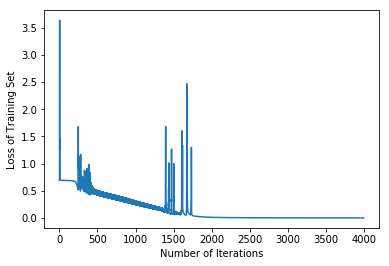

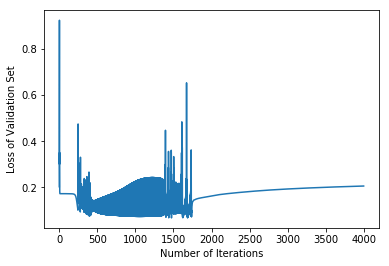

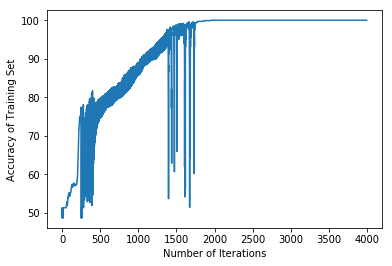

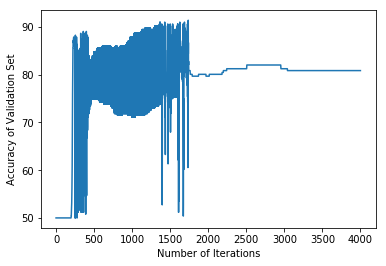

In [35]:
    print("Best")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [36]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

		training		validation		best	
loss		0.0015889243		0.2059747486		0.0719586816
accuracy	100.0000000000		80.8593750000		91.4062500000


In [37]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [38]:
learning_rate=0.5
lambd = 0.0001 #best?
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

#0 Training loss : 0.6931778459	Validation loss : 0.1768860905	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#1 Training loss : 0.7046811473	Validation loss : 0.2435926121	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2 Training loss : 0.9980473370	Validation loss : 0.8691432608	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#3 Training loss : 3.3959959876	Validation loss : 0.5337248832	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4 Training loss : 2.2191520513	Validation loss : 0.5022281464	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#5 Training loss : 2.0619421623	Validation loss : 0.2202226614	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#6 Training loss : 0.9235294823	Validation loss : 0.1848735961	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#7 Training loss : 0.7441437943	Validation loss : 0.1739664895	Traini

#61 Training loss : 0.6918698777	Validation loss : 0.1728017015	Training Accuracy: 52.6777020448%	Validation Accuracy: 50.0000000000%
#62 Training loss : 0.6918467478	Validation loss : 0.1728015351	Training Accuracy: 52.6777020448%	Validation Accuracy: 50.0000000000%
#63 Training loss : 0.6918234744	Validation loss : 0.1728013618	Training Accuracy: 52.7750730282%	Validation Accuracy: 50.0000000000%
#64 Training loss : 0.6918000532	Validation loss : 0.1728011816	Training Accuracy: 52.6777020448%	Validation Accuracy: 50.0000000000%
#65 Training loss : 0.6917764798	Validation loss : 0.1728009939	Training Accuracy: 52.6777020448%	Validation Accuracy: 50.0000000000%
#66 Training loss : 0.6917527498	Validation loss : 0.1728007987	Training Accuracy: 52.5803310613%	Validation Accuracy: 50.0000000000%
#67 Training loss : 0.6917288585	Validation loss : 0.1728005955	Training Accuracy: 52.0934761441%	Validation Accuracy: 50.0000000000%
#68 Training loss : 0.6917048016	Validation loss : 0.172800384

#121 Training loss : 0.6900332741	Validation loss : 0.1727642274	Training Accuracy: 55.2093476144%	Validation Accuracy: 50.0000000000%
#122 Training loss : 0.6899900421	Validation loss : 0.1727626212	Training Accuracy: 55.6962025316%	Validation Accuracy: 50.0000000000%
#123 Training loss : 0.6899461505	Validation loss : 0.1727609502	Training Accuracy: 55.6962025316%	Validation Accuracy: 50.0000000000%
#124 Training loss : 0.6899015809	Validation loss : 0.1727592113	Training Accuracy: 55.8909444985%	Validation Accuracy: 50.0000000000%
#125 Training loss : 0.6898563144	Validation loss : 0.1727574014	Training Accuracy: 56.0856864654%	Validation Accuracy: 50.0000000000%
#126 Training loss : 0.6898103312	Validation loss : 0.1727555173	Training Accuracy: 56.0856864654%	Validation Accuracy: 50.0000000000%
#127 Training loss : 0.6897636109	Validation loss : 0.1727535552	Training Accuracy: 56.2804284323%	Validation Accuracy: 50.0000000000%
#128 Training loss : 0.6897161323	Validation loss : 0.1

#181 Training loss : 0.6849620967	Validation loss : 0.1722365949	Training Accuracy: 57.2541382668%	Validation Accuracy: 50.0000000000%
#182 Training loss : 0.6847847151	Validation loss : 0.1722049595	Training Accuracy: 57.2541382668%	Validation Accuracy: 50.0000000000%
#183 Training loss : 0.6846005621	Validation loss : 0.1721712315	Training Accuracy: 57.2541382668%	Validation Accuracy: 50.0000000000%
#184 Training loss : 0.6844092367	Validation loss : 0.1721352486	Training Accuracy: 57.2541382668%	Validation Accuracy: 50.0000000000%
#185 Training loss : 0.6842103074	Validation loss : 0.1720968344	Training Accuracy: 57.2541382668%	Validation Accuracy: 50.0000000000%
#186 Training loss : 0.6840033092	Validation loss : 0.1720557963	Training Accuracy: 57.2541382668%	Validation Accuracy: 50.0000000000%
#187 Training loss : 0.6837877406	Validation loss : 0.1720119241	Training Accuracy: 57.2541382668%	Validation Accuracy: 50.0000000000%
#188 Training loss : 0.6835630603	Validation loss : 0.1

#241 Training loss : 0.5993947907	Validation loss : 0.1333055146	Training Accuracy: 75.2677702045%	Validation Accuracy: 86.3281250000%
#242 Training loss : 0.5942690061	Validation loss : 0.1308950172	Training Accuracy: 75.1703992210%	Validation Accuracy: 85.5468750000%
#243 Training loss : 0.5889926463	Validation loss : 0.1284544456	Training Accuracy: 75.4625121714%	Validation Accuracy: 85.1562500000%
#244 Training loss : 0.5835854703	Validation loss : 0.1259980099	Training Accuracy: 75.0730282376%	Validation Accuracy: 85.9375000000%
#245 Training loss : 0.5780695125	Validation loss : 0.1235402076	Training Accuracy: 74.9756572541%	Validation Accuracy: 85.9375000000%
#246 Training loss : 0.5724685726	Validation loss : 0.1210954414	Training Accuracy: 74.7809152872%	Validation Accuracy: 85.9375000000%
#247 Training loss : 0.5668076020	Validation loss : 0.1186775213	Training Accuracy: 75.3651411879%	Validation Accuracy: 85.9375000000%
#248 Training loss : 0.5611120187	Validation loss : 0.1

#301 Training loss : 0.5753914977	Validation loss : 0.1180125992	Training Accuracy: 74.5861733204%	Validation Accuracy: 86.7187500000%
#302 Training loss : 0.5523435025	Validation loss : 0.1085694433	Training Accuracy: 75.4625121714%	Validation Accuracy: 87.1093750000%
#303 Training loss : 0.5319912355	Validation loss : 0.1027834158	Training Accuracy: 76.3388510224%	Validation Accuracy: 85.9375000000%
#304 Training loss : 0.5159884929	Validation loss : 0.0994024708	Training Accuracy: 76.8257059396%	Validation Accuracy: 87.1093750000%
#305 Training loss : 0.5040135861	Validation loss : 0.0969226754	Training Accuracy: 77.4099318403%	Validation Accuracy: 86.3281250000%
#306 Training loss : 0.4949235025	Validation loss : 0.0969144887	Training Accuracy: 78.2862706913%	Validation Accuracy: 85.1562500000%
#307 Training loss : 0.4879412309	Validation loss : 0.0925551972	Training Accuracy: 78.1888997079%	Validation Accuracy: 87.5000000000%
#308 Training loss : 0.4830971852	Validation loss : 0.1

#361 Training loss : 0.5533665901	Validation loss : 0.1551878430	Training Accuracy: 70.0097370983%	Validation Accuracy: 59.7656250000%
#362 Training loss : 0.5652650249	Validation loss : 0.2100256421	Training Accuracy: 69.3281402142%	Validation Accuracy: 53.1250000000%
#363 Training loss : 0.7809719972	Validation loss : 0.0942829682	Training Accuracy: 54.8198636806%	Validation Accuracy: 87.8906250000%
#364 Training loss : 0.4925869195	Validation loss : 0.0917896387	Training Accuracy: 78.3836416748%	Validation Accuracy: 86.7187500000%
#365 Training loss : 0.4786209204	Validation loss : 0.0864683517	Training Accuracy: 77.5073028238%	Validation Accuracy: 88.6718750000%
#366 Training loss : 0.4704042703	Validation loss : 0.1030309785	Training Accuracy: 78.2862706913%	Validation Accuracy: 80.8593750000%
#367 Training loss : 0.4716487931	Validation loss : 0.0954114565	Training Accuracy: 78.2862706913%	Validation Accuracy: 85.5468750000%
#368 Training loss : 0.5124928150	Validation loss : 0.2

#421 Training loss : 0.4823391546	Validation loss : 0.1417739917	Training Accuracy: 76.7283349562%	Validation Accuracy: 71.8750000000%
#422 Training loss : 0.4872020984	Validation loss : 0.1349001814	Training Accuracy: 75.0730282376%	Validation Accuracy: 71.8750000000%
#423 Training loss : 0.6176461348	Validation loss : 0.1289607352	Training Accuracy: 65.8227848101%	Validation Accuracy: 73.8281250000%
#424 Training loss : 0.4776938917	Validation loss : 0.1147651373	Training Accuracy: 75.7546251217%	Validation Accuracy: 78.1250000000%
#425 Training loss : 0.5625200922	Validation loss : 0.1410585221	Training Accuracy: 70.2044790652%	Validation Accuracy: 71.8750000000%
#426 Training loss : 0.4902798901	Validation loss : 0.1321080493	Training Accuracy: 74.8782862707%	Validation Accuracy: 73.4375000000%
#427 Training loss : 0.6068301547	Validation loss : 0.1209199436	Training Accuracy: 66.5043816943%	Validation Accuracy: 76.9531250000%
#428 Training loss : 0.4688501047	Validation loss : 0.1

#481 Training loss : 0.5317891475	Validation loss : 0.1415797480	Training Accuracy: 72.7361246349%	Validation Accuracy: 74.2187500000%
#482 Training loss : 0.4501868143	Validation loss : 0.1003314378	Training Accuracy: 78.1888997079%	Validation Accuracy: 81.2500000000%
#483 Training loss : 0.5321436941	Validation loss : 0.1415722226	Training Accuracy: 72.7361246349%	Validation Accuracy: 74.6093750000%
#484 Training loss : 0.4488984934	Validation loss : 0.0995320235	Training Accuracy: 78.2862706913%	Validation Accuracy: 81.2500000000%
#485 Training loss : 0.5298671581	Validation loss : 0.1420773904	Training Accuracy: 72.9308666018%	Validation Accuracy: 74.2187500000%
#486 Training loss : 0.4480311105	Validation loss : 0.0992677808	Training Accuracy: 78.2862706913%	Validation Accuracy: 81.2500000000%
#487 Training loss : 0.5292943130	Validation loss : 0.1422607196	Training Accuracy: 72.9308666018%	Validation Accuracy: 74.6093750000%
#488 Training loss : 0.4469149240	Validation loss : 0.0

#541 Training loss : 0.5004252583	Validation loss : 0.1500587890	Training Accuracy: 74.9756572541%	Validation Accuracy: 74.6093750000%
#542 Training loss : 0.4218789176	Validation loss : 0.0897681490	Training Accuracy: 79.9415774099%	Validation Accuracy: 84.7656250000%
#543 Training loss : 0.4995043400	Validation loss : 0.1503332527	Training Accuracy: 75.0730282376%	Validation Accuracy: 74.6093750000%
#544 Training loss : 0.4210268852	Validation loss : 0.0895326632	Training Accuracy: 80.0389483934%	Validation Accuracy: 84.7656250000%
#545 Training loss : 0.4985911722	Validation loss : 0.1506071886	Training Accuracy: 75.1703992210%	Validation Accuracy: 74.6093750000%
#546 Training loss : 0.4201795231	Validation loss : 0.0893022940	Training Accuracy: 80.0389483934%	Validation Accuracy: 84.7656250000%
#547 Training loss : 0.4976855045	Validation loss : 0.1508806085	Training Accuracy: 75.2677702045%	Validation Accuracy: 74.6093750000%
#548 Training loss : 0.4193367609	Validation loss : 0.0

#601 Training loss : 0.4754191657	Validation loss : 0.1580852152	Training Accuracy: 76.9230769231%	Validation Accuracy: 73.8281250000%
#602 Training loss : 0.3980713249	Validation loss : 0.0844589501	Training Accuracy: 80.5258033106%	Validation Accuracy: 85.9375000000%
#603 Training loss : 0.4746555653	Validation loss : 0.1583455587	Training Accuracy: 76.9230769231%	Validation Accuracy: 73.8281250000%
#604 Training loss : 0.3973296662	Validation loss : 0.0843308097	Training Accuracy: 80.5258033106%	Validation Accuracy: 85.9375000000%
#605 Training loss : 0.4738952014	Validation loss : 0.1586054812	Training Accuracy: 76.9230769231%	Validation Accuracy: 73.8281250000%
#606 Training loss : 0.3965906701	Validation loss : 0.0842051143	Training Accuracy: 80.5258033106%	Validation Accuracy: 85.9375000000%
#607 Training loss : 0.4731379639	Validation loss : 0.1588649888	Training Accuracy: 77.0204479065%	Validation Accuracy: 73.8281250000%
#608 Training loss : 0.3958542781	Validation loss : 0.0

#661 Training loss : 0.4534928791	Validation loss : 0.1657351771	Training Accuracy: 77.8967867575%	Validation Accuracy: 74.2187500000%
#662 Training loss : 0.3767394399	Validation loss : 0.0814857728	Training Accuracy: 81.6942551120%	Validation Accuracy: 85.9375000000%
#663 Training loss : 0.4527838140	Validation loss : 0.1659859626	Training Accuracy: 77.8967867575%	Validation Accuracy: 74.2187500000%
#664 Training loss : 0.3760518673	Validation loss : 0.0814120348	Training Accuracy: 81.7916260954%	Validation Accuracy: 85.9375000000%
#665 Training loss : 0.4520755086	Validation loss : 0.1662366566	Training Accuracy: 77.8967867575%	Validation Accuracy: 74.2187500000%
#666 Training loss : 0.3753651902	Validation loss : 0.0813396430	Training Accuracy: 81.7916260954%	Validation Accuracy: 85.9375000000%
#667 Training loss : 0.4513679221	Validation loss : 0.1664872849	Training Accuracy: 77.9941577410%	Validation Accuracy: 74.2187500000%
#668 Training loss : 0.3746793544	Validation loss : 0.0

#721 Training loss : 0.4323670346	Validation loss : 0.1733516986	Training Accuracy: 78.8704965920%	Validation Accuracy: 73.0468750000%
#722 Training loss : 0.3563074610	Validation loss : 0.0797517019	Training Accuracy: 82.4732229796%	Validation Accuracy: 85.9375000000%
#723 Training loss : 0.4316561763	Validation loss : 0.1736125211	Training Accuracy: 78.9678675755%	Validation Accuracy: 73.0468750000%
#724 Training loss : 0.3556260792	Validation loss : 0.0797052980	Training Accuracy: 82.4732229796%	Validation Accuracy: 85.9375000000%
#725 Training loss : 0.4309436818	Validation loss : 0.1738737228	Training Accuracy: 79.0652385589%	Validation Accuracy: 73.0468750000%
#726 Training loss : 0.3549440219	Validation loss : 0.0796592570	Training Accuracy: 82.4732229796%	Validation Accuracy: 85.9375000000%
#727 Training loss : 0.4302295925	Validation loss : 0.1741353263	Training Accuracy: 79.0652385589%	Validation Accuracy: 73.0468750000%
#728 Training loss : 0.3542612217	Validation loss : 0.0

#781 Training loss : 0.4107748091	Validation loss : 0.1814820175	Training Accuracy: 79.9415774099%	Validation Accuracy: 71.4843750000%
#782 Training loss : 0.3355124215	Validation loss : 0.0786277525	Training Accuracy: 83.5443037975%	Validation Accuracy: 85.5468750000%
#783 Training loss : 0.4100538700	Validation loss : 0.1817720214	Training Accuracy: 79.9415774099%	Validation Accuracy: 71.4843750000%
#784 Training loss : 0.3348065463	Validation loss : 0.0785994839	Training Accuracy: 83.5443037975%	Validation Accuracy: 85.5468750000%
#785 Training loss : 0.4093321299	Validation loss : 0.1820639169	Training Accuracy: 79.9415774099%	Validation Accuracy: 71.4843750000%
#786 Training loss : 0.3340998247	Validation loss : 0.0785713306	Training Accuracy: 83.5443037975%	Validation Accuracy: 85.5468750000%
#787 Training loss : 0.4086094518	Validation loss : 0.1823577286	Training Accuracy: 80.0389483934%	Validation Accuracy: 71.4843750000%
#788 Training loss : 0.3333922547	Validation loss : 0.0

#841 Training loss : 0.3885904039	Validation loss : 0.1911102981	Training Accuracy: 81.0126582278%	Validation Accuracy: 71.4843750000%
#842 Training loss : 0.3140228059	Validation loss : 0.0777480101	Training Accuracy: 85.3943524830%	Validation Accuracy: 86.3281250000%
#843 Training loss : 0.3878237566	Validation loss : 0.1914678777	Training Accuracy: 81.1100292113%	Validation Accuracy: 71.4843750000%
#844 Training loss : 0.3132977997	Validation loss : 0.0777142206	Training Accuracy: 85.3943524830%	Validation Accuracy: 86.3281250000%
#845 Training loss : 0.3870542251	Validation loss : 0.1918278705	Training Accuracy: 81.2074001947%	Validation Accuracy: 71.4843750000%
#846 Training loss : 0.3125722545	Validation loss : 0.0776797679	Training Accuracy: 85.3943524830%	Validation Accuracy: 86.3281250000%
#847 Training loss : 0.3862815635	Validation loss : 0.1921901967	Training Accuracy: 81.2074001947%	Validation Accuracy: 71.4843750000%
#848 Training loss : 0.3118461156	Validation loss : 0.0

#901 Training loss : 0.3645183446	Validation loss : 0.2023167703	Training Accuracy: 81.8889970789%	Validation Accuracy: 71.8750000000%
#902 Training loss : 0.2919923825	Validation loss : 0.0765774576	Training Accuracy: 87.0496592016%	Validation Accuracy: 85.9375000000%
#903 Training loss : 0.3636893799	Validation loss : 0.2026895140	Training Accuracy: 81.8889970789%	Validation Accuracy: 71.8750000000%
#904 Training loss : 0.2912514823	Validation loss : 0.0765377106	Training Accuracy: 87.0496592016%	Validation Accuracy: 85.9375000000%
#905 Training loss : 0.3628590401	Validation loss : 0.2030613995	Training Accuracy: 82.1811100292%	Validation Accuracy: 71.4843750000%
#906 Training loss : 0.2905104511	Validation loss : 0.0764980908	Training Accuracy: 86.9522882181%	Validation Accuracy: 85.9375000000%
#907 Training loss : 0.3620274296	Validation loss : 0.2034323774	Training Accuracy: 82.1811100292%	Validation Accuracy: 71.4843750000%
#908 Training loss : 0.2897693334	Validation loss : 0.0

#961 Training loss : 0.3391392188	Validation loss : 0.2129516211	Training Accuracy: 83.7390457644%	Validation Accuracy: 71.0937500000%
#962 Training loss : 0.2697694318	Validation loss : 0.0754694466	Training Accuracy: 87.6338851022%	Validation Accuracy: 87.1093750000%
#963 Training loss : 0.3382797915	Validation loss : 0.2132813183	Training Accuracy: 83.9337877313%	Validation Accuracy: 71.0937500000%
#964 Training loss : 0.2690306667	Validation loss : 0.0754370008	Training Accuracy: 87.6338851022%	Validation Accuracy: 87.1093750000%
#965 Training loss : 0.3374200711	Validation loss : 0.2136091051	Training Accuracy: 84.1285296981%	Validation Accuracy: 71.0937500000%
#966 Training loss : 0.2682922056	Validation loss : 0.0754049782	Training Accuracy: 87.6338851022%	Validation Accuracy: 87.1093750000%
#967 Training loss : 0.3365601197	Validation loss : 0.2139349555	Training Accuracy: 84.2259006816%	Validation Accuracy: 71.0937500000%
#968 Training loss : 0.2675540675	Validation loss : 0.0

#1021 Training loss : 0.3134642986	Validation loss : 0.2219228161	Training Accuracy: 85.7838364167%	Validation Accuracy: 71.0937500000%
#1022 Training loss : 0.2478148567	Validation loss : 0.0747174013	Training Accuracy: 88.7049659202%	Validation Accuracy: 87.8906250000%
#1023 Training loss : 0.3126205225	Validation loss : 0.2221864738	Training Accuracy: 85.7838364167%	Validation Accuracy: 71.0937500000%
#1024 Training loss : 0.2470932987	Validation loss : 0.0747012175	Training Accuracy: 88.8023369036%	Validation Accuracy: 87.8906250000%
#1025 Training loss : 0.3117780202	Validation loss : 0.2224477258	Training Accuracy: 85.7838364167%	Validation Accuracy: 71.0937500000%
#1026 Training loss : 0.2463725893	Validation loss : 0.0746856457	Training Accuracy: 88.9970788705%	Validation Accuracy: 87.8906250000%
#1027 Training loss : 0.3109368287	Validation loss : 0.2227065655	Training Accuracy: 85.8812074002%	Validation Accuracy: 71.0937500000%
#1028 Training loss : 0.2456527438	Validation lo

#1081 Training loss : 0.2888006397	Validation loss : 0.2287687083	Training Accuracy: 87.7312560857%	Validation Accuracy: 71.0937500000%
#1082 Training loss : 0.2265824965	Validation loss : 0.0744921243	Training Accuracy: 90.6523855891%	Validation Accuracy: 88.6718750000%
#1083 Training loss : 0.2880030109	Validation loss : 0.2289585778	Training Accuracy: 87.8286270691%	Validation Accuracy: 71.0937500000%
#1084 Training loss : 0.2258903366	Validation loss : 0.0744933498	Training Accuracy: 90.7497565725%	Validation Accuracy: 88.6718750000%
#1085 Training loss : 0.2872069003	Validation loss : 0.2291459538	Training Accuracy: 87.9259980526%	Validation Accuracy: 71.0937500000%
#1086 Training loss : 0.2251991668	Validation loss : 0.0744950852	Training Accuracy: 90.7497565725%	Validation Accuracy: 88.6718750000%
#1087 Training loss : 0.2864122892	Validation loss : 0.2293308345	Training Accuracy: 87.9259980526%	Validation Accuracy: 71.0937500000%
#1088 Training loss : 0.2245089789	Validation lo

#1141 Training loss : 0.2654287614	Validation loss : 0.2333685089	Training Accuracy: 88.8997078870%	Validation Accuracy: 71.4843750000%
#1142 Training loss : 0.2061958797	Validation loss : 0.0747257997	Training Accuracy: 91.9182083739%	Validation Accuracy: 89.0625000000%
#1143 Training loss : 0.2646646542	Validation loss : 0.2334822093	Training Accuracy: 88.8997078870%	Validation Accuracy: 71.4843750000%
#1144 Training loss : 0.2055271509	Validation loss : 0.0747396787	Training Accuracy: 92.0155793574%	Validation Accuracy: 89.0625000000%
#1145 Training loss : 0.2639011225	Validation loss : 0.2335933103	Training Accuracy: 88.8997078870%	Validation Accuracy: 71.4843750000%
#1146 Training loss : 0.2048589009	Validation loss : 0.0747538917	Training Accuracy: 92.0155793574%	Validation Accuracy: 89.0625000000%
#1147 Training loss : 0.2631381263	Validation loss : 0.2337018080	Training Accuracy: 88.8997078870%	Validation Accuracy: 71.4843750000%
#1148 Training loss : 0.2041911067	Validation lo

#1201 Training loss : 0.2425923011	Validation loss : 0.2356382224	Training Accuracy: 89.7760467381%	Validation Accuracy: 72.2656250000%
#1202 Training loss : 0.1862463588	Validation loss : 0.0752734241	Training Accuracy: 92.8919182084%	Validation Accuracy: 89.8437500000%
#1203 Training loss : 0.2418280318	Validation loss : 0.2356730382	Training Accuracy: 89.7760467381%	Validation Accuracy: 72.2656250000%
#1204 Training loss : 0.1855817358	Validation loss : 0.0752960608	Training Accuracy: 92.8919182084%	Validation Accuracy: 89.8437500000%
#1205 Training loss : 0.2410631637	Validation loss : 0.2357052258	Training Accuracy: 89.7760467381%	Validation Accuracy: 72.2656250000%
#1206 Training loss : 0.1849168961	Validation loss : 0.0753189804	Training Accuracy: 92.8919182084%	Validation Accuracy: 89.8437500000%
#1207 Training loss : 0.2402976632	Validation loss : 0.2357347879	Training Accuracy: 89.7760467381%	Validation Accuracy: 72.2656250000%
#1208 Training loss : 0.1842518195	Validation lo

#1261 Training loss : 0.2192990059	Validation loss : 0.2355628273	Training Accuracy: 90.6523855891%	Validation Accuracy: 72.6562500000%
#1262 Training loss : 0.1661501246	Validation loss : 0.0760921742	Training Accuracy: 94.0603700097%	Validation Accuracy: 89.8437500000%
#1263 Training loss : 0.2185070213	Validation loss : 0.2355218861	Training Accuracy: 90.6523855891%	Validation Accuracy: 72.6562500000%
#1264 Training loss : 0.1654731291	Validation loss : 0.0761253322	Training Accuracy: 94.3524829601%	Validation Accuracy: 89.8437500000%
#1265 Training loss : 0.2177139470	Validation loss : 0.2354786059	Training Accuracy: 90.7497565725%	Validation Accuracy: 72.6562500000%
#1266 Training loss : 0.1647956299	Validation loss : 0.0761589429	Training Accuracy: 94.4498539435%	Validation Accuracy: 89.8437500000%
#1267 Training loss : 0.2169197747	Validation loss : 0.2354330009	Training Accuracy: 90.7497565725%	Validation Accuracy: 72.6562500000%
#1268 Training loss : 0.1641176245	Validation lo

#1321 Training loss : 0.1948601580	Validation loss : 0.2333143340	Training Accuracy: 91.9182083739%	Validation Accuracy: 73.4375000000%
#1322 Training loss : 0.1455297787	Validation loss : 0.0773159205	Training Accuracy: 95.4235637780%	Validation Accuracy: 89.8437500000%
#1323 Training loss : 0.1940000497	Validation loss : 0.2331978084	Training Accuracy: 91.9182083739%	Validation Accuracy: 73.4375000000%
#1324 Training loss : 0.1448212094	Validation loss : 0.0773664869	Training Accuracy: 95.4235637780%	Validation Accuracy: 90.2343750000%
#1325 Training loss : 0.1931338615	Validation loss : 0.2330775673	Training Accuracy: 92.0155793574%	Validation Accuracy: 73.4375000000%
#1326 Training loss : 0.1441097180	Validation loss : 0.0774178759	Training Accuracy: 95.4235637780%	Validation Accuracy: 90.2343750000%
#1327 Training loss : 0.1922610172	Validation loss : 0.2329533963	Training Accuracy: 92.0155793574%	Validation Accuracy: 73.4375000000%
#1328 Training loss : 0.1433950143	Validation lo

#1381 Training loss : 0.1575847710	Validation loss : 0.2240984036	Training Accuracy: 93.4761441091%	Validation Accuracy: 74.2187500000%
#1382 Training loss : 0.1184014984	Validation loss : 0.0802147200	Training Accuracy: 96.7867575463%	Validation Accuracy: 90.6250000000%
#1383 Training loss : 0.1544531366	Validation loss : 0.2228181561	Training Accuracy: 93.8656280428%	Validation Accuracy: 74.6093750000%
#1384 Training loss : 0.1165173384	Validation loss : 0.0806550222	Training Accuracy: 96.8841285297%	Validation Accuracy: 90.2343750000%
#1385 Training loss : 0.1508338552	Validation loss : 0.2212884530	Training Accuracy: 93.8656280428%	Validation Accuracy: 74.6093750000%
#1386 Training loss : 0.1143975674	Validation loss : 0.0812489786	Training Accuracy: 97.0788704966%	Validation Accuracy: 89.8437500000%
#1387 Training loss : 0.1467044818	Validation loss : 0.2195217887	Training Accuracy: 94.1577409932%	Validation Accuracy: 74.6093750000%
#1388 Training loss : 0.1120543254	Validation lo

#1441 Training loss : 1.1274987345	Validation loss : 0.1293654767	Training Accuracy: 62.9990262902%	Validation Accuracy: 78.9062500000%
#1442 Training loss : 0.2622351993	Validation loss : 0.0913477897	Training Accuracy: 89.0944498539%	Validation Accuracy: 87.5000000000%
#1443 Training loss : 0.3071687745	Validation loss : 0.2434657378	Training Accuracy: 85.8812074002%	Validation Accuracy: 72.6562500000%
#1444 Training loss : 0.1785667472	Validation loss : 0.0815805147	Training Accuracy: 94.1577409932%	Validation Accuracy: 87.8906250000%
#1445 Training loss : 0.2302026649	Validation loss : 0.1892852532	Training Accuracy: 89.2891918208%	Validation Accuracy: 78.9062500000%
#1446 Training loss : 0.1224913400	Validation loss : 0.0798172764	Training Accuracy: 97.8578383642%	Validation Accuracy: 89.0625000000%
#1447 Training loss : 0.1139724607	Validation loss : 0.1542307449	Training Accuracy: 96.0077896787%	Validation Accuracy: 78.5156250000%
#1448 Training loss : 0.0902165250	Validation lo

#1501 Training loss : 0.0771909498	Validation loss : 0.1165983044	Training Accuracy: 98.4420642648%	Validation Accuracy: 80.8593750000%
#1502 Training loss : 0.0767536837	Validation loss : 0.1453525186	Training Accuracy: 98.0525803311%	Validation Accuracy: 79.2968750000%
#1503 Training loss : 0.0761326888	Validation loss : 0.1125201923	Training Accuracy: 98.3446932814%	Validation Accuracy: 80.4687500000%
#1504 Training loss : 0.0767283485	Validation loss : 0.1533590248	Training Accuracy: 98.0525803311%	Validation Accuracy: 77.7343750000%
#1505 Training loss : 0.0765887008	Validation loss : 0.1034034562	Training Accuracy: 98.6368062317%	Validation Accuracy: 82.4218750000%
#1506 Training loss : 0.0801467826	Validation loss : 0.1640425341	Training Accuracy: 97.8578383642%	Validation Accuracy: 76.1718750000%
#1507 Training loss : 0.0802952372	Validation loss : 0.0898098851	Training Accuracy: 98.4420642648%	Validation Accuracy: 85.9375000000%
#1508 Training loss : 0.0925656830	Validation lo

#1561 Training loss : 0.1360820489	Validation loss : 0.0866116552	Training Accuracy: 95.2288218111%	Validation Accuracy: 86.3281250000%
#1562 Training loss : 0.1084803550	Validation loss : 0.0795356947	Training Accuracy: 97.9552093476%	Validation Accuracy: 89.0625000000%
#1563 Training loss : 0.0949962491	Validation loss : 0.0997151095	Training Accuracy: 97.5657254138%	Validation Accuracy: 84.7656250000%
#1564 Training loss : 0.0858388912	Validation loss : 0.1040287524	Training Accuracy: 98.0525803311%	Validation Accuracy: 83.2031250000%
#1565 Training loss : 0.0795989371	Validation loss : 0.1192716116	Training Accuracy: 98.0525803311%	Validation Accuracy: 81.6406250000%
#1566 Training loss : 0.0748931160	Validation loss : 0.1269085024	Training Accuracy: 98.3446932814%	Validation Accuracy: 80.4687500000%
#1567 Training loss : 0.0712569929	Validation loss : 0.1371005802	Training Accuracy: 98.3446932814%	Validation Accuracy: 80.4687500000%
#1568 Training loss : 0.0684006161	Validation lo

#1621 Training loss : 0.0737025969	Validation loss : 0.1297538217	Training Accuracy: 98.9289191821%	Validation Accuracy: 80.4687500000%
#1622 Training loss : 0.0721678642	Validation loss : 0.1756754813	Training Accuracy: 98.1499513145%	Validation Accuracy: 78.1250000000%
#1623 Training loss : 0.0699187451	Validation loss : 0.1308946225	Training Accuracy: 99.1236611490%	Validation Accuracy: 80.4687500000%
#1624 Training loss : 0.0690953231	Validation loss : 0.1795890322	Training Accuracy: 98.1499513145%	Validation Accuracy: 78.1250000000%
#1625 Training loss : 0.0672793495	Validation loss : 0.1288411714	Training Accuracy: 99.3184031159%	Validation Accuracy: 80.4687500000%
#1626 Training loss : 0.0672474331	Validation loss : 0.1829358253	Training Accuracy: 98.1499513145%	Validation Accuracy: 78.1250000000%
#1627 Training loss : 0.0656564141	Validation loss : 0.1247188586	Training Accuracy: 99.3184031159%	Validation Accuracy: 80.8593750000%
#1628 Training loss : 0.0666223441	Validation lo

#1681 Training loss : 0.0488019851	Validation loss : 0.1134210434	Training Accuracy: 99.6105160662%	Validation Accuracy: 83.5937500000%
#1682 Training loss : 0.0522536524	Validation loss : 0.1915443598	Training Accuracy: 98.2473222980%	Validation Accuracy: 78.1250000000%
#1683 Training loss : 0.0472370885	Validation loss : 0.1164108990	Training Accuracy: 99.6105160662%	Validation Accuracy: 83.5937500000%
#1684 Training loss : 0.0502365922	Validation loss : 0.1909544874	Training Accuracy: 98.2473222980%	Validation Accuracy: 78.1250000000%
#1685 Training loss : 0.0460911301	Validation loss : 0.1183777241	Training Accuracy: 99.6105160662%	Validation Accuracy: 83.2031250000%
#1686 Training loss : 0.0489282438	Validation loss : 0.1909655081	Training Accuracy: 98.5394352483%	Validation Accuracy: 78.1250000000%
#1687 Training loss : 0.0453208345	Validation loss : 0.1192729366	Training Accuracy: 99.6105160662%	Validation Accuracy: 82.8125000000%
#1688 Training loss : 0.0482190827	Validation lo

#1741 Training loss : 0.0342799420	Validation loss : 0.1570166826	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.2968750000%
#1742 Training loss : 0.0339681531	Validation loss : 0.1574240655	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.2968750000%
#1743 Training loss : 0.0336686786	Validation loss : 0.1577897192	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.2968750000%
#1744 Training loss : 0.0333808890	Validation loss : 0.1581886403	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.2968750000%
#1745 Training loss : 0.0331040301	Validation loss : 0.1585483870	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.2968750000%
#1746 Training loss : 0.0328372113	Validation loss : 0.1589349428	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.2968750000%
#1747 Training loss : 0.0325794482	Validation loss : 0.1592815695	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.2968750000%
#1748 Training loss : 0.0323297134	Validation lo

#1801 Training loss : 0.0233482507	Validation loss : 0.1664787865	Training Accuracy: 99.8052580331%	Validation Accuracy: 78.9062500000%
#1802 Training loss : 0.0232230110	Validation loss : 0.1665291040	Training Accuracy: 99.8052580331%	Validation Accuracy: 78.9062500000%
#1803 Training loss : 0.0230985241	Validation loss : 0.1665761292	Training Accuracy: 99.8052580331%	Validation Accuracy: 78.9062500000%
#1804 Training loss : 0.0229747792	Validation loss : 0.1666289434	Training Accuracy: 99.8052580331%	Validation Accuracy: 78.9062500000%
#1805 Training loss : 0.0228517660	Validation loss : 0.1666788908	Training Accuracy: 99.8052580331%	Validation Accuracy: 78.9062500000%
#1806 Training loss : 0.0227294746	Validation loss : 0.1667342237	Training Accuracy: 99.8052580331%	Validation Accuracy: 78.9062500000%
#1807 Training loss : 0.0226078955	Validation loss : 0.1667870607	Training Accuracy: 99.8052580331%	Validation Accuracy: 78.9062500000%
#1808 Training loss : 0.0224870196	Validation lo

#1861 Training loss : 0.0170070212	Validation loss : 0.1716731556	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.2968750000%
#1862 Training loss : 0.0169234126	Validation loss : 0.1717917466	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1863 Training loss : 0.0168405698	Validation loss : 0.1719094862	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1864 Training loss : 0.0167584763	Validation loss : 0.1720263891	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1865 Training loss : 0.0166771149	Validation loss : 0.1721424383	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1866 Training loss : 0.0165964685	Validation loss : 0.1722576757	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1867 Training loss : 0.0165165195	Validation loss : 0.1723721210	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1868 Training loss : 0.0164372507	Validation lo

#1921 Training loss : 0.0129363127	Validation loss : 0.1784644210	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1922 Training loss : 0.0128819445	Validation loss : 0.1785685090	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1923 Training loss : 0.0128280408	Validation loss : 0.1786717561	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1924 Training loss : 0.0127746046	Validation loss : 0.1787741719	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1925 Training loss : 0.0127216385	Validation loss : 0.1788757683	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1926 Training loss : 0.0126691449	Validation loss : 0.1789765589	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1927 Training loss : 0.0126171257	Validation loss : 0.1790765593	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1928 Training loss : 0.0125655820	Valida

#1980 Training loss : 0.0104034261	Validation loss : 0.1836216226	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1981 Training loss : 0.0103689973	Validation loss : 0.1836973968	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1982 Training loss : 0.0103347714	Validation loss : 0.1837728817	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1983 Training loss : 0.0103007461	Validation loss : 0.1838480792	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1984 Training loss : 0.0102669192	Validation loss : 0.1839229912	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1985 Training loss : 0.0102332887	Validation loss : 0.1839976192	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1986 Training loss : 0.0101998524	Validation loss : 0.1840719650	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1987 Training loss : 0.0101666083	Valida

#2039 Training loss : 0.0086600354	Validation loss : 0.1876362741	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#2040 Training loss : 0.0086346789	Validation loss : 0.1876967924	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#2041 Training loss : 0.0086094413	Validation loss : 0.1877570725	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#2042 Training loss : 0.0085843221	Validation loss : 0.1878171152	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#2043 Training loss : 0.0085593210	Validation loss : 0.1878769215	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#2044 Training loss : 0.0085344375	Validation loss : 0.1879364923	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#2045 Training loss : 0.0085096715	Validation loss : 0.1879958283	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#2046 Training loss : 0.0084850225	Valida

#2098 Training loss : 0.0073616989	Validation loss : 0.1908350403	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2099 Training loss : 0.0073429679	Validation loss : 0.1908834601	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2100 Training loss : 0.0073243341	Validation loss : 0.1909317168	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2101 Training loss : 0.0073057966	Validation loss : 0.1909798125	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2102 Training loss : 0.0072873549	Validation loss : 0.1910277492	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2103 Training loss : 0.0072690081	Validation loss : 0.1910755287	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2104 Training loss : 0.0072507556	Validation loss : 0.1911231533	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2105 Training loss : 0.0072325966	Valida

#2157 Training loss : 0.0064007664	Validation loss : 0.1934831297	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2158 Training loss : 0.0063866324	Validation loss : 0.1935255588	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2159 Training loss : 0.0063725585	Validation loss : 0.1935679388	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2160 Training loss : 0.0063585441	Validation loss : 0.1936102705	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2161 Training loss : 0.0063445887	Validation loss : 0.1936525548	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2162 Training loss : 0.0063306920	Validation loss : 0.1936947927	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2163 Training loss : 0.0063168534	Validation loss : 0.1937369848	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2164 Training loss : 0.0063030724	Valida

#2216 Training loss : 0.0056565794	Validation loss : 0.1959179457	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2217 Training loss : 0.0056453472	Validation loss : 0.1959581121	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2218 Training loss : 0.0056341556	Validation loss : 0.1959982418	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2219 Training loss : 0.0056230044	Validation loss : 0.1960383345	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2220 Training loss : 0.0056118934	Validation loss : 0.1960783903	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2221 Training loss : 0.0056008224	Validation loss : 0.1961184092	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2222 Training loss : 0.0055897911	Validation loss : 0.1961583910	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2223 Training loss : 0.0055787993	Valida

#2275 Training loss : 0.0050569237	Validation loss : 0.1982242694	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2276 Training loss : 0.0050477604	Validation loss : 0.1982622685	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2277 Training loss : 0.0050386272	Validation loss : 0.1983002332	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2278 Training loss : 0.0050295240	Validation loss : 0.1983381636	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2279 Training loss : 0.0050204505	Validation loss : 0.1983760598	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2280 Training loss : 0.0050114067	Validation loss : 0.1984139220	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2281 Training loss : 0.0050023925	Validation loss : 0.1984517504	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2282 Training loss : 0.0049934076	Valida

#2334 Training loss : 0.0045634876	Validation loss : 0.2004131890	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2335 Training loss : 0.0045558804	Validation loss : 0.2004494846	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2336 Training loss : 0.0045482962	Validation loss : 0.2004857582	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2337 Training loss : 0.0045407348	Validation loss : 0.2005220100	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2338 Training loss : 0.0045331962	Validation loss : 0.2005582404	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2339 Training loss : 0.0045256802	Validation loss : 0.2005944495	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2340 Training loss : 0.0045181868	Validation loss : 0.2006306377	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2341 Training loss : 0.0045107159	Valida

#2393 Training loss : 0.0041508978	Validation loss : 0.2025257253	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2394 Training loss : 0.0041444890	Validation loss : 0.2025611887	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2395 Training loss : 0.0041380980	Validation loss : 0.2025966464	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2396 Training loss : 0.0041317249	Validation loss : 0.2026320988	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2397 Training loss : 0.0041253694	Validation loss : 0.2026675462	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2398 Training loss : 0.0041190315	Validation loss : 0.2027029889	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2399 Training loss : 0.0041127113	Validation loss : 0.2027384271	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2400 Training loss : 0.0041064085	Valida

#2452 Training loss : 0.0038010879	Validation loss : 0.2046176318	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2453 Training loss : 0.0037956175	Validation loss : 0.2046532363	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2454 Training loss : 0.0037901612	Validation loss : 0.2046888505	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2455 Training loss : 0.0037847190	Validation loss : 0.2047244746	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2456 Training loss : 0.0037792907	Validation loss : 0.2047601088	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2457 Training loss : 0.0037738763	Validation loss : 0.2047957531	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2458 Training loss : 0.0037684757	Validation loss : 0.2048314078	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2459 Training loss : 0.0037630890	Valida

#2511 Training loss : 0.0035007438	Validation loss : 0.2067374661	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2512 Training loss : 0.0034960178	Validation loss : 0.2067736949	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2513 Training loss : 0.0034913030	Validation loss : 0.2068099286	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2514 Training loss : 0.0034865994	Validation loss : 0.2068461666	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2515 Training loss : 0.0034819070	Validation loss : 0.2068824085	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2516 Training loss : 0.0034772258	Validation loss : 0.2069186537	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2517 Training loss : 0.0034725556	Validation loss : 0.2069549016	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2518 Training loss : 0.0034678965	Valida

#2570 Training loss : 0.0032399616	Validation loss : 0.2088580436	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2571 Training loss : 0.0032358388	Validation loss : 0.2088930636	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2572 Training loss : 0.0032317253	Validation loss : 0.2089280260	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2573 Training loss : 0.0032276211	Validation loss : 0.2089629294	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2574 Training loss : 0.0032235262	Validation loss : 0.2089977722	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2575 Training loss : 0.0032194405	Validation loss : 0.2090325529	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2576 Training loss : 0.0032153640	Validation loss : 0.2090672699	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2577 Training loss : 0.0032112968	Valida

#2629 Training loss : 0.0030119685	Validation loss : 0.2107787202	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2630 Training loss : 0.0030083602	Validation loss : 0.2108079981	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2631 Training loss : 0.0030047601	Validation loss : 0.2108371494	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2632 Training loss : 0.0030011681	Validation loss : 0.2108661736	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2633 Training loss : 0.0029975842	Validation loss : 0.2108950705	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2634 Training loss : 0.0029940085	Validation loss : 0.2109238397	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2635 Training loss : 0.0029904408	Validation loss : 0.2109524811	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2636 Training loss : 0.0029868813	Valida

#2688 Training loss : 0.0028124402	Validation loss : 0.2122938999	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2689 Training loss : 0.0028092810	Validation loss : 0.2123162058	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2690 Training loss : 0.0028061288	Validation loss : 0.2123384184	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2691 Training loss : 0.0028029835	Validation loss : 0.2123605389	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2692 Training loss : 0.0027998452	Validation loss : 0.2123825685	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2693 Training loss : 0.0027967138	Validation loss : 0.2124045083	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2694 Training loss : 0.0027935894	Validation loss : 0.2124263597	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2695 Training loss : 0.0027904718	Valida

#2747 Training loss : 0.0026373059	Validation loss : 0.2134883671	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2748 Training loss : 0.0026345222	Validation loss : 0.2135071147	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2749 Training loss : 0.0026317443	Validation loss : 0.2135258310	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2750 Training loss : 0.0026289721	Validation loss : 0.2135445167	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2751 Training loss : 0.0026262056	Validation loss : 0.2135631727	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2752 Training loss : 0.0026234447	Validation loss : 0.2135817995	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2753 Training loss : 0.0026206895	Validation loss : 0.2136003978	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2754 Training loss : 0.0026179400	Valida

#2806 Training loss : 0.0024822719	Validation loss : 0.2145588876	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2807 Training loss : 0.0024797953	Validation loss : 0.2145766412	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2808 Training loss : 0.0024773234	Validation loss : 0.2145943871	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2809 Training loss : 0.0024748563	Validation loss : 0.2146121254	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2810 Training loss : 0.0024723938	Validation loss : 0.2146298563	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2811 Training loss : 0.0024699359	Validation loss : 0.2146475798	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2812 Training loss : 0.0024674828	Validation loss : 0.2146652962	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2813 Training loss : 0.0024650342	Valida

#2865 Training loss : 0.0023437683	Validation loss : 0.2155960507	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2866 Training loss : 0.0023415468	Validation loss : 0.2156134752	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2867 Training loss : 0.0023393292	Validation loss : 0.2156308948	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2868 Training loss : 0.0023371156	Validation loss : 0.2156483093	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2869 Training loss : 0.0023349060	Validation loss : 0.2156657189	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2870 Training loss : 0.0023327002	Validation loss : 0.2156831236	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2871 Training loss : 0.0023304984	Validation loss : 0.2157005232	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2872 Training loss : 0.0023283005	Valida

#2924 Training loss : 0.0022191411	Validation loss : 0.2166149154	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2925 Training loss : 0.0022171360	Validation loss : 0.2166320073	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2926 Training loss : 0.0022151343	Validation loss : 0.2166490928	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2927 Training loss : 0.0022131360	Validation loss : 0.2166661717	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2928 Training loss : 0.0022111410	Validation loss : 0.2166832440	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2929 Training loss : 0.0022091495	Validation loss : 0.2167003098	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2930 Training loss : 0.0022071612	Validation loss : 0.2167173690	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2931 Training loss : 0.0022051763	Valida

#2983 Training loss : 0.0021063753	Validation loss : 0.2176113443	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2984 Training loss : 0.0021045565	Validation loss : 0.2176280082	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2985 Training loss : 0.0021027406	Validation loss : 0.2176446641	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2986 Training loss : 0.0021009277	Validation loss : 0.2176613121	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2987 Training loss : 0.0020991177	Validation loss : 0.2176779521	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2988 Training loss : 0.0020973106	Validation loss : 0.2176945841	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2989 Training loss : 0.0020955064	Validation loss : 0.2177112082	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2990 Training loss : 0.0020937051	Valida

#3042 Training loss : 0.0020038696	Validation loss : 0.2185804470	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3043 Training loss : 0.0020022127	Validation loss : 0.2185966184	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3044 Training loss : 0.0020005583	Validation loss : 0.2186127812	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3045 Training loss : 0.0019989065	Validation loss : 0.2186289352	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3046 Training loss : 0.0019972573	Validation loss : 0.2186450806	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3047 Training loss : 0.0019956106	Validation loss : 0.2186612173	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3048 Training loss : 0.0019939664	Validation loss : 0.2186773453	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3049 Training loss : 0.0019923248	Valida

#3101 Training loss : 0.0019103119	Validation loss : 0.2195195435	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3102 Training loss : 0.0019087967	Validation loss : 0.2195351949	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3103 Training loss : 0.0019072837	Validation loss : 0.2195508374	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3104 Training loss : 0.0019057730	Validation loss : 0.2195664710	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3105 Training loss : 0.0019042645	Validation loss : 0.2195820957	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3106 Training loss : 0.0019027582	Validation loss : 0.2195977116	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3107 Training loss : 0.0019012542	Validation loss : 0.2196133185	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3108 Training loss : 0.0018997524	Valida

#3160 Training loss : 0.0018246080	Validation loss : 0.2204277809	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3161 Training loss : 0.0018232175	Validation loss : 0.2204429093	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3162 Training loss : 0.0018218290	Validation loss : 0.2204580289	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3163 Training loss : 0.0018204424	Validation loss : 0.2204731397	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3164 Training loss : 0.0018190579	Validation loss : 0.2204882417	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3165 Training loss : 0.0018176753	Validation loss : 0.2205033349	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3166 Training loss : 0.0018162947	Validation loss : 0.2205184194	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3167 Training loss : 0.0018149161	Valida

#3219 Training loss : 0.0017458346	Validation loss : 0.2213054371	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3220 Training loss : 0.0017445545	Validation loss : 0.2213200538	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3221 Training loss : 0.0017432761	Validation loss : 0.2213346619	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3222 Training loss : 0.0017419995	Validation loss : 0.2213492615	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3223 Training loss : 0.0017407246	Validation loss : 0.2213638526	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3224 Training loss : 0.0017394515	Validation loss : 0.2213784351	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3225 Training loss : 0.0017381801	Validation loss : 0.2213930092	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3226 Training loss : 0.0017369105	Valida

#3278 Training loss : 0.0016732066	Validation loss : 0.2221534191	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3279 Training loss : 0.0016720246	Validation loss : 0.2221675428	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3280 Training loss : 0.0016708441	Validation loss : 0.2221816583	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3281 Training loss : 0.0016696652	Validation loss : 0.2221957656	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3282 Training loss : 0.0016684878	Validation loss : 0.2222098648	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3283 Training loss : 0.0016673120	Validation loss : 0.2222239559	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3284 Training loss : 0.0016661377	Validation loss : 0.2222380387	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3285 Training loss : 0.0016649650	Valida

#3337 Training loss : 0.0016060517	Validation loss : 0.2229729531	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3338 Training loss : 0.0016049571	Validation loss : 0.2229866061	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3339 Training loss : 0.0016038640	Validation loss : 0.2230002514	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3340 Training loss : 0.0016027723	Validation loss : 0.2230138889	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3341 Training loss : 0.0016016820	Validation loss : 0.2230275186	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3342 Training loss : 0.0016005930	Validation loss : 0.2230411406	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3343 Training loss : 0.0015995055	Validation loss : 0.2230547549	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3344 Training loss : 0.0015984193	Valida

#3396 Training loss : 0.0015437906	Validation loss : 0.2237654032	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3397 Training loss : 0.0015427745	Validation loss : 0.2237786092	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3398 Training loss : 0.0015417597	Validation loss : 0.2237918079	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3399 Training loss : 0.0015407461	Validation loss : 0.2238049993	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3400 Training loss : 0.0015397337	Validation loss : 0.2238181832	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3401 Training loss : 0.0015387227	Validation loss : 0.2238313598	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3402 Training loss : 0.0015377128	Validation loss : 0.2238445291	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#3403 Training loss : 0.0015367042	Valida

#3455 Training loss : 0.0014859221	Validation loss : 0.2245321683	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3456 Training loss : 0.0014849765	Validation loss : 0.2245449510	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3457 Training loss : 0.0014840321	Validation loss : 0.2245577267	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3458 Training loss : 0.0014830888	Validation loss : 0.2245704954	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3459 Training loss : 0.0014821466	Validation loss : 0.2245832572	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3460 Training loss : 0.0014812055	Validation loss : 0.2245960121	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3461 Training loss : 0.0014802656	Validation loss : 0.2246087599	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3462 Training loss : 0.0014793268	Valida

#3514 Training loss : 0.0014320100	Validation loss : 0.2252746241	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3515 Training loss : 0.0014311281	Validation loss : 0.2252870063	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3516 Training loss : 0.0014302472	Validation loss : 0.2252993820	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3517 Training loss : 0.0014293673	Validation loss : 0.2253117510	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3518 Training loss : 0.0014284884	Validation loss : 0.2253241135	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3519 Training loss : 0.0014276105	Validation loss : 0.2253364694	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3520 Training loss : 0.0014267337	Validation loss : 0.2253488188	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3521 Training loss : 0.0014258578	Valida

#3573 Training loss : 0.0013816732	Validation loss : 0.2259940925	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3574 Training loss : 0.0013808489	Validation loss : 0.2260060962	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3575 Training loss : 0.0013800254	Validation loss : 0.2260180936	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3576 Training loss : 0.0013792030	Validation loss : 0.2260300847	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3577 Training loss : 0.0013783814	Validation loss : 0.2260420697	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3578 Training loss : 0.0013775607	Validation loss : 0.2260540484	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3579 Training loss : 0.0013767410	Validation loss : 0.2260660209	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3580 Training loss : 0.0013759222	Valida

#3632 Training loss : 0.0013345773	Validation loss : 0.2266918264	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3633 Training loss : 0.0013338052	Validation loss : 0.2267034720	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3634 Training loss : 0.0013330340	Validation loss : 0.2267151118	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3635 Training loss : 0.0013322636	Validation loss : 0.2267267456	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3636 Training loss : 0.0013314941	Validation loss : 0.2267383735	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3637 Training loss : 0.0013307254	Validation loss : 0.2267499956	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3638 Training loss : 0.0013299575	Validation loss : 0.2267616118	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3639 Training loss : 0.0013291905	Valida

#3691 Training loss : 0.0012904276	Validation loss : 0.2273690034	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3692 Training loss : 0.0012897031	Validation loss : 0.2273803103	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3693 Training loss : 0.0012889794	Validation loss : 0.2273916116	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3694 Training loss : 0.0012882565	Validation loss : 0.2274029074	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3695 Training loss : 0.0012875344	Validation loss : 0.2274141975	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3696 Training loss : 0.0012868130	Validation loss : 0.2274254822	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3697 Training loss : 0.0012860924	Validation loss : 0.2274367612	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3698 Training loss : 0.0012853725	Valida

#3750 Training loss : 0.0012489637	Validation loss : 0.2280267250	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3751 Training loss : 0.0012482827	Validation loss : 0.2280377112	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3752 Training loss : 0.0012476024	Validation loss : 0.2280486921	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3753 Training loss : 0.0012469228	Validation loss : 0.2280596678	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3754 Training loss : 0.0012462439	Validation loss : 0.2280706381	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3755 Training loss : 0.0012455657	Validation loss : 0.2280816032	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3756 Training loss : 0.0012448882	Validation loss : 0.2280925630	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3757 Training loss : 0.0012442114	Valida

#3809 Training loss : 0.0012099544	Validation loss : 0.2286660187	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3810 Training loss : 0.0012093132	Validation loss : 0.2286767010	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3811 Training loss : 0.0012086726	Validation loss : 0.2286873783	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3812 Training loss : 0.0012080326	Validation loss : 0.2286980506	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3813 Training loss : 0.0012073933	Validation loss : 0.2287087178	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3814 Training loss : 0.0012067547	Validation loss : 0.2287193801	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3815 Training loss : 0.0012061166	Validation loss : 0.2287300374	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3816 Training loss : 0.0012054792	Valida

#3868 Training loss : 0.0011731941	Validation loss : 0.2292878413	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3869 Training loss : 0.0011725893	Validation loss : 0.2292982353	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3870 Training loss : 0.0011719852	Validation loss : 0.2293086246	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3871 Training loss : 0.0011713816	Validation loss : 0.2293190091	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3872 Training loss : 0.0011707786	Validation loss : 0.2293293889	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3873 Training loss : 0.0011701762	Validation loss : 0.2293397640	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3874 Training loss : 0.0011695744	Validation loss : 0.2293501343	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3875 Training loss : 0.0011689731	Valida

#3927 Training loss : 0.0011384990	Validation loss : 0.2298930835	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3928 Training loss : 0.0011379278	Validation loss : 0.2299032039	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3929 Training loss : 0.0011373571	Validation loss : 0.2299133197	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3930 Training loss : 0.0011367869	Validation loss : 0.2299234310	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3931 Training loss : 0.0011362173	Validation loss : 0.2299335378	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3932 Training loss : 0.0011356483	Validation loss : 0.2299436401	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3933 Training loss : 0.0011350798	Validation loss : 0.2299537379	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3934 Training loss : 0.0011345118	Valida

#3986 Training loss : 0.0011057046	Validation loss : 0.2304825745	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3987 Training loss : 0.0011051642	Validation loss : 0.2304924347	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3988 Training loss : 0.0011046244	Validation loss : 0.2305022906	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3989 Training loss : 0.0011040851	Validation loss : 0.2305121422	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3990 Training loss : 0.0011035462	Validation loss : 0.2305219894	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3991 Training loss : 0.0011030079	Validation loss : 0.2305318325	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3992 Training loss : 0.0011024701	Validation loss : 0.2305416712	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#3993 Training loss : 0.0011019328	Valida

Best
lambda =  0.0001


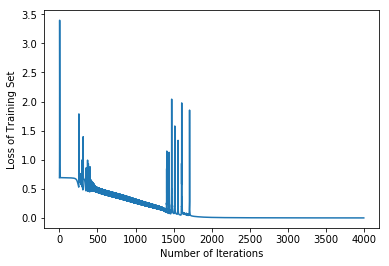

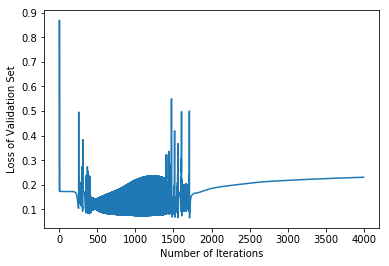

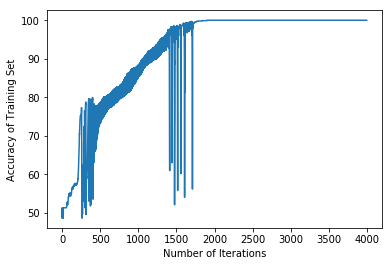

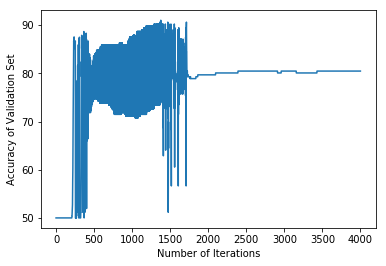

In [39]:
    print("Best")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [40]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

		training		validation		best	
loss		0.0010987192		0.2306104226		0.0794214467
accuracy	100.0000000000		80.4687500000		91.0156250000


In [41]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [42]:
learning_rate=0.5
lambd = 0.00001 #best?
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

#0 Training loss : 0.6942632601	Validation loss : 0.1848825758	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#1 Training loss : 0.7334997850	Validation loss : 0.3777460916	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2 Training loss : 1.5540124558	Validation loss : 1.0532288977	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#3 Training loss : 4.1235263317	Validation loss : 0.3105973195	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4 Training loss : 1.2979833934	Validation loss : 0.4682064991	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#5 Training loss : 1.9177958710	Validation loss : 0.2286149396	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#6 Training loss : 0.9622630721	Validation loss : 0.1872792964	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#7 Training loss : 0.7545884134	Validation loss : 0.1742000027	Traini

#61 Training loss : 0.6917397441	Validation loss : 0.1727935000	Training Accuracy: 52.4829600779%	Validation Accuracy: 50.0000000000%
#62 Training loss : 0.6917142255	Validation loss : 0.1727930040	Training Accuracy: 52.1908471276%	Validation Accuracy: 50.0000000000%
#63 Training loss : 0.6916885078	Validation loss : 0.1727924937	Training Accuracy: 51.8013631938%	Validation Accuracy: 50.0000000000%
#64 Training loss : 0.6916625852	Validation loss : 0.1727919687	Training Accuracy: 51.8013631938%	Validation Accuracy: 50.0000000000%
#65 Training loss : 0.6916364520	Validation loss : 0.1727914284	Training Accuracy: 51.8013631938%	Validation Accuracy: 50.0000000000%
#66 Training loss : 0.6916101023	Validation loss : 0.1727908723	Training Accuracy: 52.0934761441%	Validation Accuracy: 50.0000000000%
#67 Training loss : 0.6915835301	Validation loss : 0.1727902999	Training Accuracy: 52.1908471276%	Validation Accuracy: 50.0000000000%
#68 Training loss : 0.6915567292	Validation loss : 0.172789710

#121 Training loss : 0.6895792311	Validation loss : 0.1727070206	Training Accuracy: 56.5725413827%	Validation Accuracy: 50.0000000000%
#122 Training loss : 0.6895248360	Validation loss : 0.1727034919	Training Accuracy: 56.6699123661%	Validation Accuracy: 50.0000000000%
#123 Training loss : 0.6894694270	Validation loss : 0.1726998200	Training Accuracy: 56.7672833496%	Validation Accuracy: 50.0000000000%
#124 Training loss : 0.6894129710	Validation loss : 0.1726959978	Training Accuracy: 56.7672833496%	Validation Accuracy: 50.0000000000%
#125 Training loss : 0.6893554335	Validation loss : 0.1726920178	Training Accuracy: 56.9620253165%	Validation Accuracy: 50.0000000000%
#126 Training loss : 0.6892967783	Validation loss : 0.1726878719	Training Accuracy: 57.0593962999%	Validation Accuracy: 50.0000000000%
#127 Training loss : 0.6892369676	Validation loss : 0.1726835518	Training Accuracy: 57.1567672833%	Validation Accuracy: 50.0000000000%
#128 Training loss : 0.6891759620	Validation loss : 0.1

#181 Training loss : 0.6816011059	Validation loss : 0.1713518093	Training Accuracy: 57.0593962999%	Validation Accuracy: 50.0000000000%
#182 Training loss : 0.6812523195	Validation loss : 0.1712591546	Training Accuracy: 57.0593962999%	Validation Accuracy: 50.0000000000%
#183 Training loss : 0.6808847488	Validation loss : 0.1711591794	Training Accuracy: 57.1567672833%	Validation Accuracy: 50.0000000000%
#184 Training loss : 0.6804969605	Validation loss : 0.1710512026	Training Accuracy: 57.1567672833%	Validation Accuracy: 50.0000000000%
#185 Training loss : 0.6800873912	Validation loss : 0.1709344713	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#186 Training loss : 0.6796543353	Validation loss : 0.1708081533	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#187 Training loss : 0.6791959307	Validation loss : 0.1706713275	Training Accuracy: 57.9357351509%	Validation Accuracy: 50.0000000000%
#188 Training loss : 0.6787101444	Validation loss : 0.1

#241 Training loss : 1.7039676160	Validation loss : 0.7693653733	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#242 Training loss : 2.9915647594	Validation loss : 0.2651432770	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#243 Training loss : 1.0250986357	Validation loss : 0.1728260009	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#244 Training loss : 0.6869843351	Validation loss : 0.1729792249	Training Accuracy: 57.7409931840%	Validation Accuracy: 50.0000000000%
#245 Training loss : 0.6867723240	Validation loss : 0.1729582214	Training Accuracy: 56.0856864654%	Validation Accuracy: 50.0000000000%
#246 Training loss : 0.6866639530	Validation loss : 0.1729610146	Training Accuracy: 55.9883154820%	Validation Accuracy: 50.0000000000%
#247 Training loss : 0.6865532141	Validation loss : 0.1729609340	Training Accuracy: 55.9883154820%	Validation Accuracy: 50.0000000000%
#248 Training loss : 0.6864384344	Validation loss : 0.1

#301 Training loss : 0.5940388427	Validation loss : 0.1359798528	Training Accuracy: 75.3651411879%	Validation Accuracy: 87.5000000000%
#302 Training loss : 0.5870931821	Validation loss : 0.1329520794	Training Accuracy: 75.4625121714%	Validation Accuracy: 87.1093750000%
#303 Training loss : 0.5799772292	Validation loss : 0.1299018839	Training Accuracy: 75.4625121714%	Validation Accuracy: 85.1562500000%
#304 Training loss : 0.5725960991	Validation loss : 0.1263914569	Training Accuracy: 76.2414800389%	Validation Accuracy: 86.7187500000%
#305 Training loss : 0.5651577999	Validation loss : 0.1247794047	Training Accuracy: 75.2677702045%	Validation Accuracy: 85.9375000000%
#306 Training loss : 0.5585798008	Validation loss : 0.1211430351	Training Accuracy: 77.5073028238%	Validation Accuracy: 86.7187500000%
#307 Training loss : 0.5585156124	Validation loss : 0.1564112073	Training Accuracy: 72.1518987342%	Validation Accuracy: 54.2968750000%
#308 Training loss : 0.6215573158	Validation loss : 0.2

#361 Training loss : 0.5906830791	Validation loss : 0.1355514975	Training Accuracy: 67.7702044791%	Validation Accuracy: 62.8906250000%
#362 Training loss : 0.5529687729	Validation loss : 0.1574580363	Training Accuracy: 70.0097370983%	Validation Accuracy: 60.5468750000%
#363 Training loss : 0.6563420988	Validation loss : 0.1223647816	Training Accuracy: 61.2463485881%	Validation Accuracy: 71.4843750000%
#364 Training loss : 0.5371096886	Validation loss : 0.1297429256	Training Accuracy: 71.9571567673%	Validation Accuracy: 74.2187500000%
#365 Training loss : 0.5887481597	Validation loss : 0.1353609166	Training Accuracy: 68.0623174294%	Validation Accuracy: 64.8437500000%
#366 Training loss : 0.5481282246	Validation loss : 0.1537489801	Training Accuracy: 70.3018500487%	Validation Accuracy: 62.5000000000%
#367 Training loss : 0.6493895291	Validation loss : 0.1229179181	Training Accuracy: 61.6358325219%	Validation Accuracy: 71.8750000000%
#368 Training loss : 0.5331538169	Validation loss : 0.1

#421 Training loss : 0.5679596226	Validation loss : 0.1330151193	Training Accuracy: 69.9123661149%	Validation Accuracy: 71.8750000000%
#422 Training loss : 0.4933090787	Validation loss : 0.1125279349	Training Accuracy: 75.1703992210%	Validation Accuracy: 80.0781250000%
#423 Training loss : 0.5663461975	Validation loss : 0.1331737828	Training Accuracy: 69.8149951315%	Validation Accuracy: 71.8750000000%
#424 Training loss : 0.4918555980	Validation loss : 0.1117507656	Training Accuracy: 75.0730282376%	Validation Accuracy: 80.0781250000%
#425 Training loss : 0.5647320445	Validation loss : 0.1333348899	Training Accuracy: 70.0097370983%	Validation Accuracy: 71.8750000000%
#426 Training loss : 0.4904179427	Validation loss : 0.1109943009	Training Accuracy: 74.9756572541%	Validation Accuracy: 80.0781250000%
#427 Training loss : 0.5631463261	Validation loss : 0.1334956236	Training Accuracy: 70.3018500487%	Validation Accuracy: 71.8750000000%
#428 Training loss : 0.4889936759	Validation loss : 0.1

#481 Training loss : 0.5274039251	Validation loss : 0.1383796744	Training Accuracy: 73.0282375852%	Validation Accuracy: 73.4375000000%
#482 Training loss : 0.4553649829	Validation loss : 0.0958913762	Training Accuracy: 78.0915287244%	Validation Accuracy: 83.9843750000%
#483 Training loss : 0.5263064584	Validation loss : 0.1385785101	Training Accuracy: 73.2229795521%	Validation Accuracy: 73.4375000000%
#484 Training loss : 0.4542798480	Validation loss : 0.0955248447	Training Accuracy: 77.8967867575%	Validation Accuracy: 83.9843750000%
#485 Training loss : 0.5252218206	Validation loss : 0.1387783613	Training Accuracy: 73.4177215190%	Validation Accuracy: 73.4375000000%
#486 Training loss : 0.4532044741	Validation loss : 0.0951671596	Training Accuracy: 77.9941577410%	Validation Accuracy: 83.9843750000%
#487 Training loss : 0.5241496571	Validation loss : 0.1389792194	Training Accuracy: 73.4177215190%	Validation Accuracy: 73.4375000000%
#488 Training loss : 0.4521386637	Validation loss : 0.0

#541 Training loss : 0.4988677138	Validation loss : 0.1447287070	Training Accuracy: 75.3651411879%	Validation Accuracy: 73.8281250000%
#542 Training loss : 0.4263389429	Validation loss : 0.0878543751	Training Accuracy: 79.3573515093%	Validation Accuracy: 84.7656250000%
#543 Training loss : 0.4980366461	Validation loss : 0.1449507854	Training Accuracy: 75.3651411879%	Validation Accuracy: 73.8281250000%
#544 Training loss : 0.4254737351	Validation loss : 0.0876658433	Training Accuracy: 79.3573515093%	Validation Accuracy: 84.7656250000%
#545 Training loss : 0.4972113700	Validation loss : 0.1451732727	Training Accuracy: 75.4625121714%	Validation Accuracy: 73.8281250000%
#546 Training loss : 0.4246137991	Validation loss : 0.0874810866	Training Accuracy: 79.3573515093%	Validation Accuracy: 84.7656250000%
#547 Training loss : 0.4963917383	Validation loss : 0.1453961440	Training Accuracy: 75.4625121714%	Validation Accuracy: 73.8281250000%
#548 Training loss : 0.4237590329	Validation loss : 0.0

#601 Training loss : 0.4759429079	Validation loss : 0.1514843775	Training Accuracy: 76.9230769231%	Validation Accuracy: 73.8281250000%
#602 Training loss : 0.4023065579	Validation loss : 0.0835349891	Training Accuracy: 80.8179162610%	Validation Accuracy: 85.9375000000%
#603 Training loss : 0.4752336909	Validation loss : 0.1517106060	Training Accuracy: 77.0204479065%	Validation Accuracy: 73.8281250000%
#604 Training loss : 0.4015614691	Validation loss : 0.0834293075	Training Accuracy: 80.8179162610%	Validation Accuracy: 85.9375000000%
#605 Training loss : 0.4745270287	Validation loss : 0.1519368125	Training Accuracy: 77.0204479065%	Validation Accuracy: 73.8281250000%
#606 Training loss : 0.4008192184	Validation loss : 0.0833255782	Training Accuracy: 80.8179162610%	Validation Accuracy: 85.9375000000%
#607 Training loss : 0.4738228377	Validation loss : 0.1521629942	Training Accuracy: 77.2151898734%	Validation Accuracy: 73.8281250000%
#608 Training loss : 0.4000797395	Validation loss : 0.0

#661 Training loss : 0.4554666315	Validation loss : 0.1582475756	Training Accuracy: 77.8967867575%	Validation Accuracy: 73.8281250000%
#662 Training loss : 0.3809275731	Validation loss : 0.0810756195	Training Accuracy: 81.4021421616%	Validation Accuracy: 86.7187500000%
#663 Training loss : 0.4548029001	Validation loss : 0.1584715154	Training Accuracy: 77.8967867575%	Validation Accuracy: 73.8281250000%
#664 Training loss : 0.3802399718	Validation loss : 0.0810149945	Training Accuracy: 81.4995131451%	Validation Accuracy: 86.7187500000%
#665 Training loss : 0.4541399640	Validation loss : 0.1586953870	Training Accuracy: 77.8967867575%	Validation Accuracy: 73.8281250000%
#666 Training loss : 0.3795533635	Validation loss : 0.0809555647	Training Accuracy: 81.5968841285%	Validation Accuracy: 86.7187500000%
#667 Training loss : 0.4534777965	Validation loss : 0.1589192115	Training Accuracy: 77.8967867575%	Validation Accuracy: 73.8281250000%
#668 Training loss : 0.3788676961	Validation loss : 0.0

#721 Training loss : 0.4357094866	Validation loss : 0.1650538378	Training Accuracy: 78.9678675755%	Validation Accuracy: 73.0468750000%
#722 Training loss : 0.3605219678	Validation loss : 0.0796783478	Training Accuracy: 82.4732229796%	Validation Accuracy: 86.7187500000%
#723 Training loss : 0.4350481053	Validation loss : 0.1652889060	Training Accuracy: 78.9678675755%	Validation Accuracy: 73.0468750000%
#724 Training loss : 0.3598418525	Validation loss : 0.0796428885	Training Accuracy: 82.4732229796%	Validation Accuracy: 86.7187500000%
#725 Training loss : 0.4343860643	Validation loss : 0.1655248798	Training Accuracy: 78.9678675755%	Validation Accuracy: 72.6562500000%
#726 Training loss : 0.3591612300	Validation loss : 0.0796079157	Training Accuracy: 82.5705939630%	Validation Accuracy: 86.7187500000%
#727 Training loss : 0.4337233348	Validation loss : 0.1657617987	Training Accuracy: 78.9678675755%	Validation Accuracy: 72.6562500000%
#728 Training loss : 0.3584800582	Validation loss : 0.0

#781 Training loss : 0.4154613640	Validation loss : 0.1726502953	Training Accuracy: 79.9415774099%	Validation Accuracy: 72.2656250000%
#782 Training loss : 0.3397424892	Validation loss : 0.0787518855	Training Accuracy: 82.9600778968%	Validation Accuracy: 86.7187500000%
#783 Training loss : 0.4147719562	Validation loss : 0.1729298788	Training Accuracy: 79.9415774099%	Validation Accuracy: 72.2656250000%
#784 Training loss : 0.3390321061	Validation loss : 0.0787243040	Training Accuracy: 82.9600778968%	Validation Accuracy: 86.7187500000%
#785 Training loss : 0.4140818336	Validation loss : 0.1732118200	Training Accuracy: 80.0389483934%	Validation Accuracy: 72.2656250000%
#786 Training loss : 0.3383204914	Validation loss : 0.0786968220	Training Accuracy: 83.0574488802%	Validation Accuracy: 86.7187500000%
#787 Training loss : 0.4133909253	Validation loss : 0.1734961748	Training Accuracy: 80.0389483934%	Validation Accuracy: 72.2656250000%
#788 Training loss : 0.3376076477	Validation loss : 0.0

#841 Training loss : 0.3940614009	Validation loss : 0.1821440614	Training Accuracy: 81.1100292113%	Validation Accuracy: 72.2656250000%
#842 Training loss : 0.3178771933	Validation loss : 0.0778325681	Training Accuracy: 85.2969814995%	Validation Accuracy: 85.9375000000%
#843 Training loss : 0.3933201463	Validation loss : 0.1824963473	Training Accuracy: 81.1100292113%	Validation Accuracy: 72.2656250000%
#844 Training loss : 0.3171270652	Validation loss : 0.0777998556	Training Accuracy: 85.2969814995%	Validation Accuracy: 85.9375000000%
#845 Training loss : 0.3925809491	Validation loss : 0.1828513791	Training Accuracy: 81.2074001947%	Validation Accuracy: 72.2656250000%
#846 Training loss : 0.3163762346	Validation loss : 0.0777678657	Training Accuracy: 85.2969814995%	Validation Accuracy: 85.9375000000%
#847 Training loss : 0.3918439654	Validation loss : 0.1832092308	Training Accuracy: 81.2074001947%	Validation Accuracy: 72.2656250000%
#848 Training loss : 0.3156248225	Validation loss : 0.0

#901 Training loss : 0.3714295890	Validation loss : 0.1936735793	Training Accuracy: 81.9863680623%	Validation Accuracy: 71.0937500000%
#902 Training loss : 0.2950836286	Validation loss : 0.0768238312	Training Accuracy: 86.8549172347%	Validation Accuracy: 85.9375000000%
#903 Training loss : 0.3706364513	Validation loss : 0.1940810959	Training Accuracy: 81.9863680623%	Validation Accuracy: 71.0937500000%
#904 Training loss : 0.2943140479	Validation loss : 0.0767854010	Training Accuracy: 86.8549172347%	Validation Accuracy: 85.9375000000%
#905 Training loss : 0.3698405233	Validation loss : 0.1944891464	Training Accuracy: 82.0837390458%	Validation Accuracy: 71.0937500000%
#906 Training loss : 0.2935439646	Validation loss : 0.0767467408	Training Accuracy: 86.8549172347%	Validation Accuracy: 85.9375000000%
#907 Training loss : 0.3690418154	Validation loss : 0.1948976142	Training Accuracy: 82.2784810127%	Validation Accuracy: 71.0937500000%
#908 Training loss : 0.2927733910	Validation loss : 0.0

#961 Training loss : 0.3466352984	Validation loss : 0.2057140888	Training Accuracy: 83.6416747809%	Validation Accuracy: 71.0937500000%
#962 Training loss : 0.2718759215	Validation loss : 0.0756576077	Training Accuracy: 87.6338851022%	Validation Accuracy: 87.1093750000%
#963 Training loss : 0.3457812490	Validation loss : 0.2060947000	Training Accuracy: 83.7390457644%	Validation Accuracy: 71.0937500000%
#964 Training loss : 0.2711025171	Validation loss : 0.0756205030	Training Accuracy: 87.6338851022%	Validation Accuracy: 87.1093750000%
#965 Training loss : 0.3449258973	Validation loss : 0.2064730920	Training Accuracy: 83.9337877313%	Validation Accuracy: 71.0937500000%
#966 Training loss : 0.2703294392	Validation loss : 0.0755836335	Training Accuracy: 87.7312560857%	Validation Accuracy: 87.1093750000%
#967 Training loss : 0.3440693218	Validation loss : 0.2068491980	Training Accuracy: 83.9337877313%	Validation Accuracy: 71.0937500000%
#968 Training loss : 0.2695567245	Validation loss : 0.0

#1021 Training loss : 0.3208301911	Validation loss : 0.2159786180	Training Accuracy: 85.3943524830%	Validation Accuracy: 70.7031250000%
#1022 Training loss : 0.2489806352	Validation loss : 0.0747043612	Training Accuracy: 89.0944498539%	Validation Accuracy: 88.2812500000%
#1023 Training loss : 0.3199779536	Validation loss : 0.2162761546	Training Accuracy: 85.4917234664%	Validation Accuracy: 70.7031250000%
#1024 Training loss : 0.2482345135	Validation loss : 0.0746799633	Training Accuracy: 89.0944498539%	Validation Accuracy: 88.2812500000%
#1025 Training loss : 0.3191270663	Validation loss : 0.2165708307	Training Accuracy: 85.5890944499%	Validation Accuracy: 70.7031250000%
#1026 Training loss : 0.2474898387	Validation loss : 0.0746561085	Training Accuracy: 89.0944498539%	Validation Accuracy: 88.2812500000%
#1027 Training loss : 0.3182775837	Validation loss : 0.2168626675	Training Accuracy: 85.7838364167%	Validation Accuracy: 70.7031250000%
#1028 Training loss : 0.2467466308	Validation lo

#1081 Training loss : 0.2959870714	Validation loss : 0.2237627334	Training Accuracy: 87.4391431353%	Validation Accuracy: 70.7031250000%
#1082 Training loss : 0.2272593446	Validation loss : 0.0742018247	Training Accuracy: 90.3602726388%	Validation Accuracy: 87.8906250000%
#1083 Training loss : 0.2951867661	Validation loss : 0.2239855150	Training Accuracy: 87.4391431353%	Validation Accuracy: 70.7031250000%
#1084 Training loss : 0.2265583970	Validation loss : 0.0741926196	Training Accuracy: 90.3602726388%	Validation Accuracy: 87.8906250000%
#1085 Training loss : 0.2943881730	Validation loss : 0.2242061838	Training Accuracy: 87.5365141188%	Validation Accuracy: 70.7031250000%
#1086 Training loss : 0.2258587906	Validation loss : 0.0741838411	Training Accuracy: 90.4576436222%	Validation Accuracy: 87.8906250000%
#1087 Training loss : 0.2935912640	Validation loss : 0.2244247597	Training Accuracy: 87.6338851022%	Validation Accuracy: 70.7031250000%
#1088 Training loss : 0.2251605010	Validation lo

#1141 Training loss : 0.2725300046	Validation loss : 0.2295860357	Training Accuracy: 88.6075949367%	Validation Accuracy: 71.0937500000%
#1142 Training loss : 0.2066758764	Validation loss : 0.0740859206	Training Accuracy: 91.6260954236%	Validation Accuracy: 88.2812500000%
#1143 Training loss : 0.2717568269	Validation loss : 0.2297505494	Training Accuracy: 88.6075949367%	Validation Accuracy: 71.0937500000%
#1144 Training loss : 0.2059983947	Validation loss : 0.0740868670	Training Accuracy: 91.6260954236%	Validation Accuracy: 88.2812500000%
#1145 Training loss : 0.2709831730	Validation loss : 0.2299131050	Training Accuracy: 88.6075949367%	Validation Accuracy: 71.0937500000%
#1146 Training loss : 0.2053208102	Validation loss : 0.0740880695	Training Accuracy: 91.6260954236%	Validation Accuracy: 88.2812500000%
#1147 Training loss : 0.2702089167	Validation loss : 0.2300736817	Training Accuracy: 88.6075949367%	Validation Accuracy: 71.0937500000%
#1148 Training loss : 0.2046430437	Validation lo

#1201 Training loss : 0.2485592791	Validation loss : 0.2335257124	Training Accuracy: 89.4839337877%	Validation Accuracy: 71.8750000000%
#1202 Training loss : 0.1859483138	Validation loss : 0.0742242338	Training Accuracy: 93.0866601753%	Validation Accuracy: 89.8437500000%
#1203 Training loss : 0.2477115862	Validation loss : 0.2336148900	Training Accuracy: 89.5813047712%	Validation Accuracy: 71.8750000000%
#1204 Training loss : 0.1852294970	Validation loss : 0.0742336595	Training Accuracy: 93.1840311587%	Validation Accuracy: 89.8437500000%
#1205 Training loss : 0.2468597589	Validation loss : 0.2337009895	Training Accuracy: 89.5813047712%	Validation Accuracy: 71.8750000000%
#1206 Training loss : 0.1845081828	Validation loss : 0.0742435673	Training Accuracy: 93.1840311587%	Validation Accuracy: 89.8437500000%
#1207 Training loss : 0.2460038169	Validation loss : 0.2337840170	Training Accuracy: 89.6786757546%	Validation Accuracy: 71.8750000000%
#1208 Training loss : 0.1837843655	Validation lo

#1261 Training loss : 0.2220923857	Validation loss : 0.2351474343	Training Accuracy: 91.2366114898%	Validation Accuracy: 72.6562500000%
#1262 Training loss : 0.1636500265	Validation loss : 0.0748643757	Training Accuracy: 94.8393378773%	Validation Accuracy: 89.8437500000%
#1263 Training loss : 0.2212139075	Validation loss : 0.2351794469	Training Accuracy: 91.2366114898%	Validation Accuracy: 72.6562500000%
#1264 Training loss : 0.1629020316	Validation loss : 0.0749025984	Training Accuracy: 94.8393378773%	Validation Accuracy: 89.8437500000%
#1265 Training loss : 0.2203370667	Validation loss : 0.2352106314	Training Accuracy: 91.2366114898%	Validation Accuracy: 72.6562500000%
#1266 Training loss : 0.1621547270	Validation loss : 0.0749419364	Training Accuracy: 94.8393378773%	Validation Accuracy: 89.8437500000%
#1267 Training loss : 0.2194616333	Validation loss : 0.2352409168	Training Accuracy: 91.3339824732%	Validation Accuracy: 72.6562500000%
#1268 Training loss : 0.1614080472	Validation lo

#1321 Training loss : 0.1936261028	Validation loss : 0.2346500176	Training Accuracy: 92.0155793574%	Validation Accuracy: 73.4375000000%
#1322 Training loss : 0.1402734412	Validation loss : 0.0764172850	Training Accuracy: 95.9104186952%	Validation Accuracy: 90.2343750000%
#1323 Training loss : 0.1923271376	Validation loss : 0.2344592382	Training Accuracy: 92.1129503408%	Validation Accuracy: 73.4375000000%
#1324 Training loss : 0.1393265159	Validation loss : 0.0764853942	Training Accuracy: 95.9104186952%	Validation Accuracy: 90.2343750000%
#1325 Training loss : 0.1909440001	Validation loss : 0.2342269320	Training Accuracy: 92.1129503408%	Validation Accuracy: 73.4375000000%
#1326 Training loss : 0.1383371446	Validation loss : 0.0765562503	Training Accuracy: 96.0077896787%	Validation Accuracy: 90.2343750000%
#1327 Training loss : 0.1894533764	Validation loss : 0.2339408516	Training Accuracy: 92.2103213242%	Validation Accuracy: 73.4375000000%
#1328 Training loss : 0.1372930547	Validation lo

#1381 Training loss : 0.0931614187	Validation loss : 0.1704913183	Training Accuracy: 97.6630963973%	Validation Accuracy: 76.1718750000%
#1382 Training loss : 0.0920766137	Validation loss : 0.1390813574	Training Accuracy: 97.7604673807%	Validation Accuracy: 79.6875000000%
#1383 Training loss : 0.0919990723	Validation loss : 0.1769422761	Training Accuracy: 97.6630963973%	Validation Accuracy: 76.1718750000%
#1384 Training loss : 0.0915012914	Validation loss : 0.1272531434	Training Accuracy: 97.8578383642%	Validation Accuracy: 80.4687500000%
#1385 Training loss : 0.0942022242	Validation loss : 0.1870172877	Training Accuracy: 97.5657254138%	Validation Accuracy: 75.7812500000%
#1386 Training loss : 0.0940098916	Validation loss : 0.1067310986	Training Accuracy: 97.8578383642%	Validation Accuracy: 80.8593750000%
#1387 Training loss : 0.1049843642	Validation loss : 0.1980233827	Training Accuracy: 96.6893865628%	Validation Accuracy: 75.3906250000%
#1388 Training loss : 0.0996896230	Validation lo

#1441 Training loss : 0.0940591075	Validation loss : 0.1381913827	Training Accuracy: 97.8578383642%	Validation Accuracy: 80.0781250000%
#1442 Training loss : 0.0915920107	Validation loss : 0.1152796267	Training Accuracy: 98.3446932814%	Validation Accuracy: 81.2500000000%
#1443 Training loss : 0.0899043525	Validation loss : 0.1435675617	Training Accuracy: 97.9552093476%	Validation Accuracy: 79.2968750000%
#1444 Training loss : 0.0880786757	Validation loss : 0.1148301631	Training Accuracy: 98.2473222980%	Validation Accuracy: 80.8593750000%
#1445 Training loss : 0.0873235454	Validation loss : 0.1491195294	Training Accuracy: 97.9552093476%	Validation Accuracy: 78.1250000000%
#1446 Training loss : 0.0860330624	Validation loss : 0.1098822158	Training Accuracy: 98.6368062317%	Validation Accuracy: 80.8593750000%
#1447 Training loss : 0.0868972864	Validation loss : 0.1564664926	Training Accuracy: 97.6630963973%	Validation Accuracy: 75.7812500000%
#1448 Training loss : 0.0859820694	Validation lo

#1501 Training loss : 0.1057733769	Validation loss : 0.2179458453	Training Accuracy: 95.7156767283%	Validation Accuracy: 75.3906250000%
#1502 Training loss : 0.0768777328	Validation loss : 0.0878840661	Training Accuracy: 98.7341772152%	Validation Accuracy: 88.2812500000%
#1503 Training loss : 0.1056306738	Validation loss : 0.2183849483	Training Accuracy: 95.7156767283%	Validation Accuracy: 75.3906250000%
#1504 Training loss : 0.0765427396	Validation loss : 0.0878985889	Training Accuracy: 98.7341772152%	Validation Accuracy: 88.2812500000%
#1505 Training loss : 0.1053614394	Validation loss : 0.2187281810	Training Accuracy: 95.7156767283%	Validation Accuracy: 75.3906250000%
#1506 Training loss : 0.0761740821	Validation loss : 0.0879361171	Training Accuracy: 98.7341772152%	Validation Accuracy: 88.2812500000%
#1507 Training loss : 0.1049935026	Validation loss : 0.2190101997	Training Accuracy: 95.7156767283%	Validation Accuracy: 75.3906250000%
#1508 Training loss : 0.0757829419	Validation lo

#1561 Training loss : 0.0923999767	Validation loss : 0.2242162255	Training Accuracy: 96.3972736125%	Validation Accuracy: 75.3906250000%
#1562 Training loss : 0.0658494684	Validation loss : 0.0898255167	Training Accuracy: 99.1236611490%	Validation Accuracy: 88.6718750000%
#1563 Training loss : 0.0915611034	Validation loss : 0.2241525948	Training Accuracy: 96.4946445959%	Validation Accuracy: 75.3906250000%
#1564 Training loss : 0.0653303956	Validation loss : 0.0900182265	Training Accuracy: 99.1236611490%	Validation Accuracy: 88.6718750000%
#1565 Training loss : 0.0905071610	Validation loss : 0.2239754127	Training Accuracy: 96.4946445959%	Validation Accuracy: 75.3906250000%
#1566 Training loss : 0.0647242059	Validation loss : 0.0902697962	Training Accuracy: 99.1236611490%	Validation Accuracy: 88.6718750000%
#1567 Training loss : 0.0892228246	Validation loss : 0.2236824931	Training Accuracy: 96.6893865628%	Validation Accuracy: 75.3906250000%
#1568 Training loss : 0.0640287306	Validation lo

#1621 Training loss : 0.5091450109	Validation loss : 0.1751884169	Training Accuracy: 70.5939629990%	Validation Accuracy: 58.5937500000%
#1622 Training loss : 0.5384013480	Validation loss : 0.1975872356	Training Accuracy: 64.3622200584%	Validation Accuracy: 54.6875000000%
#1623 Training loss : 0.7688474711	Validation loss : 0.1744655833	Training Accuracy: 55.1119766310%	Validation Accuracy: 54.6875000000%
#1624 Training loss : 0.5755789973	Validation loss : 0.1857471347	Training Accuracy: 59.3962999026%	Validation Accuracy: 55.8593750000%
#1625 Training loss : 0.7095695067	Validation loss : 0.1577775978	Training Accuracy: 55.7935735151%	Validation Accuracy: 59.3750000000%
#1626 Training loss : 0.5045845983	Validation loss : 0.1508510075	Training Accuracy: 66.0175267770%	Validation Accuracy: 66.7968750000%
#1627 Training loss : 0.5884464961	Validation loss : 0.1663587659	Training Accuracy: 64.4595910419%	Validation Accuracy: 60.1562500000%
#1628 Training loss : 0.5138028231	Validation lo

#1681 Training loss : 0.4471897042	Validation loss : 0.1496852106	Training Accuracy: 76.4362220058%	Validation Accuracy: 68.3593750000%
#1682 Training loss : 0.3395752821	Validation loss : 0.1167295681	Training Accuracy: 81.1100292113%	Validation Accuracy: 79.2968750000%
#1683 Training loss : 0.4430040157	Validation loss : 0.1504152377	Training Accuracy: 76.8257059396%	Validation Accuracy: 68.7500000000%
#1684 Training loss : 0.3376555543	Validation loss : 0.1168298368	Training Accuracy: 81.3047711782%	Validation Accuracy: 79.2968750000%
#1685 Training loss : 0.4418310831	Validation loss : 0.1507465735	Training Accuracy: 76.7283349562%	Validation Accuracy: 69.1406250000%
#1686 Training loss : 0.3331070486	Validation loss : 0.1150582905	Training Accuracy: 81.4995131451%	Validation Accuracy: 79.2968750000%
#1687 Training loss : 0.4368769538	Validation loss : 0.1509668971	Training Accuracy: 76.9230769231%	Validation Accuracy: 69.9218750000%
#1688 Training loss : 0.3306675054	Validation lo

#1741 Training loss : 0.3001203906	Validation loss : 0.1572814228	Training Accuracy: 86.4654333009%	Validation Accuracy: 74.2187500000%
#1742 Training loss : 0.2247315320	Validation loss : 0.0856429738	Training Accuracy: 90.5550146056%	Validation Accuracy: 87.8906250000%
#1743 Training loss : 0.2964976167	Validation loss : 0.1585109801	Training Accuracy: 86.7575462512%	Validation Accuracy: 74.2187500000%
#1744 Training loss : 0.2232043412	Validation loss : 0.0863843498	Training Accuracy: 90.5550146056%	Validation Accuracy: 87.8906250000%
#1745 Training loss : 0.2979951041	Validation loss : 0.1607287428	Training Accuracy: 86.4654333009%	Validation Accuracy: 73.8281250000%
#1746 Training loss : 0.2231099060	Validation loss : 0.0876369754	Training Accuracy: 90.6523855891%	Validation Accuracy: 87.5000000000%
#1747 Training loss : 0.3030851821	Validation loss : 0.1632773373	Training Accuracy: 86.2706913340%	Validation Accuracy: 73.0468750000%
#1748 Training loss : 0.2254521002	Validation lo

#1801 Training loss : 0.0856744186	Validation loss : 0.1022464954	Training Accuracy: 98.1499513145%	Validation Accuracy: 81.6406250000%
#1802 Training loss : 0.0847470982	Validation loss : 0.0867650291	Training Accuracy: 98.4420642648%	Validation Accuracy: 83.5937500000%
#1803 Training loss : 0.0840591496	Validation loss : 0.1043763141	Training Accuracy: 98.1499513145%	Validation Accuracy: 81.2500000000%
#1804 Training loss : 0.0832454461	Validation loss : 0.0866420411	Training Accuracy: 98.4420642648%	Validation Accuracy: 84.3750000000%
#1805 Training loss : 0.0827409467	Validation loss : 0.1070497612	Training Accuracy: 98.1499513145%	Validation Accuracy: 81.2500000000%
#1806 Training loss : 0.0820345555	Validation loss : 0.0858576565	Training Accuracy: 98.5394352483%	Validation Accuracy: 84.3750000000%
#1807 Training loss : 0.0817994937	Validation loss : 0.1104812016	Training Accuracy: 98.1499513145%	Validation Accuracy: 81.2500000000%
#1808 Training loss : 0.0812125340	Validation lo

#1861 Training loss : 0.4249324441	Validation loss : 0.1483765192	Training Accuracy: 78.6757546251%	Validation Accuracy: 67.9687500000%
#1862 Training loss : 0.3362808199	Validation loss : 0.1234575321	Training Accuracy: 82.1811100292%	Validation Accuracy: 78.9062500000%
#1863 Training loss : 0.4210775532	Validation loss : 0.1487227685	Training Accuracy: 78.7731256086%	Validation Accuracy: 67.5781250000%
#1864 Training loss : 0.3274884248	Validation loss : 0.1188637562	Training Accuracy: 83.2521908471%	Validation Accuracy: 79.6875000000%
#1865 Training loss : 0.4091248677	Validation loss : 0.1465962269	Training Accuracy: 80.0389483934%	Validation Accuracy: 68.3593750000%
#1866 Training loss : 0.3216425514	Validation loss : 0.1179331292	Training Accuracy: 83.3495618306%	Validation Accuracy: 80.8593750000%
#1867 Training loss : 0.4007512573	Validation loss : 0.1486405463	Training Accuracy: 80.3310613437%	Validation Accuracy: 68.3593750000%
#1868 Training loss : 0.3142523196	Validation lo

#1921 Training loss : 0.3840870175	Validation loss : 0.1637209472	Training Accuracy: 81.6942551120%	Validation Accuracy: 70.7031250000%
#1922 Training loss : 0.2592349154	Validation loss : 0.1110049652	Training Accuracy: 87.3417721519%	Validation Accuracy: 83.9843750000%
#1923 Training loss : 0.3621593801	Validation loss : 0.1572782028	Training Accuracy: 83.6416747809%	Validation Accuracy: 72.2656250000%
#1924 Training loss : 0.2417277075	Validation loss : 0.0988530006	Training Accuracy: 88.7049659202%	Validation Accuracy: 85.9375000000%
#1925 Training loss : 0.3132601825	Validation loss : 0.1450661365	Training Accuracy: 86.5628042843%	Validation Accuracy: 73.8281250000%
#1926 Training loss : 0.2139052880	Validation loss : 0.0840649987	Training Accuracy: 91.1392405063%	Validation Accuracy: 88.2812500000%
#1927 Training loss : 0.2499288922	Validation loss : 0.1276459656	Training Accuracy: 89.1918208374%	Validation Accuracy: 75.3906250000%
#1928 Training loss : 0.1776547727	Validation lo

#1981 Training loss : 0.0927417636	Validation loss : 0.1241808469	Training Accuracy: 97.1762414800%	Validation Accuracy: 80.0781250000%
#1982 Training loss : 0.0926196805	Validation loss : 0.0671696201	Training Accuracy: 98.0525803311%	Validation Accuracy: 91.4062500000%
#1983 Training loss : 0.1105247133	Validation loss : 0.1417678319	Training Accuracy: 95.7156767283%	Validation Accuracy: 76.9531250000%
#1984 Training loss : 0.1091759302	Validation loss : 0.0712812096	Training Accuracy: 96.7867575463%	Validation Accuracy: 89.8437500000%
#1985 Training loss : 0.1558366568	Validation loss : 0.1763215755	Training Accuracy: 93.5735150925%	Validation Accuracy: 74.2187500000%
#1986 Training loss : 0.1542603497	Validation loss : 0.1066138827	Training Accuracy: 93.1840311587%	Validation Accuracy: 86.3281250000%
#1987 Training loss : 0.3318151803	Validation loss : 0.2906548325	Training Accuracy: 85.9785783836%	Validation Accuracy: 64.0625000000%
#1988 Training loss : 0.4178663327	Validation lo

#2041 Training loss : 0.1887580760	Validation loss : 0.0961947033	Training Accuracy: 94.0603700097%	Validation Accuracy: 80.4687500000%
#2042 Training loss : 0.1681994453	Validation loss : 0.0695012918	Training Accuracy: 95.5209347614%	Validation Accuracy: 89.8437500000%
#2043 Training loss : 0.1666689227	Validation loss : 0.1105818475	Training Accuracy: 94.1577409932%	Validation Accuracy: 80.4687500000%
#2044 Training loss : 0.1580681159	Validation loss : 0.0681658472	Training Accuracy: 95.1314508277%	Validation Accuracy: 89.8437500000%
#2045 Training loss : 0.1656586195	Validation loss : 0.1265662443	Training Accuracy: 93.5735150925%	Validation Accuracy: 75.3906250000%
#2046 Training loss : 0.1602452360	Validation loss : 0.0702259446	Training Accuracy: 94.9367088608%	Validation Accuracy: 89.8437500000%
#2047 Training loss : 0.1770656303	Validation loss : 0.1346143220	Training Accuracy: 92.9892891918%	Validation Accuracy: 75.3906250000%
#2048 Training loss : 0.1668968964	Validation lo

#2101 Training loss : 0.0520950698	Validation loss : 0.0980468800	Training Accuracy: 99.1236611490%	Validation Accuracy: 83.5937500000%
#2102 Training loss : 0.0517047045	Validation loss : 0.0916596194	Training Accuracy: 99.3184031159%	Validation Accuracy: 85.5468750000%
#2103 Training loss : 0.0513288561	Validation loss : 0.0986117966	Training Accuracy: 99.1236611490%	Validation Accuracy: 83.5937500000%
#2104 Training loss : 0.0509489324	Validation loss : 0.0918437944	Training Accuracy: 99.3184031159%	Validation Accuracy: 85.5468750000%
#2105 Training loss : 0.0505847713	Validation loss : 0.0991933226	Training Accuracy: 99.1236611490%	Validation Accuracy: 83.5937500000%
#2106 Training loss : 0.0502150289	Validation loss : 0.0919923918	Training Accuracy: 99.4157740993%	Validation Accuracy: 85.5468750000%
#2107 Training loss : 0.0498626816	Validation loss : 0.0997926730	Training Accuracy: 99.1236611490%	Validation Accuracy: 82.8125000000%
#2108 Training loss : 0.0495029084	Validation lo

#2161 Training loss : 0.0371707983	Validation loss : 0.1170987153	Training Accuracy: 99.3184031159%	Validation Accuracy: 81.2500000000%
#2162 Training loss : 0.0367828308	Validation loss : 0.0906421926	Training Accuracy: 99.8052580331%	Validation Accuracy: 86.7187500000%
#2163 Training loss : 0.0367008244	Validation loss : 0.1170997934	Training Accuracy: 99.3184031159%	Validation Accuracy: 81.2500000000%
#2164 Training loss : 0.0363139626	Validation loss : 0.0910306776	Training Accuracy: 99.8052580331%	Validation Accuracy: 86.7187500000%
#2165 Training loss : 0.0362136667	Validation loss : 0.1170149932	Training Accuracy: 99.3184031159%	Validation Accuracy: 81.2500000000%
#2166 Training loss : 0.0358312817	Validation loss : 0.0914824199	Training Accuracy: 99.8052580331%	Validation Accuracy: 86.7187500000%
#2167 Training loss : 0.0357122605	Validation loss : 0.1168499104	Training Accuracy: 99.4157740993%	Validation Accuracy: 81.2500000000%
#2168 Training loss : 0.0353375670	Validation lo

#2221 Training loss : 0.0253633819	Validation loss : 0.1095369598	Training Accuracy: 99.8052580331%	Validation Accuracy: 84.7656250000%
#2222 Training loss : 0.0252381810	Validation loss : 0.1084067266	Training Accuracy: 99.8052580331%	Validation Accuracy: 85.1562500000%
#2223 Training loss : 0.0251140236	Validation loss : 0.1095997533	Training Accuracy: 99.8052580331%	Validation Accuracy: 84.7656250000%
#2224 Training loss : 0.0249908710	Validation loss : 0.1087041124	Training Accuracy: 99.8052580331%	Validation Accuracy: 85.1562500000%
#2225 Training loss : 0.0248686970	Validation loss : 0.1096813053	Training Accuracy: 99.8052580331%	Validation Accuracy: 84.7656250000%
#2226 Training loss : 0.0247474754	Validation loss : 0.1089824092	Training Accuracy: 99.8052580331%	Validation Accuracy: 85.1562500000%
#2227 Training loss : 0.0246271814	Validation loss : 0.1097794050	Training Accuracy: 99.8052580331%	Validation Accuracy: 84.7656250000%
#2228 Training loss : 0.0245077965	Validation lo

#2281 Training loss : 0.0192232050	Validation loss : 0.1142581438	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.1562500000%
#2282 Training loss : 0.0191398820	Validation loss : 0.1143459259	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.1562500000%
#2283 Training loss : 0.0190570642	Validation loss : 0.1144337263	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.1562500000%
#2284 Training loss : 0.0189747468	Validation loss : 0.1145214757	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.1562500000%
#2285 Training loss : 0.0188929252	Validation loss : 0.1146092263	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.1562500000%
#2286 Training loss : 0.0188115950	Validation loss : 0.1146969375	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.1562500000%
#2287 Training loss : 0.0187307515	Validation loss : 0.1147846386	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.1562500000%
#2288 Training loss : 0.0186503905	Validation lo

#2341 Training loss : 0.0149870802	Validation loss : 0.1194052366	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.9375000000%
#2342 Training loss : 0.0149277736	Validation loss : 0.1194865548	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.9375000000%
#2343 Training loss : 0.0148687885	Validation loss : 0.1195676394	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.9375000000%
#2344 Training loss : 0.0148101231	Validation loss : 0.1196484872	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.9375000000%
#2345 Training loss : 0.0147517754	Validation loss : 0.1197290950	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.9375000000%
#2346 Training loss : 0.0146937438	Validation loss : 0.1198094594	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.9375000000%
#2347 Training loss : 0.0146360265	Validation loss : 0.1198895776	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.9375000000%
#2348 Training loss : 0.0145786218	Validation lo

#2401 Training loss : 0.0119437830	Validation loss : 0.1238007024	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.9375000000%
#2402 Training loss : 0.0119010718	Validation loss : 0.1238650826	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.9375000000%
#2403 Training loss : 0.0118585957	Validation loss : 0.1239291742	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.9375000000%
#2404 Training loss : 0.0118163533	Validation loss : 0.1239929782	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.9375000000%
#2405 Training loss : 0.0117743434	Validation loss : 0.1240564954	Training Accuracy: 99.9026290166%	Validation Accuracy: 85.9375000000%
#2406 Training loss : 0.0117325647	Validation loss : 0.1241197271	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#2407 Training loss : 0.0116910160	Validation loss : 0.1241826742	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#2408 Training loss : 0.0116496958	Validation lo

#2461 Training loss : 0.0097540746	Validation loss : 0.1271990859	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#2462 Training loss : 0.0097232666	Validation loss : 0.1272486923	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#2463 Training loss : 0.0096926214	Validation loss : 0.1272981026	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#2464 Training loss : 0.0096621379	Validation loss : 0.1273473184	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#2465 Training loss : 0.0096318150	Validation loss : 0.1273963414	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#2466 Training loss : 0.0096016516	Validation loss : 0.1274451731	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#2467 Training loss : 0.0095716468	Validation loss : 0.1274938152	Training Accuracy: 99.9026290166%	Validation Accuracy: 86.3281250000%
#2468 Training loss : 0.0095417994	Validation lo

#2521 Training loss : 0.0081600346	Validation loss : 0.1298786529	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#2522 Training loss : 0.0081373066	Validation loss : 0.1299189884	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#2523 Training loss : 0.0081146878	Validation loss : 0.1299592052	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#2524 Training loss : 0.0080921776	Validation loss : 0.1299993043	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#2525 Training loss : 0.0080697753	Validation loss : 0.1300392866	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#2526 Training loss : 0.0080474801	Validation loss : 0.1300791531	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#2527 Training loss : 0.0080252913	Validation loss : 0.1301189046	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#2528 Training loss : 0.0080032083	Valida

#2580 Training loss : 0.0069850743	Validation loss : 0.1320819180	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#2581 Training loss : 0.0069677289	Validation loss : 0.1321165788	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#2582 Training loss : 0.0069504586	Validation loss : 0.1321511622	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#2583 Training loss : 0.0069332629	Validation loss : 0.1321856688	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#2584 Training loss : 0.0069161416	Validation loss : 0.1322200991	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#2585 Training loss : 0.0068990940	Validation loss : 0.1322544534	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#2586 Training loss : 0.0068821197	Validation loss : 0.1322887324	Training Accuracy: 100.0000000000%	Validation Accuracy: 85.9375000000%
#2587 Training loss : 0.0068652184	Valida

#2639 Training loss : 0.0060768812	Validation loss : 0.1340087827	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#2640 Training loss : 0.0060632890	Validation loss : 0.1340395946	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#2641 Training loss : 0.0060497502	Validation loss : 0.1340703517	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#2642 Training loss : 0.0060362644	Validation loss : 0.1341010542	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#2643 Training loss : 0.0060228313	Validation loss : 0.1341317024	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#2644 Training loss : 0.0060094505	Validation loss : 0.1341622965	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#2645 Training loss : 0.0059961219	Validation loss : 0.1341928369	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#2646 Training loss : 0.0059828451	Valida

#2698 Training loss : 0.0053573829	Validation loss : 0.1357410051	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#2699 Training loss : 0.0053464898	Validation loss : 0.1357689945	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#2700 Training loss : 0.0053356356	Validation loss : 0.1357969422	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#2701 Training loss : 0.0053248201	Validation loss : 0.1358248484	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#2702 Training loss : 0.0053140432	Validation loss : 0.1358527134	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#2703 Training loss : 0.0053033046	Validation loss : 0.1358805372	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#2704 Training loss : 0.0052926041	Validation loss : 0.1359083201	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#2705 Training loss : 0.0052819416	Valida

#2757 Training loss : 0.0047754081	Validation loss : 0.1373262485	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#2758 Training loss : 0.0047665113	Validation loss : 0.1373520419	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#2759 Training loss : 0.0047576437	Validation loss : 0.1373778019	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#2760 Training loss : 0.0047488052	Validation loss : 0.1374035289	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#2761 Training loss : 0.0047399956	Validation loss : 0.1374292229	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#2762 Training loss : 0.0047312147	Validation loss : 0.1374548840	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#2763 Training loss : 0.0047224625	Validation loss : 0.1374805124	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#2764 Training loss : 0.0047137388	Valida

#2816 Training loss : 0.0042963527	Validation loss : 0.1387946731	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2817 Training loss : 0.0042889690	Validation loss : 0.1388186834	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2818 Training loss : 0.0042816077	Validation loss : 0.1388426662	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2819 Training loss : 0.0042742687	Validation loss : 0.1388666216	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2820 Training loss : 0.0042669518	Validation loss : 0.1388905497	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2821 Training loss : 0.0042596571	Validation loss : 0.1389144506	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2822 Training loss : 0.0042523843	Validation loss : 0.1389383243	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2823 Training loss : 0.0042451334	Valida

#2875 Training loss : 0.0038960910	Validation loss : 0.1401667653	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2876 Training loss : 0.0038898783	Validation loss : 0.1401892822	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2877 Training loss : 0.0038836831	Validation loss : 0.1402117758	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2878 Training loss : 0.0038775053	Validation loss : 0.1402342462	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2879 Training loss : 0.0038713449	Validation loss : 0.1402566934	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2880 Training loss : 0.0038652017	Validation loss : 0.1402791175	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2881 Training loss : 0.0038590757	Validation loss : 0.1403015185	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2882 Training loss : 0.0038529669	Valida

#2934 Training loss : 0.0035573403	Validation loss : 0.1414572331	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2935 Training loss : 0.0035520502	Validation loss : 0.1414784699	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.8906250000%
#2936 Training loss : 0.0035467741	Validation loss : 0.1414996866	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#2937 Training loss : 0.0035415118	Validation loss : 0.1415208831	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#2938 Training loss : 0.0035362633	Validation loss : 0.1415420595	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#2939 Training loss : 0.0035310286	Validation loss : 0.1415632159	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#2940 Training loss : 0.0035258075	Validation loss : 0.1415843523	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.5000000000%
#2941 Training loss : 0.0035206001	Valida

#2993 Training loss : 0.0032674245	Validation loss : 0.1426771119	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#2994 Training loss : 0.0032628730	Validation loss : 0.1426972321	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#2995 Training loss : 0.0032583326	Validation loss : 0.1427173345	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#2996 Training loss : 0.0032538034	Validation loss : 0.1427374193	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#2997 Training loss : 0.0032492854	Validation loss : 0.1427574864	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#2998 Training loss : 0.0032447784	Validation loss : 0.1427775359	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#2999 Training loss : 0.0032402825	Validation loss : 0.1427975678	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3000 Training loss : 0.0032357976	Valida

#3052 Training loss : 0.0030168554	Validation loss : 0.1438350285	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3053 Training loss : 0.0030129031	Validation loss : 0.1438541627	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3054 Training loss : 0.0030089599	Validation loss : 0.1438732812	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3055 Training loss : 0.0030050259	Validation loss : 0.1438923839	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3056 Training loss : 0.0030011009	Validation loss : 0.1439114710	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3057 Training loss : 0.0029971850	Validation loss : 0.1439305425	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3058 Training loss : 0.0029932782	Validation loss : 0.1439495984	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3059 Training loss : 0.0029893803	Valida

#3111 Training loss : 0.0027984053	Validation loss : 0.1449380025	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3112 Training loss : 0.0027949453	Validation loss : 0.1449562589	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3113 Training loss : 0.0027914928	Validation loss : 0.1449745012	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3114 Training loss : 0.0027880479	Validation loss : 0.1449927295	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3115 Training loss : 0.0027846105	Validation loss : 0.1450109438	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3116 Training loss : 0.0027811806	Validation loss : 0.1450291441	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3117 Training loss : 0.0027777581	Validation loss : 0.1450473304	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3118 Training loss : 0.0027743432	Valida

#3170 Training loss : 0.0026064857	Validation loss : 0.1459918855	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3171 Training loss : 0.0026034347	Validation loss : 0.1460093542	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3172 Training loss : 0.0026003900	Validation loss : 0.1460268102	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3173 Training loss : 0.0025973516	Validation loss : 0.1460442535	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3174 Training loss : 0.0025943194	Validation loss : 0.1460616842	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3175 Training loss : 0.0025912936	Validation loss : 0.1460791023	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3176 Training loss : 0.0025882740	Validation loss : 0.1460965078	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3177 Training loss : 0.0025852606	Valida

#3229 Training loss : 0.0024367185	Validation loss : 0.1470014681	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3230 Training loss : 0.0024340108	Validation loss : 0.1470182207	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3231 Training loss : 0.0024313084	Validation loss : 0.1470349617	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3232 Training loss : 0.0024286114	Validation loss : 0.1470516910	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3233 Training loss : 0.0024259197	Validation loss : 0.1470684088	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3234 Training loss : 0.0024232332	Validation loss : 0.1470851149	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3235 Training loss : 0.0024205520	Validation loss : 0.1471018095	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3236 Training loss : 0.0024178761	Valida

#3288 Training loss : 0.0022856314	Validation loss : 0.1479703957	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3289 Training loss : 0.0022832146	Validation loss : 0.1479864838	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3290 Training loss : 0.0022808024	Validation loss : 0.1480025610	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3291 Training loss : 0.0022783946	Validation loss : 0.1480186273	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3292 Training loss : 0.0022759914	Validation loss : 0.1480346827	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3293 Training loss : 0.0022735928	Validation loss : 0.1480507272	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3294 Training loss : 0.0022711986	Validation loss : 0.1480667609	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3295 Training loss : 0.0022688088	Valida

#3347 Training loss : 0.0021504363	Validation loss : 0.1489011934	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3348 Training loss : 0.0021482681	Validation loss : 0.1489166518	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3349 Training loss : 0.0021461037	Validation loss : 0.1489320998	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3350 Training loss : 0.0021439433	Validation loss : 0.1489475374	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3351 Training loss : 0.0021417867	Validation loss : 0.1489629645	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3352 Training loss : 0.0021396340	Validation loss : 0.1489783813	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3353 Training loss : 0.0021374851	Validation loss : 0.1489937876	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3354 Training loss : 0.0021353401	Valida

#3406 Training loss : 0.0020288675	Validation loss : 0.1497956199	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3407 Training loss : 0.0020269132	Validation loss : 0.1498104750	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3408 Training loss : 0.0020249622	Validation loss : 0.1498253201	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3409 Training loss : 0.0020230146	Validation loss : 0.1498401552	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3410 Training loss : 0.0020210703	Validation loss : 0.1498549803	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3411 Training loss : 0.0020191294	Validation loss : 0.1498697954	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3412 Training loss : 0.0020171918	Validation loss : 0.1498846006	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3413 Training loss : 0.0020152575	Valida

#3465 Training loss : 0.0019190637	Validation loss : 0.1506552104	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3466 Training loss : 0.0019172947	Validation loss : 0.1506694890	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3467 Training loss : 0.0019155286	Validation loss : 0.1506837581	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3468 Training loss : 0.0019137654	Validation loss : 0.1506980177	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3469 Training loss : 0.0019120051	Validation loss : 0.1507122678	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3470 Training loss : 0.0019102478	Validation loss : 0.1507265084	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3471 Training loss : 0.0019084933	Validation loss : 0.1507407395	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3472 Training loss : 0.0019067417	Valida

#3524 Training loss : 0.0018194818	Validation loss : 0.1514816724	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3525 Training loss : 0.0018178742	Validation loss : 0.1514954059	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3526 Training loss : 0.0018162693	Validation loss : 0.1515091303	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3527 Training loss : 0.0018146669	Validation loss : 0.1515228459	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3528 Training loss : 0.0018130670	Validation loss : 0.1515365525	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3529 Training loss : 0.0018114696	Validation loss : 0.1515502502	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3530 Training loss : 0.0018098748	Validation loss : 0.1515639390	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.3281250000%
#3531 Training loss : 0.0018082826	Valida

#3583 Training loss : 0.0017288315	Validation loss : 0.1522769726	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3584 Training loss : 0.0017273655	Validation loss : 0.1522901959	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3585 Training loss : 0.0017259017	Validation loss : 0.1523034108	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3586 Training loss : 0.0017244402	Validation loss : 0.1523166174	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3587 Training loss : 0.0017229808	Validation loss : 0.1523298157	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3588 Training loss : 0.0017215238	Validation loss : 0.1523430056	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3589 Training loss : 0.0017200689	Validation loss : 0.1523561873	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3590 Training loss : 0.0017186163	Valida

#3642 Training loss : 0.0016460255	Validation loss : 0.1530432176	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3643 Training loss : 0.0016446840	Validation loss : 0.1530559666	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3644 Training loss : 0.0016433446	Validation loss : 0.1530687079	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3645 Training loss : 0.0016420071	Validation loss : 0.1530814415	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3646 Training loss : 0.0016406716	Validation loss : 0.1530941674	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3647 Training loss : 0.0016393380	Validation loss : 0.1531068855	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3648 Training loss : 0.0016380065	Validation loss : 0.1531195960	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3649 Training loss : 0.0016366768	Valida

#3701 Training loss : 0.0015701404	Validation loss : 0.1537824951	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3702 Training loss : 0.0015689091	Validation loss : 0.1537948045	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3703 Training loss : 0.0015676796	Validation loss : 0.1538071066	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3704 Training loss : 0.0015664518	Validation loss : 0.1538194016	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3705 Training loss : 0.0015652258	Validation loss : 0.1538316894	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3706 Training loss : 0.0015640015	Validation loss : 0.1538439701	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3707 Training loss : 0.0015627789	Validation loss : 0.1538562437	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3708 Training loss : 0.0015615581	Valida

#3760 Training loss : 0.0015003868	Validation loss : 0.1544967661	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3761 Training loss : 0.0014992533	Validation loss : 0.1545086675	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3762 Training loss : 0.0014981214	Validation loss : 0.1545205622	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3763 Training loss : 0.0014969910	Validation loss : 0.1545324503	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3764 Training loss : 0.0014958622	Validation loss : 0.1545443317	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3765 Training loss : 0.0014947349	Validation loss : 0.1545562065	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3766 Training loss : 0.0014936092	Validation loss : 0.1545680747	Training Accuracy: 100.0000000000%	Validation Accuracy: 86.7187500000%
#3767 Training loss : 0.0014924850	Valida

#3819 Training loss : 0.0014360861	Validation loss : 0.1551878173	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3820 Training loss : 0.0014350397	Validation loss : 0.1551993395	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3821 Training loss : 0.0014339948	Validation loss : 0.1552108554	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3822 Training loss : 0.0014329512	Validation loss : 0.1552223652	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3823 Training loss : 0.0014319090	Validation loss : 0.1552338688	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3824 Training loss : 0.0014308682	Validation loss : 0.1552453663	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3825 Training loss : 0.0014298288	Validation loss : 0.1552568575	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3826 Training loss : 0.0014287907	Valida

#3878 Training loss : 0.0013766519	Validation loss : 0.1558572543	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3879 Training loss : 0.0013756835	Validation loss : 0.1558684230	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3880 Training loss : 0.0013747163	Validation loss : 0.1558795859	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3881 Training loss : 0.0013737503	Validation loss : 0.1558907430	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3882 Training loss : 0.0013727856	Validation loss : 0.1559018943	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3883 Training loss : 0.0013718221	Validation loss : 0.1559130398	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3884 Training loss : 0.0013708598	Validation loss : 0.1559241796	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3885 Training loss : 0.0013698988	Valida

#3937 Training loss : 0.0013215756	Validation loss : 0.1565065132	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3938 Training loss : 0.0013206771	Validation loss : 0.1565173513	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3939 Training loss : 0.0013197796	Validation loss : 0.1565281840	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3940 Training loss : 0.0013188832	Validation loss : 0.1565390113	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3941 Training loss : 0.0013179880	Validation loss : 0.1565498332	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3942 Training loss : 0.0013170939	Validation loss : 0.1565606497	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3943 Training loss : 0.0013162009	Validation loss : 0.1565714608	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3944 Training loss : 0.0013153090	Valida

#3996 Training loss : 0.0012704142	Validation loss : 0.1571368785	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3997 Training loss : 0.0012695785	Validation loss : 0.1571474066	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3998 Training loss : 0.0012687438	Validation loss : 0.1571579297	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%
#3999 Training loss : 0.0012679101	Validation loss : 0.1571684477	Training Accuracy: 100.0000000000%	Validation Accuracy: 87.1093750000%


Best
lambda =  1e-05


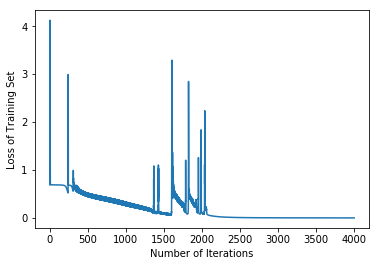

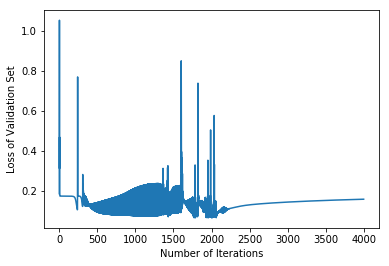

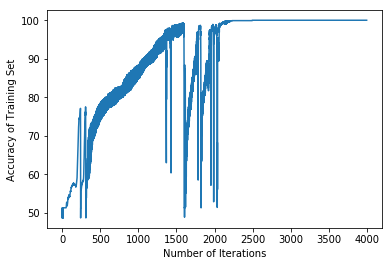

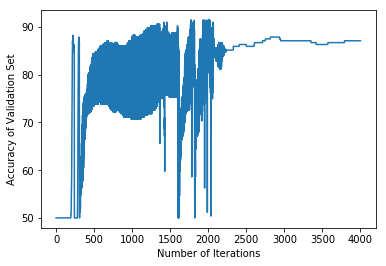

In [43]:
    print("Best")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [44]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

		training		validation		best	
loss		0.0012679101		0.1571684477		0.0655567676
accuracy	100.0000000000		87.1093750000		91.4062500000


In [45]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [46]:
learning_rate=0.5
lambd = 0.000001 #best?
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

#0 Training loss : 0.6928236739	Validation loss : 0.1731542619	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1 Training loss : 0.6932219264	Validation loss : 0.1749099650	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2 Training loss : 0.7051869200	Validation loss : 0.2586652972	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#3 Training loss : 1.0142737326	Validation loss : 0.8522880014	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4 Training loss : 3.5111620646	Validation loss : 0.6267341893	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#5 Training loss : 2.4795679170	Validation loss : 0.3927735581	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#6 Training loss : 1.6791719200	Validation loss : 0.2696542225	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#7 Training loss : 1.1165038799	Validation loss : 0.1848380543	Traini

#61 Training loss : 0.6918828863	Validation loss : 0.1727978039	Training Accuracy: 52.5803310613%	Validation Accuracy: 50.0000000000%
#62 Training loss : 0.6918581294	Validation loss : 0.1727975145	Training Accuracy: 52.7750730282%	Validation Accuracy: 50.0000000000%
#63 Training loss : 0.6918332158	Validation loss : 0.1727972162	Training Accuracy: 52.6777020448%	Validation Accuracy: 50.0000000000%
#64 Training loss : 0.6918081407	Validation loss : 0.1727969088	Training Accuracy: 52.4829600779%	Validation Accuracy: 50.0000000000%
#65 Training loss : 0.6917828992	Validation loss : 0.1727965919	Training Accuracy: 52.1908471276%	Validation Accuracy: 50.0000000000%
#66 Training loss : 0.6917574865	Validation loss : 0.1727962652	Training Accuracy: 51.8987341772%	Validation Accuracy: 50.0000000000%
#67 Training loss : 0.6917318975	Validation loss : 0.1727959284	Training Accuracy: 51.7039922103%	Validation Accuracy: 50.0000000000%
#68 Training loss : 0.6917061273	Validation loss : 0.172795581

#121 Training loss : 0.6899054216	Validation loss : 0.1727461112	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#122 Training loss : 0.6898585883	Validation loss : 0.1727440365	Training Accuracy: 56.5725413827%	Validation Accuracy: 50.0000000000%
#123 Training loss : 0.6898110271	Validation loss : 0.1727418813	Training Accuracy: 56.7672833496%	Validation Accuracy: 50.0000000000%
#124 Training loss : 0.6897627175	Validation loss : 0.1727396420	Training Accuracy: 56.6699123661%	Validation Accuracy: 50.0000000000%
#125 Training loss : 0.6897136382	Validation loss : 0.1727373145	Training Accuracy: 56.7672833496%	Validation Accuracy: 50.0000000000%
#126 Training loss : 0.6896637671	Validation loss : 0.1727348945	Training Accuracy: 56.8646543330%	Validation Accuracy: 50.0000000000%
#127 Training loss : 0.6896130814	Validation loss : 0.1727323774	Training Accuracy: 56.9620253165%	Validation Accuracy: 50.0000000000%
#128 Training loss : 0.6895615571	Validation loss : 0.1

#181 Training loss : 0.6843299408	Validation loss : 0.1720530097	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#182 Training loss : 0.6841328132	Validation loss : 0.1720106138	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#183 Training loss : 0.6839280821	Validation loss : 0.1719654064	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#184 Training loss : 0.6837152980	Validation loss : 0.1719171783	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#185 Training loss : 0.6834939774	Validation loss : 0.1718657030	Training Accuracy: 57.2541382668%	Validation Accuracy: 50.0000000000%
#186 Training loss : 0.6832635994	Validation loss : 0.1718107353	Training Accuracy: 57.2541382668%	Validation Accuracy: 50.0000000000%
#187 Training loss : 0.6830236028	Validation loss : 0.1717520093	Training Accuracy: 57.2541382668%	Validation Accuracy: 50.0000000000%
#188 Training loss : 0.6827733823	Validation loss : 0.1

#241 Training loss : 0.5927789791	Validation loss : 0.1297097536	Training Accuracy: 74.6835443038%	Validation Accuracy: 86.7187500000%
#242 Training loss : 0.5875235182	Validation loss : 0.1272751278	Training Accuracy: 74.5861733204%	Validation Accuracy: 86.3281250000%
#243 Training loss : 0.5821481707	Validation loss : 0.1248288946	Training Accuracy: 74.5861733204%	Validation Accuracy: 86.7187500000%
#244 Training loss : 0.5766759398	Validation loss : 0.1223864322	Training Accuracy: 74.5861733204%	Validation Accuracy: 86.3281250000%
#245 Training loss : 0.5711312008	Validation loss : 0.1199627628	Training Accuracy: 74.8782862707%	Validation Accuracy: 86.3281250000%
#246 Training loss : 0.5655390105	Validation loss : 0.1175720256	Training Accuracy: 74.8782862707%	Validation Accuracy: 86.3281250000%
#247 Training loss : 0.5599243904	Validation loss : 0.1152271246	Training Accuracy: 75.1703992210%	Validation Accuracy: 86.7187500000%
#248 Training loss : 0.5543116361	Validation loss : 0.1

#301 Training loss : 0.6512780563	Validation loss : 0.1622750693	Training Accuracy: 66.5043816943%	Validation Accuracy: 71.8750000000%
#302 Training loss : 0.6478032661	Validation loss : 0.1605847859	Training Accuracy: 67.8675754625%	Validation Accuracy: 74.6093750000%
#303 Training loss : 0.6437352745	Validation loss : 0.1585873576	Training Accuracy: 69.0360272639%	Validation Accuracy: 79.6875000000%
#304 Training loss : 0.6391226840	Validation loss : 0.1564651712	Training Accuracy: 70.5939629990%	Validation Accuracy: 83.5937500000%
#305 Training loss : 0.6341540608	Validation loss : 0.1542194731	Training Accuracy: 71.6650438169%	Validation Accuracy: 85.5468750000%
#306 Training loss : 0.6288581329	Validation loss : 0.1516071028	Training Accuracy: 72.3466407011%	Validation Accuracy: 86.3281250000%
#307 Training loss : 0.6229922571	Validation loss : 0.1484737510	Training Accuracy: 73.0282375852%	Validation Accuracy: 87.1093750000%
#308 Training loss : 0.6163839241	Validation loss : 0.1

#361 Training loss : 0.9965377925	Validation loss : 0.1156455627	Training Accuracy: 51.7039922103%	Validation Accuracy: 84.7656250000%
#362 Training loss : 0.5369299487	Validation loss : 0.1010989301	Training Accuracy: 74.0019474197%	Validation Accuracy: 85.1562500000%
#363 Training loss : 0.5157951515	Validation loss : 0.1002607569	Training Accuracy: 77.2151898734%	Validation Accuracy: 87.1093750000%
#364 Training loss : 0.5102246178	Validation loss : 0.1267616601	Training Accuracy: 74.8782862707%	Validation Accuracy: 70.3125000000%
#365 Training loss : 0.5322896839	Validation loss : 0.1714385537	Training Accuracy: 72.1518987342%	Validation Accuracy: 58.2031250000%
#366 Training loss : 0.6935404052	Validation loss : 0.1648640016	Training Accuracy: 58.9094449854%	Validation Accuracy: 59.7656250000%
#367 Training loss : 0.6166622057	Validation loss : 0.2371086516	Training Accuracy: 61.2463485881%	Validation Accuracy: 50.7812500000%
#368 Training loss : 0.8573069002	Validation loss : 0.1

#421 Training loss : 0.4611066854	Validation loss : 0.1121806132	Training Accuracy: 79.0652385589%	Validation Accuracy: 79.6875000000%
#422 Training loss : 0.4656984956	Validation loss : 0.0983557824	Training Accuracy: 77.4099318403%	Validation Accuracy: 84.3750000000%
#423 Training loss : 0.5239876879	Validation loss : 0.1910951631	Training Accuracy: 73.4177215190%	Validation Accuracy: 59.7656250000%
#424 Training loss : 0.5678921101	Validation loss : 0.2311207453	Training Accuracy: 68.7439143135%	Validation Accuracy: 51.9531250000%
#425 Training loss : 0.8642849079	Validation loss : 0.0972542616	Training Accuracy: 53.5540408958%	Validation Accuracy: 85.9375000000%
#426 Training loss : 0.4940411205	Validation loss : 0.0975772961	Training Accuracy: 76.3388510224%	Validation Accuracy: 82.4218750000%
#427 Training loss : 0.4706536349	Validation loss : 0.0859950811	Training Accuracy: 78.5783836417%	Validation Accuracy: 87.5000000000%
#428 Training loss : 0.4699313164	Validation loss : 0.1

#481 Training loss : 0.4635740375	Validation loss : 0.1089980152	Training Accuracy: 76.4362220058%	Validation Accuracy: 79.2968750000%
#482 Training loss : 0.5471061572	Validation loss : 0.1394952123	Training Accuracy: 71.2755598832%	Validation Accuracy: 73.4375000000%
#483 Training loss : 0.4718943551	Validation loss : 0.1210264893	Training Accuracy: 75.7546251217%	Validation Accuracy: 75.7812500000%
#484 Training loss : 0.5808992278	Validation loss : 0.1278766307	Training Accuracy: 68.8412852970%	Validation Accuracy: 75.7812500000%
#485 Training loss : 0.4588826340	Validation loss : 0.1036971881	Training Accuracy: 77.3125608569%	Validation Accuracy: 80.0781250000%
#486 Training loss : 0.5324989806	Validation loss : 0.1414090885	Training Accuracy: 72.6387536514%	Validation Accuracy: 73.4375000000%
#487 Training loss : 0.4702056549	Validation loss : 0.1204538313	Training Accuracy: 75.8519961052%	Validation Accuracy: 76.1718750000%
#488 Training loss : 0.5809125551	Validation loss : 0.1

#541 Training loss : 0.4345931312	Validation loss : 0.0952933646	Training Accuracy: 79.2599805258%	Validation Accuracy: 83.5937500000%
#542 Training loss : 0.5160313918	Validation loss : 0.1446039273	Training Accuracy: 73.7098344693%	Validation Accuracy: 74.6093750000%
#543 Training loss : 0.4336101382	Validation loss : 0.0948928648	Training Accuracy: 79.3573515093%	Validation Accuracy: 83.5937500000%
#544 Training loss : 0.5148343860	Validation loss : 0.1448979724	Training Accuracy: 73.8072054528%	Validation Accuracy: 74.6093750000%
#545 Training loss : 0.4326314347	Validation loss : 0.0944996801	Training Accuracy: 79.5520934761%	Validation Accuracy: 83.5937500000%
#546 Training loss : 0.5136416835	Validation loss : 0.1451912405	Training Accuracy: 73.8072054528%	Validation Accuracy: 74.6093750000%
#547 Training loss : 0.4316602801	Validation loss : 0.0941176221	Training Accuracy: 79.5520934761%	Validation Accuracy: 83.9843750000%
#548 Training loss : 0.5124673749	Validation loss : 0.1

#601 Training loss : 0.4074696756	Validation loss : 0.0866051382	Training Accuracy: 80.3310613437%	Validation Accuracy: 85.1562500000%
#602 Training loss : 0.4847904647	Validation loss : 0.1527975991	Training Accuracy: 75.9493670886%	Validation Accuracy: 74.6093750000%
#603 Training loss : 0.4066352690	Validation loss : 0.0864048720	Training Accuracy: 80.3310613437%	Validation Accuracy: 85.5468750000%
#604 Training loss : 0.4838788298	Validation loss : 0.1530557805	Training Accuracy: 76.0467380721%	Validation Accuracy: 74.6093750000%
#605 Training loss : 0.4058043458	Validation loss : 0.0862087390	Training Accuracy: 80.4284323272%	Validation Accuracy: 85.5468750000%
#606 Training loss : 0.4829730519	Validation loss : 0.1533133904	Training Accuracy: 76.1441090555%	Validation Accuracy: 74.6093750000%
#607 Training loss : 0.4049768210	Validation loss : 0.0860166294	Training Accuracy: 80.4284323272%	Validation Accuracy: 85.5468750000%
#608 Training loss : 0.4820729441	Validation loss : 0.1

#661 Training loss : 0.3836583276	Validation loss : 0.0820534659	Training Accuracy: 81.5968841285%	Validation Accuracy: 85.9375000000%
#662 Training loss : 0.4594166212	Validation loss : 0.1603740275	Training Accuracy: 77.6046738072%	Validation Accuracy: 73.8281250000%
#663 Training loss : 0.3828988683	Validation loss : 0.0819434570	Training Accuracy: 81.6942551120%	Validation Accuracy: 85.9375000000%
#664 Training loss : 0.4586245626	Validation loss : 0.1606237171	Training Accuracy: 77.6046738072%	Validation Accuracy: 73.8281250000%
#665 Training loss : 0.3821410767	Validation loss : 0.0818355926	Training Accuracy: 81.6942551120%	Validation Accuracy: 85.9375000000%
#666 Training loss : 0.4578350398	Validation loss : 0.1608734176	Training Accuracy: 77.6046738072%	Validation Accuracy: 73.8281250000%
#667 Training loss : 0.3813849067	Validation loss : 0.0817298415	Training Accuracy: 81.6942551120%	Validation Accuracy: 85.9375000000%
#668 Training loss : 0.4570480018	Validation loss : 0.1

#721 Training loss : 0.3614433131	Validation loss : 0.0795810238	Training Accuracy: 82.4732229796%	Validation Accuracy: 86.3281250000%
#722 Training loss : 0.4366296997	Validation loss : 0.1680022648	Training Accuracy: 78.7731256086%	Validation Accuracy: 73.0468750000%
#723 Training loss : 0.3607176549	Validation loss : 0.0795232254	Training Accuracy: 82.4732229796%	Validation Accuracy: 85.9375000000%
#724 Training loss : 0.4358975726	Validation loss : 0.1682671520	Training Accuracy: 78.7731256086%	Validation Accuracy: 73.0468750000%
#725 Training loss : 0.3599925892	Validation loss : 0.0794666059	Training Accuracy: 82.6679649464%	Validation Accuracy: 85.9375000000%
#726 Training loss : 0.4351665534	Validation loss : 0.1685331768	Training Accuracy: 78.7731256086%	Validation Accuracy: 73.0468750000%
#727 Training loss : 0.3592680835	Validation loss : 0.0794111144	Training Accuracy: 82.6679649464%	Validation Accuracy: 85.9375000000%
#728 Training loss : 0.4344365542	Validation loss : 0.1

#781 Training loss : 0.3397164288	Validation loss : 0.0781532260	Training Accuracy: 83.3495618306%	Validation Accuracy: 85.5468750000%
#782 Training loss : 0.4146471652	Validation loss : 0.1764877592	Training Accuracy: 79.8442064265%	Validation Accuracy: 72.2656250000%
#783 Training loss : 0.3389867075	Validation loss : 0.0781166356	Training Accuracy: 83.3495618306%	Validation Accuracy: 85.5468750000%
#784 Training loss : 0.4139204590	Validation loss : 0.1767996041	Training Accuracy: 79.9415774099%	Validation Accuracy: 72.2656250000%
#785 Training loss : 0.3382564974	Validation loss : 0.0780806725	Training Accuracy: 83.5443037975%	Validation Accuracy: 85.5468750000%
#786 Training loss : 0.4131947334	Validation loss : 0.1771146938	Training Accuracy: 79.9415774099%	Validation Accuracy: 72.2656250000%
#787 Training loss : 0.3375257597	Validation loss : 0.0780451866	Training Accuracy: 83.5443037975%	Validation Accuracy: 85.5468750000%
#788 Training loss : 0.4124695167	Validation loss : 0.1

#841 Training loss : 0.3175052341	Validation loss : 0.0770619302	Training Accuracy: 85.4917234664%	Validation Accuracy: 86.3281250000%
#842 Training loss : 0.3924124402	Validation loss : 0.1871564192	Training Accuracy: 81.0126582278%	Validation Accuracy: 71.8750000000%
#843 Training loss : 0.3167558997	Validation loss : 0.0770266469	Training Accuracy: 85.4917234664%	Validation Accuracy: 86.3281250000%
#844 Training loss : 0.3916634061	Validation loss : 0.1875608925	Training Accuracy: 81.0126582278%	Validation Accuracy: 71.8750000000%
#845 Training loss : 0.3160062777	Validation loss : 0.0769911862	Training Accuracy: 85.4917234664%	Validation Accuracy: 86.3281250000%
#846 Training loss : 0.3909131324	Validation loss : 0.1879684673	Training Accuracy: 81.0126582278%	Validation Accuracy: 71.8750000000%
#847 Training loss : 0.3152563175	Validation loss : 0.0769554751	Training Accuracy: 85.5890944499%	Validation Accuracy: 86.3281250000%
#848 Training loss : 0.3901612788	Validation loss : 0.1

#901 Training loss : 0.2949098435	Validation loss : 0.0759216907	Training Accuracy: 86.6601752678%	Validation Accuracy: 85.9375000000%
#902 Training loss : 0.3692625836	Validation loss : 0.2002929653	Training Accuracy: 81.4995131451%	Validation Accuracy: 71.8750000000%
#903 Training loss : 0.2941564550	Validation loss : 0.0758819690	Training Accuracy: 86.6601752678%	Validation Accuracy: 85.9375000000%
#904 Training loss : 0.3684665331	Validation loss : 0.2007525444	Training Accuracy: 81.5968841285%	Validation Accuracy: 71.8750000000%
#905 Training loss : 0.2934031424	Validation loss : 0.0758420767	Training Accuracy: 86.7575462512%	Validation Accuracy: 85.9375000000%
#906 Training loss : 0.3676680750	Validation loss : 0.2012123658	Training Accuracy: 81.6942551120%	Validation Accuracy: 71.8750000000%
#907 Training loss : 0.2926499084	Validation loss : 0.0758020248	Training Accuracy: 86.8549172347%	Validation Accuracy: 85.9375000000%
#908 Training loss : 0.3668671969	Validation loss : 0.2

#961 Training loss : 0.2723738790	Validation loss : 0.0747290415	Training Accuracy: 87.6338851022%	Validation Accuracy: 86.3281250000%
#962 Training loss : 0.3444576445	Validation loss : 0.2137145296	Training Accuracy: 83.7390457644%	Validation Accuracy: 71.0937500000%
#963 Training loss : 0.2716269880	Validation loss : 0.0746923909	Training Accuracy: 87.6338851022%	Validation Accuracy: 86.3281250000%
#964 Training loss : 0.3436063777	Validation loss : 0.2141323777	Training Accuracy: 83.8364167478%	Validation Accuracy: 71.0937500000%
#965 Training loss : 0.2708805639	Validation loss : 0.0746561474	Training Accuracy: 87.6338851022%	Validation Accuracy: 86.7187500000%
#966 Training loss : 0.3427542557	Validation loss : 0.2145474052	Training Accuracy: 83.8364167478%	Validation Accuracy: 71.0937500000%
#967 Training loss : 0.2701346297	Validation loss : 0.0746203274	Training Accuracy: 87.6338851022%	Validation Accuracy: 87.1093750000%
#968 Training loss : 0.3419013518	Validation loss : 0.2

#1021 Training loss : 0.2502798821	Validation loss : 0.0738592191	Training Accuracy: 88.6075949367%	Validation Accuracy: 87.8906250000%
#1022 Training loss : 0.3188544642	Validation loss : 0.2248792855	Training Accuracy: 85.4917234664%	Validation Accuracy: 70.7031250000%
#1023 Training loss : 0.2495593543	Validation loss : 0.0738398652	Training Accuracy: 88.6075949367%	Validation Accuracy: 87.8906250000%
#1024 Training loss : 0.3180108147	Validation loss : 0.2252000197	Training Accuracy: 85.4917234664%	Validation Accuracy: 70.7031250000%
#1025 Training loss : 0.2488402108	Validation loss : 0.0738211915	Training Accuracy: 88.8023369036%	Validation Accuracy: 87.8906250000%
#1026 Training loss : 0.3171686289	Validation loss : 0.2255174255	Training Accuracy: 85.5890944499%	Validation Accuracy: 70.7031250000%
#1027 Training loss : 0.2481224835	Validation loss : 0.0738031992	Training Accuracy: 88.9970788705%	Validation Accuracy: 87.8906250000%
#1028 Training loss : 0.3163279776	Validation lo

#1081 Training loss : 0.2293567737	Validation loss : 0.0735633871	Training Accuracy: 90.3602726388%	Validation Accuracy: 88.6718750000%
#1082 Training loss : 0.2943903239	Validation loss : 0.2331039729	Training Accuracy: 87.5365141188%	Validation Accuracy: 71.0937500000%
#1083 Training loss : 0.2286855234	Validation loss : 0.0735627306	Training Accuracy: 90.3602726388%	Validation Accuracy: 88.6718750000%
#1084 Training loss : 0.2936093528	Validation loss : 0.2333301141	Training Accuracy: 87.6338851022%	Validation Accuracy: 71.0937500000%
#1085 Training loss : 0.2280159183	Validation loss : 0.0735625769	Training Accuracy: 90.3602726388%	Validation Accuracy: 88.6718750000%
#1086 Training loss : 0.2928306584	Validation loss : 0.2335532469	Training Accuracy: 87.6338851022%	Validation Accuracy: 71.0937500000%
#1087 Training loss : 0.2273479415	Validation loss : 0.0735629163	Training Accuracy: 90.3602726388%	Validation Accuracy: 88.6718750000%
#1088 Training loss : 0.2920542253	Validation lo

#1141 Training loss : 0.2098428467	Validation loss : 0.0737267219	Training Accuracy: 91.6260954236%	Validation Accuracy: 89.0625000000%
#1142 Training loss : 0.2718486409	Validation loss : 0.2386004819	Training Accuracy: 88.5102239533%	Validation Accuracy: 71.4843750000%
#1143 Training loss : 0.2092103191	Validation loss : 0.0737375261	Training Accuracy: 91.6260954236%	Validation Accuracy: 89.0625000000%
#1144 Training loss : 0.2711234179	Validation loss : 0.2387389290	Training Accuracy: 88.6075949367%	Validation Accuracy: 71.4843750000%
#1145 Training loss : 0.2085786050	Validation loss : 0.0737486140	Training Accuracy: 91.6260954236%	Validation Accuracy: 89.0625000000%
#1146 Training loss : 0.2703994057	Validation loss : 0.2388745900	Training Accuracy: 88.6075949367%	Validation Accuracy: 71.4843750000%
#1147 Training loss : 0.2079476678	Validation loss : 0.0737599819	Training Accuracy: 91.6260954236%	Validation Accuracy: 89.0625000000%
#1148 Training loss : 0.2696765509	Validation lo

#1201 Training loss : 0.1910572488	Validation loss : 0.0741684138	Training Accuracy: 92.4050632911%	Validation Accuracy: 89.8437500000%
#1202 Training loss : 0.2503777607	Validation loss : 0.2415723349	Training Accuracy: 89.1918208374%	Validation Accuracy: 71.8750000000%
#1203 Training loss : 0.1904310781	Validation loss : 0.0741875376	Training Accuracy: 92.4050632911%	Validation Accuracy: 89.8437500000%
#1204 Training loss : 0.2496621568	Validation loss : 0.2416298981	Training Accuracy: 89.3865628043%	Validation Accuracy: 71.8750000000%
#1205 Training loss : 0.1898044272	Validation loss : 0.0742069960	Training Accuracy: 92.5024342746%	Validation Accuracy: 89.8437500000%
#1206 Training loss : 0.2489458344	Validation loss : 0.2416847977	Training Accuracy: 89.3865628043%	Validation Accuracy: 71.8750000000%
#1207 Training loss : 0.1891772548	Validation loss : 0.0742267976	Training Accuracy: 92.5998052580%	Validation Accuracy: 89.8437500000%
#1208 Training loss : 0.2482287322	Validation lo

#1261 Training loss : 0.1719925486	Validation loss : 0.0749324191	Training Accuracy: 94.0603700097%	Validation Accuracy: 89.8437500000%
#1262 Training loss : 0.2285391969	Validation loss : 0.2422022442	Training Accuracy: 90.2629016553%	Validation Accuracy: 72.6562500000%
#1263 Training loss : 0.1713502559	Validation loss : 0.0749663839	Training Accuracy: 94.0603700097%	Validation Accuracy: 90.2343750000%
#1264 Training loss : 0.2278068694	Validation loss : 0.2421894111	Training Accuracy: 90.2629016553%	Validation Accuracy: 72.6562500000%
#1265 Training loss : 0.1707082235	Validation loss : 0.0750009726	Training Accuracy: 94.0603700097%	Validation Accuracy: 90.2343750000%
#1266 Training loss : 0.2270756971	Validation loss : 0.2421749647	Training Accuracy: 90.3602726388%	Validation Accuracy: 72.6562500000%
#1267 Training loss : 0.1700665515	Validation loss : 0.0750361832	Training Accuracy: 94.0603700097%	Validation Accuracy: 90.2343750000%
#1268 Training loss : 0.2263458581	Validation lo

#1321 Training loss : 0.1530957593	Validation loss : 0.0761841896	Training Accuracy: 95.4235637780%	Validation Accuracy: 90.2343750000%
#1322 Training loss : 0.2073787890	Validation loss : 0.2412536346	Training Accuracy: 91.2366114898%	Validation Accuracy: 73.0468750000%
#1323 Training loss : 0.1524789114	Validation loss : 0.0762323871	Training Accuracy: 95.5209347614%	Validation Accuracy: 90.2343750000%
#1324 Training loss : 0.2066902557	Validation loss : 0.2412003622	Training Accuracy: 91.3339824732%	Validation Accuracy: 73.0468750000%
#1325 Training loss : 0.1518619515	Validation loss : 0.0762809280	Training Accuracy: 95.5209347614%	Validation Accuracy: 90.2343750000%
#1326 Training loss : 0.2059999418	Validation loss : 0.2411449467	Training Accuracy: 91.4313534567%	Validation Accuracy: 73.0468750000%
#1327 Training loss : 0.1512446782	Validation loss : 0.0763298190	Training Accuracy: 95.5209347614%	Validation Accuracy: 90.2343750000%
#1328 Training loss : 0.2053073432	Validation lo

#1381 Training loss : 0.1323903637	Validation loss : 0.0780407439	Training Accuracy: 96.2999026290%	Validation Accuracy: 90.2343750000%
#1382 Training loss : 0.1806992163	Validation loss : 0.2366869369	Training Accuracy: 92.5024342746%	Validation Accuracy: 73.8281250000%
#1383 Training loss : 0.1313132374	Validation loss : 0.0781750198	Training Accuracy: 96.4946445959%	Validation Accuracy: 90.2343750000%
#1384 Training loss : 0.1787969068	Validation loss : 0.2360573758	Training Accuracy: 92.5998052580%	Validation Accuracy: 73.8281250000%
#1385 Training loss : 0.1301021781	Validation loss : 0.0783423696	Training Accuracy: 96.4946445959%	Validation Accuracy: 90.2343750000%
#1386 Training loss : 0.1765297719	Validation loss : 0.2352376841	Training Accuracy: 92.5998052580%	Validation Accuracy: 73.8281250000%
#1387 Training loss : 0.1286955858	Validation loss : 0.0785660019	Training Accuracy: 96.4946445959%	Validation Accuracy: 91.0156250000%
#1388 Training loss : 0.1737235823	Validation lo

#1441 Training loss : 0.0888242862	Validation loss : 0.1126777160	Training Accuracy: 97.7604673807%	Validation Accuracy: 82.4218750000%
#1442 Training loss : 0.1029926419	Validation loss : 0.2161333696	Training Accuracy: 96.1051606621%	Validation Accuracy: 74.2187500000%
#1443 Training loss : 0.0973380414	Validation loss : 0.0892410010	Training Accuracy: 97.8578383642%	Validation Accuracy: 88.2812500000%
#1444 Training loss : 0.1324242675	Validation loss : 0.2258176354	Training Accuracy: 94.9367088608%	Validation Accuracy: 74.2187500000%
#1445 Training loss : 0.1080326445	Validation loss : 0.0819146077	Training Accuracy: 97.4683544304%	Validation Accuracy: 90.2343750000%
#1446 Training loss : 0.1659496531	Validation loss : 0.2449901220	Training Accuracy: 93.0866601753%	Validation Accuracy: 73.4375000000%
#1447 Training loss : 0.1274465898	Validation loss : 0.0860441862	Training Accuracy: 95.9104186952%	Validation Accuracy: 88.2812500000%
#1448 Training loss : 0.2441143539	Validation lo

#1501 Training loss : 0.1396544443	Validation loss : 0.1084783012	Training Accuracy: 95.1314508277%	Validation Accuracy: 81.2500000000%
#1502 Training loss : 0.1185112489	Validation loss : 0.0852846347	Training Accuracy: 98.0525803311%	Validation Accuracy: 83.5937500000%
#1503 Training loss : 0.1107349024	Validation loss : 0.1118914595	Training Accuracy: 97.8578383642%	Validation Accuracy: 81.2500000000%
#1504 Training loss : 0.1051180165	Validation loss : 0.1001760161	Training Accuracy: 97.9552093476%	Validation Accuracy: 81.6406250000%
#1505 Training loss : 0.1014133876	Validation loss : 0.1182697678	Training Accuracy: 97.9552093476%	Validation Accuracy: 80.8593750000%
#1506 Training loss : 0.0983652457	Validation loss : 0.1111765182	Training Accuracy: 98.0525803311%	Validation Accuracy: 81.2500000000%
#1507 Training loss : 0.0958003509	Validation loss : 0.1245607586	Training Accuracy: 98.0525803311%	Validation Accuracy: 80.0781250000%
#1508 Training loss : 0.0935082816	Validation lo

#1561 Training loss : 0.1180090934	Validation loss : 0.2068138996	Training Accuracy: 95.2288218111%	Validation Accuracy: 75.3906250000%
#1562 Training loss : 0.0834075812	Validation loss : 0.0871824185	Training Accuracy: 98.6368062317%	Validation Accuracy: 88.2812500000%
#1563 Training loss : 0.1058424330	Validation loss : 0.2024706509	Training Accuracy: 95.7156767283%	Validation Accuracy: 75.3906250000%
#1564 Training loss : 0.0790180581	Validation loss : 0.0916754160	Training Accuracy: 98.8315481986%	Validation Accuracy: 86.7187500000%
#1565 Training loss : 0.0960592838	Validation loss : 0.2009765766	Training Accuracy: 96.3972736125%	Validation Accuracy: 75.3906250000%
#1566 Training loss : 0.0765780935	Validation loss : 0.0939101638	Training Accuracy: 98.8315481986%	Validation Accuracy: 86.3281250000%
#1567 Training loss : 0.0925069831	Validation loss : 0.2017384049	Training Accuracy: 96.4946445959%	Validation Accuracy: 75.3906250000%
#1568 Training loss : 0.0761339188	Validation lo

#1621 Training loss : 0.0938829604	Validation loss : 0.2072134767	Training Accuracy: 96.2025316456%	Validation Accuracy: 75.3906250000%
#1622 Training loss : 0.0714689983	Validation loss : 0.0874519899	Training Accuracy: 99.0262901655%	Validation Accuracy: 88.6718750000%
#1623 Training loss : 0.0989646551	Validation loss : 0.2094926012	Training Accuracy: 95.8130477118%	Validation Accuracy: 75.3906250000%
#1624 Training loss : 0.0734539249	Validation loss : 0.0864041440	Training Accuracy: 98.8315481986%	Validation Accuracy: 89.8437500000%
#1625 Training loss : 0.1049049897	Validation loss : 0.2120875944	Training Accuracy: 95.7156767283%	Validation Accuracy: 75.3906250000%
#1626 Training loss : 0.0757126914	Validation loss : 0.0856640855	Training Accuracy: 98.8315481986%	Validation Accuracy: 90.2343750000%
#1627 Training loss : 0.1113520442	Validation loss : 0.2150156033	Training Accuracy: 95.7156767283%	Validation Accuracy: 75.3906250000%
#1628 Training loss : 0.0781538140	Validation lo

#1681 Training loss : 0.0584047268	Validation loss : 0.1280612330	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.0781250000%
#1682 Training loss : 0.0580655896	Validation loss : 0.1506997463	Training Accuracy: 98.7341772152%	Validation Accuracy: 79.2968750000%
#1683 Training loss : 0.0574879927	Validation loss : 0.1274690163	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.4687500000%
#1684 Training loss : 0.0572470656	Validation loss : 0.1522025218	Training Accuracy: 98.7341772152%	Validation Accuracy: 79.2968750000%
#1685 Training loss : 0.0566831567	Validation loss : 0.1266326756	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.4687500000%
#1686 Training loss : 0.0565559008	Validation loss : 0.1539165006	Training Accuracy: 98.7341772152%	Validation Accuracy: 78.9062500000%
#1687 Training loss : 0.0559848646	Validation loss : 0.1255055129	Training Accuracy: 99.3184031159%	Validation Accuracy: 80.4687500000%
#1688 Training loss : 0.0559984081	Validation lo

#1741 Training loss : 0.0513107249	Validation loss : 0.1503300897	Training Accuracy: 99.2210321324%	Validation Accuracy: 79.6875000000%
#1742 Training loss : 0.0507595099	Validation loss : 0.1474171047	Training Accuracy: 99.3184031159%	Validation Accuracy: 79.2968750000%
#1743 Training loss : 0.0502282595	Validation loss : 0.1505718710	Training Accuracy: 99.2210321324%	Validation Accuracy: 79.6875000000%
#1744 Training loss : 0.0497143282	Validation loss : 0.1480697337	Training Accuracy: 99.3184031159%	Validation Accuracy: 79.2968750000%
#1745 Training loss : 0.0492154436	Validation loss : 0.1508445205	Training Accuracy: 99.2210321324%	Validation Accuracy: 79.6875000000%
#1746 Training loss : 0.0487296566	Validation loss : 0.1486808746	Training Accuracy: 99.3184031159%	Validation Accuracy: 79.2968750000%
#1747 Training loss : 0.0482561548	Validation loss : 0.1511303612	Training Accuracy: 99.3184031159%	Validation Accuracy: 79.6875000000%
#1748 Training loss : 0.0477952378	Validation lo

#1801 Training loss : 0.0326301600	Validation loss : 0.1606089296	Training Accuracy: 99.6105160662%	Validation Accuracy: 78.9062500000%
#1802 Training loss : 0.0324454346	Validation loss : 0.1608332677	Training Accuracy: 99.6105160662%	Validation Accuracy: 78.9062500000%
#1803 Training loss : 0.0322627277	Validation loss : 0.1611705308	Training Accuracy: 99.6105160662%	Validation Accuracy: 78.9062500000%
#1804 Training loss : 0.0320818714	Validation loss : 0.1614073580	Training Accuracy: 99.6105160662%	Validation Accuracy: 78.9062500000%
#1805 Training loss : 0.0319027234	Validation loss : 0.1617366266	Training Accuracy: 99.6105160662%	Validation Accuracy: 78.9062500000%
#1806 Training loss : 0.0317251705	Validation loss : 0.1619782661	Training Accuracy: 99.6105160662%	Validation Accuracy: 78.9062500000%
#1807 Training loss : 0.0315491175	Validation loss : 0.1622944032	Training Accuracy: 99.6105160662%	Validation Accuracy: 78.9062500000%
#1808 Training loss : 0.0313744878	Validation lo

#1861 Training loss : 0.0233538944	Validation loss : 0.1686516985	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.2968750000%
#1862 Training loss : 0.0232224695	Validation loss : 0.1687089892	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.2968750000%
#1863 Training loss : 0.0230919809	Validation loss : 0.1687662479	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.2968750000%
#1864 Training loss : 0.0229624652	Validation loss : 0.1688231806	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.2968750000%
#1865 Training loss : 0.0228339629	Validation loss : 0.1688801183	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.2968750000%
#1866 Training loss : 0.0227065173	Validation loss : 0.1689368595	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.2968750000%
#1867 Training loss : 0.0225801742	Validation loss : 0.1689936635	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.2968750000%
#1868 Training loss : 0.0224549804	Validation lo

#1920 Training loss : 0.0175635132	Validation loss : 0.1726588442	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1921 Training loss : 0.0174917645	Validation loss : 0.1727347848	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1922 Training loss : 0.0174205527	Validation loss : 0.1728105610	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1923 Training loss : 0.0173498688	Validation loss : 0.1728861690	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1924 Training loss : 0.0172797039	Validation loss : 0.1729616066	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1925 Training loss : 0.0172100495	Validation loss : 0.1730368730	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1926 Training loss : 0.0171408975	Validation loss : 0.1731119686	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#1927 Training loss : 0.0170722402	Valida

#1979 Training loss : 0.0140440205	Validation loss : 0.1776623183	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#1980 Training loss : 0.0139941815	Validation loss : 0.1778005859	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#1981 Training loss : 0.0139446127	Validation loss : 0.1779430686	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#1982 Training loss : 0.0138953148	Validation loss : 0.1780897565	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#1983 Training loss : 0.0138462891	Validation loss : 0.1782405962	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#1984 Training loss : 0.0137975371	Validation loss : 0.1783954876	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#1985 Training loss : 0.0137490607	Validation loss : 0.1785542823	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#1986 Training loss : 0.0137008622	Valida

#2038 Training loss : 0.0115745946	Validation loss : 0.1859437698	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2039 Training loss : 0.0115398568	Validation loss : 0.1860283087	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2040 Training loss : 0.0115053026	Validation loss : 0.1861116190	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2041 Training loss : 0.0114709299	Validation loss : 0.1861937521	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2042 Training loss : 0.0114367369	Validation loss : 0.1862747577	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2043 Training loss : 0.0114027218	Validation loss : 0.1863546834	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2044 Training loss : 0.0113688826	Validation loss : 0.1864335749	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2045 Training loss : 0.0113352178	Valida

#2097 Training loss : 0.0097949714	Validation loss : 0.1898409634	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2098 Training loss : 0.0097689995	Validation loss : 0.1898978824	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2099 Training loss : 0.0097431532	Validation loss : 0.1899546572	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2100 Training loss : 0.0097174318	Validation loss : 0.1900112903	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2101 Training loss : 0.0096918346	Validation loss : 0.1900677842	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2102 Training loss : 0.0096663607	Validation loss : 0.1901241410	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2103 Training loss : 0.0096410095	Validation loss : 0.1901803629	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2104 Training loss : 0.0096157801	Valida

#2156 Training loss : 0.0084515454	Validation loss : 0.1929853283	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2157 Training loss : 0.0084316733	Validation loss : 0.1930349836	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2158 Training loss : 0.0084118881	Validation loss : 0.1930845192	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2159 Training loss : 0.0083921895	Validation loss : 0.1931339356	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2160 Training loss : 0.0083725773	Validation loss : 0.1931832337	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2161 Training loss : 0.0083530514	Validation loss : 0.1932324143	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2162 Training loss : 0.0083336115	Validation loss : 0.1932814783	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2163 Training loss : 0.0083142574	Valida

#2215 Training loss : 0.0074202701	Validation loss : 0.1957596576	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2216 Training loss : 0.0074050780	Validation loss : 0.1958049820	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2217 Training loss : 0.0073899533	Validation loss : 0.1958502749	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2218 Training loss : 0.0073748955	Validation loss : 0.1958955368	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2219 Training loss : 0.0073599041	Validation loss : 0.1959407676	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2220 Training loss : 0.0073449787	Validation loss : 0.1959859675	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2221 Training loss : 0.0073301186	Validation loss : 0.1960311365	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2222 Training loss : 0.0073153234	Valida

#2274 Training loss : 0.0066234771	Validation loss : 0.1983665748	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2275 Training loss : 0.0066114606	Validation loss : 0.1984091664	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2276 Training loss : 0.0065994862	Validation loss : 0.1984516916	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2277 Training loss : 0.0065875537	Validation loss : 0.1984941498	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2278 Training loss : 0.0065756627	Validation loss : 0.1985365408	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2279 Training loss : 0.0065638130	Validation loss : 0.1985788642	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2280 Training loss : 0.0065520043	Validation loss : 0.1986211198	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2281 Training loss : 0.0065402363	Valida

#2333 Training loss : 0.0059786434	Validation loss : 0.2007620309	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2334 Training loss : 0.0059687185	Validation loss : 0.2008006237	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2335 Training loss : 0.0059588236	Validation loss : 0.2008391538	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2336 Training loss : 0.0059489586	Validation loss : 0.2008776217	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2337 Training loss : 0.0059391234	Validation loss : 0.2009160274	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2338 Training loss : 0.0059293177	Validation loss : 0.2009543714	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2339 Training loss : 0.0059195415	Validation loss : 0.2009926539	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2340 Training loss : 0.0059097947	Valida

#2392 Training loss : 0.0054402855	Validation loss : 0.2029405177	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2393 Training loss : 0.0054319206	Validation loss : 0.2029758581	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2394 Training loss : 0.0054235789	Validation loss : 0.2030111501	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2395 Training loss : 0.0054152604	Validation loss : 0.2030463939	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2396 Training loss : 0.0054069649	Validation loss : 0.2030815896	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2397 Training loss : 0.0053986923	Validation loss : 0.2031167375	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2398 Training loss : 0.0053904426	Validation loss : 0.2031518376	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2399 Training loss : 0.0053822156	Valida

#2451 Training loss : 0.0049836456	Validation loss : 0.2049478272	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2452 Training loss : 0.0049765051	Validation loss : 0.2049805634	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2453 Training loss : 0.0049693831	Validation loss : 0.2050132591	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2454 Training loss : 0.0049622794	Validation loss : 0.2050459142	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2455 Training loss : 0.0049551940	Validation loss : 0.2050785289	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2456 Training loss : 0.0049481269	Validation loss : 0.2051111033	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2457 Training loss : 0.0049410780	Validation loss : 0.2051436374	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2458 Training loss : 0.0049340472	Valida

#2510 Training loss : 0.0045918313	Validation loss : 0.2068125231	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2511 Training loss : 0.0045856716	Validation loss : 0.2068430037	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2512 Training loss : 0.0045795269	Validation loss : 0.2068734483	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2513 Training loss : 0.0045733969	Validation loss : 0.2069038570	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2514 Training loss : 0.0045672818	Validation loss : 0.2069342298	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2515 Training loss : 0.0045611813	Validation loss : 0.2069645669	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2516 Training loss : 0.0045550956	Validation loss : 0.2069948683	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2517 Training loss : 0.0045490245	Valida

#2569 Training loss : 0.0042522996	Validation loss : 0.2085518110	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2570 Training loss : 0.0042469364	Validation loss : 0.2085803040	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2571 Training loss : 0.0042415854	Validation loss : 0.2086087661	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2572 Training loss : 0.0042362466	Validation loss : 0.2086371973	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2573 Training loss : 0.0042309198	Validation loss : 0.2086655977	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2574 Training loss : 0.0042256051	Validation loss : 0.2086939675	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2575 Training loss : 0.0042203024	Validation loss : 0.2087223067	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2576 Training loss : 0.0042150117	Valida

#2628 Training loss : 0.0039554618	Validation loss : 0.2101839408	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2629 Training loss : 0.0039507528	Validation loss : 0.2102108327	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2630 Training loss : 0.0039460540	Validation loss : 0.2102377025	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2631 Training loss : 0.0039413651	Validation loss : 0.2102645504	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2632 Training loss : 0.0039366863	Validation loss : 0.2102913765	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2633 Training loss : 0.0039320174	Validation loss : 0.2103181812	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2634 Training loss : 0.0039273584	Validation loss : 0.2103449646	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2635 Training loss : 0.0039227093	Valida

#2687 Training loss : 0.0036938550	Validation loss : 0.2117409590	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2688 Training loss : 0.0036896885	Validation loss : 0.2117670107	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2689 Training loss : 0.0036855303	Validation loss : 0.2117930586	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2690 Training loss : 0.0036813805	Validation loss : 0.2118191032	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2691 Training loss : 0.0036772390	Validation loss : 0.2118451448	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2692 Training loss : 0.0036731058	Validation loss : 0.2118711841	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2693 Training loss : 0.0036689809	Validation loss : 0.2118972213	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2694 Training loss : 0.0036648642	Valida

#2746 Training loss : 0.0034615409	Validation loss : 0.2132888503	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2747 Training loss : 0.0034578262	Validation loss : 0.2133156527	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2748 Training loss : 0.0034541186	Validation loss : 0.2133424896	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2749 Training loss : 0.0034504178	Validation loss : 0.2133693618	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2750 Training loss : 0.0034467240	Validation loss : 0.2133962703	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2751 Training loss : 0.0034430371	Validation loss : 0.2134232160	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2752 Training loss : 0.0034393571	Validation loss : 0.2134501999	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2753 Training loss : 0.0034356840	Valida

#2805 Training loss : 0.0032536001	Validation loss : 0.2149644984	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2806 Training loss : 0.0032502601	Validation loss : 0.2149953154	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2807 Training loss : 0.0032469259	Validation loss : 0.2150262441	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2808 Training loss : 0.0032435974	Validation loss : 0.2150572863	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2809 Training loss : 0.0032402746	Validation loss : 0.2150884437	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2810 Training loss : 0.0032369574	Validation loss : 0.2151197182	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2811 Training loss : 0.0032336460	Validation loss : 0.2151511116	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2812 Training loss : 0.0032303401	Valida

#2864 Training loss : 0.0030657484	Validation loss : 0.2170390271	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2865 Training loss : 0.0030627157	Validation loss : 0.2170799281	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2866 Training loss : 0.0030596878	Validation loss : 0.2171210609	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2867 Training loss : 0.0030566646	Validation loss : 0.2171624270	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2868 Training loss : 0.0030536462	Validation loss : 0.2172040277	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2869 Training loss : 0.0030506324	Validation loss : 0.2172458645	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2870 Training loss : 0.0030476233	Validation loss : 0.2172879385	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2871 Training loss : 0.0030446189	Valida

#2923 Training loss : 0.0028946899	Validation loss : 0.2198485007	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2924 Training loss : 0.0028919269	Validation loss : 0.2199018862	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2925 Training loss : 0.0028891685	Validation loss : 0.2199553770	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2926 Training loss : 0.0028864147	Validation loss : 0.2200089664	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2927 Training loss : 0.0028836655	Validation loss : 0.2200626479	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2928 Training loss : 0.0028809208	Validation loss : 0.2201164148	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2929 Training loss : 0.0028781807	Validation loss : 0.2201702603	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2930 Training loss : 0.0028754453	Valida

#2982 Training loss : 0.0027396216	Validation loss : 0.2229482451	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2983 Training loss : 0.0027371335	Validation loss : 0.2229959155	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2984 Training loss : 0.0027346500	Validation loss : 0.2230433101	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2985 Training loss : 0.0027321712	Validation loss : 0.2230904255	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2986 Training loss : 0.0027296970	Validation loss : 0.2231372580	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2987 Training loss : 0.0027272274	Validation loss : 0.2231838043	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2988 Training loss : 0.0027247624	Validation loss : 0.2232300612	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2989 Training loss : 0.0027223020	Valida

#3041 Training loss : 0.0026004678	Validation loss : 0.2252356060	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3042 Training loss : 0.0025982371	Validation loss : 0.2252652470	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3043 Training loss : 0.0025960103	Validation loss : 0.2252946154	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3044 Training loss : 0.0025937876	Validation loss : 0.2253237138	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3045 Training loss : 0.0025915689	Validation loss : 0.2253525447	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3046 Training loss : 0.0025893542	Validation loss : 0.2253811107	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3047 Training loss : 0.0025871434	Validation loss : 0.2254094145	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3048 Training loss : 0.0025849366	Valida

#3100 Training loss : 0.0024753389	Validation loss : 0.2266056985	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3101 Training loss : 0.0024733248	Validation loss : 0.2266238414	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3102 Training loss : 0.0024713141	Validation loss : 0.2266418646	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3103 Training loss : 0.0024693067	Validation loss : 0.2266597700	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3104 Training loss : 0.0024673027	Validation loss : 0.2266775598	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3105 Training loss : 0.0024653019	Validation loss : 0.2266952361	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3106 Training loss : 0.0024633044	Validation loss : 0.2267128009	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3107 Training loss : 0.0024613103	Valida

#3159 Training loss : 0.0023618939	Validation loss : 0.2275289221	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3160 Training loss : 0.0023600601	Validation loss : 0.2275428459	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3161 Training loss : 0.0023582290	Validation loss : 0.2275567354	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3162 Training loss : 0.0023564007	Validation loss : 0.2275705917	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3163 Training loss : 0.0023545752	Validation loss : 0.2275844156	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3164 Training loss : 0.0023527525	Validation loss : 0.2275982079	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3165 Training loss : 0.0023509325	Validation loss : 0.2276119693	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3166 Training loss : 0.0023491153	Valida

#3218 Training loss : 0.0022582292	Validation loss : 0.2283140842	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3219 Training loss : 0.0022565476	Validation loss : 0.2283270587	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3220 Training loss : 0.0022548683	Validation loss : 0.2283400296	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3221 Training loss : 0.0022531914	Validation loss : 0.2283529973	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3222 Training loss : 0.0022515169	Validation loss : 0.2283659618	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3223 Training loss : 0.0022498448	Validation loss : 0.2283789236	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3224 Training loss : 0.0022481750	Validation loss : 0.2283918829	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3225 Training loss : 0.0022465076	Valida

#3277 Training loss : 0.0021629073	Validation loss : 0.2290793625	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3278 Training loss : 0.0021613569	Validation loss : 0.2290923997	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3279 Training loss : 0.0021598086	Validation loss : 0.2291054405	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3280 Training loss : 0.0021582623	Validation loss : 0.2291184850	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3281 Training loss : 0.0021567181	Validation loss : 0.2291315331	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3282 Training loss : 0.0021551759	Validation loss : 0.2291445849	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3283 Training loss : 0.0021536359	Validation loss : 0.2291576404	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3284 Training loss : 0.0021520978	Valida

#3336 Training loss : 0.0020748419	Validation loss : 0.2298549604	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3337 Training loss : 0.0020734066	Validation loss : 0.2298682124	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3338 Training loss : 0.0020719732	Validation loss : 0.2298814674	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3339 Training loss : 0.0020705416	Validation loss : 0.2298947255	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3340 Training loss : 0.0020691118	Validation loss : 0.2299079866	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3341 Training loss : 0.0020676838	Validation loss : 0.2299212507	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3342 Training loss : 0.0020662577	Validation loss : 0.2299345177	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3343 Training loss : 0.0020648334	Valida

#3395 Training loss : 0.0019931856	Validation loss : 0.2306409093	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3396 Training loss : 0.0019918527	Validation loss : 0.2306542796	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3397 Training loss : 0.0019905214	Validation loss : 0.2306676506	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3398 Training loss : 0.0019891917	Validation loss : 0.2306810225	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3399 Training loss : 0.0019878637	Validation loss : 0.2306943952	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3400 Training loss : 0.0019865373	Validation loss : 0.2307077686	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3401 Training loss : 0.0019852125	Validation loss : 0.2307211427	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3402 Training loss : 0.0019838894	Valida

#3454 Training loss : 0.0019172501	Validation loss : 0.2314300050	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3455 Training loss : 0.0019160089	Validation loss : 0.2314433634	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3456 Training loss : 0.0019147691	Validation loss : 0.2314567206	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3457 Training loss : 0.0019135309	Validation loss : 0.2314700766	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3458 Training loss : 0.0019122941	Validation loss : 0.2314834314	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3459 Training loss : 0.0019110587	Validation loss : 0.2314967848	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3460 Training loss : 0.0019098248	Validation loss : 0.2315101369	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3461 Training loss : 0.0019085924	Valida

#3513 Training loss : 0.0018464568	Validation loss : 0.2322152129	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3514 Training loss : 0.0018452983	Validation loss : 0.2322284553	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3515 Training loss : 0.0018441410	Validation loss : 0.2322416950	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3516 Training loss : 0.0018429852	Validation loss : 0.2322549320	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3517 Training loss : 0.0018418306	Validation loss : 0.2322681664	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3518 Training loss : 0.0018406774	Validation loss : 0.2322813980	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3519 Training loss : 0.0018395254	Validation loss : 0.2322946268	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3520 Training loss : 0.0018383748	Valida

#3572 Training loss : 0.0017803089	Validation loss : 0.2329913686	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3573 Training loss : 0.0017792252	Validation loss : 0.2330044242	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3574 Training loss : 0.0017781427	Validation loss : 0.2330174761	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3575 Training loss : 0.0017770614	Validation loss : 0.2330305244	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3576 Training loss : 0.0017759813	Validation loss : 0.2330435690	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3577 Training loss : 0.0017749024	Validation loss : 0.2330566100	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3578 Training loss : 0.0017738247	Validation loss : 0.2330696474	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3579 Training loss : 0.0017727482	Valida

#3631 Training loss : 0.0017183738	Validation loss : 0.2337551170	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3632 Training loss : 0.0017173581	Validation loss : 0.2337679419	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3633 Training loss : 0.0017163435	Validation loss : 0.2337807626	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3634 Training loss : 0.0017153299	Validation loss : 0.2337935791	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3635 Training loss : 0.0017143175	Validation loss : 0.2338063914	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3636 Training loss : 0.0017133062	Validation loss : 0.2338191996	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3637 Training loss : 0.0017122960	Validation loss : 0.2338320035	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3638 Training loss : 0.0017112868	Valida

#3690 Training loss : 0.0016602717	Validation loss : 0.2345044629	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3691 Training loss : 0.0016593180	Validation loss : 0.2345170324	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3692 Training loss : 0.0016583652	Validation loss : 0.2345295974	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3693 Training loss : 0.0016574135	Validation loss : 0.2345421580	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3694 Training loss : 0.0016564627	Validation loss : 0.2345547140	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3695 Training loss : 0.0016555130	Validation loss : 0.2345672656	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3696 Training loss : 0.0016545642	Validation loss : 0.2345798128	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3697 Training loss : 0.0016536165	Valida

#3749 Training loss : 0.0016056672	Validation loss : 0.2352383428	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3750 Training loss : 0.0016047701	Validation loss : 0.2352506449	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3751 Training loss : 0.0016038739	Validation loss : 0.2352629424	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3752 Training loss : 0.0016029786	Validation loss : 0.2352752353	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3753 Training loss : 0.0016020842	Validation loss : 0.2352875236	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3754 Training loss : 0.0016011907	Validation loss : 0.2352998074	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3755 Training loss : 0.0016002981	Validation loss : 0.2353120865	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3756 Training loss : 0.0015994065	Valida

#3808 Training loss : 0.0015542625	Validation loss : 0.2359563039	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3809 Training loss : 0.0015534173	Validation loss : 0.2359683347	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3810 Training loss : 0.0015525729	Validation loss : 0.2359803610	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3811 Training loss : 0.0015517293	Validation loss : 0.2359923827	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3812 Training loss : 0.0015508865	Validation loss : 0.2360043997	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3813 Training loss : 0.0015500446	Validation loss : 0.2360164122	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3814 Training loss : 0.0015492035	Validation loss : 0.2360284201	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3815 Training loss : 0.0015483633	Valida

#3867 Training loss : 0.0015057925	Validation loss : 0.2366582828	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3868 Training loss : 0.0015049949	Validation loss : 0.2366700438	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3869 Training loss : 0.0015041980	Validation loss : 0.2366818003	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3870 Training loss : 0.0015034019	Validation loss : 0.2366935522	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3871 Training loss : 0.0015026066	Validation loss : 0.2367052996	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3872 Training loss : 0.0015018120	Validation loss : 0.2367170424	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3873 Training loss : 0.0015010183	Validation loss : 0.2367287807	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3874 Training loss : 0.0015002252	Valida

#3926 Training loss : 0.0014600202	Validation loss : 0.2373444602	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3927 Training loss : 0.0014592664	Validation loss : 0.2373559559	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3928 Training loss : 0.0014585133	Validation loss : 0.2373674472	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3929 Training loss : 0.0014577609	Validation loss : 0.2373789340	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3930 Training loss : 0.0014570092	Validation loss : 0.2373904164	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3931 Training loss : 0.0014562582	Validation loss : 0.2374018943	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3932 Training loss : 0.0014555079	Validation loss : 0.2374133678	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3933 Training loss : 0.0014547584	Valida

#3985 Training loss : 0.0014167329	Validation loss : 0.2380151652	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3986 Training loss : 0.0014160195	Validation loss : 0.2380264020	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3987 Training loss : 0.0014153068	Validation loss : 0.2380376346	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3988 Training loss : 0.0014145947	Validation loss : 0.2380488628	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3989 Training loss : 0.0014138833	Validation loss : 0.2380600867	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3990 Training loss : 0.0014131725	Validation loss : 0.2380713063	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3991 Training loss : 0.0014124624	Validation loss : 0.2380825215	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#3992 Training loss : 0.0014117529	Valida

Best
lambda =  1e-06


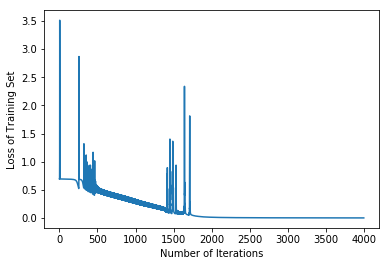

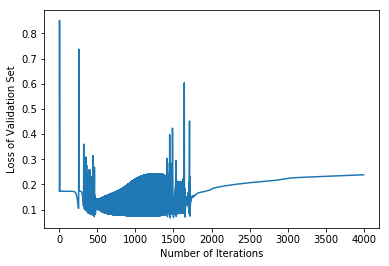

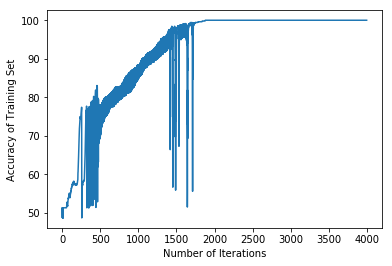

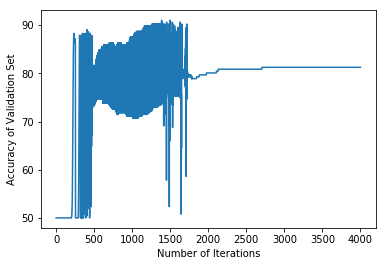

In [47]:
    print("Best")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [48]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

		training		validation		best	
loss		0.0014068049		0.2381720886		0.0785660019
accuracy	100.0000000000		81.2500000000		91.0156250000


In [49]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [50]:
learning_rate=0.5
lambd = 0.05 #best?
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

#0 Training loss : 0.6977940028	Validation loss : 0.1734972368	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1 Training loss : 0.6989904003	Validation loss : 0.1800395511	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2 Training loss : 0.7336336130	Validation loss : 0.3737625770	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#3 Training loss : 1.4661623532	Validation loss : 0.9725084908	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4 Training loss : 4.0170144206	Validation loss : 0.4192179888	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#5 Training loss : 1.6903166039	Validation loss : 0.3754085479	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#6 Training loss : 1.6174328691	Validation loss : 0.2279622315	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#7 Training loss : 0.9413008507	Validation loss : 0.1779005445	Traini

#61 Training loss : 0.6968335658	Validation loss : 0.1727920931	Training Accuracy: 52.6777020448%	Validation Accuracy: 50.0000000000%
#62 Training loss : 0.6968072804	Validation loss : 0.1727917456	Training Accuracy: 52.5803310613%	Validation Accuracy: 50.0000000000%
#63 Training loss : 0.6967808199	Validation loss : 0.1727913886	Training Accuracy: 52.2882181110%	Validation Accuracy: 50.0000000000%
#64 Training loss : 0.6967541788	Validation loss : 0.1727910218	Training Accuracy: 52.0934761441%	Validation Accuracy: 50.0000000000%
#65 Training loss : 0.6967273518	Validation loss : 0.1727906449	Training Accuracy: 51.8013631938%	Validation Accuracy: 50.0000000000%
#66 Training loss : 0.6967003332	Validation loss : 0.1727902574	Training Accuracy: 51.9961051607%	Validation Accuracy: 50.0000000000%
#67 Training loss : 0.6966731175	Validation loss : 0.1727898590	Training Accuracy: 52.0934761441%	Validation Accuracy: 50.0000000000%
#68 Training loss : 0.6966456989	Validation loss : 0.172789449

#121 Training loss : 0.6946932583	Validation loss : 0.1727319978	Training Accuracy: 56.5725413827%	Validation Accuracy: 50.0000000000%
#122 Training loss : 0.6946412153	Validation loss : 0.1727295426	Training Accuracy: 56.4751703992%	Validation Accuracy: 50.0000000000%
#123 Training loss : 0.6945882833	Validation loss : 0.1727269876	Training Accuracy: 56.7672833496%	Validation Accuracy: 50.0000000000%
#124 Training loss : 0.6945344347	Validation loss : 0.1727243280	Training Accuracy: 57.0593962999%	Validation Accuracy: 50.0000000000%
#125 Training loss : 0.6944796406	Validation loss : 0.1727215584	Training Accuracy: 57.1567672833%	Validation Accuracy: 50.0000000000%
#126 Training loss : 0.6944238712	Validation loss : 0.1727186731	Training Accuracy: 57.1567672833%	Validation Accuracy: 50.0000000000%
#127 Training loss : 0.6943670951	Validation loss : 0.1727156664	Training Accuracy: 57.1567672833%	Validation Accuracy: 50.0000000000%
#128 Training loss : 0.6943092798	Validation loss : 0.1

#181 Training loss : 0.6877214963	Validation loss : 0.1717771849	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#182 Training loss : 0.6874399697	Validation loss : 0.1717124119	Training Accuracy: 57.4488802337%	Validation Accuracy: 50.0000000000%
#183 Training loss : 0.6871448474	Validation loss : 0.1716426872	Training Accuracy: 57.4488802337%	Validation Accuracy: 50.0000000000%
#184 Training loss : 0.6868351793	Validation loss : 0.1715675751	Training Accuracy: 57.4488802337%	Validation Accuracy: 50.0000000000%
#185 Training loss : 0.6865099371	Validation loss : 0.1714865970	Training Accuracy: 57.4488802337%	Validation Accuracy: 50.0000000000%
#186 Training loss : 0.6861680079	Validation loss : 0.1713992263	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#187 Training loss : 0.6858081864	Validation loss : 0.1713048830	Training Accuracy: 57.4488802337%	Validation Accuracy: 50.0000000000%
#188 Training loss : 0.6854291676	Validation loss : 0.1

#241 Training loss : 0.5429798505	Validation loss : 0.1076905988	Training Accuracy: 76.9230769231%	Validation Accuracy: 86.3281250000%
#242 Training loss : 0.5375562987	Validation loss : 0.1036731792	Training Accuracy: 77.2151898734%	Validation Accuracy: 87.1093750000%
#243 Training loss : 0.5349871635	Validation loss : 0.1730840212	Training Accuracy: 76.0467380721%	Validation Accuracy: 53.5156250000%
#244 Training loss : 0.6412661537	Validation loss : 0.5202887008	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#245 Training loss : 1.9060828974	Validation loss : 0.1600972118	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#246 Training loss : 0.6879168924	Validation loss : 0.1904480201	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#247 Training loss : 0.6850361961	Validation loss : 0.1510785290	Training Accuracy: 57.9357351509%	Validation Accuracy: 53.1250000000%
#248 Training loss : 0.6731284882	Validation loss : 0.1

#301 Training loss : 0.6821343197	Validation loss : 0.1726529852	Training Accuracy: 58.5199610516%	Validation Accuracy: 50.0000000000%
#302 Training loss : 0.6813952842	Validation loss : 0.1725872039	Training Accuracy: 58.5199610516%	Validation Accuracy: 50.0000000000%
#303 Training loss : 0.6805846613	Validation loss : 0.1725125757	Training Accuracy: 58.8120740019%	Validation Accuracy: 50.0000000000%
#304 Training loss : 0.6796872595	Validation loss : 0.1724206056	Training Accuracy: 58.9094449854%	Validation Accuracy: 50.0000000000%
#305 Training loss : 0.6786873197	Validation loss : 0.1723039293	Training Accuracy: 59.0068159688%	Validation Accuracy: 50.0000000000%
#306 Training loss : 0.6775654122	Validation loss : 0.1721535358	Training Accuracy: 59.2989289192%	Validation Accuracy: 50.0000000000%
#307 Training loss : 0.6762970755	Validation loss : 0.1719571708	Training Accuracy: 59.4936708861%	Validation Accuracy: 50.0000000000%
#308 Training loss : 0.6748512679	Validation loss : 0.1

#361 Training loss : 0.6650612515	Validation loss : 0.1679838562	Training Accuracy: 62.8042843233%	Validation Accuracy: 55.8593750000%
#362 Training loss : 0.6625297488	Validation loss : 0.1671433506	Training Accuracy: 64.5569620253%	Validation Accuracy: 56.6406250000%
#363 Training loss : 0.6596070022	Validation loss : 0.1661082822	Training Accuracy: 64.7517039922%	Validation Accuracy: 59.3750000000%
#364 Training loss : 0.6562373264	Validation loss : 0.1648484961	Training Accuracy: 66.0175267770%	Validation Accuracy: 62.8906250000%
#365 Training loss : 0.6523425455	Validation loss : 0.1633253437	Training Accuracy: 67.5754625122%	Validation Accuracy: 69.5312500000%
#366 Training loss : 0.6478351245	Validation loss : 0.1615098122	Training Accuracy: 69.2307692308%	Validation Accuracy: 74.6093750000%
#367 Training loss : 0.6426298578	Validation loss : 0.1593194885	Training Accuracy: 70.4965920156%	Validation Accuracy: 78.1250000000%
#368 Training loss : 0.6365789079	Validation loss : 0.1

#421 Training loss : 0.4313185562	Validation loss : 0.0782155804	Training Accuracy: 80.8179162610%	Validation Accuracy: 87.5000000000%
#422 Training loss : 0.4768590721	Validation loss : 0.3329223388	Training Accuracy: 76.7283349562%	Validation Accuracy: 54.2968750000%
#423 Training loss : 0.7409815043	Validation loss : 0.3445235057	Training Accuracy: 61.0516066212%	Validation Accuracy: 50.0000000000%
#424 Training loss : 1.3022093810	Validation loss : 0.2491701351	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#425 Training loss : 0.9271910672	Validation loss : 0.1936771284	Training Accuracy: 51.7039922103%	Validation Accuracy: 50.0000000000%
#426 Training loss : 0.7203123568	Validation loss : 0.1720837276	Training Accuracy: 53.5540408958%	Validation Accuracy: 51.5625000000%
#427 Training loss : 0.6517661220	Validation loss : 0.1633282216	Training Accuracy: 62.7069133398%	Validation Accuracy: 58.2031250000%
#428 Training loss : 0.6307694227	Validation loss : 0.1

#481 Training loss : 0.5951748170	Validation loss : 0.1292621508	Training Accuracy: 67.8675754625%	Validation Accuracy: 75.0000000000%
#482 Training loss : 0.4804918496	Validation loss : 0.1261437627	Training Accuracy: 75.9493670886%	Validation Accuracy: 74.6093750000%
#483 Training loss : 0.5852251661	Validation loss : 0.1300023277	Training Accuracy: 68.8412852970%	Validation Accuracy: 75.0000000000%
#484 Training loss : 0.4797416432	Validation loss : 0.1258191465	Training Accuracy: 76.1441090555%	Validation Accuracy: 74.6093750000%
#485 Training loss : 0.5848241251	Validation loss : 0.1289356969	Training Accuracy: 68.8412852970%	Validation Accuracy: 75.7812500000%
#486 Training loss : 0.4767458615	Validation loss : 0.1221557646	Training Accuracy: 76.2414800389%	Validation Accuracy: 75.3906250000%
#487 Training loss : 0.5760500470	Validation loss : 0.1315903350	Training Accuracy: 69.6202531646%	Validation Accuracy: 75.0000000000%
#488 Training loss : 0.4776217628	Validation loss : 0.1

#541 Training loss : 0.5399388958	Validation loss : 0.1419749110	Training Accuracy: 72.6387536514%	Validation Accuracy: 75.0000000000%
#542 Training loss : 0.4450032645	Validation loss : 0.0999905516	Training Accuracy: 78.6757546251%	Validation Accuracy: 80.8593750000%
#543 Training loss : 0.5291582936	Validation loss : 0.1443625052	Training Accuracy: 73.6124634859%	Validation Accuracy: 75.0000000000%
#544 Training loss : 0.4456352251	Validation loss : 0.1015629007	Training Accuracy: 78.7731256086%	Validation Accuracy: 80.4687500000%
#545 Training loss : 0.5345673505	Validation loss : 0.1432947071	Training Accuracy: 73.1256085686%	Validation Accuracy: 75.0000000000%
#546 Training loss : 0.4435270263	Validation loss : 0.0995831514	Training Accuracy: 78.7731256086%	Validation Accuracy: 80.8593750000%
#547 Training loss : 0.5284896309	Validation loss : 0.1446257528	Training Accuracy: 73.6124634859%	Validation Accuracy: 75.0000000000%
#548 Training loss : 0.4433203574	Validation loss : 0.1

#601 Training loss : 0.5005825507	Validation loss : 0.1524774063	Training Accuracy: 75.4625121714%	Validation Accuracy: 74.2187500000%
#602 Training loss : 0.4192611614	Validation loss : 0.0903015597	Training Accuracy: 80.3310613437%	Validation Accuracy: 84.3750000000%
#603 Training loss : 0.4996451229	Validation loss : 0.1527473652	Training Accuracy: 75.4625121714%	Validation Accuracy: 74.2187500000%
#604 Training loss : 0.4184615347	Validation loss : 0.0900635768	Training Accuracy: 80.3310613437%	Validation Accuracy: 84.7656250000%
#605 Training loss : 0.4987164326	Validation loss : 0.1530153646	Training Accuracy: 75.4625121714%	Validation Accuracy: 74.2187500000%
#606 Training loss : 0.4176666946	Validation loss : 0.0898311875	Training Accuracy: 80.3310613437%	Validation Accuracy: 84.7656250000%
#607 Training loss : 0.4977962048	Validation loss : 0.1532814418	Training Accuracy: 75.4625121714%	Validation Accuracy: 74.2187500000%
#608 Training loss : 0.4168765461	Validation loss : 0.0

#661 Training loss : 0.4754341811	Validation loss : 0.1599344894	Training Accuracy: 77.1178188900%	Validation Accuracy: 73.8281250000%
#662 Training loss : 0.3969787064	Validation loss : 0.0850933876	Training Accuracy: 80.8179162610%	Validation Accuracy: 85.5468750000%
#663 Training loss : 0.4746789455	Validation loss : 0.1601689223	Training Accuracy: 77.1178188900%	Validation Accuracy: 73.8281250000%
#664 Training loss : 0.3962842333	Validation loss : 0.0849734723	Training Accuracy: 80.9152872444%	Validation Accuracy: 85.5468750000%
#665 Training loss : 0.4739275367	Validation loss : 0.1604027414	Training Accuracy: 77.1178188900%	Validation Accuracy: 73.8281250000%
#666 Training loss : 0.3955921743	Validation loss : 0.0848561028	Training Accuracy: 81.0126582278%	Validation Accuracy: 85.5468750000%
#667 Training loss : 0.4731798168	Validation loss : 0.1606359475	Training Accuracy: 77.1178188900%	Validation Accuracy: 73.8281250000%
#668 Training loss : 0.3949024711	Validation loss : 0.0

#721 Training loss : 0.4540549962	Validation loss : 0.1667621032	Training Accuracy: 78.0915287244%	Validation Accuracy: 74.2187500000%
#722 Training loss : 0.3769817997	Validation loss : 0.0823946031	Training Accuracy: 82.2784810127%	Validation Accuracy: 85.5468750000%
#723 Training loss : 0.4533745416	Validation loss : 0.1669845874	Training Accuracy: 78.0915287244%	Validation Accuracy: 74.2187500000%
#724 Training loss : 0.3763378058	Validation loss : 0.0823295227	Training Accuracy: 82.2784810127%	Validation Accuracy: 85.9375000000%
#725 Training loss : 0.4526953101	Validation loss : 0.1672068527	Training Accuracy: 78.0915287244%	Validation Accuracy: 74.2187500000%
#726 Training loss : 0.3756948085	Validation loss : 0.0822656300	Training Accuracy: 82.2784810127%	Validation Accuracy: 85.9375000000%
#727 Training loss : 0.4520172394	Validation loss : 0.1674289110	Training Accuracy: 78.1888997079%	Validation Accuracy: 74.2187500000%
#728 Training loss : 0.3750527676	Validation loss : 0.0

#781 Training loss : 0.4339551564	Validation loss : 0.1733991344	Training Accuracy: 79.3573515093%	Validation Accuracy: 73.8281250000%
#782 Training loss : 0.3579494933	Validation loss : 0.0808478829	Training Accuracy: 82.4732229796%	Validation Accuracy: 85.1562500000%
#783 Training loss : 0.4332881288	Validation loss : 0.1736210988	Training Accuracy: 79.4547224927%	Validation Accuracy: 73.8281250000%
#784 Training loss : 0.3573205673	Validation loss : 0.0808065438	Training Accuracy: 82.4732229796%	Validation Accuracy: 85.1562500000%
#785 Training loss : 0.4326205223	Validation loss : 0.1738431219	Training Accuracy: 79.4547224927%	Validation Accuracy: 73.4375000000%
#786 Training loss : 0.3566917023	Validation loss : 0.0807655204	Training Accuracy: 82.4732229796%	Validation Accuracy: 85.1562500000%
#787 Training loss : 0.4319522001	Validation loss : 0.1740651624	Training Accuracy: 79.4547224927%	Validation Accuracy: 73.4375000000%
#788 Training loss : 0.3560628597	Validation loss : 0.0

#841 Training loss : 0.4137414062	Validation loss : 0.1801672225	Training Accuracy: 79.9415774099%	Validation Accuracy: 73.0468750000%
#842 Training loss : 0.3389291141	Validation loss : 0.0797965698	Training Accuracy: 83.8364167478%	Validation Accuracy: 85.1562500000%
#843 Training loss : 0.4130699424	Validation loss : 0.1804078049	Training Accuracy: 79.9415774099%	Validation Accuracy: 73.0468750000%
#844 Training loss : 0.3382868154	Validation loss : 0.0797682006	Training Accuracy: 83.8364167478%	Validation Accuracy: 85.1562500000%
#845 Training loss : 0.4123975790	Validation loss : 0.1806497320	Training Accuracy: 80.0389483934%	Validation Accuracy: 73.0468750000%
#846 Training loss : 0.3376438884	Validation loss : 0.0797397962	Training Accuracy: 83.8364167478%	Validation Accuracy: 85.1562500000%
#847 Training loss : 0.4117242759	Validation loss : 0.1808930278	Training Accuracy: 80.0389483934%	Validation Accuracy: 72.6562500000%
#848 Training loss : 0.3370003342	Validation loss : 0.0

#901 Training loss : 0.3931917371	Validation loss : 0.1880224500	Training Accuracy: 81.2074001947%	Validation Accuracy: 71.4843750000%
#902 Training loss : 0.3193720369	Validation loss : 0.0789209541	Training Accuracy: 85.4917234664%	Validation Accuracy: 85.5468750000%
#903 Training loss : 0.3924974644	Validation loss : 0.1883096785	Training Accuracy: 81.3047711782%	Validation Accuracy: 71.4843750000%
#904 Training loss : 0.3187107236	Validation loss : 0.0788915274	Training Accuracy: 85.4917234664%	Validation Accuracy: 85.5468750000%
#905 Training loss : 0.3918021427	Validation loss : 0.1885985327	Training Accuracy: 81.3047711782%	Validation Accuracy: 71.4843750000%
#906 Training loss : 0.3180488692	Validation loss : 0.0788619081	Training Accuracy: 85.4917234664%	Validation Accuracy: 85.5468750000%
#907 Training loss : 0.3911056479	Validation loss : 0.1888889852	Training Accuracy: 81.4021421616%	Validation Accuracy: 71.4843750000%
#908 Training loss : 0.3173864691	Validation loss : 0.0

#961 Training loss : 0.3717112020	Validation loss : 0.1972587295	Training Accuracy: 82.1811100292%	Validation Accuracy: 71.4843750000%
#962 Training loss : 0.2992948023	Validation loss : 0.0779531509	Training Accuracy: 87.0496592016%	Validation Accuracy: 85.9375000000%
#963 Training loss : 0.3709706711	Validation loss : 0.1975856892	Training Accuracy: 82.2784810127%	Validation Accuracy: 71.4843750000%
#964 Training loss : 0.2986172627	Validation loss : 0.0779189486	Training Accuracy: 87.0496592016%	Validation Accuracy: 85.9375000000%
#965 Training loss : 0.3702284887	Validation loss : 0.1979135349	Training Accuracy: 82.2784810127%	Validation Accuracy: 71.4843750000%
#966 Training loss : 0.2979392064	Validation loss : 0.0778846717	Training Accuracy: 87.0496592016%	Validation Accuracy: 85.9375000000%
#967 Training loss : 0.3694846176	Validation loss : 0.1982421994	Training Accuracy: 82.2784810127%	Validation Accuracy: 71.8750000000%
#968 Training loss : 0.2972606326	Validation loss : 0.0

#1021 Training loss : 0.3487493903	Validation loss : 0.2071448365	Training Accuracy: 84.0311587147%	Validation Accuracy: 71.8750000000%
#1022 Training loss : 0.2787581605	Validation loss : 0.0769256747	Training Accuracy: 87.7312560857%	Validation Accuracy: 86.7187500000%
#1023 Training loss : 0.3479615302	Validation loss : 0.2074650205	Training Accuracy: 84.1285296981%	Validation Accuracy: 71.8750000000%
#1024 Training loss : 0.2780675093	Validation loss : 0.0768933259	Training Accuracy: 87.7312560857%	Validation Accuracy: 86.7187500000%
#1025 Training loss : 0.3471727594	Validation loss : 0.2077837861	Training Accuracy: 84.3232716650%	Validation Accuracy: 71.8750000000%
#1026 Training loss : 0.2773766159	Validation loss : 0.0768612547	Training Accuracy: 87.7312560857%	Validation Accuracy: 86.7187500000%
#1027 Training loss : 0.3463831392	Validation loss : 0.2081010639	Training Accuracy: 84.4206426485%	Validation Accuracy: 71.8750000000%
#1028 Training loss : 0.2766854984	Validation lo

#1081 Training loss : 0.3249339734	Validation loss : 0.2159135007	Training Accuracy: 85.4917234664%	Validation Accuracy: 71.8750000000%
#1082 Training loss : 0.2580046022	Validation loss : 0.0761202586	Training Accuracy: 88.4128529698%	Validation Accuracy: 87.1093750000%
#1083 Training loss : 0.3241402202	Validation loss : 0.2161699246	Training Accuracy: 85.4917234664%	Validation Accuracy: 71.8750000000%
#1084 Training loss : 0.2573140402	Validation loss : 0.0761004219	Training Accuracy: 88.4128529698%	Validation Accuracy: 87.5000000000%
#1085 Training loss : 0.3233467947	Validation loss : 0.2164237468	Training Accuracy: 85.4917234664%	Validation Accuracy: 71.8750000000%
#1086 Training loss : 0.2566236986	Validation loss : 0.0760810762	Training Accuracy: 88.4128529698%	Validation Accuracy: 87.5000000000%
#1087 Training loss : 0.3225537180	Validation loss : 0.2166749477	Training Accuracy: 85.5890944499%	Validation Accuracy: 71.8750000000%
#1088 Training loss : 0.2559335882	Validation lo

#1141 Training loss : 0.3013319001	Validation loss : 0.2224082696	Training Accuracy: 87.2444011685%	Validation Accuracy: 71.4843750000%
#1142 Training loss : 0.2374241529	Validation loss : 0.0757347769	Training Accuracy: 90.7497565725%	Validation Accuracy: 87.5000000000%
#1143 Training loss : 0.3005546298	Validation loss : 0.2225801632	Training Accuracy: 87.2444011685%	Validation Accuracy: 71.4843750000%
#1144 Training loss : 0.2367443421	Validation loss : 0.0757290633	Training Accuracy: 90.7497565725%	Validation Accuracy: 87.5000000000%
#1145 Training loss : 0.2997780586	Validation loss : 0.2227490988	Training Accuracy: 87.3417721519%	Validation Accuracy: 71.4843750000%
#1146 Training loss : 0.2360650045	Validation loss : 0.0757237769	Training Accuracy: 90.7497565725%	Validation Accuracy: 87.5000000000%
#1147 Training loss : 0.2990021899	Validation loss : 0.2229150743	Training Accuracy: 87.4391431353%	Validation Accuracy: 71.4843750000%
#1148 Training loss : 0.2353861443	Validation lo

#1201 Training loss : 0.2783130976	Validation loss : 0.2262856342	Training Accuracy: 88.8023369036%	Validation Accuracy: 72.2656250000%
#1202 Training loss : 0.2172414464	Validation loss : 0.0757333001	Training Accuracy: 91.6260954236%	Validation Accuracy: 89.0625000000%
#1203 Training loss : 0.2775554821	Validation loss : 0.2263701029	Training Accuracy: 88.8023369036%	Validation Accuracy: 72.2656250000%
#1204 Training loss : 0.2165759254	Validation loss : 0.0757387088	Training Accuracy: 91.6260954236%	Validation Accuracy: 89.0625000000%
#1205 Training loss : 0.2767983585	Validation loss : 0.2264517672	Training Accuracy: 88.8023369036%	Validation Accuracy: 72.2656250000%
#1206 Training loss : 0.2159108077	Validation loss : 0.0757444316	Training Accuracy: 91.7234664070%	Validation Accuracy: 89.0625000000%
#1207 Training loss : 0.2760417073	Validation loss : 0.2265306364	Training Accuracy: 88.8023369036%	Validation Accuracy: 72.2656250000%
#1208 Training loss : 0.2152460826	Validation lo

#1261 Training loss : 0.2556888204	Validation loss : 0.2276340975	Training Accuracy: 89.6786757546%	Validation Accuracy: 72.6562500000%
#1262 Training loss : 0.1973899351	Validation loss : 0.0760225145	Training Accuracy: 92.6971762415%	Validation Accuracy: 89.4531250000%
#1263 Training loss : 0.2549329840	Validation loss : 0.2276378456	Training Accuracy: 89.6786757546%	Validation Accuracy: 72.6562500000%
#1264 Training loss : 0.1967292337	Validation loss : 0.0760364482	Training Accuracy: 92.6971762415%	Validation Accuracy: 89.4531250000%
#1265 Training loss : 0.2541765897	Validation loss : 0.2276389843	Training Accuracy: 89.6786757546%	Validation Accuracy: 72.6562500000%
#1266 Training loss : 0.1960683448	Validation loss : 0.0760506563	Training Accuracy: 92.6971762415%	Validation Accuracy: 89.4531250000%
#1267 Training loss : 0.2534195911	Validation loss : 0.2276375162	Training Accuracy: 89.6786757546%	Validation Accuracy: 72.6562500000%
#1268 Training loss : 0.1954072423	Validation lo

#1321 Training loss : 0.2326145655	Validation loss : 0.2266271684	Training Accuracy: 90.5550146056%	Validation Accuracy: 73.4375000000%
#1322 Training loss : 0.1774000695	Validation loss : 0.0765751182	Training Accuracy: 94.3524829601%	Validation Accuracy: 89.8437500000%
#1323 Training loss : 0.2318278268	Validation loss : 0.2265548846	Training Accuracy: 90.5550146056%	Validation Accuracy: 73.4375000000%
#1324 Training loss : 0.1767258542	Validation loss : 0.0765993164	Training Accuracy: 94.4498539435%	Validation Accuracy: 89.8437500000%
#1325 Training loss : 0.2310399910	Validation loss : 0.2264802455	Training Accuracy: 90.7497565725%	Validation Accuracy: 73.4375000000%
#1326 Training loss : 0.1760511516	Validation loss : 0.0766239819	Training Accuracy: 94.4498539435%	Validation Accuracy: 89.8437500000%
#1327 Training loss : 0.2302510898	Validation loss : 0.2264032706	Training Accuracy: 90.7497565725%	Validation Accuracy: 73.4375000000%
#1328 Training loss : 0.1753759798	Validation lo

#1381 Training loss : 0.2085262214	Validation loss : 0.2234588449	Training Accuracy: 91.8208373905%	Validation Accuracy: 73.8281250000%
#1382 Training loss : 0.1569716171	Validation loss : 0.0775364954	Training Accuracy: 95.5209347614%	Validation Accuracy: 89.4531250000%
#1383 Training loss : 0.2076875703	Validation loss : 0.2233122164	Training Accuracy: 91.8208373905%	Validation Accuracy: 73.8281250000%
#1384 Training loss : 0.1562750293	Validation loss : 0.0775773981	Training Accuracy: 95.5209347614%	Validation Accuracy: 89.4531250000%
#1385 Training loss : 0.2068425407	Validation loss : 0.2231615804	Training Accuracy: 91.8208373905%	Validation Accuracy: 73.8281250000%
#1386 Training loss : 0.1555754466	Validation loss : 0.0776188319	Training Accuracy: 95.5209347614%	Validation Accuracy: 89.4531250000%
#1387 Training loss : 0.2059901981	Validation loss : 0.2230066062	Training Accuracy: 91.8208373905%	Validation Accuracy: 73.8281250000%
#1388 Training loss : 0.1548724020	Validation lo

#1441 Training loss : 0.1349871041	Validation loss : 0.1976452849	Training Accuracy: 95.4235637780%	Validation Accuracy: 75.7812500000%
#1442 Training loss : 0.1128127141	Validation loss : 0.0874189229	Training Accuracy: 97.4683544304%	Validation Accuracy: 88.2812500000%
#1443 Training loss : 0.1299435262	Validation loss : 0.1972623431	Training Accuracy: 95.5209347614%	Validation Accuracy: 75.7812500000%
#1444 Training loss : 0.1109353390	Validation loss : 0.0883708846	Training Accuracy: 97.5657254138%	Validation Accuracy: 88.2812500000%
#1445 Training loss : 0.1284543396	Validation loss : 0.1988365213	Training Accuracy: 95.7156767283%	Validation Accuracy: 75.7812500000%
#1446 Training loss : 0.1106827102	Validation loss : 0.0874819437	Training Accuracy: 97.4683544304%	Validation Accuracy: 88.2812500000%
#1447 Training loss : 0.1309983019	Validation loss : 0.2022975073	Training Accuracy: 95.5209347614%	Validation Accuracy: 75.3906250000%
#1448 Training loss : 0.1122503473	Validation lo

#1501 Training loss : 0.1172296045	Validation loss : 0.0889829131	Training Accuracy: 97.7604673807%	Validation Accuracy: 83.5937500000%
#1502 Training loss : 0.1110843060	Validation loss : 0.1167579566	Training Accuracy: 97.7604673807%	Validation Accuracy: 80.8593750000%
#1503 Training loss : 0.1064674120	Validation loss : 0.1048375181	Training Accuracy: 97.7604673807%	Validation Accuracy: 80.8593750000%
#1504 Training loss : 0.1036727175	Validation loss : 0.1224517520	Training Accuracy: 97.9552093476%	Validation Accuracy: 80.8593750000%
#1505 Training loss : 0.1013987294	Validation loss : 0.1154080036	Training Accuracy: 97.8578383642%	Validation Accuracy: 80.8593750000%
#1506 Training loss : 0.0995339931	Validation loss : 0.1279345815	Training Accuracy: 98.0525803311%	Validation Accuracy: 80.4687500000%
#1507 Training loss : 0.0978826367	Validation loss : 0.1225626458	Training Accuracy: 97.8578383642%	Validation Accuracy: 80.8593750000%
#1508 Training loss : 0.0963997588	Validation lo

#1561 Training loss : 0.0762296774	Validation loss : 0.1599415858	Training Accuracy: 98.3446932814%	Validation Accuracy: 78.9062500000%
#1562 Training loss : 0.0756912240	Validation loss : 0.1427487992	Training Accuracy: 98.5394352483%	Validation Accuracy: 79.6875000000%
#1563 Training loss : 0.0753789977	Validation loss : 0.1659652586	Training Accuracy: 98.2473222980%	Validation Accuracy: 78.5156250000%
#1564 Training loss : 0.0752011791	Validation loss : 0.1348384457	Training Accuracy: 98.7341772152%	Validation Accuracy: 80.0781250000%
#1565 Training loss : 0.0758959811	Validation loss : 0.1759986923	Training Accuracy: 98.1499513145%	Validation Accuracy: 78.9062500000%
#1566 Training loss : 0.0766416979	Validation loss : 0.1189046988	Training Accuracy: 98.4420642648%	Validation Accuracy: 80.8593750000%
#1567 Training loss : 0.0814085854	Validation loss : 0.1917452591	Training Accuracy: 97.9552093476%	Validation Accuracy: 76.1718750000%
#1568 Training loss : 0.0835301070	Validation lo

#1621 Training loss : 0.1683268949	Validation loss : 0.1084195397	Training Accuracy: 94.7419668939%	Validation Accuracy: 81.2500000000%
#1622 Training loss : 0.1430057376	Validation loss : 0.0897332796	Training Accuracy: 97.2736124635%	Validation Accuracy: 85.5468750000%
#1623 Training loss : 0.1261134513	Validation loss : 0.1239754870	Training Accuracy: 96.5920155794%	Validation Accuracy: 79.6875000000%
#1624 Training loss : 0.1130210926	Validation loss : 0.1138958514	Training Accuracy: 97.7604673807%	Validation Accuracy: 80.8593750000%
#1625 Training loss : 0.1042270313	Validation loss : 0.1381896128	Training Accuracy: 97.9552093476%	Validation Accuracy: 80.0781250000%
#1626 Training loss : 0.0978736786	Validation loss : 0.1315646920	Training Accuracy: 98.0525803311%	Validation Accuracy: 80.8593750000%
#1627 Training loss : 0.0933329390	Validation loss : 0.1479967993	Training Accuracy: 98.1499513145%	Validation Accuracy: 79.2968750000%
#1628 Training loss : 0.0898721390	Validation lo

#1681 Training loss : 0.0586684220	Validation loss : 0.1643103485	Training Accuracy: 98.9289191821%	Validation Accuracy: 78.5156250000%
#1682 Training loss : 0.0583970824	Validation loss : 0.1450167833	Training Accuracy: 99.1236611490%	Validation Accuracy: 80.4687500000%
#1683 Training loss : 0.0583385470	Validation loss : 0.1683893964	Training Accuracy: 98.8315481986%	Validation Accuracy: 78.9062500000%
#1684 Training loss : 0.0582654097	Validation loss : 0.1390566644	Training Accuracy: 99.4157740993%	Validation Accuracy: 80.0781250000%
#1685 Training loss : 0.0588021738	Validation loss : 0.1746024917	Training Accuracy: 98.7341772152%	Validation Accuracy: 78.9062500000%
#1686 Training loss : 0.0590772704	Validation loss : 0.1293920728	Training Accuracy: 99.4157740993%	Validation Accuracy: 79.6875000000%
#1687 Training loss : 0.0612561135	Validation loss : 0.1835825677	Training Accuracy: 98.4420642648%	Validation Accuracy: 77.7343750000%
#1688 Training loss : 0.0619117534	Validation lo

#1741 Training loss : 0.0511446455	Validation loss : 0.1795647796	Training Accuracy: 98.8315481986%	Validation Accuracy: 78.9062500000%
#1742 Training loss : 0.0514665854	Validation loss : 0.1227126301	Training Accuracy: 99.6105160662%	Validation Accuracy: 81.6406250000%
#1743 Training loss : 0.0551425359	Validation loss : 0.1886592668	Training Accuracy: 98.5394352483%	Validation Accuracy: 77.3437500000%
#1744 Training loss : 0.0554033300	Validation loss : 0.1088652746	Training Accuracy: 99.7078870497%	Validation Accuracy: 83.9843750000%
#1745 Training loss : 0.0650690714	Validation loss : 0.2008820364	Training Accuracy: 98.2473222980%	Validation Accuracy: 76.1718750000%
#1746 Training loss : 0.0637457788	Validation loss : 0.0949043056	Training Accuracy: 99.6105160662%	Validation Accuracy: 88.2812500000%
#1747 Training loss : 0.0895284176	Validation loss : 0.2152450798	Training Accuracy: 96.7867575463%	Validation Accuracy: 75.0000000000%
#1748 Training loss : 0.0789552140	Validation lo

#1801 Training loss : 0.0702955839	Validation loss : 0.1102669686	Training Accuracy: 99.6105160662%	Validation Accuracy: 83.2031250000%
#1802 Training loss : 0.0719823479	Validation loss : 0.1733442049	Training Accuracy: 98.3446932814%	Validation Accuracy: 78.9062500000%
#1803 Training loss : 0.0683964031	Validation loss : 0.1119275498	Training Accuracy: 99.6105160662%	Validation Accuracy: 83.2031250000%
#1804 Training loss : 0.0702813393	Validation loss : 0.1740492152	Training Accuracy: 98.3446932814%	Validation Accuracy: 78.9062500000%
#1805 Training loss : 0.0673575308	Validation loss : 0.1117981414	Training Accuracy: 99.5131450828%	Validation Accuracy: 83.2031250000%
#1806 Training loss : 0.0697386861	Validation loss : 0.1755368201	Training Accuracy: 98.3446932814%	Validation Accuracy: 78.9062500000%
#1807 Training loss : 0.0670108431	Validation loss : 0.1102779408	Training Accuracy: 99.5131450828%	Validation Accuracy: 83.5937500000%
#1808 Training loss : 0.0701583413	Validation lo

#1861 Training loss : 0.0523739687	Validation loss : 0.1101466417	Training Accuracy: 99.8052580331%	Validation Accuracy: 83.5937500000%
#1862 Training loss : 0.0562921350	Validation loss : 0.1800340740	Training Accuracy: 98.6368062317%	Validation Accuracy: 78.9062500000%
#1863 Training loss : 0.0520851411	Validation loss : 0.1101354566	Training Accuracy: 99.8052580331%	Validation Accuracy: 83.9843750000%
#1864 Training loss : 0.0558355295	Validation loss : 0.1795210385	Training Accuracy: 98.8315481986%	Validation Accuracy: 78.9062500000%
#1865 Training loss : 0.0514791720	Validation loss : 0.1108916543	Training Accuracy: 99.8052580331%	Validation Accuracy: 83.5937500000%
#1866 Training loss : 0.0547818230	Validation loss : 0.1783618079	Training Accuracy: 98.8315481986%	Validation Accuracy: 78.9062500000%
#1867 Training loss : 0.0504938796	Validation loss : 0.1126111425	Training Accuracy: 99.8052580331%	Validation Accuracy: 84.3750000000%
#1868 Training loss : 0.0530881635	Validation lo

#1921 Training loss : 0.0343404884	Validation loss : 0.1575780093	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1922 Training loss : 0.0342346752	Validation loss : 0.1583852659	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1923 Training loss : 0.0341297679	Validation loss : 0.1578926487	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1924 Training loss : 0.0340257413	Validation loss : 0.1585570873	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1925 Training loss : 0.0339225667	Validation loss : 0.1581904000	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1926 Training loss : 0.0338202242	Validation loss : 0.1587374330	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1927 Training loss : 0.0337186946	Validation loss : 0.1584732053	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1928 Training loss : 0.0336179616	Validation lo

#1981 Training loss : 0.0291958449	Validation loss : 0.1638555328	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1982 Training loss : 0.0291268812	Validation loss : 0.1639374924	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1983 Training loss : 0.0290583830	Validation loss : 0.1640190550	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1984 Training loss : 0.0289903483	Validation loss : 0.1641002435	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1985 Training loss : 0.0289227751	Validation loss : 0.1641810495	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1986 Training loss : 0.0288556615	Validation loss : 0.1642614878	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1987 Training loss : 0.0287890058	Validation loss : 0.1643415563	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#1988 Training loss : 0.0287228065	Validation lo

#2040 Training loss : 0.0258511428	Validation loss : 0.1682132965	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2041 Training loss : 0.0258049832	Validation loss : 0.1682815132	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2042 Training loss : 0.0257590887	Validation loss : 0.1683495919	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2043 Training loss : 0.0257134562	Validation loss : 0.1684175338	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2044 Training loss : 0.0256680828	Validation loss : 0.1684853399	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2045 Training loss : 0.0256229655	Validation loss : 0.1685530111	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2046 Training loss : 0.0255781013	Validation loss : 0.1686205487	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2047 Training loss : 0.0255334874	Valida

#2099 Training loss : 0.0234932148	Validation loss : 0.1720377264	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2100 Training loss : 0.0234578845	Validation loss : 0.1720993300	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2101 Training loss : 0.0234226219	Validation loss : 0.1721607907	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2102 Training loss : 0.0233874205	Validation loss : 0.1722221021	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2103 Training loss : 0.0233522741	Validation loss : 0.1722832575	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2104 Training loss : 0.0233171763	Validation loss : 0.1723442495	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2105 Training loss : 0.0232821211	Validation loss : 0.1724050707	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2106 Training loss : 0.0232471024	Valida

#2158 Training loss : 0.0216402509	Validation loss : 0.1754429915	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2159 Training loss : 0.0216176337	Validation loss : 0.1755032498	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2160 Training loss : 0.0215952000	Validation loss : 0.1755635711	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2161 Training loss : 0.0215729389	Validation loss : 0.1756239347	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2162 Training loss : 0.0215508405	Validation loss : 0.1756843208	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2163 Training loss : 0.0215288960	Validation loss : 0.1757447113	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2164 Training loss : 0.0215070978	Validation loss : 0.1758050891	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2165 Training loss : 0.0214854390	Valida

#2217 Training loss : 0.0204944057	Validation loss : 0.1787910631	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2218 Training loss : 0.0204774986	Validation loss : 0.1788421690	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2219 Training loss : 0.0204606624	Validation loss : 0.1788930847	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2220 Training loss : 0.0204438966	Validation loss : 0.1789438116	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2221 Training loss : 0.0204272008	Validation loss : 0.1789943509	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2222 Training loss : 0.0204105744	Validation loss : 0.1790447040	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2223 Training loss : 0.0203940170	Validation loss : 0.1790948723	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2224 Training loss : 0.0203775283	Valida

#2276 Training loss : 0.0196050801	Validation loss : 0.1815248476	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2277 Training loss : 0.0195916960	Validation loss : 0.1815669809	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2278 Training loss : 0.0195783619	Validation loss : 0.1816089959	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2279 Training loss : 0.0195650775	Validation loss : 0.1816508934	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2280 Training loss : 0.0195518426	Validation loss : 0.1816926744	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2281 Training loss : 0.0195386569	Validation loss : 0.1817343396	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2282 Training loss : 0.0195255202	Validation loss : 0.1817758899	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2283 Training loss : 0.0195124321	Valida

#2335 Training loss : 0.0188929592	Validation loss : 0.1838323964	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2336 Training loss : 0.0188821172	Validation loss : 0.1838687494	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2337 Training loss : 0.0188713120	Validation loss : 0.1839050211	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2338 Training loss : 0.0188605435	Validation loss : 0.1839412119	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2339 Training loss : 0.0188498115	Validation loss : 0.1839773222	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2340 Training loss : 0.0188391158	Validation loss : 0.1840133526	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2341 Training loss : 0.0188284562	Validation loss : 0.1840493033	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2342 Training loss : 0.0188178325	Valida

#2394 Training loss : 0.0183109043	Validation loss : 0.1858504929	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2395 Training loss : 0.0183019596	Validation loss : 0.1858826724	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2396 Training loss : 0.0182930427	Validation loss : 0.1859147903	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2397 Training loss : 0.0182841536	Validation loss : 0.1859468468	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2398 Training loss : 0.0182752921	Validation loss : 0.1859788422	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2399 Training loss : 0.0182664581	Validation loss : 0.1860107767	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2400 Training loss : 0.0182576514	Validation loss : 0.1860426506	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2401 Training loss : 0.0182488720	Valida

#2453 Training loss : 0.0178270547	Validation loss : 0.1876511077	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2454 Training loss : 0.0178195599	Validation loss : 0.1876800304	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2455 Training loss : 0.0178120868	Validation loss : 0.1877089037	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2456 Training loss : 0.0178046350	Validation loss : 0.1877377277	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2457 Training loss : 0.0177972046	Validation loss : 0.1877665027	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2458 Training loss : 0.0177897955	Validation loss : 0.1877952287	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2459 Training loss : 0.0177824075	Validation loss : 0.1878239059	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2460 Training loss : 0.0177750406	Valida

#2512 Training loss : 0.0174189671	Validation loss : 0.1892779703	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2513 Training loss : 0.0174126022	Validation loss : 0.1893042323	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2514 Training loss : 0.0174062543	Validation loss : 0.1893304533	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2515 Training loss : 0.0173999232	Validation loss : 0.1893566334	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2516 Training loss : 0.0173936089	Validation loss : 0.1893827725	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2517 Training loss : 0.0173873114	Validation loss : 0.1894088710	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2518 Training loss : 0.0173810305	Validation loss : 0.1894349288	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#2519 Training loss : 0.0173747662	Valida

#2571 Training loss : 0.0170703861	Validation loss : 0.1907607449	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2572 Training loss : 0.0170649162	Validation loss : 0.1907847685	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2573 Training loss : 0.0170594599	Validation loss : 0.1908087571	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2574 Training loss : 0.0170540171	Validation loss : 0.1908327109	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2575 Training loss : 0.0170485876	Validation loss : 0.1908566298	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2576 Training loss : 0.0170431715	Validation loss : 0.1908805141	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2577 Training loss : 0.0170377688	Validation loss : 0.1909043637	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2578 Training loss : 0.0170323793	Valida

#2630 Training loss : 0.0167692718	Validation loss : 0.1921210356	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2631 Training loss : 0.0167645212	Validation loss : 0.1921431370	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2632 Training loss : 0.0167597815	Validation loss : 0.1921652081	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2633 Training loss : 0.0167550528	Validation loss : 0.1921872490	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2634 Training loss : 0.0167503349	Validation loss : 0.1922092597	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2635 Training loss : 0.0167456278	Validation loss : 0.1922312404	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2636 Training loss : 0.0167409315	Validation loss : 0.1922531910	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2637 Training loss : 0.0167362459	Valida

#2689 Training loss : 0.0165065358	Validation loss : 0.1933753409	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2690 Training loss : 0.0165023705	Validation loss : 0.1933957664	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2691 Training loss : 0.0164982142	Validation loss : 0.1934161653	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2692 Training loss : 0.0164940668	Validation loss : 0.1934365376	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2693 Training loss : 0.0164899283	Validation loss : 0.1934568835	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2694 Training loss : 0.0164857987	Validation loss : 0.1934772029	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2695 Training loss : 0.0164816779	Validation loss : 0.1934974960	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#2696 Training loss : 0.0164775659	Valida

#2748 Training loss : 0.0162752029	Validation loss : 0.1945366908	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2749 Training loss : 0.0162715194	Validation loss : 0.1945556376	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2750 Training loss : 0.0162678432	Validation loss : 0.1945745609	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2751 Training loss : 0.0162641745	Validation loss : 0.1945934606	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2752 Training loss : 0.0162605131	Validation loss : 0.1946123368	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2753 Training loss : 0.0162568590	Validation loss : 0.1946311896	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2754 Training loss : 0.0162532123	Validation loss : 0.1946500189	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#2755 Training loss : 0.0162495729	Valida

#2807 Training loss : 0.0160698411	Validation loss : 0.1956156371	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2808 Training loss : 0.0160665580	Validation loss : 0.1956332669	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2809 Training loss : 0.0160632811	Validation loss : 0.1956508755	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2810 Training loss : 0.0160600104	Validation loss : 0.1956684631	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2811 Training loss : 0.0160567458	Validation loss : 0.1956860297	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2812 Training loss : 0.0160534874	Validation loss : 0.1957035753	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2813 Training loss : 0.0160502351	Validation loss : 0.1957210999	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2814 Training loss : 0.0160469889	Valida

#2866 Training loss : 0.0158861644	Validation loss : 0.1966208940	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2867 Training loss : 0.0158832173	Validation loss : 0.1966373412	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2868 Training loss : 0.0158802753	Validation loss : 0.1966537695	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2869 Training loss : 0.0158773386	Validation loss : 0.1966701787	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2870 Training loss : 0.0158744071	Validation loss : 0.1966865691	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2871 Training loss : 0.0158714807	Validation loss : 0.1967029405	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2872 Training loss : 0.0158685595	Validation loss : 0.1967192930	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2873 Training loss : 0.0158656434	Valida

#2925 Training loss : 0.0157207513	Validation loss : 0.1975597723	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2926 Training loss : 0.0157180883	Validation loss : 0.1975751508	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2927 Training loss : 0.0157154297	Validation loss : 0.1975905120	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2928 Training loss : 0.0157127756	Validation loss : 0.1976058561	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2929 Training loss : 0.0157101258	Validation loss : 0.1976211829	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2930 Training loss : 0.0157074805	Validation loss : 0.1976364927	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2931 Training loss : 0.0157048395	Validation loss : 0.1976517852	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#2932 Training loss : 0.0157022029	Valida

#2984 Training loss : 0.0155708414	Validation loss : 0.1984384865	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2985 Training loss : 0.0155684205	Validation loss : 0.1984528935	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2986 Training loss : 0.0155660034	Validation loss : 0.1984672848	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2987 Training loss : 0.0155635900	Validation loss : 0.1984816603	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2988 Training loss : 0.0155611805	Validation loss : 0.1984960203	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2989 Training loss : 0.0155587747	Validation loss : 0.1985103646	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2990 Training loss : 0.0155563726	Validation loss : 0.1985246933	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#2991 Training loss : 0.0155539743	Valida

#3043 Training loss : 0.0154341858	Validation loss : 0.1992623778	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3044 Training loss : 0.0154319726	Validation loss : 0.1992758973	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3045 Training loss : 0.0154297627	Validation loss : 0.1992894024	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3046 Training loss : 0.0154275560	Validation loss : 0.1993028932	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3047 Training loss : 0.0154253526	Validation loss : 0.1993163697	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3048 Training loss : 0.0154231525	Validation loss : 0.1993298318	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3049 Training loss : 0.0154209555	Validation loss : 0.1993432796	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3050 Training loss : 0.0154187618	Valida

#3102 Training loss : 0.0153089365	Validation loss : 0.2000360806	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3103 Training loss : 0.0153069026	Validation loss : 0.2000487859	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3104 Training loss : 0.0153048716	Validation loss : 0.2000614780	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3105 Training loss : 0.0153028434	Validation loss : 0.2000741569	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3106 Training loss : 0.0153008181	Validation loss : 0.2000868226	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3107 Training loss : 0.0152987955	Validation loss : 0.2000994751	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3108 Training loss : 0.0152967757	Validation loss : 0.2001121145	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3109 Training loss : 0.0152947587	Valida

#3161 Training loss : 0.0151935625	Validation loss : 0.2007636495	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3162 Training loss : 0.0151916844	Validation loss : 0.2007756049	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3163 Training loss : 0.0151898088	Validation loss : 0.2007875480	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3164 Training loss : 0.0151879356	Validation loss : 0.2007994791	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3165 Training loss : 0.0151860648	Validation loss : 0.2008113979	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3166 Training loss : 0.0151841965	Validation loss : 0.2008233046	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3167 Training loss : 0.0151823307	Validation loss : 0.2008351991	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#3168 Training loss : 0.0151804672	Valida

#3220 Training loss : 0.0150867861	Validation loss : 0.2014486568	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#3221 Training loss : 0.0150850440	Validation loss : 0.2014599192	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#3222 Training loss : 0.0150833040	Validation loss : 0.2014711702	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#3223 Training loss : 0.0150815661	Validation loss : 0.2014824100	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#3224 Training loss : 0.0150798304	Validation loss : 0.2014936386	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#3225 Training loss : 0.0150780968	Validation loss : 0.2015048558	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#3226 Training loss : 0.0150763654	Validation loss : 0.2015160619	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#3227 Training loss : 0.0150746361	Valida

#3279 Training loss : 0.0149875335	Validation loss : 0.2020942708	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#3280 Training loss : 0.0149859107	Validation loss : 0.2021048907	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#3281 Training loss : 0.0149842897	Validation loss : 0.2021155001	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#3282 Training loss : 0.0149826706	Validation loss : 0.2021260991	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#3283 Training loss : 0.0149810534	Validation loss : 0.2021366876	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#3284 Training loss : 0.0149794381	Validation loss : 0.2021472657	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#3285 Training loss : 0.0149778246	Validation loss : 0.2021578333	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#3286 Training loss : 0.0149762130	Valida

#3338 Training loss : 0.0148948968	Validation loss : 0.2027033167	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3339 Training loss : 0.0148933791	Validation loss : 0.2027133394	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3340 Training loss : 0.0148918630	Validation loss : 0.2027233523	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3341 Training loss : 0.0148903486	Validation loss : 0.2027333555	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3342 Training loss : 0.0148888358	Validation loss : 0.2027433490	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3343 Training loss : 0.0148873248	Validation loss : 0.2027533327	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3344 Training loss : 0.0148858154	Validation loss : 0.2027633068	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3345 Training loss : 0.0148843076	Valida

#3397 Training loss : 0.0148081036	Validation loss : 0.2032783268	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3398 Training loss : 0.0148066789	Validation loss : 0.2032877929	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3399 Training loss : 0.0148052557	Validation loss : 0.2032972500	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3400 Training loss : 0.0148038340	Validation loss : 0.2033066979	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3401 Training loss : 0.0148024137	Validation loss : 0.2033161368	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3402 Training loss : 0.0148009950	Validation loss : 0.2033255665	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3403 Training loss : 0.0147995777	Validation loss : 0.2033349873	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3404 Training loss : 0.0147981618	Valida

#3456 Training loss : 0.0147264932	Validation loss : 0.2038215812	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3457 Training loss : 0.0147251513	Validation loss : 0.2038305275	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3458 Training loss : 0.0147238106	Validation loss : 0.2038394652	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3459 Training loss : 0.0147224713	Validation loss : 0.2038483945	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3460 Training loss : 0.0147211333	Validation loss : 0.2038573152	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3461 Training loss : 0.0147197966	Validation loss : 0.2038662274	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3462 Training loss : 0.0147184612	Validation loss : 0.2038751312	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3463 Training loss : 0.0147171271	Valida

#3515 Training loss : 0.0146494980	Validation loss : 0.2043351415	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3516 Training loss : 0.0146482298	Validation loss : 0.2043436011	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3517 Training loss : 0.0146469628	Validation loss : 0.2043520527	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3518 Training loss : 0.0146456970	Validation loss : 0.2043604963	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3519 Training loss : 0.0146444324	Validation loss : 0.2043689320	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3520 Training loss : 0.0146431689	Validation loss : 0.2043773597	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3521 Training loss : 0.0146419066	Validation loss : 0.2043857795	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3522 Training loss : 0.0146406455	Valida

#3574 Training loss : 0.0145766273	Validation loss : 0.2048208782	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3575 Training loss : 0.0145754252	Validation loss : 0.2048288814	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3576 Training loss : 0.0145742242	Validation loss : 0.2048368770	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3577 Training loss : 0.0145730242	Validation loss : 0.2048448652	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3578 Training loss : 0.0145718253	Validation loss : 0.2048528458	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3579 Training loss : 0.0145706274	Validation loss : 0.2048608190	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3580 Training loss : 0.0145694306	Validation loss : 0.2048687848	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3581 Training loss : 0.0145682348	Valida

#3633 Training loss : 0.0145074557	Validation loss : 0.2052804951	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3634 Training loss : 0.0145063130	Validation loss : 0.2052880693	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3635 Training loss : 0.0145051712	Validation loss : 0.2052956365	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3636 Training loss : 0.0145040303	Validation loss : 0.2053031966	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3637 Training loss : 0.0145028905	Validation loss : 0.2053107497	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3638 Training loss : 0.0145017515	Validation loss : 0.2053182958	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3639 Training loss : 0.0145006135	Validation loss : 0.2053258348	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3640 Training loss : 0.0144994765	Valida

#3692 Training loss : 0.0144416124	Validation loss : 0.2057155481	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3693 Training loss : 0.0144405232	Validation loss : 0.2057227186	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3694 Training loss : 0.0144394348	Validation loss : 0.2057298824	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3695 Training loss : 0.0144383473	Validation loss : 0.2057370397	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3696 Training loss : 0.0144372606	Validation loss : 0.2057441903	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3697 Training loss : 0.0144361748	Validation loss : 0.2057513343	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3698 Training loss : 0.0144350898	Validation loss : 0.2057584717	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3699 Training loss : 0.0144340057	Valida

#3751 Training loss : 0.0143787731	Validation loss : 0.2061274628	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3752 Training loss : 0.0143777322	Validation loss : 0.2061342527	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3753 Training loss : 0.0143766921	Validation loss : 0.2061410364	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3754 Training loss : 0.0143756528	Validation loss : 0.2061478138	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3755 Training loss : 0.0143746143	Validation loss : 0.2061545850	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3756 Training loss : 0.0143735765	Validation loss : 0.2061613499	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3757 Training loss : 0.0143725395	Validation loss : 0.2061681086	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3758 Training loss : 0.0143715033	Valida

#3810 Training loss : 0.0143186532	Validation loss : 0.2065175488	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3811 Training loss : 0.0143176561	Validation loss : 0.2065239795	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3812 Training loss : 0.0143166598	Validation loss : 0.2065304042	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3813 Training loss : 0.0143156642	Validation loss : 0.2065368230	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3814 Training loss : 0.0143146692	Validation loss : 0.2065432359	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3815 Training loss : 0.0143136750	Validation loss : 0.2065496429	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3816 Training loss : 0.0143126815	Validation loss : 0.2065560440	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3817 Training loss : 0.0143116887	Valida

#3869 Training loss : 0.0142610017	Validation loss : 0.2068870122	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3870 Training loss : 0.0142600445	Validation loss : 0.2068931031	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3871 Training loss : 0.0142590880	Validation loss : 0.2068991884	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3872 Training loss : 0.0142581321	Validation loss : 0.2069052682	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3873 Training loss : 0.0142571768	Validation loss : 0.2069113423	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3874 Training loss : 0.0142562222	Validation loss : 0.2069174109	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3875 Training loss : 0.0142552682	Validation loss : 0.2069234739	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3876 Training loss : 0.0142543148	Valida

#3928 Training loss : 0.0142055970	Validation loss : 0.2072369660	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3929 Training loss : 0.0142046761	Validation loss : 0.2072427353	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3930 Training loss : 0.0142037558	Validation loss : 0.2072484994	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3931 Training loss : 0.0142028361	Validation loss : 0.2072542581	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3932 Training loss : 0.0142019170	Validation loss : 0.2072600116	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3933 Training loss : 0.0142009985	Validation loss : 0.2072657598	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3934 Training loss : 0.0142000806	Validation loss : 0.2072715027	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3935 Training loss : 0.0141991632	Valida

#3987 Training loss : 0.0141522424	Validation loss : 0.2075684400	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3988 Training loss : 0.0141513547	Validation loss : 0.2075739046	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3989 Training loss : 0.0141504676	Validation loss : 0.2075793641	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3990 Training loss : 0.0141495810	Validation loss : 0.2075848186	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3991 Training loss : 0.0141486949	Validation loss : 0.2075902681	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3992 Training loss : 0.0141478094	Validation loss : 0.2075957126	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3993 Training loss : 0.0141469244	Validation loss : 0.2076011521	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#3994 Training loss : 0.0141460399	Valida

Best
lambda =  0.05


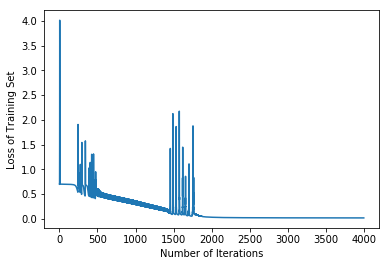

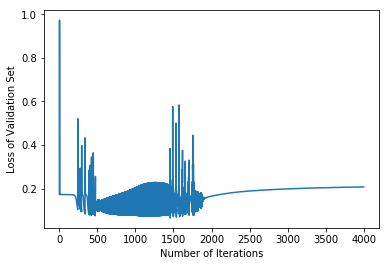

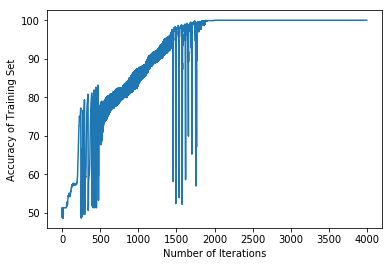

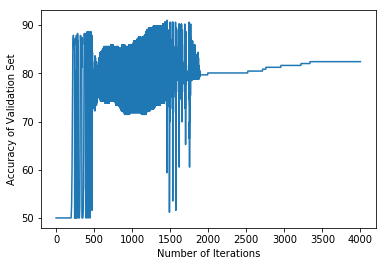

In [51]:
    print("Best")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [52]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

		training		validation		best	
loss		0.0141416255		0.2076336840		0.0679120994
accuracy	100.0000000000		82.4218750000		91.0156250000
